# Atividade 1

Esse documento contem o conteúdo de construção do modelos de aprendizado baseado em redes neurais e com a lista de Exercícios passada pelo professor Juan

## Implementação de uma biblioteca para esse problema

Para simplificar os códigos que aparecem aqui no jupyter notebook eu implementei uma library como um módulo onde eu posso criar redes diferentes apenas passando os parametros basicos. A rede implementada no módulo "nneural" consiste de uma camada de entrada de dados, um conjunto variável de camadas escondidas que pode ser modificada com base nos parametros passados no módulo e possui uma camada de saída. O módulo ainda permite que o usuário escolha o número de entradas, saidas, neuronios nas camadas escondidas, a função de ativação das camadas gerais, a função de ativação da última camada, a função de perda, o otimizador e as métricas. 

Todo o código desse módulo está na pasta nneural, onde no arquivo "\_\_init\_\_.py" está a implementação do módulo e o arquivo \_\_main\_\_.py é um exemplo de código main onde você pode usar o comando abaixo para rodar

```bash
$ python -m nneural "dados_demanda.csv"
```

In [59]:
from nneural import *

df = pd.read_csv("potencias_maximas.csv", sep=',')
df.drop(['TEMPO'], axis=1, inplace=True)
data = np.array(df)

data = tf.keras.utils.normalize(data, axis=1)
df

POTENCIA(K-6)  POTENCIA(K-5)  POTENCIA(K-4)  POTENCIA(K-3)  \
0          9.000000      13.200000      13.900000      13.000000   
1         13.200000      13.900000      13.000000       9.800000   
2         13.900000      13.000000       9.800000       9.400000   
3         13.000000       9.800000       9.400000      15.700000   
4          9.800000       9.400000      15.700000      15.900000   
...             ...            ...            ...            ...   
2180      17.299999      15.800000      14.200000      23.500000   
2181      15.800000      14.200000      23.500000      14.900000   
2182      14.200000      23.500000      14.900000      18.513684   
2183      23.500000      14.900000      18.513684      17.200001   
2184      14.900000      18.513684      17.200001      17.400000   

      POTENCIA(K-2)  POTENCIA(K-1)   POTENCIA  POTENCIA(K+1)  
0          9.800000       9.400000  15.700000      15.900000  
1          9.400000      15.700000  15.900000      15.500000  
2         15.700000      15.900000  15.500000      15.500000  
3         15.900000      15.500000  15.500000      14.600000  
4         15.500000      15.500000  14.600000       9.800000  
...             ...            ...        ...            ...  
2180      14.900000      18.513684  17.200001      17.400000  
2181      18.513684      17.200001  17.400000      12.000000  
2182      17.200001      17.400000  12.000000      11.300000  
2183      17.400000      12.000000  11.300000      16.299999  
2184      12.000000      11.300000  16.299999      12.100000  

[2185 rows x 8 columns]

In [60]:
#x_train = data[0:216, 0:5]
#y_train = data[0:216, 5:7]

#x_test = data[216:308,0:5]
#y_test = data[216:308, 5:7]

qtd_inputs = 7
qtd_outputs = 1

x_train = data[0:1529, 0:qtd_inputs]
y_train = data[0:1529, qtd_inputs:qtd_inputs+qtd_outputs]

x_test = data[1529:, 0:qtd_inputs]
y_test = data[1529:, qtd_inputs:qtd_inputs+qtd_outputs]

metrics = ['mean_squared_error', "mean_absolute_error", "mape"]
epochs = 10000


nnModelSigmoid = NNeural("Sigmoid", 
                         qtd_inputs=qtd_inputs, 
                         qtd_outputs=qtd_outputs, 
                         metrics = metrics, 
                         verbosity=True)
nnModelRelu = NNeural("Relu", 
                      qtd_inputs=qtd_inputs, 
                      qtd_outputs=qtd_outputs, 
                      activation="relu", 
                      metrics = metrics, verbosity=True)
nnModelTanh = NNeural("TanH", 
                      qtd_inputs=qtd_inputs, 
                      qtd_outputs=qtd_outputs, 
                      activation="tanh", 
                      metrics = metrics, verbosity=True)

modelList = [nnModelSigmoid, nnModelRelu, nnModelTanh]

for model in modelList:
    model.train(x_train, y_train, epochs)

Reset Model
Reset Model
Reset Model
Start training...
Gettings model. Now it is: None
Creating model...
Add Input layer with 7 inputs
Activation function: sigmoid
Adding hiden layer 1 with 20
Adding hiden layer 2 with 20
Adding output layer with 1 and using sigmoid as activation function
Compiling module with optimizer:adam, loss:mean_squared_error, metrics:['mean_squared_error', 'mean_absolute_error', 'mape']
Epoch 1/10000
48/48 [==============================] - 0s 691us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0709 - mape: 23.6740
Epoch 2/10000
48/48 [==============================] - 0s 729us/step - loss: 0.0042 - mean_squared_error: 0.0042 - mean_absolute_error: 0.0588 - mape: 18.8376
Epoch 3/10000
48/48 [==============================] - 0s 683us/step - loss: 0.0042 - mean_squared_error: 0.0042 - mean_absolute_error: 0.0584 - mape: 18.8065
Epoch 4/10000
48/48 [==============================] - 0s 694us/step - loss: 0.0042 - mean_squared_error: 0.0

48/48 [==============================] - 0s 741us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0239 - mape: 7.2832  
Epoch 101/10000
48/48 [==============================] - 0s 662us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0237 - mape: 7.1960
Epoch 102/10000
48/48 [==============================] - 0s 667us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0236 - mape: 7.1828  
Epoch 103/10000
48/48 [==============================] - 0s 652us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0239 - mape: 7.2666
Epoch 104/10000
48/48 [==============================] - 0s 680us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0238 - mape: 7.2618
Epoch 105/10000
48/48 [==============================] - 0s 652us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0236 - mape: 7.1885
Epoch 106/10000
48/48 [=============================

48/48 [==============================] - 0s 648us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0222 - mape: 6.7514  
Epoch 152/10000
48/48 [==============================] - 0s 627us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0222 - mape: 6.7000  
Epoch 153/10000
48/48 [==============================] - 0s 672us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0222 - mape: 6.7385
Epoch 154/10000
48/48 [==============================] - 0s 638us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0224 - mape: 6.7706  
Epoch 155/10000
48/48 [==============================] - 0s 698us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0220 - mape: 6.6892  
Epoch 156/10000
48/48 [==============================] - 0s 644us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0219 - mape: 6.6487  
Epoch 157/10000
48/48 [=======================

48/48 [==============================] - 0s 677us/step - loss: 9.2133e-04 - mean_squared_error: 9.2133e-04 - mean_absolute_error: 0.0205 - mape: 6.1974
Epoch 202/10000
48/48 [==============================] - 0s 663us/step - loss: 9.1136e-04 - mean_squared_error: 9.1136e-04 - mean_absolute_error: 0.0203 - mape: 6.1479
Epoch 203/10000
48/48 [==============================] - 0s 663us/step - loss: 9.2443e-04 - mean_squared_error: 9.2443e-04 - mean_absolute_error: 0.0205 - mape: 6.1995
Epoch 204/10000
48/48 [==============================] - 0s 1ms/step - loss: 9.1943e-04 - mean_squared_error: 9.1943e-04 - mean_absolute_error: 0.0205 - mape: 6.2351
Epoch 205/10000
48/48 [==============================] - 0s 655us/step - loss: 9.0795e-04 - mean_squared_error: 9.0795e-04 - mean_absolute_error: 0.0203 - mape: 6.1427
Epoch 206/10000
48/48 [==============================] - 0s 695us/step - loss: 9.1542e-04 - mean_squared_error: 9.1542e-04 - mean_absolute_error: 0.0208 - mape: 6.2881
Epoch 207/

48/48 [==============================] - 0s 741us/step - loss: 4.8856e-04 - mean_squared_error: 4.8856e-04 - mean_absolute_error: 0.0156 - mape: 4.7404
Epoch 298/10000
48/48 [==============================] - 0s 712us/step - loss: 4.7433e-04 - mean_squared_error: 4.7433e-04 - mean_absolute_error: 0.0153 - mape: 4.6640
Epoch 299/10000
48/48 [==============================] - 0s 693us/step - loss: 4.7594e-04 - mean_squared_error: 4.7594e-04 - mean_absolute_error: 0.0153 - mape: 4.6893
Epoch 300/10000
48/48 [==============================] - 0s 650us/step - loss: 4.7890e-04 - mean_squared_error: 4.7890e-04 - mean_absolute_error: 0.0155 - mape: 4.7129
Epoch 301/10000
48/48 [==============================] - 0s 689us/step - loss: 4.7710e-04 - mean_squared_error: 4.7710e-04 - mean_absolute_error: 0.0155 - mape: 4.7273
Epoch 302/10000
48/48 [==============================] - 0s 656us/step - loss: 4.6679e-04 - mean_squared_error: 4.6679e-04 - mean_absolute_error: 0.0153 - mape: 4.6840
Epoch 30

48/48 [==============================] - 0s 637us/step - loss: 2.7338e-04 - mean_squared_error: 2.7338e-04 - mean_absolute_error: 0.0124 - mape: 3.7804
Epoch 394/10000
48/48 [==============================] - 0s 1ms/step - loss: 2.7369e-04 - mean_squared_error: 2.7369e-04 - mean_absolute_error: 0.0124 - mape: 3.7801
Epoch 395/10000
48/48 [==============================] - 0s 673us/step - loss: 2.6657e-04 - mean_squared_error: 2.6657e-04 - mean_absolute_error: 0.0121 - mape: 3.6979
Epoch 396/10000
48/48 [==============================] - 0s 654us/step - loss: 2.7197e-04 - mean_squared_error: 2.7197e-04 - mean_absolute_error: 0.0124 - mape: 3.7844
Epoch 397/10000
48/48 [==============================] - 0s 640us/step - loss: 2.6746e-04 - mean_squared_error: 2.6746e-04 - mean_absolute_error: 0.0123 - mape: 3.7502
Epoch 398/10000
48/48 [==============================] - 0s 666us/step - loss: 2.7415e-04 - mean_squared_error: 2.7415e-04 - mean_absolute_error: 0.0124 - mape: 3.7843
Epoch 399/

48/48 [==============================] - 0s 691us/step - loss: 2.6322e-04 - mean_squared_error: 2.6322e-04 - mean_absolute_error: 0.0123 - mape: 3.7320
Epoch 490/10000
48/48 [==============================] - 0s 660us/step - loss: 2.5006e-04 - mean_squared_error: 2.5006e-04 - mean_absolute_error: 0.0119 - mape: 3.6343
Epoch 491/10000
48/48 [==============================] - 0s 699us/step - loss: 2.4626e-04 - mean_squared_error: 2.4626e-04 - mean_absolute_error: 0.0118 - mape: 3.5921
Epoch 492/10000
48/48 [==============================] - 0s 708us/step - loss: 2.4425e-04 - mean_squared_error: 2.4425e-04 - mean_absolute_error: 0.0117 - mape: 3.5689
Epoch 493/10000
48/48 [==============================] - 0s 703us/step - loss: 2.4635e-04 - mean_squared_error: 2.4635e-04 - mean_absolute_error: 0.0118 - mape: 3.5948
Epoch 494/10000
48/48 [==============================] - 0s 706us/step - loss: 2.4516e-04 - mean_squared_error: 2.4516e-04 - mean_absolute_error: 0.0117 - mape: 3.5682
Epoch 49

48/48 [==============================] - 0s 680us/step - loss: 2.4091e-04 - mean_squared_error: 2.4091e-04 - mean_absolute_error: 0.0117 - mape: 3.5625
Epoch 586/10000
48/48 [==============================] - 0s 692us/step - loss: 2.3768e-04 - mean_squared_error: 2.3768e-04 - mean_absolute_error: 0.0116 - mape: 3.5293
Epoch 587/10000
48/48 [==============================] - 0s 633us/step - loss: 2.4780e-04 - mean_squared_error: 2.4780e-04 - mean_absolute_error: 0.0119 - mape: 3.6152
Epoch 588/10000
48/48 [==============================] - 0s 647us/step - loss: 2.4229e-04 - mean_squared_error: 2.4229e-04 - mean_absolute_error: 0.0117 - mape: 3.5697
Epoch 589/10000
48/48 [==============================] - 0s 637us/step - loss: 2.3550e-04 - mean_squared_error: 2.3550e-04 - mean_absolute_error: 0.0115 - mape: 3.5009
Epoch 590/10000
48/48 [==============================] - 0s 644us/step - loss: 2.4553e-04 - mean_squared_error: 2.4553e-04 - mean_absolute_error: 0.0118 - mape: 3.5952
Epoch 59

48/48 [==============================] - 0s 676us/step - loss: 2.3903e-04 - mean_squared_error: 2.3903e-04 - mean_absolute_error: 0.0116 - mape: 3.5446
Epoch 682/10000
48/48 [==============================] - 0s 681us/step - loss: 2.3155e-04 - mean_squared_error: 2.3155e-04 - mean_absolute_error: 0.0114 - mape: 3.4879
Epoch 683/10000
48/48 [==============================] - 0s 727us/step - loss: 2.3589e-04 - mean_squared_error: 2.3589e-04 - mean_absolute_error: 0.0115 - mape: 3.5249
Epoch 684/10000
48/48 [==============================] - 0s 759us/step - loss: 2.3509e-04 - mean_squared_error: 2.3509e-04 - mean_absolute_error: 0.0115 - mape: 3.5166
Epoch 685/10000
48/48 [==============================] - 0s 693us/step - loss: 2.3182e-04 - mean_squared_error: 2.3182e-04 - mean_absolute_error: 0.0114 - mape: 3.4899
Epoch 686/10000
48/48 [==============================] - 0s 730us/step - loss: 2.3261e-04 - mean_squared_error: 2.3261e-04 - mean_absolute_error: 0.0114 - mape: 3.4894
Epoch 68

48/48 [==============================] - 0s 648us/step - loss: 2.4012e-04 - mean_squared_error: 2.4012e-04 - mean_absolute_error: 0.0117 - mape: 3.5675
Epoch 778/10000
48/48 [==============================] - 0s 717us/step - loss: 2.4369e-04 - mean_squared_error: 2.4369e-04 - mean_absolute_error: 0.0118 - mape: 3.5992
Epoch 779/10000
48/48 [==============================] - 0s 638us/step - loss: 2.3946e-04 - mean_squared_error: 2.3946e-04 - mean_absolute_error: 0.0117 - mape: 3.5561
Epoch 780/10000
48/48 [==============================] - 0s 680us/step - loss: 2.3050e-04 - mean_squared_error: 2.3050e-04 - mean_absolute_error: 0.0114 - mape: 3.4837
Epoch 781/10000
48/48 [==============================] - 0s 772us/step - loss: 2.3044e-04 - mean_squared_error: 2.3044e-04 - mean_absolute_error: 0.0113 - mape: 3.4566
Epoch 782/10000
48/48 [==============================] - 0s 711us/step - loss: 2.3436e-04 - mean_squared_error: 2.3436e-04 - mean_absolute_error: 0.0114 - mape: 3.4827
Epoch 78

48/48 [==============================] - 0s 683us/step - loss: 2.3857e-04 - mean_squared_error: 2.3857e-04 - mean_absolute_error: 0.0117 - mape: 3.5656
Epoch 874/10000
48/48 [==============================] - 0s 714us/step - loss: 2.2935e-04 - mean_squared_error: 2.2935e-04 - mean_absolute_error: 0.0114 - mape: 3.4775
Epoch 875/10000
48/48 [==============================] - 0s 718us/step - loss: 2.3134e-04 - mean_squared_error: 2.3134e-04 - mean_absolute_error: 0.0114 - mape: 3.4739
Epoch 876/10000
48/48 [==============================] - 0s 709us/step - loss: 2.3345e-04 - mean_squared_error: 2.3345e-04 - mean_absolute_error: 0.0115 - mape: 3.4976
Epoch 877/10000
48/48 [==============================] - 0s 703us/step - loss: 2.3138e-04 - mean_squared_error: 2.3138e-04 - mean_absolute_error: 0.0114 - mape: 3.4875
Epoch 878/10000
48/48 [==============================] - 0s 747us/step - loss: 2.2992e-04 - mean_squared_error: 2.2992e-04 - mean_absolute_error: 0.0113 - mape: 3.4350
Epoch 87

48/48 [==============================] - 0s 755us/step - loss: 2.2531e-04 - mean_squared_error: 2.2531e-04 - mean_absolute_error: 0.0113 - mape: 3.4499
Epoch 970/10000
48/48 [==============================] - 0s 646us/step - loss: 2.3053e-04 - mean_squared_error: 2.3053e-04 - mean_absolute_error: 0.0114 - mape: 3.4667
Epoch 971/10000
48/48 [==============================] - 0s 655us/step - loss: 2.3258e-04 - mean_squared_error: 2.3258e-04 - mean_absolute_error: 0.0115 - mape: 3.5081
Epoch 972/10000
48/48 [==============================] - 0s 772us/step - loss: 2.2707e-04 - mean_squared_error: 2.2707e-04 - mean_absolute_error: 0.0113 - mape: 3.4481
Epoch 973/10000
48/48 [==============================] - 0s 641us/step - loss: 2.3828e-04 - mean_squared_error: 2.3828e-04 - mean_absolute_error: 0.0116 - mape: 3.5391
Epoch 974/10000
48/48 [==============================] - 0s 700us/step - loss: 2.3083e-04 - mean_squared_error: 2.3083e-04 - mean_absolute_error: 0.0114 - mape: 3.4837
Epoch 97

48/48 [==============================] - 0s 717us/step - loss: 2.5034e-04 - mean_squared_error: 2.5034e-04 - mean_absolute_error: 0.0119 - mape: 3.6415
Epoch 1066/10000
48/48 [==============================] - 0s 752us/step - loss: 2.2316e-04 - mean_squared_error: 2.2316e-04 - mean_absolute_error: 0.0112 - mape: 3.4347
Epoch 1067/10000
48/48 [==============================] - 0s 699us/step - loss: 2.2658e-04 - mean_squared_error: 2.2658e-04 - mean_absolute_error: 0.0112 - mape: 3.4216
Epoch 1068/10000
48/48 [==============================] - 0s 690us/step - loss: 2.2352e-04 - mean_squared_error: 2.2352e-04 - mean_absolute_error: 0.0112 - mape: 3.4116
Epoch 1069/10000
48/48 [==============================] - 0s 667us/step - loss: 2.2451e-04 - mean_squared_error: 2.2451e-04 - mean_absolute_error: 0.0113 - mape: 3.4419
Epoch 1070/10000
48/48 [==============================] - 0s 691us/step - loss: 2.3787e-04 - mean_squared_error: 2.3787e-04 - mean_absolute_error: 0.0117 - mape: 3.5733
Epo

48/48 [==============================] - 0s 659us/step - loss: 2.2063e-04 - mean_squared_error: 2.2063e-04 - mean_absolute_error: 0.0112 - mape: 3.4216
Epoch 1162/10000
48/48 [==============================] - 0s 709us/step - loss: 2.2981e-04 - mean_squared_error: 2.2981e-04 - mean_absolute_error: 0.0114 - mape: 3.4806
Epoch 1163/10000
48/48 [==============================] - 0s 729us/step - loss: 2.3660e-04 - mean_squared_error: 2.3660e-04 - mean_absolute_error: 0.0116 - mape: 3.5376
Epoch 1164/10000
48/48 [==============================] - 0s 745us/step - loss: 2.4171e-04 - mean_squared_error: 2.4171e-04 - mean_absolute_error: 0.0118 - mape: 3.5940
Epoch 1165/10000
48/48 [==============================] - 0s 700us/step - loss: 2.2521e-04 - mean_squared_error: 2.2521e-04 - mean_absolute_error: 0.0113 - mape: 3.4401
Epoch 1166/10000
48/48 [==============================] - 0s 666us/step - loss: 2.2423e-04 - mean_squared_error: 2.2423e-04 - mean_absolute_error: 0.0114 - mape: 3.4691
Epo

48/48 [==============================] - 0s 725us/step - loss: 2.3652e-04 - mean_squared_error: 2.3652e-04 - mean_absolute_error: 0.0116 - mape: 3.5509
Epoch 1258/10000
48/48 [==============================] - 0s 696us/step - loss: 2.2213e-04 - mean_squared_error: 2.2213e-04 - mean_absolute_error: 0.0112 - mape: 3.4101
Epoch 1259/10000
48/48 [==============================] - 0s 708us/step - loss: 2.1972e-04 - mean_squared_error: 2.1972e-04 - mean_absolute_error: 0.0112 - mape: 3.4117
Epoch 1260/10000
48/48 [==============================] - 0s 699us/step - loss: 2.1919e-04 - mean_squared_error: 2.1919e-04 - mean_absolute_error: 0.0111 - mape: 3.3968
Epoch 1261/10000
48/48 [==============================] - 0s 646us/step - loss: 2.2142e-04 - mean_squared_error: 2.2142e-04 - mean_absolute_error: 0.0112 - mape: 3.4077
Epoch 1262/10000
48/48 [==============================] - 0s 677us/step - loss: 2.2624e-04 - mean_squared_error: 2.2624e-04 - mean_absolute_error: 0.0113 - mape: 3.4672
Epo

48/48 [==============================] - 0s 1ms/step - loss: 2.2779e-04 - mean_squared_error: 2.2779e-04 - mean_absolute_error: 0.0114 - mape: 3.4812
Epoch 1354/10000
48/48 [==============================] - 0s 708us/step - loss: 2.3606e-04 - mean_squared_error: 2.3606e-04 - mean_absolute_error: 0.0117 - mape: 3.5497
Epoch 1355/10000
48/48 [==============================] - 0s 703us/step - loss: 2.2306e-04 - mean_squared_error: 2.2306e-04 - mean_absolute_error: 0.0112 - mape: 3.4283
Epoch 1356/10000
48/48 [==============================] - 0s 690us/step - loss: 2.2673e-04 - mean_squared_error: 2.2673e-04 - mean_absolute_error: 0.0115 - mape: 3.4913
Epoch 1357/10000
48/48 [==============================] - 0s 717us/step - loss: 2.1279e-04 - mean_squared_error: 2.1279e-04 - mean_absolute_error: 0.0109 - mape: 3.3379
Epoch 1358/10000
48/48 [==============================] - 0s 685us/step - loss: 2.1439e-04 - mean_squared_error: 2.1439e-04 - mean_absolute_error: 0.0110 - mape: 3.3803
Epoch

48/48 [==============================] - 0s 683us/step - loss: 2.2293e-04 - mean_squared_error: 2.2293e-04 - mean_absolute_error: 0.0113 - mape: 3.4276
Epoch 1450/10000
48/48 [==============================] - 0s 647us/step - loss: 2.1697e-04 - mean_squared_error: 2.1697e-04 - mean_absolute_error: 0.0111 - mape: 3.3995
Epoch 1451/10000
48/48 [==============================] - 0s 682us/step - loss: 2.2239e-04 - mean_squared_error: 2.2239e-04 - mean_absolute_error: 0.0112 - mape: 3.4245
Epoch 1452/10000
48/48 [==============================] - 0s 686us/step - loss: 2.1116e-04 - mean_squared_error: 2.1116e-04 - mean_absolute_error: 0.0109 - mape: 3.3179
Epoch 1453/10000
48/48 [==============================] - 0s 694us/step - loss: 2.2337e-04 - mean_squared_error: 2.2337e-04 - mean_absolute_error: 0.0112 - mape: 3.4334
Epoch 1454/10000
48/48 [==============================] - 0s 685us/step - loss: 2.1883e-04 - mean_squared_error: 2.1883e-04 - mean_absolute_error: 0.0110 - mape: 3.3805
Epo

48/48 [==============================] - 0s 721us/step - loss: 2.1956e-04 - mean_squared_error: 2.1956e-04 - mean_absolute_error: 0.0111 - mape: 3.4101
Epoch 1546/10000
48/48 [==============================] - 0s 721us/step - loss: 2.0896e-04 - mean_squared_error: 2.0896e-04 - mean_absolute_error: 0.0108 - mape: 3.3170
Epoch 1547/10000
48/48 [==============================] - 0s 724us/step - loss: 2.1059e-04 - mean_squared_error: 2.1059e-04 - mean_absolute_error: 0.0109 - mape: 3.3388
Epoch 1548/10000
48/48 [==============================] - 0s 665us/step - loss: 2.1407e-04 - mean_squared_error: 2.1407e-04 - mean_absolute_error: 0.0111 - mape: 3.3812
Epoch 1549/10000
48/48 [==============================] - 0s 708us/step - loss: 2.1524e-04 - mean_squared_error: 2.1524e-04 - mean_absolute_error: 0.0110 - mape: 3.3733
Epoch 1550/10000
48/48 [==============================] - 0s 871us/step - loss: 2.1584e-04 - mean_squared_error: 2.1584e-04 - mean_absolute_error: 0.0111 - mape: 3.3935
Epo

48/48 [==============================] - 0s 726us/step - loss: 2.2397e-04 - mean_squared_error: 2.2397e-04 - mean_absolute_error: 0.0113 - mape: 3.4685
Epoch 1642/10000
48/48 [==============================] - 0s 714us/step - loss: 2.1270e-04 - mean_squared_error: 2.1270e-04 - mean_absolute_error: 0.0109 - mape: 3.3492
Epoch 1643/10000
48/48 [==============================] - 0s 828us/step - loss: 2.1334e-04 - mean_squared_error: 2.1334e-04 - mean_absolute_error: 0.0110 - mape: 3.3673
Epoch 1644/10000
48/48 [==============================] - 0s 768us/step - loss: 2.0699e-04 - mean_squared_error: 2.0699e-04 - mean_absolute_error: 0.0108 - mape: 3.3167
Epoch 1645/10000
48/48 [==============================] - 0s 681us/step - loss: 2.1006e-04 - mean_squared_error: 2.1006e-04 - mean_absolute_error: 0.0109 - mape: 3.3295
Epoch 1646/10000
48/48 [==============================] - 0s 708us/step - loss: 2.0902e-04 - mean_squared_error: 2.0902e-04 - mean_absolute_error: 0.0108 - mape: 3.3152
Epo

48/48 [==============================] - 0s 701us/step - loss: 2.2207e-04 - mean_squared_error: 2.2207e-04 - mean_absolute_error: 0.0112 - mape: 3.4305
Epoch 1738/10000
48/48 [==============================] - 0s 726us/step - loss: 2.1338e-04 - mean_squared_error: 2.1338e-04 - mean_absolute_error: 0.0111 - mape: 3.3875
Epoch 1739/10000
48/48 [==============================] - 0s 693us/step - loss: 2.1534e-04 - mean_squared_error: 2.1534e-04 - mean_absolute_error: 0.0111 - mape: 3.3975
Epoch 1740/10000
48/48 [==============================] - 0s 676us/step - loss: 2.1110e-04 - mean_squared_error: 2.1110e-04 - mean_absolute_error: 0.0110 - mape: 3.3529
Epoch 1741/10000
48/48 [==============================] - 0s 724us/step - loss: 2.0670e-04 - mean_squared_error: 2.0670e-04 - mean_absolute_error: 0.0108 - mape: 3.2902
Epoch 1742/10000
48/48 [==============================] - 0s 693us/step - loss: 2.0914e-04 - mean_squared_error: 2.0914e-04 - mean_absolute_error: 0.0109 - mape: 3.3247
Epo

48/48 [==============================] - 0s 702us/step - loss: 2.0249e-04 - mean_squared_error: 2.0249e-04 - mean_absolute_error: 0.0107 - mape: 3.2687
Epoch 1834/10000
48/48 [==============================] - 0s 797us/step - loss: 2.0569e-04 - mean_squared_error: 2.0569e-04 - mean_absolute_error: 0.0107 - mape: 3.3062
Epoch 1835/10000
48/48 [==============================] - 0s 741us/step - loss: 2.0737e-04 - mean_squared_error: 2.0737e-04 - mean_absolute_error: 0.0109 - mape: 3.3250
Epoch 1836/10000
48/48 [==============================] - 0s 696us/step - loss: 2.0747e-04 - mean_squared_error: 2.0747e-04 - mean_absolute_error: 0.0108 - mape: 3.3296
Epoch 1837/10000
48/48 [==============================] - 0s 695us/step - loss: 2.1343e-04 - mean_squared_error: 2.1343e-04 - mean_absolute_error: 0.0110 - mape: 3.3649
Epoch 1838/10000
48/48 [==============================] - 0s 743us/step - loss: 2.2555e-04 - mean_squared_error: 2.2555e-04 - mean_absolute_error: 0.0114 - mape: 3.4973
Epo

48/48 [==============================] - 0s 663us/step - loss: 2.0356e-04 - mean_squared_error: 2.0356e-04 - mean_absolute_error: 0.0108 - mape: 3.3052
Epoch 1930/10000
48/48 [==============================] - 0s 660us/step - loss: 2.0206e-04 - mean_squared_error: 2.0206e-04 - mean_absolute_error: 0.0107 - mape: 3.2885
Epoch 1931/10000
48/48 [==============================] - 0s 684us/step - loss: 2.0511e-04 - mean_squared_error: 2.0511e-04 - mean_absolute_error: 0.0108 - mape: 3.3099
Epoch 1932/10000
48/48 [==============================] - 0s 665us/step - loss: 1.9478e-04 - mean_squared_error: 1.9478e-04 - mean_absolute_error: 0.0104 - mape: 3.2064
Epoch 1933/10000
48/48 [==============================] - 0s 727us/step - loss: 2.0870e-04 - mean_squared_error: 2.0870e-04 - mean_absolute_error: 0.0109 - mape: 3.3309
Epoch 1934/10000
48/48 [==============================] - 0s 666us/step - loss: 2.0363e-04 - mean_squared_error: 2.0363e-04 - mean_absolute_error: 0.0108 - mape: 3.2989
Epo

48/48 [==============================] - 0s 651us/step - loss: 1.9455e-04 - mean_squared_error: 1.9455e-04 - mean_absolute_error: 0.0104 - mape: 3.2057
Epoch 2026/10000
48/48 [==============================] - 0s 679us/step - loss: 2.0737e-04 - mean_squared_error: 2.0737e-04 - mean_absolute_error: 0.0108 - mape: 3.3077
Epoch 2027/10000
48/48 [==============================] - 0s 672us/step - loss: 2.3735e-04 - mean_squared_error: 2.3735e-04 - mean_absolute_error: 0.0118 - mape: 3.6120
Epoch 2028/10000
48/48 [==============================] - 0s 667us/step - loss: 2.0073e-04 - mean_squared_error: 2.0073e-04 - mean_absolute_error: 0.0107 - mape: 3.2773
Epoch 2029/10000
48/48 [==============================] - 0s 699us/step - loss: 1.9508e-04 - mean_squared_error: 1.9508e-04 - mean_absolute_error: 0.0104 - mape: 3.2031
Epoch 2030/10000
48/48 [==============================] - 0s 689us/step - loss: 2.0220e-04 - mean_squared_error: 2.0220e-04 - mean_absolute_error: 0.0107 - mape: 3.2877
Epo

48/48 [==============================] - 0s 736us/step - loss: 1.9294e-04 - mean_squared_error: 1.9294e-04 - mean_absolute_error: 0.0104 - mape: 3.1984
Epoch 2122/10000
48/48 [==============================] - 0s 725us/step - loss: 2.0969e-04 - mean_squared_error: 2.0969e-04 - mean_absolute_error: 0.0111 - mape: 3.3726
Epoch 2123/10000
48/48 [==============================] - 0s 703us/step - loss: 1.9884e-04 - mean_squared_error: 1.9884e-04 - mean_absolute_error: 0.0106 - mape: 3.2358
Epoch 2124/10000
48/48 [==============================] - 0s 719us/step - loss: 1.9144e-04 - mean_squared_error: 1.9144e-04 - mean_absolute_error: 0.0104 - mape: 3.1982
Epoch 2125/10000
48/48 [==============================] - 0s 685us/step - loss: 1.9747e-04 - mean_squared_error: 1.9747e-04 - mean_absolute_error: 0.0106 - mape: 3.2624
Epoch 2126/10000
48/48 [==============================] - 0s 758us/step - loss: 1.9390e-04 - mean_squared_error: 1.9390e-04 - mean_absolute_error: 0.0104 - mape: 3.2113
Epo

48/48 [==============================] - 0s 691us/step - loss: 1.9198e-04 - mean_squared_error: 1.9198e-04 - mean_absolute_error: 0.0105 - mape: 3.2350
Epoch 2218/10000
48/48 [==============================] - 0s 691us/step - loss: 1.9051e-04 - mean_squared_error: 1.9051e-04 - mean_absolute_error: 0.0104 - mape: 3.1871
Epoch 2219/10000
48/48 [==============================] - 0s 696us/step - loss: 1.8871e-04 - mean_squared_error: 1.8871e-04 - mean_absolute_error: 0.0103 - mape: 3.1827
Epoch 2220/10000
48/48 [==============================] - 0s 717us/step - loss: 2.0165e-04 - mean_squared_error: 2.0165e-04 - mean_absolute_error: 0.0107 - mape: 3.2794
Epoch 2221/10000
48/48 [==============================] - 0s 683us/step - loss: 1.8673e-04 - mean_squared_error: 1.8673e-04 - mean_absolute_error: 0.0103 - mape: 3.1675
Epoch 2222/10000
48/48 [==============================] - 0s 705us/step - loss: 1.9439e-04 - mean_squared_error: 1.9439e-04 - mean_absolute_error: 0.0104 - mape: 3.2284
Epo

48/48 [==============================] - 0s 692us/step - loss: 1.8564e-04 - mean_squared_error: 1.8564e-04 - mean_absolute_error: 0.0102 - mape: 3.1545
Epoch 2314/10000
48/48 [==============================] - 0s 672us/step - loss: 1.8265e-04 - mean_squared_error: 1.8265e-04 - mean_absolute_error: 0.0102 - mape: 3.1340
Epoch 2315/10000
48/48 [==============================] - 0s 688us/step - loss: 1.8302e-04 - mean_squared_error: 1.8302e-04 - mean_absolute_error: 0.0101 - mape: 3.1063
Epoch 2316/10000
48/48 [==============================] - 0s 714us/step - loss: 1.8609e-04 - mean_squared_error: 1.8609e-04 - mean_absolute_error: 0.0102 - mape: 3.1501
Epoch 2317/10000
48/48 [==============================] - 0s 694us/step - loss: 1.9279e-04 - mean_squared_error: 1.9279e-04 - mean_absolute_error: 0.0105 - mape: 3.2182
Epoch 2318/10000
48/48 [==============================] - 0s 694us/step - loss: 1.8480e-04 - mean_squared_error: 1.8480e-04 - mean_absolute_error: 0.0101 - mape: 3.1214
Epo

48/48 [==============================] - 0s 759us/step - loss: 1.8533e-04 - mean_squared_error: 1.8533e-04 - mean_absolute_error: 0.0102 - mape: 3.1539
Epoch 2410/10000
48/48 [==============================] - 0s 731us/step - loss: 1.8441e-04 - mean_squared_error: 1.8441e-04 - mean_absolute_error: 0.0102 - mape: 3.1395
Epoch 2411/10000
48/48 [==============================] - 0s 690us/step - loss: 1.7994e-04 - mean_squared_error: 1.7994e-04 - mean_absolute_error: 0.0101 - mape: 3.1048
Epoch 2412/10000
48/48 [==============================] - 0s 676us/step - loss: 1.9136e-04 - mean_squared_error: 1.9136e-04 - mean_absolute_error: 0.0104 - mape: 3.2158
Epoch 2413/10000
48/48 [==============================] - 0s 688us/step - loss: 1.9382e-04 - mean_squared_error: 1.9382e-04 - mean_absolute_error: 0.0104 - mape: 3.2225
Epoch 2414/10000
48/48 [==============================] - 0s 658us/step - loss: 1.8725e-04 - mean_squared_error: 1.8725e-04 - mean_absolute_error: 0.0102 - mape: 3.1311
Epo

48/48 [==============================] - 0s 678us/step - loss: 1.7424e-04 - mean_squared_error: 1.7424e-04 - mean_absolute_error: 0.0098 - mape: 3.0415
Epoch 2506/10000
48/48 [==============================] - 0s 679us/step - loss: 1.8183e-04 - mean_squared_error: 1.8183e-04 - mean_absolute_error: 0.0102 - mape: 3.1336
Epoch 2507/10000
48/48 [==============================] - 0s 670us/step - loss: 1.8106e-04 - mean_squared_error: 1.8106e-04 - mean_absolute_error: 0.0099 - mape: 3.0673
Epoch 2508/10000
48/48 [==============================] - 0s 705us/step - loss: 1.7440e-04 - mean_squared_error: 1.7440e-04 - mean_absolute_error: 0.0100 - mape: 3.0715
Epoch 2509/10000
48/48 [==============================] - 0s 682us/step - loss: 1.7012e-04 - mean_squared_error: 1.7012e-04 - mean_absolute_error: 0.0097 - mape: 2.9924
Epoch 2510/10000
48/48 [==============================] - 0s 740us/step - loss: 1.7755e-04 - mean_squared_error: 1.7755e-04 - mean_absolute_error: 0.0099 - mape: 3.0575
Epo

48/48 [==============================] - 0s 682us/step - loss: 1.7053e-04 - mean_squared_error: 1.7053e-04 - mean_absolute_error: 0.0097 - mape: 3.0024
Epoch 2602/10000
48/48 [==============================] - 0s 740us/step - loss: 1.7220e-04 - mean_squared_error: 1.7220e-04 - mean_absolute_error: 0.0098 - mape: 3.0336
Epoch 2603/10000
48/48 [==============================] - 0s 688us/step - loss: 1.8251e-04 - mean_squared_error: 1.8251e-04 - mean_absolute_error: 0.0103 - mape: 3.1551
Epoch 2604/10000
48/48 [==============================] - 0s 684us/step - loss: 1.7691e-04 - mean_squared_error: 1.7691e-04 - mean_absolute_error: 0.0100 - mape: 3.0822
Epoch 2605/10000
48/48 [==============================] - 0s 731us/step - loss: 1.6633e-04 - mean_squared_error: 1.6633e-04 - mean_absolute_error: 0.0095 - mape: 2.9551
Epoch 2606/10000
48/48 [==============================] - 0s 665us/step - loss: 1.7170e-04 - mean_squared_error: 1.7170e-04 - mean_absolute_error: 0.0098 - mape: 3.0236
Epo

48/48 [==============================] - 0s 741us/step - loss: 1.6670e-04 - mean_squared_error: 1.6670e-04 - mean_absolute_error: 0.0096 - mape: 2.9743
Epoch 2698/10000
48/48 [==============================] - 0s 642us/step - loss: 1.7175e-04 - mean_squared_error: 1.7175e-04 - mean_absolute_error: 0.0098 - mape: 3.0122
Epoch 2699/10000
48/48 [==============================] - 0s 1ms/step - loss: 1.7259e-04 - mean_squared_error: 1.7259e-04 - mean_absolute_error: 0.0098 - mape: 3.0367
Epoch 2700/10000
48/48 [==============================] - 0s 714us/step - loss: 1.6830e-04 - mean_squared_error: 1.6830e-04 - mean_absolute_error: 0.0097 - mape: 2.9937
Epoch 2701/10000
48/48 [==============================] - 0s 716us/step - loss: 1.6368e-04 - mean_squared_error: 1.6368e-04 - mean_absolute_error: 0.0095 - mape: 2.9376
Epoch 2702/10000
48/48 [==============================] - 0s 715us/step - loss: 1.6727e-04 - mean_squared_error: 1.6727e-04 - mean_absolute_error: 0.0095 - mape: 2.9541
Epoch

48/48 [==============================] - 0s 758us/step - loss: 1.7476e-04 - mean_squared_error: 1.7476e-04 - mean_absolute_error: 0.0099 - mape: 3.0421
Epoch 2794/10000
48/48 [==============================] - 0s 693us/step - loss: 1.5740e-04 - mean_squared_error: 1.5740e-04 - mean_absolute_error: 0.0092 - mape: 2.8653
Epoch 2795/10000
48/48 [==============================] - 0s 692us/step - loss: 1.5959e-04 - mean_squared_error: 1.5959e-04 - mean_absolute_error: 0.0093 - mape: 2.8896
Epoch 2796/10000
48/48 [==============================] - 0s 730us/step - loss: 1.6232e-04 - mean_squared_error: 1.6232e-04 - mean_absolute_error: 0.0094 - mape: 2.9137
Epoch 2797/10000
48/48 [==============================] - 0s 694us/step - loss: 1.7061e-04 - mean_squared_error: 1.7061e-04 - mean_absolute_error: 0.0097 - mape: 3.0070
Epoch 2798/10000
48/48 [==============================] - 0s 743us/step - loss: 1.6165e-04 - mean_squared_error: 1.6165e-04 - mean_absolute_error: 0.0094 - mape: 2.9292
Epo

48/48 [==============================] - 0s 655us/step - loss: 1.5655e-04 - mean_squared_error: 1.5655e-04 - mean_absolute_error: 0.0092 - mape: 2.8606
Epoch 2890/10000
48/48 [==============================] - 0s 688us/step - loss: 1.5928e-04 - mean_squared_error: 1.5928e-04 - mean_absolute_error: 0.0092 - mape: 2.8689
Epoch 2891/10000
48/48 [==============================] - 0s 723us/step - loss: 1.6008e-04 - mean_squared_error: 1.6008e-04 - mean_absolute_error: 0.0093 - mape: 2.8886
Epoch 2892/10000
48/48 [==============================] - 0s 694us/step - loss: 1.5691e-04 - mean_squared_error: 1.5691e-04 - mean_absolute_error: 0.0093 - mape: 2.8766
Epoch 2893/10000
48/48 [==============================] - 0s 690us/step - loss: 1.5965e-04 - mean_squared_error: 1.5965e-04 - mean_absolute_error: 0.0093 - mape: 2.8918
Epoch 2894/10000
48/48 [==============================] - 0s 735us/step - loss: 1.6822e-04 - mean_squared_error: 1.6822e-04 - mean_absolute_error: 0.0096 - mape: 2.9710
Epo

48/48 [==============================] - 0s 656us/step - loss: 1.5548e-04 - mean_squared_error: 1.5548e-04 - mean_absolute_error: 0.0091 - mape: 2.8291
Epoch 2986/10000
48/48 [==============================] - 0s 710us/step - loss: 1.5953e-04 - mean_squared_error: 1.5953e-04 - mean_absolute_error: 0.0092 - mape: 2.8661
Epoch 2987/10000
48/48 [==============================] - 0s 677us/step - loss: 1.5643e-04 - mean_squared_error: 1.5643e-04 - mean_absolute_error: 0.0092 - mape: 2.8646
Epoch 2988/10000
48/48 [==============================] - 0s 755us/step - loss: 1.5372e-04 - mean_squared_error: 1.5372e-04 - mean_absolute_error: 0.0091 - mape: 2.8413
Epoch 2989/10000
48/48 [==============================] - 0s 640us/step - loss: 1.6514e-04 - mean_squared_error: 1.6514e-04 - mean_absolute_error: 0.0095 - mape: 2.9308
Epoch 2990/10000
48/48 [==============================] - 0s 734us/step - loss: 1.5240e-04 - mean_squared_error: 1.5240e-04 - mean_absolute_error: 0.0090 - mape: 2.8075
Epo

48/48 [==============================] - 0s 679us/step - loss: 1.5535e-04 - mean_squared_error: 1.5535e-04 - mean_absolute_error: 0.0091 - mape: 2.8448
Epoch 3082/10000
48/48 [==============================] - 0s 722us/step - loss: 1.5026e-04 - mean_squared_error: 1.5026e-04 - mean_absolute_error: 0.0090 - mape: 2.7909
Epoch 3083/10000
48/48 [==============================] - 0s 725us/step - loss: 1.5236e-04 - mean_squared_error: 1.5236e-04 - mean_absolute_error: 0.0090 - mape: 2.8034
Epoch 3084/10000
48/48 [==============================] - 0s 652us/step - loss: 1.5957e-04 - mean_squared_error: 1.5957e-04 - mean_absolute_error: 0.0094 - mape: 2.9026
Epoch 3085/10000
48/48 [==============================] - 0s 789us/step - loss: 1.5380e-04 - mean_squared_error: 1.5380e-04 - mean_absolute_error: 0.0091 - mape: 2.8108
Epoch 3086/10000
48/48 [==============================] - 0s 711us/step - loss: 1.5399e-04 - mean_squared_error: 1.5399e-04 - mean_absolute_error: 0.0091 - mape: 2.8286
Epo

48/48 [==============================] - 0s 719us/step - loss: 1.5122e-04 - mean_squared_error: 1.5122e-04 - mean_absolute_error: 0.0090 - mape: 2.7942
Epoch 3178/10000
48/48 [==============================] - 0s 718us/step - loss: 1.5073e-04 - mean_squared_error: 1.5073e-04 - mean_absolute_error: 0.0090 - mape: 2.7968
Epoch 3179/10000
48/48 [==============================] - 0s 700us/step - loss: 1.5040e-04 - mean_squared_error: 1.5040e-04 - mean_absolute_error: 0.0090 - mape: 2.8018
Epoch 3180/10000
48/48 [==============================] - 0s 724us/step - loss: 1.5325e-04 - mean_squared_error: 1.5325e-04 - mean_absolute_error: 0.0091 - mape: 2.8182
Epoch 3181/10000
48/48 [==============================] - 0s 716us/step - loss: 1.5202e-04 - mean_squared_error: 1.5202e-04 - mean_absolute_error: 0.0090 - mape: 2.7881
Epoch 3182/10000
48/48 [==============================] - 0s 699us/step - loss: 1.5120e-04 - mean_squared_error: 1.5120e-04 - mean_absolute_error: 0.0090 - mape: 2.7948
Epo

48/48 [==============================] - 0s 736us/step - loss: 1.5453e-04 - mean_squared_error: 1.5453e-04 - mean_absolute_error: 0.0090 - mape: 2.8183
Epoch 3274/10000
48/48 [==============================] - 0s 692us/step - loss: 1.4730e-04 - mean_squared_error: 1.4730e-04 - mean_absolute_error: 0.0089 - mape: 2.7562
Epoch 3275/10000
48/48 [==============================] - 0s 717us/step - loss: 1.5395e-04 - mean_squared_error: 1.5395e-04 - mean_absolute_error: 0.0091 - mape: 2.8372
Epoch 3276/10000
48/48 [==============================] - 0s 669us/step - loss: 1.5076e-04 - mean_squared_error: 1.5076e-04 - mean_absolute_error: 0.0090 - mape: 2.7981
Epoch 3277/10000
48/48 [==============================] - 0s 663us/step - loss: 1.4892e-04 - mean_squared_error: 1.4892e-04 - mean_absolute_error: 0.0089 - mape: 2.7577
Epoch 3278/10000
48/48 [==============================] - 0s 681us/step - loss: 1.5448e-04 - mean_squared_error: 1.5448e-04 - mean_absolute_error: 0.0090 - mape: 2.8075
Epo

48/48 [==============================] - 0s 642us/step - loss: 1.5612e-04 - mean_squared_error: 1.5612e-04 - mean_absolute_error: 0.0091 - mape: 2.8321
Epoch 3370/10000
48/48 [==============================] - 0s 652us/step - loss: 1.5748e-04 - mean_squared_error: 1.5748e-04 - mean_absolute_error: 0.0091 - mape: 2.8148
Epoch 3371/10000
48/48 [==============================] - 0s 738us/step - loss: 1.6326e-04 - mean_squared_error: 1.6326e-04 - mean_absolute_error: 0.0093 - mape: 2.8956
Epoch 3372/10000
48/48 [==============================] - 0s 664us/step - loss: 1.6009e-04 - mean_squared_error: 1.6009e-04 - mean_absolute_error: 0.0092 - mape: 2.8589
Epoch 3373/10000
48/48 [==============================] - 0s 694us/step - loss: 1.5258e-04 - mean_squared_error: 1.5258e-04 - mean_absolute_error: 0.0090 - mape: 2.7991
Epoch 3374/10000
48/48 [==============================] - 0s 703us/step - loss: 1.4593e-04 - mean_squared_error: 1.4593e-04 - mean_absolute_error: 0.0087 - mape: 2.7129
Epo

48/48 [==============================] - 0s 660us/step - loss: 1.5139e-04 - mean_squared_error: 1.5139e-04 - mean_absolute_error: 0.0090 - mape: 2.8084
Epoch 3466/10000
48/48 [==============================] - 0s 634us/step - loss: 1.7076e-04 - mean_squared_error: 1.7076e-04 - mean_absolute_error: 0.0096 - mape: 3.0032
Epoch 3467/10000
48/48 [==============================] - 0s 693us/step - loss: 1.5004e-04 - mean_squared_error: 1.5004e-04 - mean_absolute_error: 0.0089 - mape: 2.7575
Epoch 3468/10000
48/48 [==============================] - 0s 634us/step - loss: 1.4837e-04 - mean_squared_error: 1.4837e-04 - mean_absolute_error: 0.0089 - mape: 2.7571
Epoch 3469/10000
48/48 [==============================] - 0s 670us/step - loss: 1.5631e-04 - mean_squared_error: 1.5631e-04 - mean_absolute_error: 0.0092 - mape: 2.8496
Epoch 3470/10000
48/48 [==============================] - 0s 643us/step - loss: 1.4562e-04 - mean_squared_error: 1.4562e-04 - mean_absolute_error: 0.0087 - mape: 2.7122
Epo

48/48 [==============================] - 0s 722us/step - loss: 1.4583e-04 - mean_squared_error: 1.4583e-04 - mean_absolute_error: 0.0087 - mape: 2.7257
Epoch 3562/10000
48/48 [==============================] - 0s 680us/step - loss: 1.4759e-04 - mean_squared_error: 1.4759e-04 - mean_absolute_error: 0.0088 - mape: 2.7507
Epoch 3563/10000
48/48 [==============================] - 0s 725us/step - loss: 1.4362e-04 - mean_squared_error: 1.4362e-04 - mean_absolute_error: 0.0086 - mape: 2.6979
Epoch 3564/10000
48/48 [==============================] - 0s 707us/step - loss: 1.4321e-04 - mean_squared_error: 1.4321e-04 - mean_absolute_error: 0.0086 - mape: 2.6914
Epoch 3565/10000
48/48 [==============================] - 0s 703us/step - loss: 1.4805e-04 - mean_squared_error: 1.4805e-04 - mean_absolute_error: 0.0088 - mape: 2.7408
Epoch 3566/10000
48/48 [==============================] - 0s 622us/step - loss: 1.4932e-04 - mean_squared_error: 1.4932e-04 - mean_absolute_error: 0.0089 - mape: 2.7670
Epo

48/48 [==============================] - 0s 693us/step - loss: 1.4464e-04 - mean_squared_error: 1.4464e-04 - mean_absolute_error: 0.0087 - mape: 2.7261
Epoch 3658/10000
48/48 [==============================] - 0s 701us/step - loss: 1.4703e-04 - mean_squared_error: 1.4703e-04 - mean_absolute_error: 0.0087 - mape: 2.7266
Epoch 3659/10000
48/48 [==============================] - 0s 708us/step - loss: 1.4571e-04 - mean_squared_error: 1.4571e-04 - mean_absolute_error: 0.0087 - mape: 2.7104
Epoch 3660/10000
48/48 [==============================] - 0s 789us/step - loss: 1.4390e-04 - mean_squared_error: 1.4390e-04 - mean_absolute_error: 0.0086 - mape: 2.6770
Epoch 3661/10000
48/48 [==============================] - 0s 718us/step - loss: 1.4320e-04 - mean_squared_error: 1.4320e-04 - mean_absolute_error: 0.0085 - mape: 2.6693
Epoch 3662/10000
48/48 [==============================] - 0s 683us/step - loss: 1.4819e-04 - mean_squared_error: 1.4819e-04 - mean_absolute_error: 0.0088 - mape: 2.7356
Epo

48/48 [==============================] - 0s 699us/step - loss: 1.4770e-04 - mean_squared_error: 1.4770e-04 - mean_absolute_error: 0.0088 - mape: 2.7560
Epoch 3754/10000
48/48 [==============================] - 0s 687us/step - loss: 1.4776e-04 - mean_squared_error: 1.4776e-04 - mean_absolute_error: 0.0088 - mape: 2.7400
Epoch 3755/10000
48/48 [==============================] - 0s 708us/step - loss: 1.5063e-04 - mean_squared_error: 1.5063e-04 - mean_absolute_error: 0.0089 - mape: 2.7778
Epoch 3756/10000
48/48 [==============================] - 0s 694us/step - loss: 1.5170e-04 - mean_squared_error: 1.5170e-04 - mean_absolute_error: 0.0090 - mape: 2.8122
Epoch 3757/10000
48/48 [==============================] - 0s 703us/step - loss: 1.4784e-04 - mean_squared_error: 1.4784e-04 - mean_absolute_error: 0.0088 - mape: 2.7478
Epoch 3758/10000
48/48 [==============================] - 0s 731us/step - loss: 1.4352e-04 - mean_squared_error: 1.4352e-04 - mean_absolute_error: 0.0086 - mape: 2.7002
Epo

48/48 [==============================] - 0s 630us/step - loss: 1.4864e-04 - mean_squared_error: 1.4864e-04 - mean_absolute_error: 0.0089 - mape: 2.7679
Epoch 3850/10000
48/48 [==============================] - 0s 712us/step - loss: 1.4477e-04 - mean_squared_error: 1.4477e-04 - mean_absolute_error: 0.0087 - mape: 2.7215
Epoch 3851/10000
48/48 [==============================] - 0s 663us/step - loss: 1.5181e-04 - mean_squared_error: 1.5181e-04 - mean_absolute_error: 0.0090 - mape: 2.7996
Epoch 3852/10000
48/48 [==============================] - 0s 687us/step - loss: 1.4133e-04 - mean_squared_error: 1.4133e-04 - mean_absolute_error: 0.0086 - mape: 2.6805
Epoch 3853/10000
48/48 [==============================] - 0s 682us/step - loss: 1.4654e-04 - mean_squared_error: 1.4654e-04 - mean_absolute_error: 0.0088 - mape: 2.7478
Epoch 3854/10000
48/48 [==============================] - 0s 709us/step - loss: 1.4576e-04 - mean_squared_error: 1.4576e-04 - mean_absolute_error: 0.0087 - mape: 2.7229
Epo

48/48 [==============================] - 0s 633us/step - loss: 1.4718e-04 - mean_squared_error: 1.4718e-04 - mean_absolute_error: 0.0088 - mape: 2.7287
Epoch 3946/10000
48/48 [==============================] - 0s 674us/step - loss: 1.5222e-04 - mean_squared_error: 1.5222e-04 - mean_absolute_error: 0.0089 - mape: 2.8009
Epoch 3947/10000
48/48 [==============================] - 0s 691us/step - loss: 1.4441e-04 - mean_squared_error: 1.4441e-04 - mean_absolute_error: 0.0088 - mape: 2.7293
Epoch 3948/10000
48/48 [==============================] - 0s 660us/step - loss: 1.4841e-04 - mean_squared_error: 1.4841e-04 - mean_absolute_error: 0.0088 - mape: 2.7438
Epoch 3949/10000
48/48 [==============================] - 0s 703us/step - loss: 1.4153e-04 - mean_squared_error: 1.4153e-04 - mean_absolute_error: 0.0085 - mape: 2.6669
Epoch 3950/10000
48/48 [==============================] - 0s 670us/step - loss: 1.3963e-04 - mean_squared_error: 1.3963e-04 - mean_absolute_error: 0.0085 - mape: 2.6510
Epo

48/48 [==============================] - 0s 634us/step - loss: 1.4692e-04 - mean_squared_error: 1.4692e-04 - mean_absolute_error: 0.0088 - mape: 2.7480
Epoch 4042/10000
48/48 [==============================] - 0s 694us/step - loss: 1.4831e-04 - mean_squared_error: 1.4831e-04 - mean_absolute_error: 0.0089 - mape: 2.7875
Epoch 4043/10000
48/48 [==============================] - 0s 675us/step - loss: 1.4393e-04 - mean_squared_error: 1.4393e-04 - mean_absolute_error: 0.0087 - mape: 2.7078
Epoch 4044/10000
48/48 [==============================] - 0s 683us/step - loss: 1.4888e-04 - mean_squared_error: 1.4888e-04 - mean_absolute_error: 0.0089 - mape: 2.7668
Epoch 4045/10000
48/48 [==============================] - 0s 668us/step - loss: 1.5357e-04 - mean_squared_error: 1.5357e-04 - mean_absolute_error: 0.0089 - mape: 2.7923
Epoch 4046/10000
48/48 [==============================] - 0s 674us/step - loss: 1.4196e-04 - mean_squared_error: 1.4196e-04 - mean_absolute_error: 0.0086 - mape: 2.6894
Epo

48/48 [==============================] - 0s 664us/step - loss: 1.3976e-04 - mean_squared_error: 1.3976e-04 - mean_absolute_error: 0.0085 - mape: 2.6543
Epoch 4138/10000
48/48 [==============================] - 0s 697us/step - loss: 1.4543e-04 - mean_squared_error: 1.4543e-04 - mean_absolute_error: 0.0088 - mape: 2.7485
Epoch 4139/10000
48/48 [==============================] - 0s 662us/step - loss: 1.4691e-04 - mean_squared_error: 1.4691e-04 - mean_absolute_error: 0.0089 - mape: 2.7631
Epoch 4140/10000
48/48 [==============================] - 0s 685us/step - loss: 1.4747e-04 - mean_squared_error: 1.4747e-04 - mean_absolute_error: 0.0089 - mape: 2.7588
Epoch 4141/10000
48/48 [==============================] - 0s 645us/step - loss: 1.5777e-04 - mean_squared_error: 1.5777e-04 - mean_absolute_error: 0.0092 - mape: 2.8564
Epoch 4142/10000
48/48 [==============================] - 0s 890us/step - loss: 1.4042e-04 - mean_squared_error: 1.4042e-04 - mean_absolute_error: 0.0085 - mape: 2.6577
Epo

48/48 [==============================] - 0s 696us/step - loss: 1.4222e-04 - mean_squared_error: 1.4222e-04 - mean_absolute_error: 0.0087 - mape: 2.7166
Epoch 4234/10000
48/48 [==============================] - 0s 660us/step - loss: 1.4241e-04 - mean_squared_error: 1.4241e-04 - mean_absolute_error: 0.0085 - mape: 2.6668
Epoch 4235/10000
48/48 [==============================] - 0s 673us/step - loss: 1.4410e-04 - mean_squared_error: 1.4410e-04 - mean_absolute_error: 0.0087 - mape: 2.7067
Epoch 4236/10000
48/48 [==============================] - 0s 661us/step - loss: 1.3802e-04 - mean_squared_error: 1.3802e-04 - mean_absolute_error: 0.0084 - mape: 2.6381
Epoch 4237/10000
48/48 [==============================] - 0s 666us/step - loss: 1.3924e-04 - mean_squared_error: 1.3924e-04 - mean_absolute_error: 0.0085 - mape: 2.6595
Epoch 4238/10000
48/48 [==============================] - 0s 686us/step - loss: 1.5224e-04 - mean_squared_error: 1.5224e-04 - mean_absolute_error: 0.0091 - mape: 2.8108
Epo

48/48 [==============================] - 0s 710us/step - loss: 1.3826e-04 - mean_squared_error: 1.3826e-04 - mean_absolute_error: 0.0085 - mape: 2.6383
Epoch 4330/10000
48/48 [==============================] - 0s 741us/step - loss: 1.3818e-04 - mean_squared_error: 1.3818e-04 - mean_absolute_error: 0.0084 - mape: 2.6306
Epoch 4331/10000
48/48 [==============================] - 0s 720us/step - loss: 1.4308e-04 - mean_squared_error: 1.4308e-04 - mean_absolute_error: 0.0087 - mape: 2.7127
Epoch 4332/10000
48/48 [==============================] - 0s 668us/step - loss: 1.4303e-04 - mean_squared_error: 1.4303e-04 - mean_absolute_error: 0.0086 - mape: 2.6914
Epoch 4333/10000
48/48 [==============================] - 0s 683us/step - loss: 1.3928e-04 - mean_squared_error: 1.3928e-04 - mean_absolute_error: 0.0085 - mape: 2.6600
Epoch 4334/10000
48/48 [==============================] - 0s 689us/step - loss: 1.4106e-04 - mean_squared_error: 1.4106e-04 - mean_absolute_error: 0.0086 - mape: 2.6753
Epo

48/48 [==============================] - 0s 678us/step - loss: 1.4764e-04 - mean_squared_error: 1.4764e-04 - mean_absolute_error: 0.0089 - mape: 2.7707
Epoch 4426/10000
48/48 [==============================] - 0s 735us/step - loss: 1.4246e-04 - mean_squared_error: 1.4246e-04 - mean_absolute_error: 0.0086 - mape: 2.6837
Epoch 4427/10000
48/48 [==============================] - 0s 720us/step - loss: 1.3581e-04 - mean_squared_error: 1.3581e-04 - mean_absolute_error: 0.0084 - mape: 2.6158
Epoch 4428/10000
48/48 [==============================] - 0s 709us/step - loss: 1.4082e-04 - mean_squared_error: 1.4082e-04 - mean_absolute_error: 0.0086 - mape: 2.6888
Epoch 4429/10000
48/48 [==============================] - 0s 739us/step - loss: 1.3739e-04 - mean_squared_error: 1.3739e-04 - mean_absolute_error: 0.0084 - mape: 2.6333
Epoch 4430/10000
48/48 [==============================] - 0s 684us/step - loss: 1.4036e-04 - mean_squared_error: 1.4036e-04 - mean_absolute_error: 0.0086 - mape: 2.6955
Epo

48/48 [==============================] - 0s 746us/step - loss: 1.3929e-04 - mean_squared_error: 1.3929e-04 - mean_absolute_error: 0.0085 - mape: 2.6499
Epoch 4522/10000
48/48 [==============================] - 0s 714us/step - loss: 1.3794e-04 - mean_squared_error: 1.3794e-04 - mean_absolute_error: 0.0085 - mape: 2.6494
Epoch 4523/10000
48/48 [==============================] - 0s 717us/step - loss: 1.4356e-04 - mean_squared_error: 1.4356e-04 - mean_absolute_error: 0.0087 - mape: 2.7060
Epoch 4524/10000
48/48 [==============================] - 0s 653us/step - loss: 1.3321e-04 - mean_squared_error: 1.3321e-04 - mean_absolute_error: 0.0083 - mape: 2.5968
Epoch 4525/10000
48/48 [==============================] - 0s 710us/step - loss: 1.3953e-04 - mean_squared_error: 1.3953e-04 - mean_absolute_error: 0.0085 - mape: 2.6395
Epoch 4526/10000
48/48 [==============================] - 0s 734us/step - loss: 1.4264e-04 - mean_squared_error: 1.4264e-04 - mean_absolute_error: 0.0087 - mape: 2.7114
Epo

48/48 [==============================] - 0s 729us/step - loss: 1.3453e-04 - mean_squared_error: 1.3453e-04 - mean_absolute_error: 0.0083 - mape: 2.6073
Epoch 4618/10000
48/48 [==============================] - 0s 724us/step - loss: 1.3685e-04 - mean_squared_error: 1.3685e-04 - mean_absolute_error: 0.0085 - mape: 2.6377
Epoch 4619/10000
48/48 [==============================] - 0s 737us/step - loss: 1.4254e-04 - mean_squared_error: 1.4254e-04 - mean_absolute_error: 0.0087 - mape: 2.7104
Epoch 4620/10000
48/48 [==============================] - 0s 755us/step - loss: 1.4145e-04 - mean_squared_error: 1.4145e-04 - mean_absolute_error: 0.0087 - mape: 2.7143
Epoch 4621/10000
48/48 [==============================] - 0s 629us/step - loss: 1.3755e-04 - mean_squared_error: 1.3755e-04 - mean_absolute_error: 0.0084 - mape: 2.6312
Epoch 4622/10000
48/48 [==============================] - 0s 733us/step - loss: 1.3814e-04 - mean_squared_error: 1.3814e-04 - mean_absolute_error: 0.0085 - mape: 2.6627
Epo

48/48 [==============================] - 0s 1ms/step - loss: 1.3750e-04 - mean_squared_error: 1.3750e-04 - mean_absolute_error: 0.0085 - mape: 2.6389
Epoch 4714/10000
48/48 [==============================] - 0s 712us/step - loss: 1.4424e-04 - mean_squared_error: 1.4424e-04 - mean_absolute_error: 0.0088 - mape: 2.7367
Epoch 4715/10000
48/48 [==============================] - 0s 866us/step - loss: 1.3396e-04 - mean_squared_error: 1.3396e-04 - mean_absolute_error: 0.0084 - mape: 2.6071
Epoch 4716/10000
48/48 [==============================] - 0s 839us/step - loss: 1.4080e-04 - mean_squared_error: 1.4080e-04 - mean_absolute_error: 0.0086 - mape: 2.6776
Epoch 4717/10000
48/48 [==============================] - 0s 1ms/step - loss: 1.5453e-04 - mean_squared_error: 1.5453e-04 - mean_absolute_error: 0.0092 - mape: 2.8711
Epoch 4718/10000
48/48 [==============================] - 0s 784us/step - loss: 1.4869e-04 - mean_squared_error: 1.4869e-04 - mean_absolute_error: 0.0090 - mape: 2.8162
Epoch 4

48/48 [==============================] - 0s 1ms/step - loss: 1.3457e-04 - mean_squared_error: 1.3457e-04 - mean_absolute_error: 0.0083 - mape: 2.6078
Epoch 4810/10000
48/48 [==============================] - 0s 650us/step - loss: 1.3629e-04 - mean_squared_error: 1.3629e-04 - mean_absolute_error: 0.0084 - mape: 2.6237
Epoch 4811/10000
48/48 [==============================] - 0s 603us/step - loss: 1.3279e-04 - mean_squared_error: 1.3279e-04 - mean_absolute_error: 0.0083 - mape: 2.5965
Epoch 4812/10000
48/48 [==============================] - 0s 632us/step - loss: 1.3811e-04 - mean_squared_error: 1.3811e-04 - mean_absolute_error: 0.0086 - mape: 2.6758
Epoch 4813/10000
48/48 [==============================] - 0s 622us/step - loss: 1.3960e-04 - mean_squared_error: 1.3960e-04 - mean_absolute_error: 0.0086 - mape: 2.6799
Epoch 4814/10000
48/48 [==============================] - 0s 650us/step - loss: 1.4961e-04 - mean_squared_error: 1.4961e-04 - mean_absolute_error: 0.0090 - mape: 2.7787
Epoch

48/48 [==============================] - 0s 609us/step - loss: 1.3423e-04 - mean_squared_error: 1.3423e-04 - mean_absolute_error: 0.0084 - mape: 2.6197
Epoch 4906/10000
48/48 [==============================] - 0s 611us/step - loss: 1.3418e-04 - mean_squared_error: 1.3418e-04 - mean_absolute_error: 0.0084 - mape: 2.6337
Epoch 4907/10000
48/48 [==============================] - 0s 592us/step - loss: 1.3219e-04 - mean_squared_error: 1.3219e-04 - mean_absolute_error: 0.0083 - mape: 2.5779
Epoch 4908/10000
48/48 [==============================] - 0s 622us/step - loss: 1.4658e-04 - mean_squared_error: 1.4658e-04 - mean_absolute_error: 0.0088 - mape: 2.7446
Epoch 4909/10000
48/48 [==============================] - 0s 607us/step - loss: 1.3445e-04 - mean_squared_error: 1.3445e-04 - mean_absolute_error: 0.0084 - mape: 2.6124
Epoch 4910/10000
48/48 [==============================] - 0s 676us/step - loss: 1.3231e-04 - mean_squared_error: 1.3231e-04 - mean_absolute_error: 0.0083 - mape: 2.5861
Epo

48/48 [==============================] - 0s 682us/step - loss: 1.3200e-04 - mean_squared_error: 1.3200e-04 - mean_absolute_error: 0.0083 - mape: 2.6006
Epoch 5002/10000
48/48 [==============================] - 0s 691us/step - loss: 1.3325e-04 - mean_squared_error: 1.3325e-04 - mean_absolute_error: 0.0083 - mape: 2.6011
Epoch 5003/10000
48/48 [==============================] - 0s 642us/step - loss: 1.4014e-04 - mean_squared_error: 1.4014e-04 - mean_absolute_error: 0.0087 - mape: 2.6985
Epoch 5004/10000
48/48 [==============================] - 0s 606us/step - loss: 1.3253e-04 - mean_squared_error: 1.3253e-04 - mean_absolute_error: 0.0084 - mape: 2.6117
Epoch 5005/10000
48/48 [==============================] - 0s 616us/step - loss: 1.3642e-04 - mean_squared_error: 1.3642e-04 - mean_absolute_error: 0.0085 - mape: 2.6464
Epoch 5006/10000
48/48 [==============================] - 0s 611us/step - loss: 1.3405e-04 - mean_squared_error: 1.3405e-04 - mean_absolute_error: 0.0083 - mape: 2.6001
Epo

48/48 [==============================] - 0s 610us/step - loss: 1.4915e-04 - mean_squared_error: 1.4915e-04 - mean_absolute_error: 0.0089 - mape: 2.7907
Epoch 5098/10000
48/48 [==============================] - 0s 636us/step - loss: 1.3185e-04 - mean_squared_error: 1.3185e-04 - mean_absolute_error: 0.0083 - mape: 2.6045
Epoch 5099/10000
48/48 [==============================] - 0s 623us/step - loss: 1.4456e-04 - mean_squared_error: 1.4456e-04 - mean_absolute_error: 0.0089 - mape: 2.7685
Epoch 5100/10000
48/48 [==============================] - 0s 631us/step - loss: 1.3214e-04 - mean_squared_error: 1.3214e-04 - mean_absolute_error: 0.0083 - mape: 2.5935
Epoch 5101/10000
48/48 [==============================] - 0s 616us/step - loss: 1.3138e-04 - mean_squared_error: 1.3138e-04 - mean_absolute_error: 0.0083 - mape: 2.5804
Epoch 5102/10000
48/48 [==============================] - 0s 622us/step - loss: 1.2683e-04 - mean_squared_error: 1.2683e-04 - mean_absolute_error: 0.0081 - mape: 2.5324
Epo

48/48 [==============================] - 0s 612us/step - loss: 1.3283e-04 - mean_squared_error: 1.3283e-04 - mean_absolute_error: 0.0084 - mape: 2.6212
Epoch 5194/10000
48/48 [==============================] - 0s 611us/step - loss: 1.3429e-04 - mean_squared_error: 1.3429e-04 - mean_absolute_error: 0.0085 - mape: 2.6412
Epoch 5195/10000
48/48 [==============================] - 0s 615us/step - loss: 1.2968e-04 - mean_squared_error: 1.2968e-04 - mean_absolute_error: 0.0083 - mape: 2.5907
Epoch 5196/10000
48/48 [==============================] - 0s 631us/step - loss: 1.4129e-04 - mean_squared_error: 1.4129e-04 - mean_absolute_error: 0.0087 - mape: 2.7098
Epoch 5197/10000
48/48 [==============================] - 0s 661us/step - loss: 1.2941e-04 - mean_squared_error: 1.2941e-04 - mean_absolute_error: 0.0082 - mape: 2.5592
Epoch 5198/10000
48/48 [==============================] - 0s 596us/step - loss: 1.3216e-04 - mean_squared_error: 1.3216e-04 - mean_absolute_error: 0.0083 - mape: 2.5901
Epo

48/48 [==============================] - 0s 611us/step - loss: 1.3118e-04 - mean_squared_error: 1.3118e-04 - mean_absolute_error: 0.0084 - mape: 2.6018
Epoch 5290/10000
48/48 [==============================] - 0s 645us/step - loss: 1.3022e-04 - mean_squared_error: 1.3022e-04 - mean_absolute_error: 0.0083 - mape: 2.5934
Epoch 5291/10000
48/48 [==============================] - 0s 613us/step - loss: 1.2626e-04 - mean_squared_error: 1.2626e-04 - mean_absolute_error: 0.0081 - mape: 2.5408
Epoch 5292/10000
48/48 [==============================] - 0s 792us/step - loss: 1.2989e-04 - mean_squared_error: 1.2989e-04 - mean_absolute_error: 0.0082 - mape: 2.5753
Epoch 5293/10000
48/48 [==============================] - 0s 715us/step - loss: 1.2862e-04 - mean_squared_error: 1.2862e-04 - mean_absolute_error: 0.0082 - mape: 2.5560
Epoch 5294/10000
48/48 [==============================] - 0s 684us/step - loss: 1.2913e-04 - mean_squared_error: 1.2913e-04 - mean_absolute_error: 0.0083 - mape: 2.5765
Epo

48/48 [==============================] - 0s 625us/step - loss: 1.3303e-04 - mean_squared_error: 1.3303e-04 - mean_absolute_error: 0.0084 - mape: 2.6102
Epoch 5386/10000
48/48 [==============================] - 0s 689us/step - loss: 1.2996e-04 - mean_squared_error: 1.2996e-04 - mean_absolute_error: 0.0082 - mape: 2.5645
Epoch 5387/10000
48/48 [==============================] - 0s 789us/step - loss: 1.2904e-04 - mean_squared_error: 1.2904e-04 - mean_absolute_error: 0.0083 - mape: 2.5809
Epoch 5388/10000
48/48 [==============================] - 0s 669us/step - loss: 1.3212e-04 - mean_squared_error: 1.3212e-04 - mean_absolute_error: 0.0084 - mape: 2.6048
Epoch 5389/10000
48/48 [==============================] - 0s 735us/step - loss: 1.3354e-04 - mean_squared_error: 1.3354e-04 - mean_absolute_error: 0.0085 - mape: 2.6375
Epoch 5390/10000
48/48 [==============================] - 0s 700us/step - loss: 1.3303e-04 - mean_squared_error: 1.3303e-04 - mean_absolute_error: 0.0084 - mape: 2.6136
Epo

48/48 [==============================] - 0s 618us/step - loss: 1.2314e-04 - mean_squared_error: 1.2314e-04 - mean_absolute_error: 0.0081 - mape: 2.5154
Epoch 5482/10000
48/48 [==============================] - 0s 623us/step - loss: 1.2774e-04 - mean_squared_error: 1.2774e-04 - mean_absolute_error: 0.0083 - mape: 2.5768
Epoch 5483/10000
48/48 [==============================] - 0s 606us/step - loss: 1.2497e-04 - mean_squared_error: 1.2497e-04 - mean_absolute_error: 0.0082 - mape: 2.5424
Epoch 5484/10000
48/48 [==============================] - 0s 620us/step - loss: 1.3414e-04 - mean_squared_error: 1.3414e-04 - mean_absolute_error: 0.0085 - mape: 2.6591
Epoch 5485/10000
48/48 [==============================] - 0s 602us/step - loss: 1.2684e-04 - mean_squared_error: 1.2684e-04 - mean_absolute_error: 0.0082 - mape: 2.5651
Epoch 5486/10000
48/48 [==============================] - 0s 638us/step - loss: 1.3229e-04 - mean_squared_error: 1.3229e-04 - mean_absolute_error: 0.0084 - mape: 2.6324
Epo

48/48 [==============================] - 0s 618us/step - loss: 1.2473e-04 - mean_squared_error: 1.2473e-04 - mean_absolute_error: 0.0082 - mape: 2.5492
Epoch 5578/10000
48/48 [==============================] - 0s 662us/step - loss: 1.2582e-04 - mean_squared_error: 1.2582e-04 - mean_absolute_error: 0.0081 - mape: 2.5255
Epoch 5579/10000
48/48 [==============================] - 0s 615us/step - loss: 1.2635e-04 - mean_squared_error: 1.2635e-04 - mean_absolute_error: 0.0082 - mape: 2.5516
Epoch 5580/10000
48/48 [==============================] - 0s 619us/step - loss: 1.2431e-04 - mean_squared_error: 1.2431e-04 - mean_absolute_error: 0.0082 - mape: 2.5382
Epoch 5581/10000
48/48 [==============================] - 0s 613us/step - loss: 1.2415e-04 - mean_squared_error: 1.2415e-04 - mean_absolute_error: 0.0081 - mape: 2.5202
Epoch 5582/10000
48/48 [==============================] - 0s 627us/step - loss: 1.2878e-04 - mean_squared_error: 1.2878e-04 - mean_absolute_error: 0.0082 - mape: 2.5707
Epo

48/48 [==============================] - 0s 626us/step - loss: 1.2654e-04 - mean_squared_error: 1.2654e-04 - mean_absolute_error: 0.0083 - mape: 2.5772
Epoch 5674/10000
48/48 [==============================] - 0s 616us/step - loss: 1.2517e-04 - mean_squared_error: 1.2517e-04 - mean_absolute_error: 0.0082 - mape: 2.5393
Epoch 5675/10000
48/48 [==============================] - 0s 626us/step - loss: 1.2691e-04 - mean_squared_error: 1.2691e-04 - mean_absolute_error: 0.0083 - mape: 2.5831
Epoch 5676/10000
48/48 [==============================] - 0s 606us/step - loss: 1.2774e-04 - mean_squared_error: 1.2774e-04 - mean_absolute_error: 0.0083 - mape: 2.5777
Epoch 5677/10000
48/48 [==============================] - 0s 617us/step - loss: 1.2604e-04 - mean_squared_error: 1.2604e-04 - mean_absolute_error: 0.0082 - mape: 2.5430
Epoch 5678/10000
48/48 [==============================] - 0s 608us/step - loss: 1.2339e-04 - mean_squared_error: 1.2339e-04 - mean_absolute_error: 0.0081 - mape: 2.5231
Epo

48/48 [==============================] - 0s 727us/step - loss: 1.2285e-04 - mean_squared_error: 1.2285e-04 - mean_absolute_error: 0.0080 - mape: 2.5042
Epoch 5770/10000
48/48 [==============================] - 0s 677us/step - loss: 1.2647e-04 - mean_squared_error: 1.2647e-04 - mean_absolute_error: 0.0082 - mape: 2.5615
Epoch 5771/10000
48/48 [==============================] - 0s 683us/step - loss: 1.2870e-04 - mean_squared_error: 1.2870e-04 - mean_absolute_error: 0.0083 - mape: 2.6038
Epoch 5772/10000
48/48 [==============================] - 0s 707us/step - loss: 1.2380e-04 - mean_squared_error: 1.2380e-04 - mean_absolute_error: 0.0082 - mape: 2.5449
Epoch 5773/10000
48/48 [==============================] - 0s 634us/step - loss: 1.2352e-04 - mean_squared_error: 1.2352e-04 - mean_absolute_error: 0.0081 - mape: 2.5385
Epoch 5774/10000
48/48 [==============================] - 0s 627us/step - loss: 1.2306e-04 - mean_squared_error: 1.2306e-04 - mean_absolute_error: 0.0081 - mape: 2.5288
Epo

48/48 [==============================] - 0s 599us/step - loss: 1.2386e-04 - mean_squared_error: 1.2386e-04 - mean_absolute_error: 0.0082 - mape: 2.5370
Epoch 5866/10000
48/48 [==============================] - 0s 637us/step - loss: 1.2964e-04 - mean_squared_error: 1.2964e-04 - mean_absolute_error: 0.0083 - mape: 2.5881
Epoch 5867/10000
48/48 [==============================] - 0s 602us/step - loss: 1.2338e-04 - mean_squared_error: 1.2338e-04 - mean_absolute_error: 0.0082 - mape: 2.5553
Epoch 5868/10000
48/48 [==============================] - 0s 596us/step - loss: 1.2275e-04 - mean_squared_error: 1.2275e-04 - mean_absolute_error: 0.0081 - mape: 2.5363
Epoch 5869/10000
48/48 [==============================] - 0s 614us/step - loss: 1.1957e-04 - mean_squared_error: 1.1957e-04 - mean_absolute_error: 0.0080 - mape: 2.4937
Epoch 5870/10000
48/48 [==============================] - 0s 636us/step - loss: 1.2205e-04 - mean_squared_error: 1.2205e-04 - mean_absolute_error: 0.0081 - mape: 2.5091
Epo

48/48 [==============================] - 0s 728us/step - loss: 1.1920e-04 - mean_squared_error: 1.1920e-04 - mean_absolute_error: 0.0080 - mape: 2.4769
Epoch 5962/10000
48/48 [==============================] - 0s 667us/step - loss: 1.2198e-04 - mean_squared_error: 1.2198e-04 - mean_absolute_error: 0.0081 - mape: 2.5229
Epoch 5963/10000
48/48 [==============================] - 0s 785us/step - loss: 1.1705e-04 - mean_squared_error: 1.1705e-04 - mean_absolute_error: 0.0080 - mape: 2.4781
Epoch 5964/10000
48/48 [==============================] - 0s 651us/step - loss: 1.1800e-04 - mean_squared_error: 1.1800e-04 - mean_absolute_error: 0.0080 - mape: 2.4828
Epoch 5965/10000
48/48 [==============================] - 0s 654us/step - loss: 1.2565e-04 - mean_squared_error: 1.2565e-04 - mean_absolute_error: 0.0082 - mape: 2.5695
Epoch 5966/10000
48/48 [==============================] - 0s 606us/step - loss: 1.1994e-04 - mean_squared_error: 1.1994e-04 - mean_absolute_error: 0.0080 - mape: 2.5034
Epo

48/48 [==============================] - 0s 625us/step - loss: 1.1476e-04 - mean_squared_error: 1.1476e-04 - mean_absolute_error: 0.0078 - mape: 2.4463
Epoch 6058/10000
48/48 [==============================] - 0s 621us/step - loss: 1.1672e-04 - mean_squared_error: 1.1672e-04 - mean_absolute_error: 0.0079 - mape: 2.4669
Epoch 6059/10000
48/48 [==============================] - 0s 615us/step - loss: 1.2224e-04 - mean_squared_error: 1.2224e-04 - mean_absolute_error: 0.0082 - mape: 2.5475
Epoch 6060/10000
48/48 [==============================] - 0s 640us/step - loss: 1.1579e-04 - mean_squared_error: 1.1579e-04 - mean_absolute_error: 0.0079 - mape: 2.4524
Epoch 6061/10000
48/48 [==============================] - 0s 618us/step - loss: 1.1951e-04 - mean_squared_error: 1.1951e-04 - mean_absolute_error: 0.0080 - mape: 2.4976
Epoch 6062/10000
48/48 [==============================] - 0s 607us/step - loss: 1.1582e-04 - mean_squared_error: 1.1582e-04 - mean_absolute_error: 0.0079 - mape: 2.4542
Epo

48/48 [==============================] - 0s 611us/step - loss: 1.1984e-04 - mean_squared_error: 1.1984e-04 - mean_absolute_error: 0.0080 - mape: 2.5001
Epoch 6154/10000
48/48 [==============================] - 0s 618us/step - loss: 1.1545e-04 - mean_squared_error: 1.1545e-04 - mean_absolute_error: 0.0079 - mape: 2.4414
Epoch 6155/10000
48/48 [==============================] - 0s 598us/step - loss: 1.1534e-04 - mean_squared_error: 1.1534e-04 - mean_absolute_error: 0.0079 - mape: 2.4752
Epoch 6156/10000
48/48 [==============================] - 0s 627us/step - loss: 1.1485e-04 - mean_squared_error: 1.1485e-04 - mean_absolute_error: 0.0078 - mape: 2.4456
Epoch 6157/10000
48/48 [==============================] - 0s 642us/step - loss: 1.1677e-04 - mean_squared_error: 1.1677e-04 - mean_absolute_error: 0.0080 - mape: 2.4843
Epoch 6158/10000
48/48 [==============================] - 0s 629us/step - loss: 1.1722e-04 - mean_squared_error: 1.1722e-04 - mean_absolute_error: 0.0080 - mape: 2.4771
Epo

48/48 [==============================] - 0s 643us/step - loss: 1.2240e-04 - mean_squared_error: 1.2240e-04 - mean_absolute_error: 0.0082 - mape: 2.5422
Epoch 6250/10000
48/48 [==============================] - 0s 617us/step - loss: 1.2079e-04 - mean_squared_error: 1.2079e-04 - mean_absolute_error: 0.0082 - mape: 2.5387
Epoch 6251/10000
48/48 [==============================] - 0s 627us/step - loss: 1.1541e-04 - mean_squared_error: 1.1541e-04 - mean_absolute_error: 0.0079 - mape: 2.4516
Epoch 6252/10000
48/48 [==============================] - 0s 630us/step - loss: 1.1278e-04 - mean_squared_error: 1.1278e-04 - mean_absolute_error: 0.0079 - mape: 2.4497
Epoch 6253/10000
48/48 [==============================] - 0s 620us/step - loss: 1.1495e-04 - mean_squared_error: 1.1495e-04 - mean_absolute_error: 0.0079 - mape: 2.4553
Epoch 6254/10000
48/48 [==============================] - 0s 631us/step - loss: 1.1598e-04 - mean_squared_error: 1.1598e-04 - mean_absolute_error: 0.0080 - mape: 2.4843
Epo

48/48 [==============================] - 0s 634us/step - loss: 1.1304e-04 - mean_squared_error: 1.1304e-04 - mean_absolute_error: 0.0078 - mape: 2.4312
Epoch 6346/10000
48/48 [==============================] - 0s 628us/step - loss: 1.1348e-04 - mean_squared_error: 1.1348e-04 - mean_absolute_error: 0.0079 - mape: 2.4645
Epoch 6347/10000
48/48 [==============================] - 0s 737us/step - loss: 1.1017e-04 - mean_squared_error: 1.1017e-04 - mean_absolute_error: 0.0077 - mape: 2.4051
Epoch 6348/10000
48/48 [==============================] - 0s 699us/step - loss: 1.1406e-04 - mean_squared_error: 1.1406e-04 - mean_absolute_error: 0.0079 - mape: 2.4639
Epoch 6349/10000
48/48 [==============================] - 0s 711us/step - loss: 1.1341e-04 - mean_squared_error: 1.1341e-04 - mean_absolute_error: 0.0079 - mape: 2.4505
Epoch 6350/10000
48/48 [==============================] - 0s 696us/step - loss: 1.1385e-04 - mean_squared_error: 1.1385e-04 - mean_absolute_error: 0.0079 - mape: 2.4482
Epo

48/48 [==============================] - 0s 744us/step - loss: 1.1001e-04 - mean_squared_error: 1.1001e-04 - mean_absolute_error: 0.0078 - mape: 2.4131
Epoch 6442/10000
48/48 [==============================] - 0s 628us/step - loss: 1.1099e-04 - mean_squared_error: 1.1099e-04 - mean_absolute_error: 0.0078 - mape: 2.4179
Epoch 6443/10000
48/48 [==============================] - 0s 624us/step - loss: 1.1133e-04 - mean_squared_error: 1.1133e-04 - mean_absolute_error: 0.0078 - mape: 2.4242
Epoch 6444/10000
48/48 [==============================] - 0s 780us/step - loss: 1.1382e-04 - mean_squared_error: 1.1382e-04 - mean_absolute_error: 0.0080 - mape: 2.4849
Epoch 6445/10000
48/48 [==============================] - 0s 617us/step - loss: 1.1753e-04 - mean_squared_error: 1.1753e-04 - mean_absolute_error: 0.0081 - mape: 2.5227
Epoch 6446/10000
48/48 [==============================] - 0s 611us/step - loss: 1.1284e-04 - mean_squared_error: 1.1284e-04 - mean_absolute_error: 0.0079 - mape: 2.4572
Epo

48/48 [==============================] - 0s 627us/step - loss: 1.0841e-04 - mean_squared_error: 1.0841e-04 - mean_absolute_error: 0.0077 - mape: 2.3899
Epoch 6538/10000
48/48 [==============================] - 0s 614us/step - loss: 1.0903e-04 - mean_squared_error: 1.0903e-04 - mean_absolute_error: 0.0076 - mape: 2.3741
Epoch 6539/10000
48/48 [==============================] - 0s 633us/step - loss: 1.1176e-04 - mean_squared_error: 1.1176e-04 - mean_absolute_error: 0.0079 - mape: 2.4425
Epoch 6540/10000
48/48 [==============================] - 0s 608us/step - loss: 1.1534e-04 - mean_squared_error: 1.1534e-04 - mean_absolute_error: 0.0080 - mape: 2.4943
Epoch 6541/10000
48/48 [==============================] - 0s 634us/step - loss: 1.0905e-04 - mean_squared_error: 1.0905e-04 - mean_absolute_error: 0.0078 - mape: 2.4148
Epoch 6542/10000
48/48 [==============================] - 0s 607us/step - loss: 1.1852e-04 - mean_squared_error: 1.1852e-04 - mean_absolute_error: 0.0081 - mape: 2.5157
Epo

48/48 [==============================] - 0s 654us/step - loss: 1.0915e-04 - mean_squared_error: 1.0915e-04 - mean_absolute_error: 0.0079 - mape: 2.4474
Epoch 6634/10000
48/48 [==============================] - 0s 667us/step - loss: 1.0940e-04 - mean_squared_error: 1.0940e-04 - mean_absolute_error: 0.0078 - mape: 2.4151
Epoch 6635/10000
48/48 [==============================] - 0s 649us/step - loss: 1.1218e-04 - mean_squared_error: 1.1218e-04 - mean_absolute_error: 0.0079 - mape: 2.4560
Epoch 6636/10000
48/48 [==============================] - 0s 684us/step - loss: 1.1552e-04 - mean_squared_error: 1.1552e-04 - mean_absolute_error: 0.0081 - mape: 2.4982
Epoch 6637/10000
48/48 [==============================] - 0s 667us/step - loss: 1.0952e-04 - mean_squared_error: 1.0952e-04 - mean_absolute_error: 0.0078 - mape: 2.4172
Epoch 6638/10000
48/48 [==============================] - 0s 683us/step - loss: 1.0477e-04 - mean_squared_error: 1.0477e-04 - mean_absolute_error: 0.0076 - mape: 2.3661
Epo

48/48 [==============================] - 0s 677us/step - loss: 1.0544e-04 - mean_squared_error: 1.0544e-04 - mean_absolute_error: 0.0076 - mape: 2.3635
Epoch 6730/10000
48/48 [==============================] - 0s 642us/step - loss: 1.1462e-04 - mean_squared_error: 1.1462e-04 - mean_absolute_error: 0.0080 - mape: 2.4745
Epoch 6731/10000
48/48 [==============================] - 0s 629us/step - loss: 1.1739e-04 - mean_squared_error: 1.1739e-04 - mean_absolute_error: 0.0081 - mape: 2.5006
Epoch 6732/10000
48/48 [==============================] - 0s 620us/step - loss: 1.0763e-04 - mean_squared_error: 1.0763e-04 - mean_absolute_error: 0.0077 - mape: 2.4033
Epoch 6733/10000
48/48 [==============================] - 0s 613us/step - loss: 1.1362e-04 - mean_squared_error: 1.1362e-04 - mean_absolute_error: 0.0080 - mape: 2.4885
Epoch 6734/10000
48/48 [==============================] - 0s 621us/step - loss: 1.1035e-04 - mean_squared_error: 1.1035e-04 - mean_absolute_error: 0.0079 - mape: 2.4565
Epo

48/48 [==============================] - 0s 699us/step - loss: 1.0788e-04 - mean_squared_error: 1.0788e-04 - mean_absolute_error: 0.0077 - mape: 2.3993
Epoch 6826/10000
48/48 [==============================] - 0s 709us/step - loss: 1.0200e-04 - mean_squared_error: 1.0200e-04 - mean_absolute_error: 0.0075 - mape: 2.3316
Epoch 6827/10000
48/48 [==============================] - 0s 684us/step - loss: 1.0349e-04 - mean_squared_error: 1.0349e-04 - mean_absolute_error: 0.0076 - mape: 2.3428
Epoch 6828/10000
48/48 [==============================] - 0s 680us/step - loss: 1.0245e-04 - mean_squared_error: 1.0245e-04 - mean_absolute_error: 0.0076 - mape: 2.3411
Epoch 6829/10000
48/48 [==============================] - 0s 680us/step - loss: 1.0458e-04 - mean_squared_error: 1.0458e-04 - mean_absolute_error: 0.0076 - mape: 2.3630
Epoch 6830/10000
48/48 [==============================] - 0s 633us/step - loss: 1.0967e-04 - mean_squared_error: 1.0967e-04 - mean_absolute_error: 0.0079 - mape: 2.4348
Epo

48/48 [==============================] - 0s 720us/step - loss: 1.0355e-04 - mean_squared_error: 1.0355e-04 - mean_absolute_error: 0.0076 - mape: 2.3492
Epoch 6922/10000
48/48 [==============================] - 0s 750us/step - loss: 1.0088e-04 - mean_squared_error: 1.0088e-04 - mean_absolute_error: 0.0075 - mape: 2.3212
Epoch 6923/10000
48/48 [==============================] - 0s 768us/step - loss: 1.0206e-04 - mean_squared_error: 1.0206e-04 - mean_absolute_error: 0.0076 - mape: 2.3454
Epoch 6924/10000
48/48 [==============================] - 0s 760us/step - loss: 1.0621e-04 - mean_squared_error: 1.0621e-04 - mean_absolute_error: 0.0077 - mape: 2.3768
Epoch 6925/10000
48/48 [==============================] - 0s 719us/step - loss: 1.0076e-04 - mean_squared_error: 1.0076e-04 - mean_absolute_error: 0.0075 - mape: 2.3212
Epoch 6926/10000
48/48 [==============================] - 0s 740us/step - loss: 1.0562e-04 - mean_squared_error: 1.0562e-04 - mean_absolute_error: 0.0078 - mape: 2.3986
Epo

48/48 [==============================] - 0s 621us/step - loss: 1.0276e-04 - mean_squared_error: 1.0276e-04 - mean_absolute_error: 0.0076 - mape: 2.3553
Epoch 7018/10000
48/48 [==============================] - 0s 610us/step - loss: 1.0443e-04 - mean_squared_error: 1.0443e-04 - mean_absolute_error: 0.0076 - mape: 2.3686
Epoch 7019/10000
48/48 [==============================] - 0s 661us/step - loss: 1.0028e-04 - mean_squared_error: 1.0028e-04 - mean_absolute_error: 0.0074 - mape: 2.3015
Epoch 7020/10000
48/48 [==============================] - 0s 606us/step - loss: 1.0006e-04 - mean_squared_error: 1.0006e-04 - mean_absolute_error: 0.0074 - mape: 2.3043
Epoch 7021/10000
48/48 [==============================] - 0s 618us/step - loss: 1.0170e-04 - mean_squared_error: 1.0170e-04 - mean_absolute_error: 0.0076 - mape: 2.3458
Epoch 7022/10000
48/48 [==============================] - 0s 610us/step - loss: 1.0164e-04 - mean_squared_error: 1.0164e-04 - mean_absolute_error: 0.0075 - mape: 2.3276
Epo

48/48 [==============================] - 0s 616us/step - loss: 1.0108e-04 - mean_squared_error: 1.0108e-04 - mean_absolute_error: 0.0075 - mape: 2.3079
Epoch 7114/10000
48/48 [==============================] - 0s 621us/step - loss: 9.9739e-05 - mean_squared_error: 9.9739e-05 - mean_absolute_error: 0.0075 - mape: 2.3108
Epoch 7115/10000
48/48 [==============================] - 0s 734us/step - loss: 1.0209e-04 - mean_squared_error: 1.0209e-04 - mean_absolute_error: 0.0075 - mape: 2.3272
Epoch 7116/10000
48/48 [==============================] - 0s 734us/step - loss: 1.0663e-04 - mean_squared_error: 1.0663e-04 - mean_absolute_error: 0.0077 - mape: 2.3835
Epoch 7117/10000
48/48 [==============================] - 0s 723us/step - loss: 9.9801e-05 - mean_squared_error: 9.9801e-05 - mean_absolute_error: 0.0074 - mape: 2.3028
Epoch 7118/10000
48/48 [==============================] - 0s 794us/step - loss: 1.0355e-04 - mean_squared_error: 1.0355e-04 - mean_absolute_error: 0.0075 - mape: 2.3326
Epo

48/48 [==============================] - 0s 624us/step - loss: 1.0118e-04 - mean_squared_error: 1.0118e-04 - mean_absolute_error: 0.0074 - mape: 2.2946
Epoch 7210/10000
48/48 [==============================] - 0s 646us/step - loss: 9.7615e-05 - mean_squared_error: 9.7615e-05 - mean_absolute_error: 0.0073 - mape: 2.2598
Epoch 7211/10000
48/48 [==============================] - 0s 615us/step - loss: 1.0020e-04 - mean_squared_error: 1.0020e-04 - mean_absolute_error: 0.0074 - mape: 2.3042
Epoch 7212/10000
48/48 [==============================] - 0s 641us/step - loss: 9.7299e-05 - mean_squared_error: 9.7299e-05 - mean_absolute_error: 0.0073 - mape: 2.2736
Epoch 7213/10000
48/48 [==============================] - 0s 605us/step - loss: 9.9263e-05 - mean_squared_error: 9.9263e-05 - mean_absolute_error: 0.0074 - mape: 2.2910
Epoch 7214/10000
48/48 [==============================] - 0s 619us/step - loss: 1.0216e-04 - mean_squared_error: 1.0216e-04 - mean_absolute_error: 0.0075 - mape: 2.3216
Epo

48/48 [==============================] - 0s 659us/step - loss: 1.0082e-04 - mean_squared_error: 1.0082e-04 - mean_absolute_error: 0.0075 - mape: 2.3288
Epoch 7306/10000
48/48 [==============================] - 0s 702us/step - loss: 9.5442e-05 - mean_squared_error: 9.5442e-05 - mean_absolute_error: 0.0072 - mape: 2.2437
Epoch 7307/10000
48/48 [==============================] - 0s 700us/step - loss: 9.9505e-05 - mean_squared_error: 9.9505e-05 - mean_absolute_error: 0.0074 - mape: 2.2830
Epoch 7308/10000
48/48 [==============================] - 0s 708us/step - loss: 9.5283e-05 - mean_squared_error: 9.5283e-05 - mean_absolute_error: 0.0073 - mape: 2.2494
Epoch 7309/10000
48/48 [==============================] - 0s 725us/step - loss: 1.0092e-04 - mean_squared_error: 1.0092e-04 - mean_absolute_error: 0.0076 - mape: 2.3539
Epoch 7310/10000
48/48 [==============================] - 0s 689us/step - loss: 1.0068e-04 - mean_squared_error: 1.0068e-04 - mean_absolute_error: 0.0075 - mape: 2.3231
Epo

48/48 [==============================] - 0s 637us/step - loss: 1.0324e-04 - mean_squared_error: 1.0324e-04 - mean_absolute_error: 0.0076 - mape: 2.3336
Epoch 7402/10000
48/48 [==============================] - 0s 621us/step - loss: 9.6825e-05 - mean_squared_error: 9.6825e-05 - mean_absolute_error: 0.0073 - mape: 2.2490
Epoch 7403/10000
48/48 [==============================] - 0s 633us/step - loss: 9.8976e-05 - mean_squared_error: 9.8976e-05 - mean_absolute_error: 0.0074 - mape: 2.2796
Epoch 7404/10000
48/48 [==============================] - 0s 617us/step - loss: 9.8049e-05 - mean_squared_error: 9.8049e-05 - mean_absolute_error: 0.0074 - mape: 2.2764
Epoch 7405/10000
48/48 [==============================] - 0s 626us/step - loss: 9.7486e-05 - mean_squared_error: 9.7486e-05 - mean_absolute_error: 0.0073 - mape: 2.2665
Epoch 7406/10000
48/48 [==============================] - 0s 621us/step - loss: 9.8557e-05 - mean_squared_error: 9.8557e-05 - mean_absolute_error: 0.0073 - mape: 2.2634
Epo

48/48 [==============================] - 0s 634us/step - loss: 9.9474e-05 - mean_squared_error: 9.9474e-05 - mean_absolute_error: 0.0074 - mape: 2.2874
Epoch 7498/10000
48/48 [==============================] - 0s 756us/step - loss: 9.5913e-05 - mean_squared_error: 9.5913e-05 - mean_absolute_error: 0.0073 - mape: 2.2533
Epoch 7499/10000
48/48 [==============================] - 0s 716us/step - loss: 9.5659e-05 - mean_squared_error: 9.5659e-05 - mean_absolute_error: 0.0072 - mape: 2.2320
Epoch 7500/10000
48/48 [==============================] - 0s 724us/step - loss: 1.1211e-04 - mean_squared_error: 1.1211e-04 - mean_absolute_error: 0.0080 - mape: 2.4640
Epoch 7501/10000
48/48 [==============================] - 0s 719us/step - loss: 9.6539e-05 - mean_squared_error: 9.6539e-05 - mean_absolute_error: 0.0073 - mape: 2.2471
Epoch 7502/10000
48/48 [==============================] - 0s 725us/step - loss: 9.3667e-05 - mean_squared_error: 9.3667e-05 - mean_absolute_error: 0.0071 - mape: 2.2158
Epo

48/48 [==============================] - 0s 652us/step - loss: 9.6469e-05 - mean_squared_error: 9.6469e-05 - mean_absolute_error: 0.0073 - mape: 2.2504
Epoch 7594/10000
48/48 [==============================] - 0s 621us/step - loss: 9.5526e-05 - mean_squared_error: 9.5526e-05 - mean_absolute_error: 0.0072 - mape: 2.2205
Epoch 7595/10000
48/48 [==============================] - 0s 619us/step - loss: 9.5492e-05 - mean_squared_error: 9.5492e-05 - mean_absolute_error: 0.0072 - mape: 2.2363
Epoch 7596/10000
48/48 [==============================] - 0s 675us/step - loss: 9.2065e-05 - mean_squared_error: 9.2065e-05 - mean_absolute_error: 0.0071 - mape: 2.1886
Epoch 7597/10000
48/48 [==============================] - 0s 763us/step - loss: 9.4210e-05 - mean_squared_error: 9.4210e-05 - mean_absolute_error: 0.0071 - mape: 2.2073
Epoch 7598/10000
48/48 [==============================] - 0s 738us/step - loss: 1.0419e-04 - mean_squared_error: 1.0419e-04 - mean_absolute_error: 0.0077 - mape: 2.3706
Epo

48/48 [==============================] - 0s 687us/step - loss: 9.3978e-05 - mean_squared_error: 9.3978e-05 - mean_absolute_error: 0.0072 - mape: 2.2239
Epoch 7690/10000
48/48 [==============================] - 0s 641us/step - loss: 9.2313e-05 - mean_squared_error: 9.2313e-05 - mean_absolute_error: 0.0071 - mape: 2.2012
Epoch 7691/10000
48/48 [==============================] - 0s 608us/step - loss: 9.2286e-05 - mean_squared_error: 9.2286e-05 - mean_absolute_error: 0.0071 - mape: 2.1911
Epoch 7692/10000
48/48 [==============================] - 0s 637us/step - loss: 9.5310e-05 - mean_squared_error: 9.5310e-05 - mean_absolute_error: 0.0073 - mape: 2.2493
Epoch 7693/10000
48/48 [==============================] - 0s 624us/step - loss: 9.5643e-05 - mean_squared_error: 9.5643e-05 - mean_absolute_error: 0.0072 - mape: 2.2344
Epoch 7694/10000
48/48 [==============================] - 0s 606us/step - loss: 9.3585e-05 - mean_squared_error: 9.3585e-05 - mean_absolute_error: 0.0071 - mape: 2.2069
Epo

48/48 [==============================] - 0s 618us/step - loss: 9.8872e-05 - mean_squared_error: 9.8872e-05 - mean_absolute_error: 0.0075 - mape: 2.3174
Epoch 7786/10000
48/48 [==============================] - 0s 619us/step - loss: 9.5381e-05 - mean_squared_error: 9.5381e-05 - mean_absolute_error: 0.0073 - mape: 2.2442
Epoch 7787/10000
48/48 [==============================] - 0s 641us/step - loss: 9.6524e-05 - mean_squared_error: 9.6524e-05 - mean_absolute_error: 0.0073 - mape: 2.2665
Epoch 7788/10000
48/48 [==============================] - 0s 637us/step - loss: 9.1541e-05 - mean_squared_error: 9.1541e-05 - mean_absolute_error: 0.0071 - mape: 2.2007
Epoch 7789/10000
48/48 [==============================] - 0s 594us/step - loss: 9.6504e-05 - mean_squared_error: 9.6504e-05 - mean_absolute_error: 0.0073 - mape: 2.2736
Epoch 7790/10000
48/48 [==============================] - 0s 623us/step - loss: 9.2603e-05 - mean_squared_error: 9.2603e-05 - mean_absolute_error: 0.0071 - mape: 2.1915
Epo

48/48 [==============================] - 0s 606us/step - loss: 9.4155e-05 - mean_squared_error: 9.4155e-05 - mean_absolute_error: 0.0072 - mape: 2.2273
Epoch 7882/10000
48/48 [==============================] - 0s 623us/step - loss: 9.5685e-05 - mean_squared_error: 9.5685e-05 - mean_absolute_error: 0.0073 - mape: 2.2414
Epoch 7883/10000
48/48 [==============================] - 0s 631us/step - loss: 9.9837e-05 - mean_squared_error: 9.9837e-05 - mean_absolute_error: 0.0075 - mape: 2.3159
Epoch 7884/10000
48/48 [==============================] - 0s 642us/step - loss: 9.5168e-05 - mean_squared_error: 9.5168e-05 - mean_absolute_error: 0.0072 - mape: 2.2399
Epoch 7885/10000
48/48 [==============================] - 0s 665us/step - loss: 9.6462e-05 - mean_squared_error: 9.6462e-05 - mean_absolute_error: 0.0072 - mape: 2.2241
Epoch 7886/10000
48/48 [==============================] - 0s 638us/step - loss: 9.1965e-05 - mean_squared_error: 9.1965e-05 - mean_absolute_error: 0.0071 - mape: 2.2000
Epo

48/48 [==============================] - 0s 690us/step - loss: 9.4134e-05 - mean_squared_error: 9.4134e-05 - mean_absolute_error: 0.0072 - mape: 2.2195
Epoch 7978/10000
48/48 [==============================] - 0s 694us/step - loss: 9.0967e-05 - mean_squared_error: 9.0967e-05 - mean_absolute_error: 0.0071 - mape: 2.1863
Epoch 7979/10000
48/48 [==============================] - 0s 682us/step - loss: 9.2294e-05 - mean_squared_error: 9.2294e-05 - mean_absolute_error: 0.0071 - mape: 2.1889
Epoch 7980/10000
48/48 [==============================] - 0s 671us/step - loss: 9.3158e-05 - mean_squared_error: 9.3158e-05 - mean_absolute_error: 0.0072 - mape: 2.2260
Epoch 7981/10000
48/48 [==============================] - 0s 2ms/step - loss: 9.6416e-05 - mean_squared_error: 9.6416e-05 - mean_absolute_error: 0.0073 - mape: 2.2436
Epoch 7982/10000
48/48 [==============================] - 0s 2ms/step - loss: 9.6764e-05 - mean_squared_error: 9.6764e-05 - mean_absolute_error: 0.0073 - mape: 2.2614
Epoch 7

48/48 [==============================] - 0s 1ms/step - loss: 9.3491e-05 - mean_squared_error: 9.3491e-05 - mean_absolute_error: 0.0071 - mape: 2.2023
Epoch 8074/10000
48/48 [==============================] - 0s 617us/step - loss: 9.2360e-05 - mean_squared_error: 9.2360e-05 - mean_absolute_error: 0.0071 - mape: 2.1821
Epoch 8075/10000
48/48 [==============================] - 0s 609us/step - loss: 9.0463e-05 - mean_squared_error: 9.0463e-05 - mean_absolute_error: 0.0070 - mape: 2.1684
Epoch 8076/10000
48/48 [==============================] - 0s 627us/step - loss: 9.1695e-05 - mean_squared_error: 9.1695e-05 - mean_absolute_error: 0.0071 - mape: 2.1893
Epoch 8077/10000
48/48 [==============================] - 0s 625us/step - loss: 9.0235e-05 - mean_squared_error: 9.0235e-05 - mean_absolute_error: 0.0070 - mape: 2.1771
Epoch 8078/10000
48/48 [==============================] - 0s 624us/step - loss: 9.0353e-05 - mean_squared_error: 9.0353e-05 - mean_absolute_error: 0.0071 - mape: 2.1924
Epoch

48/48 [==============================] - 0s 751us/step - loss: 9.0775e-05 - mean_squared_error: 9.0775e-05 - mean_absolute_error: 0.0071 - mape: 2.1850
Epoch 8170/10000
48/48 [==============================] - 0s 665us/step - loss: 9.2979e-05 - mean_squared_error: 9.2979e-05 - mean_absolute_error: 0.0072 - mape: 2.2089
Epoch 8171/10000
48/48 [==============================] - 0s 593us/step - loss: 8.8605e-05 - mean_squared_error: 8.8605e-05 - mean_absolute_error: 0.0070 - mape: 2.1630
Epoch 8172/10000
48/48 [==============================] - 0s 605us/step - loss: 9.0792e-05 - mean_squared_error: 9.0792e-05 - mean_absolute_error: 0.0071 - mape: 2.1842
Epoch 8173/10000
48/48 [==============================] - 0s 692us/step - loss: 9.1326e-05 - mean_squared_error: 9.1326e-05 - mean_absolute_error: 0.0070 - mape: 2.1656
Epoch 8174/10000
48/48 [==============================] - 0s 647us/step - loss: 9.0411e-05 - mean_squared_error: 9.0411e-05 - mean_absolute_error: 0.0071 - mape: 2.1900
Epo

48/48 [==============================] - 0s 617us/step - loss: 8.7959e-05 - mean_squared_error: 8.7959e-05 - mean_absolute_error: 0.0069 - mape: 2.1435
Epoch 8266/10000
48/48 [==============================] - 0s 682us/step - loss: 8.9458e-05 - mean_squared_error: 8.9458e-05 - mean_absolute_error: 0.0070 - mape: 2.1623
Epoch 8267/10000
48/48 [==============================] - 0s 664us/step - loss: 8.8907e-05 - mean_squared_error: 8.8907e-05 - mean_absolute_error: 0.0070 - mape: 2.1647
Epoch 8268/10000
48/48 [==============================] - 0s 657us/step - loss: 8.7347e-05 - mean_squared_error: 8.7347e-05 - mean_absolute_error: 0.0069 - mape: 2.1321
Epoch 8269/10000
48/48 [==============================] - 0s 672us/step - loss: 9.0745e-05 - mean_squared_error: 9.0745e-05 - mean_absolute_error: 0.0071 - mape: 2.1906
Epoch 8270/10000
48/48 [==============================] - 0s 690us/step - loss: 9.5498e-05 - mean_squared_error: 9.5498e-05 - mean_absolute_error: 0.0073 - mape: 2.2575
Epo

48/48 [==============================] - 0s 593us/step - loss: 8.7686e-05 - mean_squared_error: 8.7686e-05 - mean_absolute_error: 0.0070 - mape: 2.1567
Epoch 8362/10000
48/48 [==============================] - 0s 605us/step - loss: 9.7958e-05 - mean_squared_error: 9.7958e-05 - mean_absolute_error: 0.0075 - mape: 2.3109
Epoch 8363/10000
48/48 [==============================] - 0s 1ms/step - loss: 8.8227e-05 - mean_squared_error: 8.8227e-05 - mean_absolute_error: 0.0070 - mape: 2.1524
Epoch 8364/10000
48/48 [==============================] - 0s 660us/step - loss: 8.8039e-05 - mean_squared_error: 8.8039e-05 - mean_absolute_error: 0.0069 - mape: 2.1340
Epoch 8365/10000
48/48 [==============================] - 0s 680us/step - loss: 8.8448e-05 - mean_squared_error: 8.8448e-05 - mean_absolute_error: 0.0069 - mape: 2.1368
Epoch 8366/10000
48/48 [==============================] - 0s 636us/step - loss: 8.8384e-05 - mean_squared_error: 8.8384e-05 - mean_absolute_error: 0.0070 - mape: 2.1673
Epoch

48/48 [==============================] - 0s 689us/step - loss: 8.5260e-05 - mean_squared_error: 8.5260e-05 - mean_absolute_error: 0.0068 - mape: 2.1153
Epoch 8458/10000
48/48 [==============================] - 0s 658us/step - loss: 9.2703e-05 - mean_squared_error: 9.2703e-05 - mean_absolute_error: 0.0072 - mape: 2.2216
Epoch 8459/10000
48/48 [==============================] - 0s 662us/step - loss: 8.8055e-05 - mean_squared_error: 8.8055e-05 - mean_absolute_error: 0.0069 - mape: 2.1296
Epoch 8460/10000
48/48 [==============================] - 0s 645us/step - loss: 9.2406e-05 - mean_squared_error: 9.2406e-05 - mean_absolute_error: 0.0072 - mape: 2.2199
Epoch 8461/10000
48/48 [==============================] - 0s 656us/step - loss: 8.7413e-05 - mean_squared_error: 8.7413e-05 - mean_absolute_error: 0.0069 - mape: 2.1507
Epoch 8462/10000
48/48 [==============================] - 0s 684us/step - loss: 8.5572e-05 - mean_squared_error: 8.5572e-05 - mean_absolute_error: 0.0068 - mape: 2.1079
Epo

48/48 [==============================] - 0s 627us/step - loss: 8.4811e-05 - mean_squared_error: 8.4811e-05 - mean_absolute_error: 0.0068 - mape: 2.1115
Epoch 8554/10000
48/48 [==============================] - 0s 695us/step - loss: 8.7091e-05 - mean_squared_error: 8.7091e-05 - mean_absolute_error: 0.0069 - mape: 2.1355
Epoch 8555/10000
48/48 [==============================] - 0s 650us/step - loss: 8.6201e-05 - mean_squared_error: 8.6201e-05 - mean_absolute_error: 0.0068 - mape: 2.1063
Epoch 8556/10000
48/48 [==============================] - 0s 666us/step - loss: 8.6329e-05 - mean_squared_error: 8.6329e-05 - mean_absolute_error: 0.0069 - mape: 2.1278
Epoch 8557/10000
48/48 [==============================] - 0s 680us/step - loss: 8.4722e-05 - mean_squared_error: 8.4722e-05 - mean_absolute_error: 0.0068 - mape: 2.1011
Epoch 8558/10000
48/48 [==============================] - 0s 810us/step - loss: 8.6379e-05 - mean_squared_error: 8.6379e-05 - mean_absolute_error: 0.0069 - mape: 2.1260
Epo

48/48 [==============================] - 0s 656us/step - loss: 8.4334e-05 - mean_squared_error: 8.4334e-05 - mean_absolute_error: 0.0068 - mape: 2.0937
Epoch 8650/10000
48/48 [==============================] - 0s 680us/step - loss: 8.5020e-05 - mean_squared_error: 8.5020e-05 - mean_absolute_error: 0.0068 - mape: 2.1090
Epoch 8651/10000
48/48 [==============================] - 0s 642us/step - loss: 9.0659e-05 - mean_squared_error: 9.0659e-05 - mean_absolute_error: 0.0071 - mape: 2.1999
Epoch 8652/10000
48/48 [==============================] - 0s 657us/step - loss: 8.3172e-05 - mean_squared_error: 8.3172e-05 - mean_absolute_error: 0.0067 - mape: 2.0901
Epoch 8653/10000
48/48 [==============================] - 0s 668us/step - loss: 8.3984e-05 - mean_squared_error: 8.3984e-05 - mean_absolute_error: 0.0068 - mape: 2.0952
Epoch 8654/10000
48/48 [==============================] - 0s 667us/step - loss: 8.3770e-05 - mean_squared_error: 8.3770e-05 - mean_absolute_error: 0.0068 - mape: 2.1001
Epo

48/48 [==============================] - 0s 673us/step - loss: 8.8863e-05 - mean_squared_error: 8.8863e-05 - mean_absolute_error: 0.0070 - mape: 2.1737
Epoch 8746/10000
48/48 [==============================] - 0s 667us/step - loss: 8.8661e-05 - mean_squared_error: 8.8661e-05 - mean_absolute_error: 0.0070 - mape: 2.1644
Epoch 8747/10000
48/48 [==============================] - 0s 652us/step - loss: 8.5077e-05 - mean_squared_error: 8.5077e-05 - mean_absolute_error: 0.0068 - mape: 2.1012
Epoch 8748/10000
48/48 [==============================] - 0s 658us/step - loss: 8.9426e-05 - mean_squared_error: 8.9426e-05 - mean_absolute_error: 0.0071 - mape: 2.1788
Epoch 8749/10000
48/48 [==============================] - 0s 651us/step - loss: 8.7606e-05 - mean_squared_error: 8.7606e-05 - mean_absolute_error: 0.0069 - mape: 2.1376
Epoch 8750/10000
48/48 [==============================] - 0s 652us/step - loss: 8.4936e-05 - mean_squared_error: 8.4936e-05 - mean_absolute_error: 0.0068 - mape: 2.1121
Epo

48/48 [==============================] - 0s 677us/step - loss: 8.0697e-05 - mean_squared_error: 8.0697e-05 - mean_absolute_error: 0.0066 - mape: 2.0406
Epoch 8842/10000
48/48 [==============================] - 0s 691us/step - loss: 8.1301e-05 - mean_squared_error: 8.1301e-05 - mean_absolute_error: 0.0067 - mape: 2.0606
Epoch 8843/10000
48/48 [==============================] - 0s 635us/step - loss: 8.3180e-05 - mean_squared_error: 8.3180e-05 - mean_absolute_error: 0.0068 - mape: 2.0880
Epoch 8844/10000
48/48 [==============================] - 0s 668us/step - loss: 8.7665e-05 - mean_squared_error: 8.7665e-05 - mean_absolute_error: 0.0069 - mape: 2.1446
Epoch 8845/10000
48/48 [==============================] - 0s 668us/step - loss: 8.1184e-05 - mean_squared_error: 8.1184e-05 - mean_absolute_error: 0.0067 - mape: 2.0579
Epoch 8846/10000
48/48 [==============================] - 0s 637us/step - loss: 8.2635e-05 - mean_squared_error: 8.2635e-05 - mean_absolute_error: 0.0067 - mape: 2.0797
Epo

48/48 [==============================] - 0s 665us/step - loss: 8.0263e-05 - mean_squared_error: 8.0263e-05 - mean_absolute_error: 0.0067 - mape: 2.0576
Epoch 8938/10000
48/48 [==============================] - 0s 768us/step - loss: 8.2549e-05 - mean_squared_error: 8.2549e-05 - mean_absolute_error: 0.0068 - mape: 2.0953
Epoch 8939/10000
48/48 [==============================] - 0s 671us/step - loss: 8.2361e-05 - mean_squared_error: 8.2361e-05 - mean_absolute_error: 0.0067 - mape: 2.0775
Epoch 8940/10000
48/48 [==============================] - 0s 818us/step - loss: 8.5134e-05 - mean_squared_error: 8.5134e-05 - mean_absolute_error: 0.0069 - mape: 2.1238
Epoch 8941/10000
48/48 [==============================] - 0s 644us/step - loss: 8.0988e-05 - mean_squared_error: 8.0988e-05 - mean_absolute_error: 0.0067 - mape: 2.0543
Epoch 8942/10000
48/48 [==============================] - 0s 640us/step - loss: 7.9389e-05 - mean_squared_error: 7.9389e-05 - mean_absolute_error: 0.0066 - mape: 2.0389
Epo

48/48 [==============================] - 0s 664us/step - loss: 7.7791e-05 - mean_squared_error: 7.7791e-05 - mean_absolute_error: 0.0065 - mape: 2.0198
Epoch 9034/10000
48/48 [==============================] - 0s 675us/step - loss: 8.2168e-05 - mean_squared_error: 8.2168e-05 - mean_absolute_error: 0.0067 - mape: 2.0765
Epoch 9035/10000
48/48 [==============================] - 0s 661us/step - loss: 8.0686e-05 - mean_squared_error: 8.0686e-05 - mean_absolute_error: 0.0067 - mape: 2.0551
Epoch 9036/10000
48/48 [==============================] - 0s 693us/step - loss: 7.8113e-05 - mean_squared_error: 7.8113e-05 - mean_absolute_error: 0.0065 - mape: 2.0166
Epoch 9037/10000
48/48 [==============================] - 0s 683us/step - loss: 8.2766e-05 - mean_squared_error: 8.2766e-05 - mean_absolute_error: 0.0068 - mape: 2.1007
Epoch 9038/10000
48/48 [==============================] - 0s 685us/step - loss: 8.6000e-05 - mean_squared_error: 8.6000e-05 - mean_absolute_error: 0.0070 - mape: 2.1449
Epo

48/48 [==============================] - 0s 642us/step - loss: 7.9238e-05 - mean_squared_error: 7.9238e-05 - mean_absolute_error: 0.0066 - mape: 2.0265
Epoch 9130/10000
48/48 [==============================] - 0s 670us/step - loss: 8.4316e-05 - mean_squared_error: 8.4316e-05 - mean_absolute_error: 0.0069 - mape: 2.1120
Epoch 9131/10000
48/48 [==============================] - 0s 648us/step - loss: 8.3276e-05 - mean_squared_error: 8.3276e-05 - mean_absolute_error: 0.0068 - mape: 2.0978
Epoch 9132/10000
48/48 [==============================] - 0s 639us/step - loss: 8.0028e-05 - mean_squared_error: 8.0028e-05 - mean_absolute_error: 0.0066 - mape: 2.0473
Epoch 9133/10000
48/48 [==============================] - 0s 648us/step - loss: 8.3510e-05 - mean_squared_error: 8.3510e-05 - mean_absolute_error: 0.0069 - mape: 2.1112
Epoch 9134/10000
48/48 [==============================] - 0s 680us/step - loss: 7.9830e-05 - mean_squared_error: 7.9830e-05 - mean_absolute_error: 0.0066 - mape: 2.0531
Epo

48/48 [==============================] - 0s 662us/step - loss: 7.9169e-05 - mean_squared_error: 7.9169e-05 - mean_absolute_error: 0.0066 - mape: 2.0304
Epoch 9226/10000
48/48 [==============================] - 0s 641us/step - loss: 8.1415e-05 - mean_squared_error: 8.1415e-05 - mean_absolute_error: 0.0067 - mape: 2.0806
Epoch 9227/10000
48/48 [==============================] - 0s 679us/step - loss: 8.1899e-05 - mean_squared_error: 8.1899e-05 - mean_absolute_error: 0.0067 - mape: 2.0665
Epoch 9228/10000
48/48 [==============================] - 0s 655us/step - loss: 7.8407e-05 - mean_squared_error: 7.8407e-05 - mean_absolute_error: 0.0066 - mape: 2.0333
Epoch 9229/10000
48/48 [==============================] - 0s 653us/step - loss: 7.7466e-05 - mean_squared_error: 7.7466e-05 - mean_absolute_error: 0.0065 - mape: 2.0148
Epoch 9230/10000
48/48 [==============================] - 0s 664us/step - loss: 7.6988e-05 - mean_squared_error: 7.6988e-05 - mean_absolute_error: 0.0065 - mape: 2.0050
Epo

48/48 [==============================] - 0s 709us/step - loss: 7.4144e-05 - mean_squared_error: 7.4144e-05 - mean_absolute_error: 0.0064 - mape: 1.9751
Epoch 9322/10000
48/48 [==============================] - 0s 701us/step - loss: 7.7577e-05 - mean_squared_error: 7.7577e-05 - mean_absolute_error: 0.0065 - mape: 2.0107
Epoch 9323/10000
48/48 [==============================] - 0s 671us/step - loss: 7.5613e-05 - mean_squared_error: 7.5613e-05 - mean_absolute_error: 0.0064 - mape: 1.9866
Epoch 9324/10000
48/48 [==============================] - 0s 673us/step - loss: 7.6755e-05 - mean_squared_error: 7.6755e-05 - mean_absolute_error: 0.0065 - mape: 2.0127
Epoch 9325/10000
48/48 [==============================] - 0s 662us/step - loss: 7.4984e-05 - mean_squared_error: 7.4984e-05 - mean_absolute_error: 0.0064 - mape: 1.9736
Epoch 9326/10000
48/48 [==============================] - 0s 624us/step - loss: 7.5570e-05 - mean_squared_error: 7.5570e-05 - mean_absolute_error: 0.0065 - mape: 1.9875
Epo

48/48 [==============================] - 0s 661us/step - loss: 8.0548e-05 - mean_squared_error: 8.0548e-05 - mean_absolute_error: 0.0068 - mape: 2.0754
Epoch 9418/10000
48/48 [==============================] - 0s 636us/step - loss: 7.6950e-05 - mean_squared_error: 7.6950e-05 - mean_absolute_error: 0.0065 - mape: 2.0020
Epoch 9419/10000
48/48 [==============================] - 0s 640us/step - loss: 7.7038e-05 - mean_squared_error: 7.7038e-05 - mean_absolute_error: 0.0065 - mape: 2.0128
Epoch 9420/10000
48/48 [==============================] - 0s 644us/step - loss: 8.0720e-05 - mean_squared_error: 8.0720e-05 - mean_absolute_error: 0.0067 - mape: 2.0533
Epoch 9421/10000
48/48 [==============================] - 0s 712us/step - loss: 8.0720e-05 - mean_squared_error: 8.0720e-05 - mean_absolute_error: 0.0067 - mape: 2.0566
Epoch 9422/10000
48/48 [==============================] - 0s 678us/step - loss: 7.6873e-05 - mean_squared_error: 7.6873e-05 - mean_absolute_error: 0.0066 - mape: 2.0211
Epo

48/48 [==============================] - 0s 684us/step - loss: 7.5396e-05 - mean_squared_error: 7.5396e-05 - mean_absolute_error: 0.0065 - mape: 1.9968
Epoch 9514/10000
48/48 [==============================] - 0s 685us/step - loss: 7.4535e-05 - mean_squared_error: 7.4535e-05 - mean_absolute_error: 0.0064 - mape: 1.9682
Epoch 9515/10000
48/48 [==============================] - 0s 696us/step - loss: 7.2866e-05 - mean_squared_error: 7.2866e-05 - mean_absolute_error: 0.0064 - mape: 1.9548
Epoch 9516/10000
48/48 [==============================] - 0s 670us/step - loss: 7.6955e-05 - mean_squared_error: 7.6955e-05 - mean_absolute_error: 0.0065 - mape: 2.0074
Epoch 9517/10000
48/48 [==============================] - 0s 676us/step - loss: 8.0276e-05 - mean_squared_error: 8.0276e-05 - mean_absolute_error: 0.0067 - mape: 2.0556
Epoch 9518/10000
48/48 [==============================] - 0s 687us/step - loss: 7.6545e-05 - mean_squared_error: 7.6545e-05 - mean_absolute_error: 0.0065 - mape: 1.9978
Epo

48/48 [==============================] - 0s 704us/step - loss: 7.1362e-05 - mean_squared_error: 7.1362e-05 - mean_absolute_error: 0.0063 - mape: 1.9263
Epoch 9610/10000
48/48 [==============================] - 0s 659us/step - loss: 7.1759e-05 - mean_squared_error: 7.1759e-05 - mean_absolute_error: 0.0063 - mape: 1.9350
Epoch 9611/10000
48/48 [==============================] - 0s 733us/step - loss: 7.3627e-05 - mean_squared_error: 7.3627e-05 - mean_absolute_error: 0.0064 - mape: 1.9662
Epoch 9612/10000
48/48 [==============================] - 0s 693us/step - loss: 7.2576e-05 - mean_squared_error: 7.2576e-05 - mean_absolute_error: 0.0063 - mape: 1.9524
Epoch 9613/10000
48/48 [==============================] - 0s 620us/step - loss: 7.4360e-05 - mean_squared_error: 7.4360e-05 - mean_absolute_error: 0.0064 - mape: 1.9669
Epoch 9614/10000
48/48 [==============================] - 0s 654us/step - loss: 7.2582e-05 - mean_squared_error: 7.2582e-05 - mean_absolute_error: 0.0063 - mape: 1.9483
Epo

48/48 [==============================] - 0s 729us/step - loss: 7.3895e-05 - mean_squared_error: 7.3895e-05 - mean_absolute_error: 0.0064 - mape: 1.9743
Epoch 9706/10000
48/48 [==============================] - 0s 711us/step - loss: 7.1764e-05 - mean_squared_error: 7.1764e-05 - mean_absolute_error: 0.0063 - mape: 1.9484
Epoch 9707/10000
48/48 [==============================] - 0s 704us/step - loss: 7.4303e-05 - mean_squared_error: 7.4303e-05 - mean_absolute_error: 0.0064 - mape: 1.9580
Epoch 9708/10000
48/48 [==============================] - 0s 676us/step - loss: 7.5384e-05 - mean_squared_error: 7.5384e-05 - mean_absolute_error: 0.0065 - mape: 1.9963
Epoch 9709/10000
48/48 [==============================] - 0s 679us/step - loss: 7.2591e-05 - mean_squared_error: 7.2591e-05 - mean_absolute_error: 0.0064 - mape: 1.9552
Epoch 9710/10000
48/48 [==============================] - 0s 682us/step - loss: 7.0470e-05 - mean_squared_error: 7.0470e-05 - mean_absolute_error: 0.0062 - mape: 1.9230
Epo

48/48 [==============================] - 0s 676us/step - loss: 7.4157e-05 - mean_squared_error: 7.4157e-05 - mean_absolute_error: 0.0064 - mape: 1.9789
Epoch 9802/10000
48/48 [==============================] - 0s 636us/step - loss: 7.1397e-05 - mean_squared_error: 7.1397e-05 - mean_absolute_error: 0.0063 - mape: 1.9331
Epoch 9803/10000
48/48 [==============================] - 0s 694us/step - loss: 7.5005e-05 - mean_squared_error: 7.5005e-05 - mean_absolute_error: 0.0064 - mape: 1.9784
Epoch 9804/10000
48/48 [==============================] - 0s 692us/step - loss: 7.1931e-05 - mean_squared_error: 7.1931e-05 - mean_absolute_error: 0.0063 - mape: 1.9445
Epoch 9805/10000
48/48 [==============================] - 0s 635us/step - loss: 7.1855e-05 - mean_squared_error: 7.1855e-05 - mean_absolute_error: 0.0063 - mape: 1.9498
Epoch 9806/10000
48/48 [==============================] - 0s 661us/step - loss: 7.2455e-05 - mean_squared_error: 7.2455e-05 - mean_absolute_error: 0.0063 - mape: 1.9429
Epo

48/48 [==============================] - 0s 694us/step - loss: 7.4985e-05 - mean_squared_error: 7.4985e-05 - mean_absolute_error: 0.0065 - mape: 1.9960
Epoch 9898/10000
48/48 [==============================] - 0s 644us/step - loss: 7.3339e-05 - mean_squared_error: 7.3339e-05 - mean_absolute_error: 0.0064 - mape: 1.9650
Epoch 9899/10000
48/48 [==============================] - 0s 624us/step - loss: 6.8356e-05 - mean_squared_error: 6.8356e-05 - mean_absolute_error: 0.0062 - mape: 1.9109
Epoch 9900/10000
48/48 [==============================] - 0s 664us/step - loss: 6.9436e-05 - mean_squared_error: 6.9436e-05 - mean_absolute_error: 0.0062 - mape: 1.8907
Epoch 9901/10000
48/48 [==============================] - 0s 665us/step - loss: 6.9605e-05 - mean_squared_error: 6.9605e-05 - mean_absolute_error: 0.0062 - mape: 1.9009
Epoch 9902/10000
48/48 [==============================] - 0s 700us/step - loss: 6.9865e-05 - mean_squared_error: 6.9865e-05 - mean_absolute_error: 0.0062 - mape: 1.9028
Epo

48/48 [==============================] - 0s 716us/step - loss: 6.6699e-05 - mean_squared_error: 6.6699e-05 - mean_absolute_error: 0.0061 - mape: 1.8602
Epoch 9994/10000
48/48 [==============================] - 0s 643us/step - loss: 6.8741e-05 - mean_squared_error: 6.8741e-05 - mean_absolute_error: 0.0062 - mape: 1.9077
Epoch 9995/10000
48/48 [==============================] - 0s 680us/step - loss: 6.8061e-05 - mean_squared_error: 6.8061e-05 - mean_absolute_error: 0.0061 - mape: 1.8782
Epoch 9996/10000
48/48 [==============================] - 0s 662us/step - loss: 6.7448e-05 - mean_squared_error: 6.7448e-05 - mean_absolute_error: 0.0061 - mape: 1.8675
Epoch 9997/10000
48/48 [==============================] - 0s 654us/step - loss: 6.8957e-05 - mean_squared_error: 6.8957e-05 - mean_absolute_error: 0.0062 - mape: 1.9084
Epoch 9998/10000
48/48 [==============================] - 0s 671us/step - loss: 7.0988e-05 - mean_squared_error: 7.0988e-05 - mean_absolute_error: 0.0063 - mape: 1.9430
Epo

Epoch 92/10000
48/48 [==============================] - 0s 673us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 93/10000
48/48 [==============================] - 0s 638us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 94/10000
48/48 [==============================] - 0s 643us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 95/10000
48/48 [==============================] - 0s 612us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 96/10000
48/48 [==============================] - 0s 671us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 97/10000
48/48 [==============================] - 0s 709us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 98/10000
48/48 [============

48/48 [==============================] - 0s 633us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 193/10000
48/48 [==============================] - 0s 644us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 194/10000
48/48 [==============================] - 0s 657us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 195/10000
48/48 [==============================] - 0s 642us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 196/10000
48/48 [==============================] - 0s 690us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 197/10000
48/48 [==============================] - 0s 669us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 198/10000
48/48 [=====================

48/48 [==============================] - 0s 654us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 293/10000
48/48 [==============================] - 0s 661us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 294/10000
48/48 [==============================] - 0s 648us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 295/10000
48/48 [==============================] - 0s 704us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 296/10000
48/48 [==============================] - 0s 686us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 297/10000
48/48 [==============================] - 0s 650us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 298/10000
48/48 [=====================

48/48 [==============================] - 0s 654us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 393/10000
48/48 [==============================] - 0s 727us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 394/10000
48/48 [==============================] - 0s 686us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 395/10000
48/48 [==============================] - 0s 654us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 396/10000
48/48 [==============================] - 0s 651us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 397/10000
48/48 [==============================] - 0s 682us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 398/10000
48/48 [=====================

48/48 [==============================] - 0s 694us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 493/10000
48/48 [==============================] - 0s 673us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 494/10000
48/48 [==============================] - 0s 631us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 495/10000
48/48 [==============================] - 0s 679us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 496/10000
48/48 [==============================] - 0s 711us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 497/10000
48/48 [==============================] - 0s 627us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 498/10000
48/48 [=====================

48/48 [==============================] - 0s 661us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 593/10000
48/48 [==============================] - 0s 638us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 594/10000
48/48 [==============================] - 0s 669us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 595/10000
48/48 [==============================] - 0s 643us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 596/10000
48/48 [==============================] - 0s 642us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 597/10000
48/48 [==============================] - 0s 685us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 598/10000
48/48 [=====================

48/48 [==============================] - 0s 721us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 693/10000
48/48 [==============================] - 0s 720us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 694/10000
48/48 [==============================] - 0s 682us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 695/10000
48/48 [==============================] - 0s 674us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 696/10000
48/48 [==============================] - 0s 678us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 697/10000
48/48 [==============================] - 0s 670us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 698/10000
48/48 [=====================

48/48 [==============================] - 0s 667us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 793/10000
48/48 [==============================] - 0s 679us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 794/10000
48/48 [==============================] - 0s 694us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 795/10000
48/48 [==============================] - 0s 647us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 796/10000
48/48 [==============================] - 0s 712us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 797/10000
48/48 [==============================] - 0s 661us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 798/10000
48/48 [=====================

48/48 [==============================] - 0s 672us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 893/10000
48/48 [==============================] - 0s 803us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 894/10000
48/48 [==============================] - 0s 681us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 895/10000
48/48 [==============================] - 0s 670us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 896/10000
48/48 [==============================] - 0s 688us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 897/10000
48/48 [==============================] - 0s 657us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 898/10000
48/48 [=====================

48/48 [==============================] - 0s 747us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 993/10000
48/48 [==============================] - 0s 713us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 994/10000
48/48 [==============================] - 0s 668us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 995/10000
48/48 [==============================] - 0s 647us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 996/10000
48/48 [==============================] - 0s 634us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 997/10000
48/48 [==============================] - 0s 669us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 998/10000
48/48 [=====================

48/48 [==============================] - 0s 675us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1093/10000
48/48 [==============================] - 0s 667us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1094/10000
48/48 [==============================] - 0s 676us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1095/10000
48/48 [==============================] - 0s 744us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1096/10000
48/48 [==============================] - 0s 712us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1097/10000
48/48 [==============================] - 0s 658us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1098/10000
48/48 [===============

48/48 [==============================] - 0s 690us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1193/10000
48/48 [==============================] - 0s 717us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1194/10000
48/48 [==============================] - 0s 633us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1195/10000
48/48 [==============================] - 0s 675us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1196/10000
48/48 [==============================] - 0s 671us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1197/10000
48/48 [==============================] - 0s 627us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1198/10000
48/48 [===============

48/48 [==============================] - 0s 667us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1293/10000
48/48 [==============================] - 0s 729us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1294/10000
48/48 [==============================] - 0s 757us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1295/10000
48/48 [==============================] - 0s 689us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1296/10000
48/48 [==============================] - 0s 691us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1297/10000
48/48 [==============================] - 0s 741us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1298/10000
48/48 [===============

48/48 [==============================] - 0s 650us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1393/10000
48/48 [==============================] - 0s 670us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1394/10000
48/48 [==============================] - 0s 681us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1395/10000
48/48 [==============================] - 0s 797us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1396/10000
48/48 [==============================] - 0s 1ms/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1397/10000
48/48 [==============================] - 0s 776us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1398/10000
48/48 [=================

48/48 [==============================] - 0s 718us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1493/10000
48/48 [==============================] - 0s 680us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1494/10000
48/48 [==============================] - 0s 667us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1495/10000
48/48 [==============================] - 0s 713us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1496/10000
48/48 [==============================] - 0s 652us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1497/10000
48/48 [==============================] - 0s 677us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1498/10000
48/48 [===============

48/48 [==============================] - 0s 725us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1593/10000
48/48 [==============================] - 0s 653us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1594/10000
48/48 [==============================] - 0s 665us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1595/10000
48/48 [==============================] - 0s 673us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1596/10000
48/48 [==============================] - 0s 677us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1597/10000
48/48 [==============================] - 0s 649us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1598/10000
48/48 [===============

48/48 [==============================] - 0s 709us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1693/10000
48/48 [==============================] - 0s 657us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1694/10000
48/48 [==============================] - 0s 681us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1695/10000
48/48 [==============================] - 0s 664us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1696/10000
48/48 [==============================] - 0s 637us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1697/10000
48/48 [==============================] - 0s 706us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1698/10000
48/48 [===============

48/48 [==============================] - 0s 655us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1793/10000
48/48 [==============================] - 0s 673us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1794/10000
48/48 [==============================] - 0s 631us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1795/10000
48/48 [==============================] - 0s 677us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1796/10000
48/48 [==============================] - 0s 669us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1797/10000
48/48 [==============================] - 0s 653us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1798/10000
48/48 [===============

48/48 [==============================] - 0s 771us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1893/10000
48/48 [==============================] - 0s 638us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1894/10000
48/48 [==============================] - 0s 712us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1895/10000
48/48 [==============================] - 0s 695us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1896/10000
48/48 [==============================] - 0s 671us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1897/10000
48/48 [==============================] - 0s 688us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1898/10000
48/48 [===============

48/48 [==============================] - 0s 665us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1993/10000
48/48 [==============================] - 0s 649us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1994/10000
48/48 [==============================] - 0s 691us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1995/10000
48/48 [==============================] - 0s 620us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1996/10000
48/48 [==============================] - 0s 661us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1997/10000
48/48 [==============================] - 0s 669us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 1998/10000
48/48 [===============

48/48 [==============================] - 0s 757us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2093/10000
48/48 [==============================] - 0s 758us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2094/10000
48/48 [==============================] - 0s 795us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2095/10000
48/48 [==============================] - 0s 921us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2096/10000
48/48 [==============================] - 0s 841us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2097/10000
48/48 [==============================] - 0s 840us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2098/10000
48/48 [===============

48/48 [==============================] - 0s 700us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2193/10000
48/48 [==============================] - 0s 632us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2194/10000
48/48 [==============================] - 0s 676us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2195/10000
48/48 [==============================] - 0s 632us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2196/10000
48/48 [==============================] - 0s 653us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2197/10000
48/48 [==============================] - 0s 673us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2198/10000
48/48 [===============

48/48 [==============================] - 0s 661us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2293/10000
48/48 [==============================] - 0s 672us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2294/10000
48/48 [==============================] - 0s 664us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2295/10000
48/48 [==============================] - 0s 660us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2296/10000
48/48 [==============================] - 0s 632us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2297/10000
48/48 [==============================] - 0s 689us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2298/10000
48/48 [===============

48/48 [==============================] - 0s 682us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2393/10000
48/48 [==============================] - 0s 675us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2394/10000
48/48 [==============================] - 0s 659us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2395/10000
48/48 [==============================] - 0s 681us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2396/10000
48/48 [==============================] - 0s 643us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2397/10000
48/48 [==============================] - 0s 654us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2398/10000
48/48 [===============

48/48 [==============================] - 0s 659us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2493/10000
48/48 [==============================] - 0s 675us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2494/10000
48/48 [==============================] - 0s 698us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2495/10000
48/48 [==============================] - 0s 662us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2496/10000
48/48 [==============================] - 0s 638us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2497/10000
48/48 [==============================] - 0s 661us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2498/10000
48/48 [===============

48/48 [==============================] - 0s 622us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2593/10000
48/48 [==============================] - 0s 626us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2594/10000
48/48 [==============================] - 0s 719us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2595/10000
48/48 [==============================] - 0s 666us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2596/10000
48/48 [==============================] - 0s 640us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2597/10000
48/48 [==============================] - 0s 722us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2598/10000
48/48 [===============

48/48 [==============================] - 0s 677us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2693/10000
48/48 [==============================] - 0s 668us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2694/10000
48/48 [==============================] - 0s 689us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2695/10000
48/48 [==============================] - 0s 714us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2696/10000
48/48 [==============================] - 0s 675us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2697/10000
48/48 [==============================] - 0s 679us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2698/10000
48/48 [===============

48/48 [==============================] - 0s 643us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2793/10000
48/48 [==============================] - 0s 629us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2794/10000
48/48 [==============================] - 0s 734us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2795/10000
48/48 [==============================] - 0s 662us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2796/10000
48/48 [==============================] - 0s 633us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2797/10000
48/48 [==============================] - 0s 742us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2798/10000
48/48 [===============

48/48 [==============================] - 0s 754us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2893/10000
48/48 [==============================] - 0s 711us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2894/10000
48/48 [==============================] - 0s 641us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2895/10000
48/48 [==============================] - 0s 722us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2896/10000
48/48 [==============================] - 0s 770us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2897/10000
48/48 [==============================] - 0s 695us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2898/10000
48/48 [===============

48/48 [==============================] - 0s 668us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2993/10000
48/48 [==============================] - 0s 653us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2994/10000
48/48 [==============================] - 0s 682us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2995/10000
48/48 [==============================] - 0s 660us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2996/10000
48/48 [==============================] - 0s 698us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2997/10000
48/48 [==============================] - 0s 696us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 2998/10000
48/48 [===============

48/48 [==============================] - 0s 729us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3093/10000
48/48 [==============================] - 0s 689us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3094/10000
48/48 [==============================] - 0s 656us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3095/10000
48/48 [==============================] - 0s 654us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3096/10000
48/48 [==============================] - 0s 728us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3097/10000
48/48 [==============================] - 0s 662us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3098/10000
48/48 [===============

48/48 [==============================] - 0s 690us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3193/10000
48/48 [==============================] - 0s 678us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3194/10000
48/48 [==============================] - 0s 659us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3195/10000
48/48 [==============================] - 0s 680us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3196/10000
48/48 [==============================] - 0s 710us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3197/10000
48/48 [==============================] - 0s 673us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3198/10000
48/48 [===============

48/48 [==============================] - 0s 677us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3293/10000
48/48 [==============================] - 0s 688us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3294/10000
48/48 [==============================] - 0s 744us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3295/10000
48/48 [==============================] - 0s 640us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3296/10000
48/48 [==============================] - 0s 704us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3297/10000
48/48 [==============================] - 0s 693us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3298/10000
48/48 [===============

48/48 [==============================] - 0s 753us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3393/10000
48/48 [==============================] - 0s 709us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3394/10000
48/48 [==============================] - 0s 652us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3395/10000
48/48 [==============================] - 0s 677us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3396/10000
48/48 [==============================] - 0s 624us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3397/10000
48/48 [==============================] - 0s 668us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3398/10000
48/48 [===============

48/48 [==============================] - 0s 674us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3493/10000
48/48 [==============================] - 0s 639us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3494/10000
48/48 [==============================] - 0s 677us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3495/10000
48/48 [==============================] - 0s 656us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3496/10000
48/48 [==============================] - 0s 667us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3497/10000
48/48 [==============================] - 0s 678us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3498/10000
48/48 [===============

48/48 [==============================] - 0s 702us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3593/10000
48/48 [==============================] - 0s 700us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3594/10000
48/48 [==============================] - 0s 660us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3595/10000
48/48 [==============================] - 0s 635us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3596/10000
48/48 [==============================] - 0s 654us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3597/10000
48/48 [==============================] - 0s 653us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3598/10000
48/48 [===============

48/48 [==============================] - 0s 676us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3693/10000
48/48 [==============================] - 0s 701us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3694/10000
48/48 [==============================] - 0s 625us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3695/10000
48/48 [==============================] - 0s 783us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3696/10000
48/48 [==============================] - 0s 779us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3697/10000
48/48 [==============================] - 0s 704us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3698/10000
48/48 [===============

48/48 [==============================] - 0s 659us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3793/10000
48/48 [==============================] - 0s 664us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3794/10000
48/48 [==============================] - 0s 645us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3795/10000
48/48 [==============================] - 0s 657us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3796/10000
48/48 [==============================] - 0s 694us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3797/10000
48/48 [==============================] - 0s 615us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3798/10000
48/48 [===============

48/48 [==============================] - 0s 702us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3893/10000
48/48 [==============================] - 0s 664us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3894/10000
48/48 [==============================] - 0s 650us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3895/10000
48/48 [==============================] - 0s 639us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3896/10000
48/48 [==============================] - 0s 666us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3897/10000
48/48 [==============================] - 0s 676us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3898/10000
48/48 [===============

48/48 [==============================] - 0s 671us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3993/10000
48/48 [==============================] - 0s 691us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3994/10000
48/48 [==============================] - 0s 646us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3995/10000
48/48 [==============================] - 0s 671us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3996/10000
48/48 [==============================] - 0s 720us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3997/10000
48/48 [==============================] - 0s 686us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 3998/10000
48/48 [===============

48/48 [==============================] - 0s 644us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4093/10000
48/48 [==============================] - 0s 728us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4094/10000
48/48 [==============================] - 0s 648us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4095/10000
48/48 [==============================] - 0s 687us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4096/10000
48/48 [==============================] - 0s 691us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4097/10000
48/48 [==============================] - 0s 685us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4098/10000
48/48 [===============

48/48 [==============================] - 0s 718us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4193/10000
48/48 [==============================] - 0s 705us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4194/10000
48/48 [==============================] - 0s 644us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4195/10000
48/48 [==============================] - 0s 649us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4196/10000
48/48 [==============================] - 0s 631us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4197/10000
48/48 [==============================] - 0s 693us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4198/10000
48/48 [===============

48/48 [==============================] - 0s 686us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4293/10000
48/48 [==============================] - 0s 647us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4294/10000
48/48 [==============================] - 0s 683us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4295/10000
48/48 [==============================] - 0s 651us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4296/10000
48/48 [==============================] - 0s 683us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4297/10000
48/48 [==============================] - 0s 701us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4298/10000
48/48 [===============

48/48 [==============================] - 0s 697us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4393/10000
48/48 [==============================] - 0s 624us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4394/10000
48/48 [==============================] - 0s 657us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4395/10000
48/48 [==============================] - 0s 672us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4396/10000
48/48 [==============================] - 0s 660us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4397/10000
48/48 [==============================] - 0s 633us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4398/10000
48/48 [===============

48/48 [==============================] - 0s 673us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4493/10000
48/48 [==============================] - 0s 666us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4494/10000
48/48 [==============================] - 0s 713us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4495/10000
48/48 [==============================] - 0s 710us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4496/10000
48/48 [==============================] - 0s 682us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4497/10000
48/48 [==============================] - 0s 649us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4498/10000
48/48 [===============

48/48 [==============================] - 0s 679us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4593/10000
48/48 [==============================] - 0s 707us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4594/10000
48/48 [==============================] - 0s 684us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4595/10000
48/48 [==============================] - 0s 726us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4596/10000
48/48 [==============================] - 0s 737us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4597/10000
48/48 [==============================] - 0s 669us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4598/10000
48/48 [===============

48/48 [==============================] - 0s 736us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4693/10000
48/48 [==============================] - 0s 672us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4694/10000
48/48 [==============================] - 0s 722us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4695/10000
48/48 [==============================] - 0s 696us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4696/10000
48/48 [==============================] - 0s 826us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4697/10000
48/48 [==============================] - 0s 696us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4698/10000
48/48 [===============

48/48 [==============================] - 0s 697us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4793/10000
48/48 [==============================] - 0s 691us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4794/10000
48/48 [==============================] - 0s 680us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4795/10000
48/48 [==============================] - 0s 663us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4796/10000
48/48 [==============================] - 0s 644us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4797/10000
48/48 [==============================] - 0s 644us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4798/10000
48/48 [===============

48/48 [==============================] - 0s 632us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4893/10000
48/48 [==============================] - 0s 660us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4894/10000
48/48 [==============================] - 0s 648us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4895/10000
48/48 [==============================] - 0s 659us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4896/10000
48/48 [==============================] - 0s 648us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4897/10000
48/48 [==============================] - 0s 681us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4898/10000
48/48 [===============

48/48 [==============================] - 0s 690us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4993/10000
48/48 [==============================] - 0s 770us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4994/10000
48/48 [==============================] - 0s 803us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4995/10000
48/48 [==============================] - 0s 769us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4996/10000
48/48 [==============================] - 0s 690us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4997/10000
48/48 [==============================] - 0s 719us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 4998/10000
48/48 [===============

48/48 [==============================] - 0s 956us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5093/10000
48/48 [==============================] - 0s 783us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5094/10000
48/48 [==============================] - 0s 931us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5095/10000
48/48 [==============================] - 0s 865us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5096/10000
48/48 [==============================] - 0s 781us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5097/10000
48/48 [==============================] - 0s 750us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5098/10000
48/48 [===============

48/48 [==============================] - 0s 712us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5193/10000
48/48 [==============================] - 0s 733us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5194/10000
48/48 [==============================] - 0s 696us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5195/10000
48/48 [==============================] - 0s 630us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5196/10000
48/48 [==============================] - 0s 692us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5197/10000
48/48 [==============================] - 0s 711us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5198/10000
48/48 [===============

48/48 [==============================] - 0s 816us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5293/10000
48/48 [==============================] - 0s 764us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5294/10000
48/48 [==============================] - 0s 769us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5295/10000
48/48 [==============================] - 0s 777us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5296/10000
48/48 [==============================] - 0s 750us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5297/10000
48/48 [==============================] - 0s 705us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5298/10000
48/48 [===============

48/48 [==============================] - 0s 741us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5393/10000
48/48 [==============================] - 0s 742us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5394/10000
48/48 [==============================] - 0s 784us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5395/10000
48/48 [==============================] - 0s 737us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5396/10000
48/48 [==============================] - 0s 737us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5397/10000
48/48 [==============================] - 0s 684us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5398/10000
48/48 [===============

48/48 [==============================] - 0s 675us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5493/10000
48/48 [==============================] - 0s 687us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5494/10000
48/48 [==============================] - 0s 693us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5495/10000
48/48 [==============================] - 0s 659us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5496/10000
48/48 [==============================] - 0s 634us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5497/10000
48/48 [==============================] - 0s 668us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5498/10000
48/48 [===============

48/48 [==============================] - 0s 690us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5593/10000
48/48 [==============================] - 0s 691us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5594/10000
48/48 [==============================] - 0s 860us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5595/10000
48/48 [==============================] - 0s 718us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5596/10000
48/48 [==============================] - 0s 731us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5597/10000
48/48 [==============================] - 0s 829us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5598/10000
48/48 [===============

48/48 [==============================] - 0s 940us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5693/10000
48/48 [==============================] - 0s 854us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5694/10000
48/48 [==============================] - 0s 834us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5695/10000
48/48 [==============================] - 0s 886us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5696/10000
48/48 [==============================] - 0s 879us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5697/10000
48/48 [==============================] - 0s 895us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5698/10000
48/48 [===============

48/48 [==============================] - 0s 745us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5793/10000
48/48 [==============================] - 0s 709us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5794/10000
48/48 [==============================] - 0s 724us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5795/10000
48/48 [==============================] - 0s 744us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5796/10000
48/48 [==============================] - 0s 681us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5797/10000
48/48 [==============================] - 0s 762us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5798/10000
48/48 [===============

48/48 [==============================] - 0s 693us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5893/10000
48/48 [==============================] - 0s 730us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5894/10000
48/48 [==============================] - 0s 689us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5895/10000
48/48 [==============================] - 0s 692us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5896/10000
48/48 [==============================] - 0s 715us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5897/10000
48/48 [==============================] - 0s 649us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5898/10000
48/48 [===============

48/48 [==============================] - 0s 701us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5993/10000
48/48 [==============================] - 0s 804us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5994/10000
48/48 [==============================] - 0s 703us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5995/10000
48/48 [==============================] - 0s 710us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5996/10000
48/48 [==============================] - 0s 715us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5997/10000
48/48 [==============================] - 0s 627us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 5998/10000
48/48 [===============

48/48 [==============================] - 0s 701us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6093/10000
48/48 [==============================] - 0s 674us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6094/10000
48/48 [==============================] - 0s 678us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6095/10000
48/48 [==============================] - 0s 728us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6096/10000
48/48 [==============================] - 0s 684us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6097/10000
48/48 [==============================] - 0s 721us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6098/10000
48/48 [===============

48/48 [==============================] - 0s 756us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6193/10000
48/48 [==============================] - 0s 706us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6194/10000
48/48 [==============================] - 0s 639us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6195/10000
48/48 [==============================] - 0s 679us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6196/10000
48/48 [==============================] - 0s 652us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6197/10000
48/48 [==============================] - 0s 689us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6198/10000
48/48 [===============

48/48 [==============================] - 0s 772us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6293/10000
48/48 [==============================] - 0s 672us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6294/10000
48/48 [==============================] - 0s 673us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6295/10000
48/48 [==============================] - 0s 637us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6296/10000
48/48 [==============================] - 0s 692us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6297/10000
48/48 [==============================] - 0s 674us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6298/10000
48/48 [===============

48/48 [==============================] - 0s 2ms/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6393/10000
48/48 [==============================] - 0s 3ms/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6394/10000
48/48 [==============================] - 0s 1ms/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6395/10000
48/48 [==============================] - 0s 992us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6396/10000
48/48 [==============================] - 0s 734us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6397/10000
48/48 [==============================] - 0s 734us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6398/10000
48/48 [=====================

48/48 [==============================] - 0s 822us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6493/10000
48/48 [==============================] - 0s 737us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6494/10000
48/48 [==============================] - 0s 746us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6495/10000
48/48 [==============================] - 0s 791us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6496/10000
48/48 [==============================] - 0s 740us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6497/10000
48/48 [==============================] - 0s 776us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6498/10000
48/48 [===============

48/48 [==============================] - 0s 661us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6593/10000
48/48 [==============================] - 0s 668us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6594/10000
48/48 [==============================] - 0s 648us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6595/10000
48/48 [==============================] - 0s 765us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6596/10000
48/48 [==============================] - 0s 799us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6597/10000
48/48 [==============================] - 0s 830us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6598/10000
48/48 [===============

48/48 [==============================] - 0s 771us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6693/10000
48/48 [==============================] - 0s 776us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6694/10000
48/48 [==============================] - 0s 820us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6695/10000
48/48 [==============================] - 0s 738us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6696/10000
48/48 [==============================] - 0s 836us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6697/10000
48/48 [==============================] - 0s 694us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6698/10000
48/48 [===============

48/48 [==============================] - 0s 730us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6793/10000
48/48 [==============================] - 0s 754us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6794/10000
48/48 [==============================] - 0s 798us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6795/10000
48/48 [==============================] - 0s 701us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6796/10000
48/48 [==============================] - 0s 756us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6797/10000
48/48 [==============================] - 0s 783us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6798/10000
48/48 [===============

48/48 [==============================] - 0s 732us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6893/10000
48/48 [==============================] - 0s 763us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6894/10000
48/48 [==============================] - 0s 750us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6895/10000
48/48 [==============================] - 0s 635us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6896/10000
48/48 [==============================] - 0s 603us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6897/10000
48/48 [==============================] - 0s 802us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6898/10000
48/48 [===============

48/48 [==============================] - 0s 684us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6993/10000
48/48 [==============================] - 0s 681us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6994/10000
48/48 [==============================] - 0s 638us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6995/10000
48/48 [==============================] - 0s 750us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6996/10000
48/48 [==============================] - 0s 753us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6997/10000
48/48 [==============================] - 0s 841us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 6998/10000
48/48 [===============

48/48 [==============================] - 0s 776us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7093/10000
48/48 [==============================] - 0s 815us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7094/10000
48/48 [==============================] - 0s 750us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7095/10000
48/48 [==============================] - 0s 714us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7096/10000
48/48 [==============================] - 0s 657us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7097/10000
48/48 [==============================] - 0s 666us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7098/10000
48/48 [===============

48/48 [==============================] - 0s 1ms/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7193/10000
48/48 [==============================] - 0s 1ms/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7194/10000
48/48 [==============================] - 0s 1ms/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7195/10000
48/48 [==============================] - 0s 738us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7196/10000
48/48 [==============================] - 0s 662us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7197/10000
48/48 [==============================] - 0s 790us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7198/10000
48/48 [=====================

48/48 [==============================] - 0s 715us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7293/10000
48/48 [==============================] - 0s 669us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7294/10000
48/48 [==============================] - 0s 680us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7295/10000
48/48 [==============================] - 0s 661us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7296/10000
48/48 [==============================] - 0s 663us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7297/10000
48/48 [==============================] - 0s 694us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7298/10000
48/48 [===============

48/48 [==============================] - 0s 672us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7393/10000
48/48 [==============================] - 0s 639us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7394/10000
48/48 [==============================] - 0s 673us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7395/10000
48/48 [==============================] - 0s 617us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7396/10000
48/48 [==============================] - 0s 679us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7397/10000
48/48 [==============================] - 0s 651us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7398/10000
48/48 [===============

48/48 [==============================] - 0s 686us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7493/10000
48/48 [==============================] - 0s 761us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7494/10000
48/48 [==============================] - 0s 698us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7495/10000
48/48 [==============================] - 0s 672us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7496/10000
48/48 [==============================] - 0s 666us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7497/10000
48/48 [==============================] - 0s 676us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7498/10000
48/48 [===============

48/48 [==============================] - 0s 676us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7593/10000
48/48 [==============================] - 0s 696us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7594/10000
48/48 [==============================] - 0s 707us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7595/10000
48/48 [==============================] - 0s 717us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7596/10000
48/48 [==============================] - 0s 629us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7597/10000
48/48 [==============================] - 0s 622us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7598/10000
48/48 [===============

48/48 [==============================] - 0s 641us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7693/10000
48/48 [==============================] - 0s 627us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7694/10000
48/48 [==============================] - 0s 655us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7695/10000
48/48 [==============================] - 0s 703us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7696/10000
48/48 [==============================] - 0s 794us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7697/10000
48/48 [==============================] - 0s 752us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7698/10000
48/48 [===============

48/48 [==============================] - 0s 650us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7793/10000
48/48 [==============================] - 0s 673us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7794/10000
48/48 [==============================] - 0s 686us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7795/10000
48/48 [==============================] - 0s 669us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7796/10000
48/48 [==============================] - 0s 711us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7797/10000
48/48 [==============================] - 0s 719us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7798/10000
48/48 [===============

48/48 [==============================] - 0s 596us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7893/10000
48/48 [==============================] - 0s 640us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7894/10000
48/48 [==============================] - 0s 703us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7895/10000
48/48 [==============================] - 0s 585us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7896/10000
48/48 [==============================] - 0s 610us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7897/10000
48/48 [==============================] - 0s 650us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7898/10000
48/48 [===============

48/48 [==============================] - 0s 587us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7993/10000
48/48 [==============================] - 0s 593us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7994/10000
48/48 [==============================] - 0s 581us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7995/10000
48/48 [==============================] - 0s 587us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7996/10000
48/48 [==============================] - 0s 593us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7997/10000
48/48 [==============================] - 0s 583us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 7998/10000
48/48 [===============

48/48 [==============================] - 0s 713us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8093/10000
48/48 [==============================] - 0s 837us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8094/10000
48/48 [==============================] - 0s 714us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8095/10000
48/48 [==============================] - 0s 666us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8096/10000
48/48 [==============================] - 0s 760us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8097/10000
48/48 [==============================] - 0s 806us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8098/10000
48/48 [===============

48/48 [==============================] - 0s 757us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8193/10000
48/48 [==============================] - 0s 820us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8194/10000
48/48 [==============================] - 0s 719us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8195/10000
48/48 [==============================] - 0s 713us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8196/10000
48/48 [==============================] - 0s 604us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8197/10000
48/48 [==============================] - 0s 597us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8198/10000
48/48 [===============

48/48 [==============================] - 0s 645us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8293/10000
48/48 [==============================] - 0s 602us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8294/10000
48/48 [==============================] - 0s 590us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8295/10000
48/48 [==============================] - 0s 596us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8296/10000
48/48 [==============================] - 0s 594us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8297/10000
48/48 [==============================] - 0s 603us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8298/10000
48/48 [===============

48/48 [==============================] - 0s 664us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8393/10000
48/48 [==============================] - 0s 667us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8394/10000
48/48 [==============================] - 0s 683us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8395/10000
48/48 [==============================] - 0s 654us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8396/10000
48/48 [==============================] - 0s 683us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8397/10000
48/48 [==============================] - 0s 680us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8398/10000
48/48 [===============

48/48 [==============================] - 0s 799us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8493/10000
48/48 [==============================] - 0s 698us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8494/10000
48/48 [==============================] - 0s 753us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8495/10000
48/48 [==============================] - 0s 745us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8496/10000
48/48 [==============================] - 0s 740us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8497/10000
48/48 [==============================] - 0s 894us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8498/10000
48/48 [===============

48/48 [==============================] - 0s 687us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8593/10000
48/48 [==============================] - 0s 660us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8594/10000
48/48 [==============================] - 0s 629us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8595/10000
48/48 [==============================] - 0s 767us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8596/10000
48/48 [==============================] - 0s 771us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8597/10000
48/48 [==============================] - 0s 649us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8598/10000
48/48 [===============

48/48 [==============================] - 0s 905us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8693/10000
48/48 [==============================] - 0s 727us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8694/10000
48/48 [==============================] - 0s 640us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8695/10000
48/48 [==============================] - 0s 694us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8696/10000
48/48 [==============================] - 0s 745us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8697/10000
48/48 [==============================] - 0s 684us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8698/10000
48/48 [===============

48/48 [==============================] - 0s 595us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8793/10000
48/48 [==============================] - 0s 598us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8794/10000
48/48 [==============================] - 0s 586us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8795/10000
48/48 [==============================] - 0s 591us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8796/10000
48/48 [==============================] - 0s 594us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8797/10000
48/48 [==============================] - 0s 597us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8798/10000
48/48 [===============

48/48 [==============================] - 0s 601us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8893/10000
48/48 [==============================] - 0s 598us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8894/10000
48/48 [==============================] - 0s 574us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8895/10000
48/48 [==============================] - 0s 594us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8896/10000
48/48 [==============================] - 0s 604us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8897/10000
48/48 [==============================] - 0s 602us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8898/10000
48/48 [===============

48/48 [==============================] - 0s 634us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8993/10000
48/48 [==============================] - 0s 694us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8994/10000
48/48 [==============================] - 0s 663us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8995/10000
48/48 [==============================] - 0s 633us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8996/10000
48/48 [==============================] - 0s 650us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8997/10000
48/48 [==============================] - 0s 658us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 8998/10000
48/48 [===============

48/48 [==============================] - 0s 599us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9093/10000
48/48 [==============================] - 0s 596us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9094/10000
48/48 [==============================] - 0s 592us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9095/10000
48/48 [==============================] - 0s 597us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9096/10000
48/48 [==============================] - 0s 696us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9097/10000
48/48 [==============================] - 0s 605us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9098/10000
48/48 [===============

48/48 [==============================] - 0s 586us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9193/10000
48/48 [==============================] - 0s 594us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9194/10000
48/48 [==============================] - 0s 594us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9195/10000
48/48 [==============================] - 0s 581us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9196/10000
48/48 [==============================] - 0s 591us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9197/10000
48/48 [==============================] - 0s 682us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9198/10000
48/48 [===============

48/48 [==============================] - 0s 660us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9293/10000
48/48 [==============================] - 0s 639us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9294/10000
48/48 [==============================] - 0s 702us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9295/10000
48/48 [==============================] - 0s 680us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9296/10000
48/48 [==============================] - 0s 684us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9297/10000
48/48 [==============================] - 0s 690us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9298/10000
48/48 [===============

48/48 [==============================] - 0s 600us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9393/10000
48/48 [==============================] - 0s 606us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9394/10000
48/48 [==============================] - 0s 613us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9395/10000
48/48 [==============================] - 0s 613us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9396/10000
48/48 [==============================] - 0s 595us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9397/10000
48/48 [==============================] - 0s 611us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9398/10000
48/48 [===============

48/48 [==============================] - 0s 627us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9493/10000
48/48 [==============================] - 0s 581us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9494/10000
48/48 [==============================] - 0s 593us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9495/10000
48/48 [==============================] - 0s 602us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9496/10000
48/48 [==============================] - 0s 603us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9497/10000
48/48 [==============================] - 0s 603us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9498/10000
48/48 [===============

48/48 [==============================] - 0s 619us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9593/10000
48/48 [==============================] - 0s 604us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9594/10000
48/48 [==============================] - 0s 603us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9595/10000
48/48 [==============================] - 0s 614us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9596/10000
48/48 [==============================] - 0s 590us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9597/10000
48/48 [==============================] - 0s 607us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9598/10000
48/48 [===============

48/48 [==============================] - 0s 676us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9693/10000
48/48 [==============================] - 0s 673us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9694/10000
48/48 [==============================] - 0s 730us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9695/10000
48/48 [==============================] - 0s 633us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9696/10000
48/48 [==============================] - 0s 657us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9697/10000
48/48 [==============================] - 0s 636us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9698/10000
48/48 [===============

48/48 [==============================] - 0s 608us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9793/10000
48/48 [==============================] - 0s 599us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9794/10000
48/48 [==============================] - 0s 597us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9795/10000
48/48 [==============================] - 0s 607us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9796/10000
48/48 [==============================] - 0s 603us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9797/10000
48/48 [==============================] - 0s 664us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9798/10000
48/48 [===============

48/48 [==============================] - 0s 637us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9893/10000
48/48 [==============================] - 0s 675us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9894/10000
48/48 [==============================] - 0s 620us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9895/10000
48/48 [==============================] - 0s 608us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9896/10000
48/48 [==============================] - 0s 669us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9897/10000
48/48 [==============================] - 0s 598us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9898/10000
48/48 [===============

48/48 [==============================] - 0s 727us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9993/10000
48/48 [==============================] - 0s 652us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9994/10000
48/48 [==============================] - 0s 602us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9995/10000
48/48 [==============================] - 0s 705us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9996/10000
48/48 [==============================] - 0s 623us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9997/10000
48/48 [==============================] - 0s 586us/step - loss: 0.1241 - mean_squared_error: 0.1241 - mean_absolute_error: 0.3462 - mape: 100.0000
Epoch 9998/10000
48/48 [===============

48/48 [==============================] - 0s 612us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0238 - mape: 7.2190  
Epoch 42/10000
48/48 [==============================] - 0s 1ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0236 - mape: 7.1466
Epoch 43/10000
48/48 [==============================] - 0s 594us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0233 - mape: 7.0687
Epoch 44/10000
48/48 [==============================] - 0s 593us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0245 - mape: 7.4415
Epoch 45/10000
48/48 [==============================] - 0s 596us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0236 - mape: 7.2004
Epoch 46/10000
48/48 [==============================] - 0s 599us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0232 - mape: 7.0378
Epoch 47/10000
48/48 [==============================] - 0s 62

48/48 [==============================] - 0s 592us/step - loss: 2.6539e-04 - mean_squared_error: 2.6539e-04 - mean_absolute_error: 0.0126 - mape: 3.8851
Epoch 139/10000
48/48 [==============================] - 0s 600us/step - loss: 2.2263e-04 - mean_squared_error: 2.2263e-04 - mean_absolute_error: 0.0116 - mape: 3.5621
Epoch 140/10000
48/48 [==============================] - 0s 610us/step - loss: 2.4051e-04 - mean_squared_error: 2.4051e-04 - mean_absolute_error: 0.0120 - mape: 3.6958
Epoch 141/10000
48/48 [==============================] - 0s 655us/step - loss: 2.1839e-04 - mean_squared_error: 2.1839e-04 - mean_absolute_error: 0.0112 - mape: 3.4551
Epoch 142/10000
48/48 [==============================] - 0s 685us/step - loss: 2.1509e-04 - mean_squared_error: 2.1509e-04 - mean_absolute_error: 0.0113 - mape: 3.4966
Epoch 143/10000
48/48 [==============================] - 0s 602us/step - loss: 1.8947e-04 - mean_squared_error: 1.8947e-04 - mean_absolute_error: 0.0103 - mape: 3.1853
Epoch 14

48/48 [==============================] - 0s 675us/step - loss: 1.7771e-04 - mean_squared_error: 1.7771e-04 - mean_absolute_error: 0.0100 - mape: 3.1078
Epoch 235/10000
48/48 [==============================] - 0s 832us/step - loss: 1.8216e-04 - mean_squared_error: 1.8216e-04 - mean_absolute_error: 0.0102 - mape: 3.1702
Epoch 236/10000
48/48 [==============================] - 0s 614us/step - loss: 2.2569e-04 - mean_squared_error: 2.2569e-04 - mean_absolute_error: 0.0115 - mape: 3.6079
Epoch 237/10000
48/48 [==============================] - 0s 686us/step - loss: 1.8134e-04 - mean_squared_error: 1.8134e-04 - mean_absolute_error: 0.0102 - mape: 3.1684
Epoch 238/10000
48/48 [==============================] - 0s 1ms/step - loss: 1.6584e-04 - mean_squared_error: 1.6584e-04 - mean_absolute_error: 0.0096 - mape: 2.9807
Epoch 239/10000
48/48 [==============================] - 0s 664us/step - loss: 1.6521e-04 - mean_squared_error: 1.6521e-04 - mean_absolute_error: 0.0095 - mape: 2.9617
Epoch 240/

48/48 [==============================] - 0s 605us/step - loss: 1.2620e-04 - mean_squared_error: 1.2620e-04 - mean_absolute_error: 0.0084 - mape: 2.6140
Epoch 331/10000
48/48 [==============================] - 0s 603us/step - loss: 1.3100e-04 - mean_squared_error: 1.3100e-04 - mean_absolute_error: 0.0085 - mape: 2.6567
Epoch 332/10000
48/48 [==============================] - 0s 638us/step - loss: 1.2845e-04 - mean_squared_error: 1.2845e-04 - mean_absolute_error: 0.0084 - mape: 2.6112
Epoch 333/10000
48/48 [==============================] - 0s 604us/step - loss: 1.6218e-04 - mean_squared_error: 1.6218e-04 - mean_absolute_error: 0.0099 - mape: 3.0654
Epoch 334/10000
48/48 [==============================] - 0s 598us/step - loss: 1.7264e-04 - mean_squared_error: 1.7264e-04 - mean_absolute_error: 0.0101 - mape: 3.1613
Epoch 335/10000
48/48 [==============================] - 0s 588us/step - loss: 1.5658e-04 - mean_squared_error: 1.5658e-04 - mean_absolute_error: 0.0096 - mape: 2.9972
Epoch 33

48/48 [==============================] - 0s 608us/step - loss: 1.1394e-04 - mean_squared_error: 1.1394e-04 - mean_absolute_error: 0.0081 - mape: 2.4983
Epoch 427/10000
48/48 [==============================] - 0s 597us/step - loss: 8.9977e-05 - mean_squared_error: 8.9977e-05 - mean_absolute_error: 0.0071 - mape: 2.1935
Epoch 428/10000
48/48 [==============================] - 0s 599us/step - loss: 1.2095e-04 - mean_squared_error: 1.2095e-04 - mean_absolute_error: 0.0083 - mape: 2.5759
Epoch 429/10000
48/48 [==============================] - 0s 596us/step - loss: 1.0347e-04 - mean_squared_error: 1.0347e-04 - mean_absolute_error: 0.0076 - mape: 2.3727
Epoch 430/10000
48/48 [==============================] - 0s 599us/step - loss: 1.0576e-04 - mean_squared_error: 1.0576e-04 - mean_absolute_error: 0.0077 - mape: 2.3875
Epoch 431/10000
48/48 [==============================] - 0s 600us/step - loss: 8.9307e-05 - mean_squared_error: 8.9307e-05 - mean_absolute_error: 0.0070 - mape: 2.1765
Epoch 43

48/48 [==============================] - 0s 754us/step - loss: 8.9051e-05 - mean_squared_error: 8.9051e-05 - mean_absolute_error: 0.0070 - mape: 2.1532
Epoch 523/10000
48/48 [==============================] - 0s 653us/step - loss: 9.5668e-05 - mean_squared_error: 9.5668e-05 - mean_absolute_error: 0.0073 - mape: 2.2561
Epoch 524/10000
48/48 [==============================] - 0s 646us/step - loss: 8.8970e-05 - mean_squared_error: 8.8970e-05 - mean_absolute_error: 0.0069 - mape: 2.1300
Epoch 525/10000
48/48 [==============================] - 0s 680us/step - loss: 8.2678e-05 - mean_squared_error: 8.2678e-05 - mean_absolute_error: 0.0065 - mape: 2.0178
Epoch 526/10000
48/48 [==============================] - 0s 656us/step - loss: 8.9179e-05 - mean_squared_error: 8.9179e-05 - mean_absolute_error: 0.0069 - mape: 2.1460
Epoch 527/10000
48/48 [==============================] - 0s 646us/step - loss: 1.0429e-04 - mean_squared_error: 1.0429e-04 - mean_absolute_error: 0.0079 - mape: 2.4360
Epoch 52

48/48 [==============================] - 0s 593us/step - loss: 7.5244e-05 - mean_squared_error: 7.5244e-05 - mean_absolute_error: 0.0062 - mape: 1.9301
Epoch 619/10000
48/48 [==============================] - 0s 597us/step - loss: 8.1415e-05 - mean_squared_error: 8.1415e-05 - mean_absolute_error: 0.0068 - mape: 2.0987
Epoch 620/10000
48/48 [==============================] - 0s 596us/step - loss: 6.7254e-05 - mean_squared_error: 6.7254e-05 - mean_absolute_error: 0.0059 - mape: 1.8202
Epoch 621/10000
48/48 [==============================] - 0s 602us/step - loss: 6.2690e-05 - mean_squared_error: 6.2690e-05 - mean_absolute_error: 0.0056 - mape: 1.7297
Epoch 622/10000
48/48 [==============================] - 0s 591us/step - loss: 6.6982e-05 - mean_squared_error: 6.6982e-05 - mean_absolute_error: 0.0058 - mape: 1.7827
Epoch 623/10000
48/48 [==============================] - 0s 587us/step - loss: 7.1443e-05 - mean_squared_error: 7.1443e-05 - mean_absolute_error: 0.0061 - mape: 1.8905
Epoch 62

48/48 [==============================] - 0s 605us/step - loss: 5.2553e-05 - mean_squared_error: 5.2553e-05 - mean_absolute_error: 0.0054 - mape: 1.6595
Epoch 715/10000
48/48 [==============================] - 0s 591us/step - loss: 5.0674e-05 - mean_squared_error: 5.0674e-05 - mean_absolute_error: 0.0051 - mape: 1.5725
Epoch 716/10000
48/48 [==============================] - 0s 602us/step - loss: 4.9882e-05 - mean_squared_error: 4.9882e-05 - mean_absolute_error: 0.0051 - mape: 1.5677
Epoch 717/10000
48/48 [==============================] - 0s 595us/step - loss: 6.3877e-05 - mean_squared_error: 6.3877e-05 - mean_absolute_error: 0.0060 - mape: 1.8478
Epoch 718/10000
48/48 [==============================] - 0s 596us/step - loss: 6.2810e-05 - mean_squared_error: 6.2810e-05 - mean_absolute_error: 0.0060 - mape: 1.8471
Epoch 719/10000
48/48 [==============================] - 0s 582us/step - loss: 6.4562e-05 - mean_squared_error: 6.4562e-05 - mean_absolute_error: 0.0061 - mape: 1.8748
Epoch 72

48/48 [==============================] - 0s 674us/step - loss: 6.3769e-05 - mean_squared_error: 6.3769e-05 - mean_absolute_error: 0.0063 - mape: 1.9165
Epoch 811/10000
48/48 [==============================] - 0s 634us/step - loss: 6.7892e-05 - mean_squared_error: 6.7892e-05 - mean_absolute_error: 0.0065 - mape: 1.9815
Epoch 812/10000
48/48 [==============================] - 0s 644us/step - loss: 4.2407e-05 - mean_squared_error: 4.2407e-05 - mean_absolute_error: 0.0048 - mape: 1.4660
Epoch 813/10000
48/48 [==============================] - 0s 643us/step - loss: 5.0634e-05 - mean_squared_error: 5.0634e-05 - mean_absolute_error: 0.0053 - mape: 1.6381
Epoch 814/10000
48/48 [==============================] - 0s 684us/step - loss: 6.4514e-05 - mean_squared_error: 6.4514e-05 - mean_absolute_error: 0.0063 - mape: 1.9390
Epoch 815/10000
48/48 [==============================] - 0s 638us/step - loss: 5.3389e-05 - mean_squared_error: 5.3389e-05 - mean_absolute_error: 0.0055 - mape: 1.6788
Epoch 81

48/48 [==============================] - 0s 589us/step - loss: 4.3415e-05 - mean_squared_error: 4.3415e-05 - mean_absolute_error: 0.0049 - mape: 1.4951
Epoch 907/10000
48/48 [==============================] - 0s 591us/step - loss: 4.5188e-05 - mean_squared_error: 4.5188e-05 - mean_absolute_error: 0.0051 - mape: 1.5568
Epoch 908/10000
48/48 [==============================] - 0s 596us/step - loss: 3.9833e-05 - mean_squared_error: 3.9833e-05 - mean_absolute_error: 0.0046 - mape: 1.4156
Epoch 909/10000
48/48 [==============================] - 0s 588us/step - loss: 4.5036e-05 - mean_squared_error: 4.5036e-05 - mean_absolute_error: 0.0050 - mape: 1.5368
Epoch 910/10000
48/48 [==============================] - 0s 593us/step - loss: 5.5816e-05 - mean_squared_error: 5.5816e-05 - mean_absolute_error: 0.0058 - mape: 1.7537
Epoch 911/10000
48/48 [==============================] - 0s 595us/step - loss: 3.9510e-05 - mean_squared_error: 3.9510e-05 - mean_absolute_error: 0.0047 - mape: 1.4281
Epoch 91

48/48 [==============================] - 0s 612us/step - loss: 4.3661e-05 - mean_squared_error: 4.3661e-05 - mean_absolute_error: 0.0049 - mape: 1.4941
Epoch 1003/10000
48/48 [==============================] - 0s 590us/step - loss: 8.1924e-05 - mean_squared_error: 8.1924e-05 - mean_absolute_error: 0.0073 - mape: 2.2507
Epoch 1004/10000
48/48 [==============================] - 0s 591us/step - loss: 4.9821e-05 - mean_squared_error: 4.9821e-05 - mean_absolute_error: 0.0054 - mape: 1.6555
Epoch 1005/10000
48/48 [==============================] - 0s 595us/step - loss: 6.6735e-05 - mean_squared_error: 6.6735e-05 - mean_absolute_error: 0.0064 - mape: 1.9476
Epoch 1006/10000
48/48 [==============================] - 0s 620us/step - loss: 4.1590e-05 - mean_squared_error: 4.1590e-05 - mean_absolute_error: 0.0047 - mape: 1.4513
Epoch 1007/10000
48/48 [==============================] - 0s 607us/step - loss: 4.1777e-05 - mean_squared_error: 4.1777e-05 - mean_absolute_error: 0.0048 - mape: 1.4776
Epo

48/48 [==============================] - 0s 599us/step - loss: 4.5674e-05 - mean_squared_error: 4.5674e-05 - mean_absolute_error: 0.0051 - mape: 1.5744
Epoch 1099/10000
48/48 [==============================] - 0s 600us/step - loss: 4.1276e-05 - mean_squared_error: 4.1276e-05 - mean_absolute_error: 0.0048 - mape: 1.4818
Epoch 1100/10000
48/48 [==============================] - 0s 589us/step - loss: 4.9320e-05 - mean_squared_error: 4.9320e-05 - mean_absolute_error: 0.0054 - mape: 1.6560
Epoch 1101/10000
48/48 [==============================] - 0s 606us/step - loss: 4.2466e-05 - mean_squared_error: 4.2466e-05 - mean_absolute_error: 0.0048 - mape: 1.4808
Epoch 1102/10000
48/48 [==============================] - 0s 602us/step - loss: 4.1806e-05 - mean_squared_error: 4.1806e-05 - mean_absolute_error: 0.0048 - mape: 1.4857
Epoch 1103/10000
48/48 [==============================] - 0s 606us/step - loss: 4.3037e-05 - mean_squared_error: 4.3037e-05 - mean_absolute_error: 0.0048 - mape: 1.4808
Epo

48/48 [==============================] - 0s 642us/step - loss: 4.7518e-05 - mean_squared_error: 4.7518e-05 - mean_absolute_error: 0.0051 - mape: 1.5760
Epoch 1195/10000
48/48 [==============================] - 0s 658us/step - loss: 3.8605e-05 - mean_squared_error: 3.8605e-05 - mean_absolute_error: 0.0046 - mape: 1.4069
Epoch 1196/10000
48/48 [==============================] - 0s 657us/step - loss: 4.3706e-05 - mean_squared_error: 4.3706e-05 - mean_absolute_error: 0.0049 - mape: 1.5008
Epoch 1197/10000
48/48 [==============================] - 0s 643us/step - loss: 3.9260e-05 - mean_squared_error: 3.9260e-05 - mean_absolute_error: 0.0047 - mape: 1.4439
Epoch 1198/10000
48/48 [==============================] - 0s 615us/step - loss: 3.9792e-05 - mean_squared_error: 3.9792e-05 - mean_absolute_error: 0.0046 - mape: 1.4100
Epoch 1199/10000
48/48 [==============================] - 0s 651us/step - loss: 4.4013e-05 - mean_squared_error: 4.4013e-05 - mean_absolute_error: 0.0050 - mape: 1.5245
Epo

48/48 [==============================] - 0s 596us/step - loss: 6.5250e-05 - mean_squared_error: 6.5250e-05 - mean_absolute_error: 0.0063 - mape: 1.9183
Epoch 1291/10000
48/48 [==============================] - 0s 591us/step - loss: 4.0694e-05 - mean_squared_error: 4.0694e-05 - mean_absolute_error: 0.0047 - mape: 1.4452
Epoch 1292/10000
48/48 [==============================] - 0s 591us/step - loss: 4.5738e-05 - mean_squared_error: 4.5738e-05 - mean_absolute_error: 0.0051 - mape: 1.5558
Epoch 1293/10000
48/48 [==============================] - 0s 605us/step - loss: 4.1376e-05 - mean_squared_error: 4.1376e-05 - mean_absolute_error: 0.0048 - mape: 1.4766
Epoch 1294/10000
48/48 [==============================] - 0s 594us/step - loss: 4.3999e-05 - mean_squared_error: 4.3999e-05 - mean_absolute_error: 0.0050 - mape: 1.5251
Epoch 1295/10000
48/48 [==============================] - 0s 601us/step - loss: 5.0992e-05 - mean_squared_error: 5.0992e-05 - mean_absolute_error: 0.0055 - mape: 1.6821
Epo

48/48 [==============================] - 0s 589us/step - loss: 5.0970e-05 - mean_squared_error: 5.0970e-05 - mean_absolute_error: 0.0055 - mape: 1.6737
Epoch 1387/10000
48/48 [==============================] - 0s 807us/step - loss: 5.7513e-05 - mean_squared_error: 5.7513e-05 - mean_absolute_error: 0.0058 - mape: 1.7747
Epoch 1388/10000
48/48 [==============================] - 0s 597us/step - loss: 4.2804e-05 - mean_squared_error: 4.2804e-05 - mean_absolute_error: 0.0049 - mape: 1.4989
Epoch 1389/10000
48/48 [==============================] - 0s 602us/step - loss: 4.4191e-05 - mean_squared_error: 4.4191e-05 - mean_absolute_error: 0.0050 - mape: 1.5239
Epoch 1390/10000
48/48 [==============================] - 0s 602us/step - loss: 4.1360e-05 - mean_squared_error: 4.1360e-05 - mean_absolute_error: 0.0047 - mape: 1.4493
Epoch 1391/10000
48/48 [==============================] - 0s 640us/step - loss: 4.0175e-05 - mean_squared_error: 4.0175e-05 - mean_absolute_error: 0.0047 - mape: 1.4405
Epo

48/48 [==============================] - 0s 603us/step - loss: 5.8455e-05 - mean_squared_error: 5.8455e-05 - mean_absolute_error: 0.0060 - mape: 1.8582
Epoch 1483/10000
48/48 [==============================] - 0s 594us/step - loss: 4.0793e-05 - mean_squared_error: 4.0793e-05 - mean_absolute_error: 0.0048 - mape: 1.4593
Epoch 1484/10000
48/48 [==============================] - 0s 611us/step - loss: 3.8955e-05 - mean_squared_error: 3.8955e-05 - mean_absolute_error: 0.0046 - mape: 1.4077
Epoch 1485/10000
48/48 [==============================] - 0s 595us/step - loss: 3.8759e-05 - mean_squared_error: 3.8759e-05 - mean_absolute_error: 0.0046 - mape: 1.4017
Epoch 1486/10000
48/48 [==============================] - 0s 613us/step - loss: 4.0261e-05 - mean_squared_error: 4.0261e-05 - mean_absolute_error: 0.0047 - mape: 1.4378
Epoch 1487/10000
48/48 [==============================] - 0s 595us/step - loss: 4.1927e-05 - mean_squared_error: 4.1927e-05 - mean_absolute_error: 0.0047 - mape: 1.4557
Epo

48/48 [==============================] - 0s 604us/step - loss: 3.8094e-05 - mean_squared_error: 3.8094e-05 - mean_absolute_error: 0.0045 - mape: 1.4014
Epoch 1579/10000
48/48 [==============================] - 0s 604us/step - loss: 3.7432e-05 - mean_squared_error: 3.7432e-05 - mean_absolute_error: 0.0045 - mape: 1.3682
Epoch 1580/10000
48/48 [==============================] - 0s 602us/step - loss: 4.5795e-05 - mean_squared_error: 4.5795e-05 - mean_absolute_error: 0.0051 - mape: 1.5765
Epoch 1581/10000
48/48 [==============================] - 0s 658us/step - loss: 4.5379e-05 - mean_squared_error: 4.5379e-05 - mean_absolute_error: 0.0051 - mape: 1.5511
Epoch 1582/10000
48/48 [==============================] - 0s 615us/step - loss: 4.7189e-05 - mean_squared_error: 4.7189e-05 - mean_absolute_error: 0.0052 - mape: 1.6024
Epoch 1583/10000
48/48 [==============================] - 0s 587us/step - loss: 3.4777e-05 - mean_squared_error: 3.4777e-05 - mean_absolute_error: 0.0043 - mape: 1.3065
Epo

48/48 [==============================] - 0s 661us/step - loss: 3.8060e-05 - mean_squared_error: 3.8060e-05 - mean_absolute_error: 0.0045 - mape: 1.3877
Epoch 1675/10000
48/48 [==============================] - 0s 651us/step - loss: 3.8277e-05 - mean_squared_error: 3.8277e-05 - mean_absolute_error: 0.0046 - mape: 1.3992
Epoch 1676/10000
48/48 [==============================] - 0s 645us/step - loss: 6.2002e-05 - mean_squared_error: 6.2002e-05 - mean_absolute_error: 0.0061 - mape: 1.8576
Epoch 1677/10000
48/48 [==============================] - 0s 629us/step - loss: 3.7001e-05 - mean_squared_error: 3.7001e-05 - mean_absolute_error: 0.0044 - mape: 1.3587
Epoch 1678/10000
48/48 [==============================] - 0s 634us/step - loss: 4.5013e-05 - mean_squared_error: 4.5013e-05 - mean_absolute_error: 0.0052 - mape: 1.5818
Epoch 1679/10000
48/48 [==============================] - 0s 601us/step - loss: 3.8674e-05 - mean_squared_error: 3.8674e-05 - mean_absolute_error: 0.0045 - mape: 1.3899
Epo

48/48 [==============================] - 0s 599us/step - loss: 4.0583e-05 - mean_squared_error: 4.0583e-05 - mean_absolute_error: 0.0048 - mape: 1.4898
Epoch 1771/10000
48/48 [==============================] - 0s 603us/step - loss: 4.8299e-05 - mean_squared_error: 4.8299e-05 - mean_absolute_error: 0.0053 - mape: 1.6251
Epoch 1772/10000
48/48 [==============================] - 0s 612us/step - loss: 3.5298e-05 - mean_squared_error: 3.5298e-05 - mean_absolute_error: 0.0044 - mape: 1.3433
Epoch 1773/10000
48/48 [==============================] - 0s 605us/step - loss: 4.0137e-05 - mean_squared_error: 4.0137e-05 - mean_absolute_error: 0.0047 - mape: 1.4484
Epoch 1774/10000
48/48 [==============================] - 0s 601us/step - loss: 4.1083e-05 - mean_squared_error: 4.1083e-05 - mean_absolute_error: 0.0047 - mape: 1.4582
Epoch 1775/10000
48/48 [==============================] - 0s 598us/step - loss: 3.8733e-05 - mean_squared_error: 3.8733e-05 - mean_absolute_error: 0.0046 - mape: 1.3997
Epo

48/48 [==============================] - 0s 691us/step - loss: 4.3128e-05 - mean_squared_error: 4.3128e-05 - mean_absolute_error: 0.0050 - mape: 1.5308
Epoch 1867/10000
48/48 [==============================] - 0s 608us/step - loss: 3.5523e-05 - mean_squared_error: 3.5523e-05 - mean_absolute_error: 0.0044 - mape: 1.3319
Epoch 1868/10000
48/48 [==============================] - 0s 601us/step - loss: 3.4090e-05 - mean_squared_error: 3.4090e-05 - mean_absolute_error: 0.0042 - mape: 1.2962
Epoch 1869/10000
48/48 [==============================] - 0s 598us/step - loss: 4.1203e-05 - mean_squared_error: 4.1203e-05 - mean_absolute_error: 0.0048 - mape: 1.4919
Epoch 1870/10000
48/48 [==============================] - 0s 598us/step - loss: 3.5173e-05 - mean_squared_error: 3.5173e-05 - mean_absolute_error: 0.0044 - mape: 1.3417
Epoch 1871/10000
48/48 [==============================] - 0s 593us/step - loss: 3.6744e-05 - mean_squared_error: 3.6744e-05 - mean_absolute_error: 0.0045 - mape: 1.3922
Epo

48/48 [==============================] - 0s 617us/step - loss: 3.3010e-05 - mean_squared_error: 3.3010e-05 - mean_absolute_error: 0.0042 - mape: 1.2886
Epoch 1963/10000
48/48 [==============================] - 0s 641us/step - loss: 3.3615e-05 - mean_squared_error: 3.3615e-05 - mean_absolute_error: 0.0043 - mape: 1.3151
Epoch 1964/10000
48/48 [==============================] - 0s 601us/step - loss: 4.2659e-05 - mean_squared_error: 4.2659e-05 - mean_absolute_error: 0.0049 - mape: 1.5072
Epoch 1965/10000
48/48 [==============================] - 0s 612us/step - loss: 4.0574e-05 - mean_squared_error: 4.0574e-05 - mean_absolute_error: 0.0049 - mape: 1.4879
Epoch 1966/10000
48/48 [==============================] - 0s 593us/step - loss: 4.4978e-05 - mean_squared_error: 4.4978e-05 - mean_absolute_error: 0.0052 - mape: 1.6070
Epoch 1967/10000
48/48 [==============================] - 0s 614us/step - loss: 3.6227e-05 - mean_squared_error: 3.6227e-05 - mean_absolute_error: 0.0045 - mape: 1.3759
Epo

48/48 [==============================] - 0s 610us/step - loss: 3.1963e-05 - mean_squared_error: 3.1963e-05 - mean_absolute_error: 0.0041 - mape: 1.2682
Epoch 2059/10000
48/48 [==============================] - 0s 667us/step - loss: 3.8487e-05 - mean_squared_error: 3.8487e-05 - mean_absolute_error: 0.0046 - mape: 1.4118
Epoch 2060/10000
48/48 [==============================] - 0s 702us/step - loss: 4.0594e-05 - mean_squared_error: 4.0594e-05 - mean_absolute_error: 0.0048 - mape: 1.4960
Epoch 2061/10000
48/48 [==============================] - 0s 643us/step - loss: 3.6175e-05 - mean_squared_error: 3.6175e-05 - mean_absolute_error: 0.0045 - mape: 1.3610
Epoch 2062/10000
48/48 [==============================] - 0s 722us/step - loss: 3.0607e-05 - mean_squared_error: 3.0607e-05 - mean_absolute_error: 0.0040 - mape: 1.2390
Epoch 2063/10000
48/48 [==============================] - 0s 614us/step - loss: 3.9614e-05 - mean_squared_error: 3.9614e-05 - mean_absolute_error: 0.0048 - mape: 1.4751
Epo

48/48 [==============================] - 0s 590us/step - loss: 4.1898e-05 - mean_squared_error: 4.1898e-05 - mean_absolute_error: 0.0049 - mape: 1.4991
Epoch 2155/10000
48/48 [==============================] - 0s 602us/step - loss: 3.7425e-05 - mean_squared_error: 3.7425e-05 - mean_absolute_error: 0.0046 - mape: 1.4028
Epoch 2156/10000
48/48 [==============================] - 0s 608us/step - loss: 3.2721e-05 - mean_squared_error: 3.2721e-05 - mean_absolute_error: 0.0043 - mape: 1.3060
Epoch 2157/10000
48/48 [==============================] - 0s 591us/step - loss: 3.2010e-05 - mean_squared_error: 3.2010e-05 - mean_absolute_error: 0.0042 - mape: 1.2977
Epoch 2158/10000
48/48 [==============================] - 0s 601us/step - loss: 3.0693e-05 - mean_squared_error: 3.0693e-05 - mean_absolute_error: 0.0041 - mape: 1.2500
Epoch 2159/10000
48/48 [==============================] - 0s 587us/step - loss: 4.1673e-05 - mean_squared_error: 4.1673e-05 - mean_absolute_error: 0.0049 - mape: 1.5048
Epo

48/48 [==============================] - 0s 600us/step - loss: 3.3674e-05 - mean_squared_error: 3.3674e-05 - mean_absolute_error: 0.0044 - mape: 1.3380
Epoch 2251/10000
48/48 [==============================] - 0s 602us/step - loss: 3.2797e-05 - mean_squared_error: 3.2797e-05 - mean_absolute_error: 0.0043 - mape: 1.3051
Epoch 2252/10000
48/48 [==============================] - 0s 594us/step - loss: 3.5048e-05 - mean_squared_error: 3.5048e-05 - mean_absolute_error: 0.0045 - mape: 1.3773
Epoch 2253/10000
48/48 [==============================] - 0s 595us/step - loss: 3.4323e-05 - mean_squared_error: 3.4323e-05 - mean_absolute_error: 0.0044 - mape: 1.3571
Epoch 2254/10000
48/48 [==============================] - 0s 594us/step - loss: 2.9883e-05 - mean_squared_error: 2.9883e-05 - mean_absolute_error: 0.0040 - mape: 1.2258
Epoch 2255/10000
48/48 [==============================] - 0s 602us/step - loss: 3.1316e-05 - mean_squared_error: 3.1316e-05 - mean_absolute_error: 0.0041 - mape: 1.2650
Epo

48/48 [==============================] - 0s 575us/step - loss: 4.2748e-05 - mean_squared_error: 4.2748e-05 - mean_absolute_error: 0.0051 - mape: 1.5421
Epoch 2347/10000
48/48 [==============================] - 0s 593us/step - loss: 3.0351e-05 - mean_squared_error: 3.0351e-05 - mean_absolute_error: 0.0041 - mape: 1.2578
Epoch 2348/10000
48/48 [==============================] - 0s 597us/step - loss: 3.5591e-05 - mean_squared_error: 3.5591e-05 - mean_absolute_error: 0.0045 - mape: 1.3809
Epoch 2349/10000
48/48 [==============================] - 0s 588us/step - loss: 3.3790e-05 - mean_squared_error: 3.3790e-05 - mean_absolute_error: 0.0043 - mape: 1.3198
Epoch 2350/10000
48/48 [==============================] - 0s 585us/step - loss: 3.0854e-05 - mean_squared_error: 3.0854e-05 - mean_absolute_error: 0.0041 - mape: 1.2669
Epoch 2351/10000
48/48 [==============================] - 0s 594us/step - loss: 3.2943e-05 - mean_squared_error: 3.2943e-05 - mean_absolute_error: 0.0043 - mape: 1.3221
Epo

48/48 [==============================] - 0s 695us/step - loss: 3.3462e-05 - mean_squared_error: 3.3462e-05 - mean_absolute_error: 0.0044 - mape: 1.3431
Epoch 2443/10000
48/48 [==============================] - 0s 643us/step - loss: 3.5419e-05 - mean_squared_error: 3.5419e-05 - mean_absolute_error: 0.0046 - mape: 1.3967
Epoch 2444/10000
48/48 [==============================] - 0s 671us/step - loss: 3.2963e-05 - mean_squared_error: 3.2963e-05 - mean_absolute_error: 0.0043 - mape: 1.3110
Epoch 2445/10000
48/48 [==============================] - 0s 683us/step - loss: 2.8522e-05 - mean_squared_error: 2.8522e-05 - mean_absolute_error: 0.0039 - mape: 1.1882
Epoch 2446/10000
48/48 [==============================] - 0s 642us/step - loss: 3.0047e-05 - mean_squared_error: 3.0047e-05 - mean_absolute_error: 0.0040 - mape: 1.2315
Epoch 2447/10000
48/48 [==============================] - 0s 641us/step - loss: 3.0816e-05 - mean_squared_error: 3.0816e-05 - mean_absolute_error: 0.0041 - mape: 1.2630
Epo

48/48 [==============================] - 0s 610us/step - loss: 3.0014e-05 - mean_squared_error: 3.0014e-05 - mean_absolute_error: 0.0041 - mape: 1.2451
Epoch 2539/10000
48/48 [==============================] - 0s 649us/step - loss: 3.1568e-05 - mean_squared_error: 3.1568e-05 - mean_absolute_error: 0.0043 - mape: 1.3050
Epoch 2540/10000
48/48 [==============================] - 0s 597us/step - loss: 4.1340e-05 - mean_squared_error: 4.1340e-05 - mean_absolute_error: 0.0049 - mape: 1.5042
Epoch 2541/10000
48/48 [==============================] - 0s 595us/step - loss: 2.8252e-05 - mean_squared_error: 2.8252e-05 - mean_absolute_error: 0.0039 - mape: 1.2004
Epoch 2542/10000
48/48 [==============================] - 0s 587us/step - loss: 4.0510e-05 - mean_squared_error: 4.0510e-05 - mean_absolute_error: 0.0049 - mape: 1.4977
Epoch 2543/10000
48/48 [==============================] - 0s 595us/step - loss: 3.5315e-05 - mean_squared_error: 3.5315e-05 - mean_absolute_error: 0.0045 - mape: 1.3865
Epo

48/48 [==============================] - 0s 594us/step - loss: 2.6160e-05 - mean_squared_error: 2.6160e-05 - mean_absolute_error: 0.0038 - mape: 1.1548
Epoch 2635/10000
48/48 [==============================] - 0s 597us/step - loss: 2.7243e-05 - mean_squared_error: 2.7243e-05 - mean_absolute_error: 0.0039 - mape: 1.1851
Epoch 2636/10000
48/48 [==============================] - 0s 600us/step - loss: 2.9612e-05 - mean_squared_error: 2.9612e-05 - mean_absolute_error: 0.0041 - mape: 1.2609
Epoch 2637/10000
48/48 [==============================] - 0s 593us/step - loss: 3.9764e-05 - mean_squared_error: 3.9764e-05 - mean_absolute_error: 0.0049 - mape: 1.4822
Epoch 2638/10000
48/48 [==============================] - 0s 600us/step - loss: 3.0318e-05 - mean_squared_error: 3.0318e-05 - mean_absolute_error: 0.0041 - mape: 1.2657
Epoch 2639/10000
48/48 [==============================] - 0s 592us/step - loss: 3.5490e-05 - mean_squared_error: 3.5490e-05 - mean_absolute_error: 0.0045 - mape: 1.3931
Epo

48/48 [==============================] - 0s 594us/step - loss: 2.7176e-05 - mean_squared_error: 2.7176e-05 - mean_absolute_error: 0.0038 - mape: 1.1658
Epoch 2731/10000
48/48 [==============================] - 0s 601us/step - loss: 2.8221e-05 - mean_squared_error: 2.8221e-05 - mean_absolute_error: 0.0040 - mape: 1.2337
Epoch 2732/10000
48/48 [==============================] - 0s 625us/step - loss: 2.5242e-05 - mean_squared_error: 2.5242e-05 - mean_absolute_error: 0.0037 - mape: 1.1251
Epoch 2733/10000
48/48 [==============================] - 0s 592us/step - loss: 4.7177e-05 - mean_squared_error: 4.7177e-05 - mean_absolute_error: 0.0053 - mape: 1.6334
Epoch 2734/10000
48/48 [==============================] - 0s 601us/step - loss: 2.7781e-05 - mean_squared_error: 2.7781e-05 - mean_absolute_error: 0.0039 - mape: 1.1858
Epoch 2735/10000
48/48 [==============================] - 0s 599us/step - loss: 3.1160e-05 - mean_squared_error: 3.1160e-05 - mean_absolute_error: 0.0042 - mape: 1.2792
Epo

48/48 [==============================] - 0s 606us/step - loss: 3.7381e-05 - mean_squared_error: 3.7381e-05 - mean_absolute_error: 0.0047 - mape: 1.4425
Epoch 2827/10000
48/48 [==============================] - 0s 591us/step - loss: 2.6713e-05 - mean_squared_error: 2.6713e-05 - mean_absolute_error: 0.0038 - mape: 1.1669
Epoch 2828/10000
48/48 [==============================] - 0s 603us/step - loss: 4.2225e-05 - mean_squared_error: 4.2225e-05 - mean_absolute_error: 0.0051 - mape: 1.5605
Epoch 2829/10000
48/48 [==============================] - 0s 600us/step - loss: 2.5545e-05 - mean_squared_error: 2.5545e-05 - mean_absolute_error: 0.0037 - mape: 1.1384
Epoch 2830/10000
48/48 [==============================] - 0s 634us/step - loss: 2.9510e-05 - mean_squared_error: 2.9510e-05 - mean_absolute_error: 0.0041 - mape: 1.2561
Epoch 2831/10000
48/48 [==============================] - 0s 591us/step - loss: 2.3082e-05 - mean_squared_error: 2.3082e-05 - mean_absolute_error: 0.0034 - mape: 1.0379
Epo

48/48 [==============================] - 0s 586us/step - loss: 2.9837e-05 - mean_squared_error: 2.9837e-05 - mean_absolute_error: 0.0042 - mape: 1.2858
Epoch 2923/10000
48/48 [==============================] - 0s 608us/step - loss: 3.4390e-05 - mean_squared_error: 3.4390e-05 - mean_absolute_error: 0.0045 - mape: 1.3891
Epoch 2924/10000
48/48 [==============================] - 0s 597us/step - loss: 2.5513e-05 - mean_squared_error: 2.5513e-05 - mean_absolute_error: 0.0038 - mape: 1.1795
Epoch 2925/10000
48/48 [==============================] - 0s 607us/step - loss: 2.5937e-05 - mean_squared_error: 2.5937e-05 - mean_absolute_error: 0.0037 - mape: 1.1363
Epoch 2926/10000
48/48 [==============================] - 0s 598us/step - loss: 3.3150e-05 - mean_squared_error: 3.3150e-05 - mean_absolute_error: 0.0044 - mape: 1.3554
Epoch 2927/10000
48/48 [==============================] - 0s 595us/step - loss: 2.5418e-05 - mean_squared_error: 2.5418e-05 - mean_absolute_error: 0.0038 - mape: 1.1585
Epo

48/48 [==============================] - 0s 650us/step - loss: 2.0713e-05 - mean_squared_error: 2.0713e-05 - mean_absolute_error: 0.0033 - mape: 1.0048
Epoch 3019/10000
48/48 [==============================] - 0s 641us/step - loss: 2.5737e-05 - mean_squared_error: 2.5737e-05 - mean_absolute_error: 0.0038 - mape: 1.1559
Epoch 3020/10000
48/48 [==============================] - 0s 627us/step - loss: 2.1768e-05 - mean_squared_error: 2.1768e-05 - mean_absolute_error: 0.0034 - mape: 1.0263
Epoch 3021/10000
48/48 [==============================] - 0s 676us/step - loss: 2.0556e-05 - mean_squared_error: 2.0556e-05 - mean_absolute_error: 0.0033 - mape: 0.9977
Epoch 3022/10000
48/48 [==============================] - 0s 619us/step - loss: 2.6285e-05 - mean_squared_error: 2.6285e-05 - mean_absolute_error: 0.0039 - mape: 1.1828
Epoch 3023/10000
48/48 [==============================] - 0s 635us/step - loss: 2.8542e-05 - mean_squared_error: 2.8542e-05 - mean_absolute_error: 0.0039 - mape: 1.2071
Epo

48/48 [==============================] - 0s 605us/step - loss: 2.9010e-05 - mean_squared_error: 2.9010e-05 - mean_absolute_error: 0.0041 - mape: 1.2641
Epoch 3115/10000
48/48 [==============================] - 0s 606us/step - loss: 2.0275e-05 - mean_squared_error: 2.0275e-05 - mean_absolute_error: 0.0032 - mape: 0.9857
Epoch 3116/10000
48/48 [==============================] - 0s 593us/step - loss: 2.2237e-05 - mean_squared_error: 2.2237e-05 - mean_absolute_error: 0.0034 - mape: 1.0556
Epoch 3117/10000
48/48 [==============================] - 0s 595us/step - loss: 2.1008e-05 - mean_squared_error: 2.1008e-05 - mean_absolute_error: 0.0033 - mape: 1.0094
Epoch 3118/10000
48/48 [==============================] - 0s 607us/step - loss: 2.5836e-05 - mean_squared_error: 2.5836e-05 - mean_absolute_error: 0.0038 - mape: 1.1558
Epoch 3119/10000
48/48 [==============================] - 0s 595us/step - loss: 3.3916e-05 - mean_squared_error: 3.3916e-05 - mean_absolute_error: 0.0045 - mape: 1.3832
Epo

48/48 [==============================] - 0s 603us/step - loss: 2.0844e-05 - mean_squared_error: 2.0844e-05 - mean_absolute_error: 0.0033 - mape: 1.0179
Epoch 3211/10000
48/48 [==============================] - 0s 603us/step - loss: 2.8783e-05 - mean_squared_error: 2.8783e-05 - mean_absolute_error: 0.0042 - mape: 1.2768
Epoch 3212/10000
48/48 [==============================] - 0s 845us/step - loss: 3.2970e-05 - mean_squared_error: 3.2970e-05 - mean_absolute_error: 0.0044 - mape: 1.3626
Epoch 3213/10000
48/48 [==============================] - 0s 596us/step - loss: 2.6234e-05 - mean_squared_error: 2.6234e-05 - mean_absolute_error: 0.0038 - mape: 1.1671
Epoch 3214/10000
48/48 [==============================] - 0s 603us/step - loss: 2.2618e-05 - mean_squared_error: 2.2618e-05 - mean_absolute_error: 0.0035 - mape: 1.0811
Epoch 3215/10000
48/48 [==============================] - 0s 622us/step - loss: 2.2102e-05 - mean_squared_error: 2.2102e-05 - mean_absolute_error: 0.0034 - mape: 1.0381
Epo

48/48 [==============================] - 0s 592us/step - loss: 3.1525e-05 - mean_squared_error: 3.1525e-05 - mean_absolute_error: 0.0043 - mape: 1.3263
Epoch 3307/10000
48/48 [==============================] - 0s 597us/step - loss: 2.4875e-05 - mean_squared_error: 2.4875e-05 - mean_absolute_error: 0.0037 - mape: 1.1419
Epoch 3308/10000
48/48 [==============================] - 0s 596us/step - loss: 2.2374e-05 - mean_squared_error: 2.2374e-05 - mean_absolute_error: 0.0035 - mape: 1.0678
Epoch 3309/10000
48/48 [==============================] - 0s 595us/step - loss: 3.5507e-05 - mean_squared_error: 3.5507e-05 - mean_absolute_error: 0.0047 - mape: 1.4584
Epoch 3310/10000
48/48 [==============================] - 0s 593us/step - loss: 2.7165e-05 - mean_squared_error: 2.7165e-05 - mean_absolute_error: 0.0039 - mape: 1.1950
Epoch 3311/10000
48/48 [==============================] - 0s 604us/step - loss: 2.4276e-05 - mean_squared_error: 2.4276e-05 - mean_absolute_error: 0.0037 - mape: 1.1355
Epo

48/48 [==============================] - 0s 589us/step - loss: 2.2312e-05 - mean_squared_error: 2.2312e-05 - mean_absolute_error: 0.0035 - mape: 1.0651
Epoch 3403/10000
48/48 [==============================] - 0s 1ms/step - loss: 2.0888e-05 - mean_squared_error: 2.0888e-05 - mean_absolute_error: 0.0033 - mape: 1.0206
Epoch 3404/10000
48/48 [==============================] - 0s 592us/step - loss: 2.0150e-05 - mean_squared_error: 2.0150e-05 - mean_absolute_error: 0.0033 - mape: 1.0017
Epoch 3405/10000
48/48 [==============================] - 0s 597us/step - loss: 1.9664e-05 - mean_squared_error: 1.9664e-05 - mean_absolute_error: 0.0031 - mape: 0.9663
Epoch 3406/10000
48/48 [==============================] - 0s 590us/step - loss: 1.8729e-05 - mean_squared_error: 1.8729e-05 - mean_absolute_error: 0.0031 - mape: 0.9523
Epoch 3407/10000
48/48 [==============================] - 0s 586us/step - loss: 1.9715e-05 - mean_squared_error: 1.9715e-05 - mean_absolute_error: 0.0032 - mape: 0.9940
Epoch

48/48 [==============================] - 0s 596us/step - loss: 3.1775e-05 - mean_squared_error: 3.1775e-05 - mean_absolute_error: 0.0043 - mape: 1.3146
Epoch 3499/10000
48/48 [==============================] - 0s 591us/step - loss: 2.9975e-05 - mean_squared_error: 2.9975e-05 - mean_absolute_error: 0.0042 - mape: 1.3130
Epoch 3500/10000
48/48 [==============================] - 0s 727us/step - loss: 2.9607e-05 - mean_squared_error: 2.9607e-05 - mean_absolute_error: 0.0040 - mape: 1.2396
Epoch 3501/10000
48/48 [==============================] - 0s 620us/step - loss: 2.0658e-05 - mean_squared_error: 2.0658e-05 - mean_absolute_error: 0.0033 - mape: 1.0359
Epoch 3502/10000
48/48 [==============================] - 0s 613us/step - loss: 2.0578e-05 - mean_squared_error: 2.0578e-05 - mean_absolute_error: 0.0033 - mape: 1.0197
Epoch 3503/10000
48/48 [==============================] - 0s 611us/step - loss: 2.5735e-05 - mean_squared_error: 2.5735e-05 - mean_absolute_error: 0.0039 - mape: 1.2054
Epo

48/48 [==============================] - 0s 633us/step - loss: 2.1201e-05 - mean_squared_error: 2.1201e-05 - mean_absolute_error: 0.0034 - mape: 1.0534
Epoch 3595/10000
48/48 [==============================] - 0s 706us/step - loss: 1.9520e-05 - mean_squared_error: 1.9520e-05 - mean_absolute_error: 0.0032 - mape: 0.9806
Epoch 3596/10000
48/48 [==============================] - 0s 599us/step - loss: 1.9308e-05 - mean_squared_error: 1.9308e-05 - mean_absolute_error: 0.0032 - mape: 0.9714
Epoch 3597/10000
48/48 [==============================] - 0s 605us/step - loss: 2.4161e-05 - mean_squared_error: 2.4161e-05 - mean_absolute_error: 0.0037 - mape: 1.1373
Epoch 3598/10000
48/48 [==============================] - 0s 592us/step - loss: 2.1357e-05 - mean_squared_error: 2.1357e-05 - mean_absolute_error: 0.0034 - mape: 1.0425
Epoch 3599/10000
48/48 [==============================] - 0s 601us/step - loss: 2.6220e-05 - mean_squared_error: 2.6220e-05 - mean_absolute_error: 0.0038 - mape: 1.1824
Epo

48/48 [==============================] - 0s 601us/step - loss: 2.2680e-05 - mean_squared_error: 2.2680e-05 - mean_absolute_error: 0.0035 - mape: 1.0771
Epoch 3691/10000
48/48 [==============================] - 0s 595us/step - loss: 2.1906e-05 - mean_squared_error: 2.1906e-05 - mean_absolute_error: 0.0034 - mape: 1.0574
Epoch 3692/10000
48/48 [==============================] - 0s 606us/step - loss: 2.4994e-05 - mean_squared_error: 2.4994e-05 - mean_absolute_error: 0.0037 - mape: 1.1523
Epoch 3693/10000
48/48 [==============================] - 0s 609us/step - loss: 2.5141e-05 - mean_squared_error: 2.5141e-05 - mean_absolute_error: 0.0037 - mape: 1.1396
Epoch 3694/10000
48/48 [==============================] - 0s 606us/step - loss: 2.0099e-05 - mean_squared_error: 2.0099e-05 - mean_absolute_error: 0.0033 - mape: 1.0197
Epoch 3695/10000
48/48 [==============================] - 0s 597us/step - loss: 1.8310e-05 - mean_squared_error: 1.8310e-05 - mean_absolute_error: 0.0031 - mape: 0.9491
Epo

48/48 [==============================] - 0s 603us/step - loss: 2.0304e-05 - mean_squared_error: 2.0304e-05 - mean_absolute_error: 0.0033 - mape: 1.0152
Epoch 3787/10000
48/48 [==============================] - 0s 1ms/step - loss: 2.5478e-05 - mean_squared_error: 2.5478e-05 - mean_absolute_error: 0.0037 - mape: 1.1390
Epoch 3788/10000
48/48 [==============================] - 0s 599us/step - loss: 2.0316e-05 - mean_squared_error: 2.0316e-05 - mean_absolute_error: 0.0033 - mape: 1.0257
Epoch 3789/10000
48/48 [==============================] - 0s 589us/step - loss: 2.3502e-05 - mean_squared_error: 2.3502e-05 - mean_absolute_error: 0.0036 - mape: 1.1070
Epoch 3790/10000
48/48 [==============================] - 0s 610us/step - loss: 2.1906e-05 - mean_squared_error: 2.1906e-05 - mean_absolute_error: 0.0035 - mape: 1.0638
Epoch 3791/10000
48/48 [==============================] - 0s 586us/step - loss: 2.6432e-05 - mean_squared_error: 2.6432e-05 - mean_absolute_error: 0.0040 - mape: 1.2162
Epoch

48/48 [==============================] - 0s 691us/step - loss: 2.6363e-05 - mean_squared_error: 2.6363e-05 - mean_absolute_error: 0.0039 - mape: 1.2030
Epoch 3883/10000
48/48 [==============================] - 0s 646us/step - loss: 2.9210e-05 - mean_squared_error: 2.9210e-05 - mean_absolute_error: 0.0042 - mape: 1.2774
Epoch 3884/10000
48/48 [==============================] - 0s 1ms/step - loss: 2.0958e-05 - mean_squared_error: 2.0958e-05 - mean_absolute_error: 0.0033 - mape: 1.0162
Epoch 3885/10000
48/48 [==============================] - 0s 646us/step - loss: 1.9121e-05 - mean_squared_error: 1.9121e-05 - mean_absolute_error: 0.0032 - mape: 0.9949
Epoch 3886/10000
48/48 [==============================] - 0s 677us/step - loss: 1.7877e-05 - mean_squared_error: 1.7877e-05 - mean_absolute_error: 0.0031 - mape: 0.9366
Epoch 3887/10000
48/48 [==============================] - 0s 662us/step - loss: 2.0268e-05 - mean_squared_error: 2.0268e-05 - mean_absolute_error: 0.0033 - mape: 1.0195
Epoch

48/48 [==============================] - 0s 601us/step - loss: 2.0612e-05 - mean_squared_error: 2.0612e-05 - mean_absolute_error: 0.0033 - mape: 1.0278
Epoch 3979/10000
48/48 [==============================] - 0s 600us/step - loss: 2.2743e-05 - mean_squared_error: 2.2743e-05 - mean_absolute_error: 0.0036 - mape: 1.1003
Epoch 3980/10000
48/48 [==============================] - 0s 599us/step - loss: 2.0621e-05 - mean_squared_error: 2.0621e-05 - mean_absolute_error: 0.0034 - mape: 1.0341
Epoch 3981/10000
48/48 [==============================] - 0s 602us/step - loss: 2.1390e-05 - mean_squared_error: 2.1390e-05 - mean_absolute_error: 0.0034 - mape: 1.0405
Epoch 3982/10000
48/48 [==============================] - 0s 604us/step - loss: 2.0320e-05 - mean_squared_error: 2.0320e-05 - mean_absolute_error: 0.0033 - mape: 1.0220
Epoch 3983/10000
48/48 [==============================] - 0s 592us/step - loss: 1.9277e-05 - mean_squared_error: 1.9277e-05 - mean_absolute_error: 0.0032 - mape: 0.9794
Epo

48/48 [==============================] - 0s 612us/step - loss: 1.9448e-05 - mean_squared_error: 1.9448e-05 - mean_absolute_error: 0.0032 - mape: 0.9937
Epoch 4075/10000
48/48 [==============================] - 0s 606us/step - loss: 1.8583e-05 - mean_squared_error: 1.8583e-05 - mean_absolute_error: 0.0031 - mape: 0.9615
Epoch 4076/10000
48/48 [==============================] - 0s 595us/step - loss: 1.7104e-05 - mean_squared_error: 1.7104e-05 - mean_absolute_error: 0.0029 - mape: 0.9077
Epoch 4077/10000
48/48 [==============================] - 0s 587us/step - loss: 1.8932e-05 - mean_squared_error: 1.8932e-05 - mean_absolute_error: 0.0032 - mape: 0.9820
Epoch 4078/10000
48/48 [==============================] - 0s 601us/step - loss: 2.0499e-05 - mean_squared_error: 2.0499e-05 - mean_absolute_error: 0.0033 - mape: 1.0147
Epoch 4079/10000
48/48 [==============================] - 0s 574us/step - loss: 1.9879e-05 - mean_squared_error: 1.9879e-05 - mean_absolute_error: 0.0033 - mape: 0.9966
Epo

48/48 [==============================] - 0s 589us/step - loss: 1.7232e-05 - mean_squared_error: 1.7232e-05 - mean_absolute_error: 0.0030 - mape: 0.9082
Epoch 4171/10000
48/48 [==============================] - 0s 597us/step - loss: 1.8998e-05 - mean_squared_error: 1.8998e-05 - mean_absolute_error: 0.0033 - mape: 0.9955
Epoch 4172/10000
48/48 [==============================] - 0s 599us/step - loss: 1.8682e-05 - mean_squared_error: 1.8682e-05 - mean_absolute_error: 0.0031 - mape: 0.9528
Epoch 4173/10000
48/48 [==============================] - 0s 596us/step - loss: 1.8704e-05 - mean_squared_error: 1.8704e-05 - mean_absolute_error: 0.0031 - mape: 0.9676
Epoch 4174/10000
48/48 [==============================] - 0s 592us/step - loss: 2.4480e-05 - mean_squared_error: 2.4480e-05 - mean_absolute_error: 0.0038 - mape: 1.1558
Epoch 4175/10000
48/48 [==============================] - 0s 601us/step - loss: 2.0816e-05 - mean_squared_error: 2.0816e-05 - mean_absolute_error: 0.0034 - mape: 1.0401
Epo

48/48 [==============================] - 0s 657us/step - loss: 1.8833e-05 - mean_squared_error: 1.8833e-05 - mean_absolute_error: 0.0031 - mape: 0.9555
Epoch 4267/10000
48/48 [==============================] - 0s 661us/step - loss: 1.9626e-05 - mean_squared_error: 1.9626e-05 - mean_absolute_error: 0.0033 - mape: 1.0049
Epoch 4268/10000
48/48 [==============================] - 0s 693us/step - loss: 4.0258e-05 - mean_squared_error: 4.0258e-05 - mean_absolute_error: 0.0050 - mape: 1.5473
Epoch 4269/10000
48/48 [==============================] - 0s 712us/step - loss: 1.9016e-05 - mean_squared_error: 1.9016e-05 - mean_absolute_error: 0.0032 - mape: 0.9840
Epoch 4270/10000
48/48 [==============================] - 0s 645us/step - loss: 1.7069e-05 - mean_squared_error: 1.7069e-05 - mean_absolute_error: 0.0029 - mape: 0.9004
Epoch 4271/10000
48/48 [==============================] - 0s 628us/step - loss: 2.3956e-05 - mean_squared_error: 2.3956e-05 - mean_absolute_error: 0.0037 - mape: 1.1133
Epo

48/48 [==============================] - 0s 595us/step - loss: 2.1649e-05 - mean_squared_error: 2.1649e-05 - mean_absolute_error: 0.0035 - mape: 1.0794
Epoch 4363/10000
48/48 [==============================] - 0s 594us/step - loss: 2.1448e-05 - mean_squared_error: 2.1448e-05 - mean_absolute_error: 0.0035 - mape: 1.0608
Epoch 4364/10000
48/48 [==============================] - 0s 594us/step - loss: 3.0296e-05 - mean_squared_error: 3.0296e-05 - mean_absolute_error: 0.0043 - mape: 1.3296
Epoch 4365/10000
48/48 [==============================] - 0s 603us/step - loss: 1.9248e-05 - mean_squared_error: 1.9248e-05 - mean_absolute_error: 0.0032 - mape: 0.9830
Epoch 4366/10000
48/48 [==============================] - 0s 594us/step - loss: 2.0215e-05 - mean_squared_error: 2.0215e-05 - mean_absolute_error: 0.0034 - mape: 1.0354
Epoch 4367/10000
48/48 [==============================] - 0s 586us/step - loss: 2.1893e-05 - mean_squared_error: 2.1893e-05 - mean_absolute_error: 0.0035 - mape: 1.0806
Epo

48/48 [==============================] - 0s 607us/step - loss: 2.2184e-05 - mean_squared_error: 2.2184e-05 - mean_absolute_error: 0.0035 - mape: 1.0642
Epoch 4459/10000
48/48 [==============================] - 0s 594us/step - loss: 1.8697e-05 - mean_squared_error: 1.8697e-05 - mean_absolute_error: 0.0032 - mape: 0.9830
Epoch 4460/10000
48/48 [==============================] - 0s 598us/step - loss: 2.6976e-05 - mean_squared_error: 2.6976e-05 - mean_absolute_error: 0.0041 - mape: 1.2490
Epoch 4461/10000
48/48 [==============================] - 0s 597us/step - loss: 2.1248e-05 - mean_squared_error: 2.1248e-05 - mean_absolute_error: 0.0034 - mape: 1.0541
Epoch 4462/10000
48/48 [==============================] - 0s 606us/step - loss: 2.3073e-05 - mean_squared_error: 2.3073e-05 - mean_absolute_error: 0.0037 - mape: 1.1287
Epoch 4463/10000
48/48 [==============================] - 0s 604us/step - loss: 2.7302e-05 - mean_squared_error: 2.7302e-05 - mean_absolute_error: 0.0039 - mape: 1.2039
Epo

48/48 [==============================] - 0s 689us/step - loss: 1.9477e-05 - mean_squared_error: 1.9477e-05 - mean_absolute_error: 0.0033 - mape: 1.0154
Epoch 4555/10000
48/48 [==============================] - 0s 704us/step - loss: 1.9664e-05 - mean_squared_error: 1.9664e-05 - mean_absolute_error: 0.0033 - mape: 1.0123
Epoch 4556/10000
48/48 [==============================] - 0s 680us/step - loss: 2.0551e-05 - mean_squared_error: 2.0551e-05 - mean_absolute_error: 0.0034 - mape: 1.0326
Epoch 4557/10000
48/48 [==============================] - 0s 742us/step - loss: 2.5312e-05 - mean_squared_error: 2.5312e-05 - mean_absolute_error: 0.0039 - mape: 1.1918
Epoch 4558/10000
48/48 [==============================] - 0s 673us/step - loss: 1.6967e-05 - mean_squared_error: 1.6967e-05 - mean_absolute_error: 0.0030 - mape: 0.9265
Epoch 4559/10000
48/48 [==============================] - 0s 616us/step - loss: 2.0364e-05 - mean_squared_error: 2.0364e-05 - mean_absolute_error: 0.0034 - mape: 1.0437
Epo

48/48 [==============================] - 0s 590us/step - loss: 1.6291e-05 - mean_squared_error: 1.6291e-05 - mean_absolute_error: 0.0029 - mape: 0.9045
Epoch 4651/10000
48/48 [==============================] - 0s 595us/step - loss: 1.7963e-05 - mean_squared_error: 1.7963e-05 - mean_absolute_error: 0.0031 - mape: 0.9452
Epoch 4652/10000
48/48 [==============================] - 0s 600us/step - loss: 2.2423e-05 - mean_squared_error: 2.2423e-05 - mean_absolute_error: 0.0036 - mape: 1.0972
Epoch 4653/10000
48/48 [==============================] - 0s 598us/step - loss: 2.0655e-05 - mean_squared_error: 2.0655e-05 - mean_absolute_error: 0.0034 - mape: 1.0530
Epoch 4654/10000
48/48 [==============================] - 0s 601us/step - loss: 1.9724e-05 - mean_squared_error: 1.9724e-05 - mean_absolute_error: 0.0033 - mape: 1.0195
Epoch 4655/10000
48/48 [==============================] - 0s 593us/step - loss: 1.9175e-05 - mean_squared_error: 1.9175e-05 - mean_absolute_error: 0.0032 - mape: 0.9954
Epo

48/48 [==============================] - 0s 619us/step - loss: 2.0567e-05 - mean_squared_error: 2.0567e-05 - mean_absolute_error: 0.0034 - mape: 1.0649
Epoch 4747/10000
48/48 [==============================] - 0s 614us/step - loss: 1.8318e-05 - mean_squared_error: 1.8318e-05 - mean_absolute_error: 0.0032 - mape: 0.9966
Epoch 4748/10000
48/48 [==============================] - 0s 606us/step - loss: 1.6146e-05 - mean_squared_error: 1.6146e-05 - mean_absolute_error: 0.0029 - mape: 0.9030
Epoch 4749/10000
48/48 [==============================] - 0s 608us/step - loss: 1.8371e-05 - mean_squared_error: 1.8371e-05 - mean_absolute_error: 0.0032 - mape: 0.9842
Epoch 4750/10000
48/48 [==============================] - 0s 611us/step - loss: 1.9695e-05 - mean_squared_error: 1.9695e-05 - mean_absolute_error: 0.0034 - mape: 1.0507
Epoch 4751/10000
48/48 [==============================] - 0s 599us/step - loss: 1.4985e-05 - mean_squared_error: 1.4985e-05 - mean_absolute_error: 0.0028 - mape: 0.8633
Epo

48/48 [==============================] - 0s 665us/step - loss: 1.7786e-05 - mean_squared_error: 1.7786e-05 - mean_absolute_error: 0.0032 - mape: 0.9901
Epoch 4843/10000
48/48 [==============================] - 0s 647us/step - loss: 1.5716e-05 - mean_squared_error: 1.5716e-05 - mean_absolute_error: 0.0029 - mape: 0.9002
Epoch 4844/10000
48/48 [==============================] - 0s 614us/step - loss: 1.8137e-05 - mean_squared_error: 1.8137e-05 - mean_absolute_error: 0.0032 - mape: 0.9819
Epoch 4845/10000
48/48 [==============================] - 0s 616us/step - loss: 1.7105e-05 - mean_squared_error: 1.7105e-05 - mean_absolute_error: 0.0030 - mape: 0.9372
Epoch 4846/10000
48/48 [==============================] - 0s 705us/step - loss: 2.3304e-05 - mean_squared_error: 2.3304e-05 - mean_absolute_error: 0.0038 - mape: 1.1520
Epoch 4847/10000
48/48 [==============================] - 0s 646us/step - loss: 1.5021e-05 - mean_squared_error: 1.5021e-05 - mean_absolute_error: 0.0028 - mape: 0.8697
Epo

48/48 [==============================] - 0s 598us/step - loss: 1.7857e-05 - mean_squared_error: 1.7857e-05 - mean_absolute_error: 0.0032 - mape: 0.9784
Epoch 4939/10000
48/48 [==============================] - 0s 585us/step - loss: 1.6514e-05 - mean_squared_error: 1.6514e-05 - mean_absolute_error: 0.0031 - mape: 0.9462
Epoch 4940/10000
48/48 [==============================] - 0s 595us/step - loss: 1.3740e-05 - mean_squared_error: 1.3740e-05 - mean_absolute_error: 0.0027 - mape: 0.8284
Epoch 4941/10000
48/48 [==============================] - 0s 605us/step - loss: 1.4944e-05 - mean_squared_error: 1.4944e-05 - mean_absolute_error: 0.0029 - mape: 0.8831
Epoch 4942/10000
48/48 [==============================] - 0s 597us/step - loss: 1.6298e-05 - mean_squared_error: 1.6298e-05 - mean_absolute_error: 0.0031 - mape: 0.9336
Epoch 4943/10000
48/48 [==============================] - 0s 595us/step - loss: 1.6005e-05 - mean_squared_error: 1.6005e-05 - mean_absolute_error: 0.0030 - mape: 0.9175
Epo

48/48 [==============================] - 0s 626us/step - loss: 1.4988e-05 - mean_squared_error: 1.4988e-05 - mean_absolute_error: 0.0029 - mape: 0.8796
Epoch 5035/10000
48/48 [==============================] - 0s 629us/step - loss: 1.4815e-05 - mean_squared_error: 1.4815e-05 - mean_absolute_error: 0.0029 - mape: 0.8813
Epoch 5036/10000
48/48 [==============================] - 0s 616us/step - loss: 1.5492e-05 - mean_squared_error: 1.5492e-05 - mean_absolute_error: 0.0029 - mape: 0.8948
Epoch 5037/10000
48/48 [==============================] - 0s 633us/step - loss: 1.4476e-05 - mean_squared_error: 1.4476e-05 - mean_absolute_error: 0.0029 - mape: 0.8781
Epoch 5038/10000
48/48 [==============================] - 0s 658us/step - loss: 1.5255e-05 - mean_squared_error: 1.5255e-05 - mean_absolute_error: 0.0029 - mape: 0.8986
Epoch 5039/10000
48/48 [==============================] - 0s 633us/step - loss: 1.4711e-05 - mean_squared_error: 1.4711e-05 - mean_absolute_error: 0.0028 - mape: 0.8637
Epo

48/48 [==============================] - 0s 607us/step - loss: 1.5185e-05 - mean_squared_error: 1.5185e-05 - mean_absolute_error: 0.0029 - mape: 0.8953
Epoch 5131/10000
48/48 [==============================] - 0s 600us/step - loss: 1.4208e-05 - mean_squared_error: 1.4208e-05 - mean_absolute_error: 0.0028 - mape: 0.8659
Epoch 5132/10000
48/48 [==============================] - 0s 602us/step - loss: 1.5477e-05 - mean_squared_error: 1.5477e-05 - mean_absolute_error: 0.0029 - mape: 0.9086
Epoch 5133/10000
48/48 [==============================] - 0s 735us/step - loss: 1.3607e-05 - mean_squared_error: 1.3607e-05 - mean_absolute_error: 0.0028 - mape: 0.8459
Epoch 5134/10000
48/48 [==============================] - 0s 655us/step - loss: 1.4296e-05 - mean_squared_error: 1.4296e-05 - mean_absolute_error: 0.0028 - mape: 0.8623
Epoch 5135/10000
48/48 [==============================] - 0s 646us/step - loss: 1.6036e-05 - mean_squared_error: 1.6036e-05 - mean_absolute_error: 0.0031 - mape: 0.9417
Epo

48/48 [==============================] - 0s 594us/step - loss: 1.5761e-05 - mean_squared_error: 1.5761e-05 - mean_absolute_error: 0.0030 - mape: 0.9309
Epoch 5227/10000
48/48 [==============================] - 0s 923us/step - loss: 1.2819e-05 - mean_squared_error: 1.2819e-05 - mean_absolute_error: 0.0026 - mape: 0.8121
Epoch 5228/10000
48/48 [==============================] - 0s 599us/step - loss: 1.1713e-05 - mean_squared_error: 1.1713e-05 - mean_absolute_error: 0.0025 - mape: 0.7655
Epoch 5229/10000
48/48 [==============================] - 0s 593us/step - loss: 1.3236e-05 - mean_squared_error: 1.3236e-05 - mean_absolute_error: 0.0027 - mape: 0.8182
Epoch 5230/10000
48/48 [==============================] - 0s 612us/step - loss: 1.8811e-05 - mean_squared_error: 1.8811e-05 - mean_absolute_error: 0.0034 - mape: 1.0305
Epoch 5231/10000
48/48 [==============================] - 0s 607us/step - loss: 1.3981e-05 - mean_squared_error: 1.3981e-05 - mean_absolute_error: 0.0028 - mape: 0.8592
Epo

48/48 [==============================] - 0s 606us/step - loss: 1.3360e-05 - mean_squared_error: 1.3360e-05 - mean_absolute_error: 0.0027 - mape: 0.8246
Epoch 5323/10000
48/48 [==============================] - 0s 602us/step - loss: 1.6067e-05 - mean_squared_error: 1.6067e-05 - mean_absolute_error: 0.0030 - mape: 0.9377
Epoch 5324/10000
48/48 [==============================] - 0s 585us/step - loss: 1.9010e-05 - mean_squared_error: 1.9010e-05 - mean_absolute_error: 0.0033 - mape: 1.0263
Epoch 5325/10000
48/48 [==============================] - 0s 599us/step - loss: 1.5581e-05 - mean_squared_error: 1.5581e-05 - mean_absolute_error: 0.0030 - mape: 0.9126
Epoch 5326/10000
48/48 [==============================] - 0s 613us/step - loss: 1.8769e-05 - mean_squared_error: 1.8769e-05 - mean_absolute_error: 0.0033 - mape: 1.0232
Epoch 5327/10000
48/48 [==============================] - 0s 613us/step - loss: 1.4574e-05 - mean_squared_error: 1.4574e-05 - mean_absolute_error: 0.0028 - mape: 0.8773
Epo

48/48 [==============================] - 0s 863us/step - loss: 1.4573e-05 - mean_squared_error: 1.4573e-05 - mean_absolute_error: 0.0029 - mape: 0.8794
Epoch 5419/10000
48/48 [==============================] - 0s 1ms/step - loss: 1.3719e-05 - mean_squared_error: 1.3719e-05 - mean_absolute_error: 0.0028 - mape: 0.8559
Epoch 5420/10000
48/48 [==============================] - 0s 732us/step - loss: 1.2601e-05 - mean_squared_error: 1.2601e-05 - mean_absolute_error: 0.0027 - mape: 0.8105
Epoch 5421/10000
48/48 [==============================] - 0s 595us/step - loss: 1.2541e-05 - mean_squared_error: 1.2541e-05 - mean_absolute_error: 0.0026 - mape: 0.8029
Epoch 5422/10000
48/48 [==============================] - 0s 594us/step - loss: 1.4042e-05 - mean_squared_error: 1.4042e-05 - mean_absolute_error: 0.0028 - mape: 0.8575
Epoch 5423/10000
48/48 [==============================] - 0s 607us/step - loss: 2.3877e-05 - mean_squared_error: 2.3877e-05 - mean_absolute_error: 0.0039 - mape: 1.2040
Epoch

48/48 [==============================] - 0s 593us/step - loss: 1.7092e-05 - mean_squared_error: 1.7092e-05 - mean_absolute_error: 0.0032 - mape: 0.9873
Epoch 5515/10000
48/48 [==============================] - 0s 600us/step - loss: 1.3584e-05 - mean_squared_error: 1.3584e-05 - mean_absolute_error: 0.0027 - mape: 0.8380
Epoch 5516/10000
48/48 [==============================] - 0s 609us/step - loss: 2.5888e-05 - mean_squared_error: 2.5888e-05 - mean_absolute_error: 0.0040 - mape: 1.2442
Epoch 5517/10000
48/48 [==============================] - 0s 594us/step - loss: 1.7361e-05 - mean_squared_error: 1.7361e-05 - mean_absolute_error: 0.0032 - mape: 0.9893
Epoch 5518/10000
48/48 [==============================] - 0s 598us/step - loss: 1.4170e-05 - mean_squared_error: 1.4170e-05 - mean_absolute_error: 0.0029 - mape: 0.8758
Epoch 5519/10000
48/48 [==============================] - 0s 599us/step - loss: 1.3404e-05 - mean_squared_error: 1.3404e-05 - mean_absolute_error: 0.0028 - mape: 0.8550
Epo

48/48 [==============================] - 0s 670us/step - loss: 1.4750e-05 - mean_squared_error: 1.4750e-05 - mean_absolute_error: 0.0029 - mape: 0.8863
Epoch 5611/10000
48/48 [==============================] - 0s 656us/step - loss: 1.4678e-05 - mean_squared_error: 1.4678e-05 - mean_absolute_error: 0.0029 - mape: 0.8872
Epoch 5612/10000
48/48 [==============================] - 0s 664us/step - loss: 1.5529e-05 - mean_squared_error: 1.5529e-05 - mean_absolute_error: 0.0030 - mape: 0.9221
Epoch 5613/10000
48/48 [==============================] - 0s 657us/step - loss: 1.5590e-05 - mean_squared_error: 1.5590e-05 - mean_absolute_error: 0.0030 - mape: 0.9186
Epoch 5614/10000
48/48 [==============================] - 0s 646us/step - loss: 1.9407e-05 - mean_squared_error: 1.9407e-05 - mean_absolute_error: 0.0033 - mape: 1.0221
Epoch 5615/10000
48/48 [==============================] - 0s 653us/step - loss: 1.9394e-05 - mean_squared_error: 1.9394e-05 - mean_absolute_error: 0.0034 - mape: 1.0511
Epo

48/48 [==============================] - 0s 597us/step - loss: 1.9620e-05 - mean_squared_error: 1.9620e-05 - mean_absolute_error: 0.0034 - mape: 1.0451
Epoch 5707/10000
48/48 [==============================] - 0s 592us/step - loss: 1.3552e-05 - mean_squared_error: 1.3552e-05 - mean_absolute_error: 0.0027 - mape: 0.8431
Epoch 5708/10000
48/48 [==============================] - 0s 598us/step - loss: 1.7147e-05 - mean_squared_error: 1.7147e-05 - mean_absolute_error: 0.0032 - mape: 0.9738
Epoch 5709/10000
48/48 [==============================] - 0s 609us/step - loss: 1.3119e-05 - mean_squared_error: 1.3119e-05 - mean_absolute_error: 0.0026 - mape: 0.8076
Epoch 5710/10000
48/48 [==============================] - 0s 593us/step - loss: 1.5487e-05 - mean_squared_error: 1.5487e-05 - mean_absolute_error: 0.0030 - mape: 0.9224
Epoch 5711/10000
48/48 [==============================] - 0s 603us/step - loss: 2.0866e-05 - mean_squared_error: 2.0866e-05 - mean_absolute_error: 0.0036 - mape: 1.1015
Epo

48/48 [==============================] - 0s 603us/step - loss: 1.3032e-05 - mean_squared_error: 1.3032e-05 - mean_absolute_error: 0.0027 - mape: 0.8369
Epoch 5803/10000
48/48 [==============================] - 0s 608us/step - loss: 1.5754e-05 - mean_squared_error: 1.5754e-05 - mean_absolute_error: 0.0030 - mape: 0.9161
Epoch 5804/10000
48/48 [==============================] - 0s 595us/step - loss: 1.5455e-05 - mean_squared_error: 1.5455e-05 - mean_absolute_error: 0.0030 - mape: 0.9255
Epoch 5805/10000
48/48 [==============================] - 0s 595us/step - loss: 1.5521e-05 - mean_squared_error: 1.5521e-05 - mean_absolute_error: 0.0030 - mape: 0.9253
Epoch 5806/10000
48/48 [==============================] - 0s 584us/step - loss: 1.3592e-05 - mean_squared_error: 1.3592e-05 - mean_absolute_error: 0.0028 - mape: 0.8559
Epoch 5807/10000
48/48 [==============================] - 0s 590us/step - loss: 1.5282e-05 - mean_squared_error: 1.5282e-05 - mean_absolute_error: 0.0030 - mape: 0.9303
Epo

48/48 [==============================] - 0s 630us/step - loss: 1.2223e-05 - mean_squared_error: 1.2223e-05 - mean_absolute_error: 0.0025 - mape: 0.7800
Epoch 5899/10000
48/48 [==============================] - 0s 710us/step - loss: 1.3670e-05 - mean_squared_error: 1.3670e-05 - mean_absolute_error: 0.0028 - mape: 0.8454
Epoch 5900/10000
48/48 [==============================] - 0s 651us/step - loss: 1.5842e-05 - mean_squared_error: 1.5842e-05 - mean_absolute_error: 0.0031 - mape: 0.9465
Epoch 5901/10000
48/48 [==============================] - 0s 658us/step - loss: 2.6198e-05 - mean_squared_error: 2.6198e-05 - mean_absolute_error: 0.0041 - mape: 1.2694
Epoch 5902/10000
48/48 [==============================] - 0s 655us/step - loss: 2.0442e-05 - mean_squared_error: 2.0442e-05 - mean_absolute_error: 0.0035 - mape: 1.0840
Epoch 5903/10000
48/48 [==============================] - 0s 649us/step - loss: 1.7809e-05 - mean_squared_error: 1.7809e-05 - mean_absolute_error: 0.0032 - mape: 1.0030
Epo

48/48 [==============================] - 0s 599us/step - loss: 1.3805e-05 - mean_squared_error: 1.3805e-05 - mean_absolute_error: 0.0028 - mape: 0.8642
Epoch 5995/10000
48/48 [==============================] - 0s 603us/step - loss: 1.3560e-05 - mean_squared_error: 1.3560e-05 - mean_absolute_error: 0.0028 - mape: 0.8469
Epoch 5996/10000
48/48 [==============================] - 0s 603us/step - loss: 1.5461e-05 - mean_squared_error: 1.5461e-05 - mean_absolute_error: 0.0029 - mape: 0.9038
Epoch 5997/10000
48/48 [==============================] - 0s 595us/step - loss: 1.3275e-05 - mean_squared_error: 1.3275e-05 - mean_absolute_error: 0.0028 - mape: 0.8490
Epoch 5998/10000
48/48 [==============================] - 0s 599us/step - loss: 1.7299e-05 - mean_squared_error: 1.7299e-05 - mean_absolute_error: 0.0032 - mape: 0.9913
Epoch 5999/10000
48/48 [==============================] - 0s 598us/step - loss: 1.6142e-05 - mean_squared_error: 1.6142e-05 - mean_absolute_error: 0.0031 - mape: 0.9437
Epo

48/48 [==============================] - 0s 590us/step - loss: 1.2166e-05 - mean_squared_error: 1.2166e-05 - mean_absolute_error: 0.0026 - mape: 0.7925
Epoch 6091/10000
48/48 [==============================] - 0s 600us/step - loss: 1.3377e-05 - mean_squared_error: 1.3377e-05 - mean_absolute_error: 0.0028 - mape: 0.8559
Epoch 6092/10000
48/48 [==============================] - 0s 572us/step - loss: 1.9720e-05 - mean_squared_error: 1.9720e-05 - mean_absolute_error: 0.0033 - mape: 1.0314
Epoch 6093/10000
48/48 [==============================] - 0s 601us/step - loss: 1.7786e-05 - mean_squared_error: 1.7786e-05 - mean_absolute_error: 0.0033 - mape: 1.0075
Epoch 6094/10000
48/48 [==============================] - 0s 599us/step - loss: 1.5674e-05 - mean_squared_error: 1.5674e-05 - mean_absolute_error: 0.0029 - mape: 0.9098
Epoch 6095/10000
48/48 [==============================] - 0s 598us/step - loss: 1.5705e-05 - mean_squared_error: 1.5705e-05 - mean_absolute_error: 0.0030 - mape: 0.9356
Epo

48/48 [==============================] - 0s 592us/step - loss: 1.3038e-05 - mean_squared_error: 1.3038e-05 - mean_absolute_error: 0.0027 - mape: 0.8345
Epoch 6187/10000
48/48 [==============================] - 0s 590us/step - loss: 1.3916e-05 - mean_squared_error: 1.3916e-05 - mean_absolute_error: 0.0028 - mape: 0.8605
Epoch 6188/10000
48/48 [==============================] - 0s 597us/step - loss: 2.3692e-05 - mean_squared_error: 2.3692e-05 - mean_absolute_error: 0.0038 - mape: 1.1763
Epoch 6189/10000
48/48 [==============================] - 0s 587us/step - loss: 1.6681e-05 - mean_squared_error: 1.6681e-05 - mean_absolute_error: 0.0032 - mape: 0.9667
Epoch 6190/10000
48/48 [==============================] - 0s 600us/step - loss: 1.2324e-05 - mean_squared_error: 1.2324e-05 - mean_absolute_error: 0.0026 - mape: 0.8041
Epoch 6191/10000
48/48 [==============================] - 0s 602us/step - loss: 2.4290e-05 - mean_squared_error: 2.4290e-05 - mean_absolute_error: 0.0038 - mape: 1.1794
Epo

48/48 [==============================] - 0s 602us/step - loss: 1.2756e-05 - mean_squared_error: 1.2756e-05 - mean_absolute_error: 0.0027 - mape: 0.8232
Epoch 6283/10000
48/48 [==============================] - 0s 598us/step - loss: 1.5524e-05 - mean_squared_error: 1.5524e-05 - mean_absolute_error: 0.0030 - mape: 0.9105
Epoch 6284/10000
48/48 [==============================] - 0s 597us/step - loss: 1.3494e-05 - mean_squared_error: 1.3494e-05 - mean_absolute_error: 0.0028 - mape: 0.8490
Epoch 6285/10000
48/48 [==============================] - 0s 610us/step - loss: 1.3654e-05 - mean_squared_error: 1.3654e-05 - mean_absolute_error: 0.0028 - mape: 0.8518
Epoch 6286/10000
48/48 [==============================] - 0s 605us/step - loss: 1.3466e-05 - mean_squared_error: 1.3466e-05 - mean_absolute_error: 0.0028 - mape: 0.8503
Epoch 6287/10000
48/48 [==============================] - 0s 604us/step - loss: 1.0953e-05 - mean_squared_error: 1.0953e-05 - mean_absolute_error: 0.0025 - mape: 0.7542
Epo

48/48 [==============================] - 0s 609us/step - loss: 1.6449e-05 - mean_squared_error: 1.6449e-05 - mean_absolute_error: 0.0031 - mape: 0.9554
Epoch 6379/10000
48/48 [==============================] - 0s 583us/step - loss: 1.2307e-05 - mean_squared_error: 1.2307e-05 - mean_absolute_error: 0.0027 - mape: 0.8177
Epoch 6380/10000
48/48 [==============================] - 0s 592us/step - loss: 1.1647e-05 - mean_squared_error: 1.1647e-05 - mean_absolute_error: 0.0026 - mape: 0.7872
Epoch 6381/10000
48/48 [==============================] - 0s 594us/step - loss: 1.7079e-05 - mean_squared_error: 1.7079e-05 - mean_absolute_error: 0.0032 - mape: 0.9785
Epoch 6382/10000
48/48 [==============================] - 0s 634us/step - loss: 1.5769e-05 - mean_squared_error: 1.5769e-05 - mean_absolute_error: 0.0030 - mape: 0.9154
Epoch 6383/10000
48/48 [==============================] - 0s 614us/step - loss: 1.1966e-05 - mean_squared_error: 1.1966e-05 - mean_absolute_error: 0.0026 - mape: 0.7996
Epo

48/48 [==============================] - 0s 597us/step - loss: 1.3372e-05 - mean_squared_error: 1.3372e-05 - mean_absolute_error: 0.0028 - mape: 0.8629
Epoch 6475/10000
48/48 [==============================] - 0s 602us/step - loss: 1.4026e-05 - mean_squared_error: 1.4026e-05 - mean_absolute_error: 0.0028 - mape: 0.8753
Epoch 6476/10000
48/48 [==============================] - 0s 603us/step - loss: 1.4606e-05 - mean_squared_error: 1.4606e-05 - mean_absolute_error: 0.0029 - mape: 0.8821
Epoch 6477/10000
48/48 [==============================] - 0s 595us/step - loss: 1.4616e-05 - mean_squared_error: 1.4616e-05 - mean_absolute_error: 0.0029 - mape: 0.8877
Epoch 6478/10000
48/48 [==============================] - 0s 595us/step - loss: 1.7101e-05 - mean_squared_error: 1.7101e-05 - mean_absolute_error: 0.0032 - mape: 0.9869
Epoch 6479/10000
48/48 [==============================] - 0s 586us/step - loss: 1.5301e-05 - mean_squared_error: 1.5301e-05 - mean_absolute_error: 0.0030 - mape: 0.9214
Epo

48/48 [==============================] - 0s 596us/step - loss: 1.2701e-05 - mean_squared_error: 1.2701e-05 - mean_absolute_error: 0.0027 - mape: 0.8152
Epoch 6571/10000
48/48 [==============================] - 0s 605us/step - loss: 1.3072e-05 - mean_squared_error: 1.3072e-05 - mean_absolute_error: 0.0027 - mape: 0.8314
Epoch 6572/10000
48/48 [==============================] - 0s 593us/step - loss: 1.4346e-05 - mean_squared_error: 1.4346e-05 - mean_absolute_error: 0.0029 - mape: 0.9013
Epoch 6573/10000
48/48 [==============================] - 0s 770us/step - loss: 1.4095e-05 - mean_squared_error: 1.4095e-05 - mean_absolute_error: 0.0028 - mape: 0.8717
Epoch 6574/10000
48/48 [==============================] - 0s 597us/step - loss: 1.3149e-05 - mean_squared_error: 1.3149e-05 - mean_absolute_error: 0.0028 - mape: 0.8549
Epoch 6575/10000
48/48 [==============================] - 0s 606us/step - loss: 1.7806e-05 - mean_squared_error: 1.7806e-05 - mean_absolute_error: 0.0033 - mape: 1.0134
Epo

48/48 [==============================] - 0s 658us/step - loss: 2.0470e-05 - mean_squared_error: 2.0470e-05 - mean_absolute_error: 0.0036 - mape: 1.1077
Epoch 6667/10000
48/48 [==============================] - 0s 619us/step - loss: 1.4812e-05 - mean_squared_error: 1.4812e-05 - mean_absolute_error: 0.0029 - mape: 0.8985
Epoch 6668/10000
48/48 [==============================] - 0s 666us/step - loss: 1.8055e-05 - mean_squared_error: 1.8055e-05 - mean_absolute_error: 0.0033 - mape: 1.0089
Epoch 6669/10000
48/48 [==============================] - 0s 630us/step - loss: 1.2668e-05 - mean_squared_error: 1.2668e-05 - mean_absolute_error: 0.0026 - mape: 0.8141
Epoch 6670/10000
48/48 [==============================] - 0s 603us/step - loss: 1.6525e-05 - mean_squared_error: 1.6525e-05 - mean_absolute_error: 0.0031 - mape: 0.9560
Epoch 6671/10000
48/48 [==============================] - 0s 581us/step - loss: 1.3912e-05 - mean_squared_error: 1.3912e-05 - mean_absolute_error: 0.0028 - mape: 0.8650
Epo

48/48 [==============================] - 0s 704us/step - loss: 1.3029e-05 - mean_squared_error: 1.3029e-05 - mean_absolute_error: 0.0027 - mape: 0.8337
Epoch 6763/10000
48/48 [==============================] - 0s 636us/step - loss: 1.1535e-05 - mean_squared_error: 1.1535e-05 - mean_absolute_error: 0.0025 - mape: 0.7752
Epoch 6764/10000
48/48 [==============================] - 0s 688us/step - loss: 1.3043e-05 - mean_squared_error: 1.3043e-05 - mean_absolute_error: 0.0027 - mape: 0.8363
Epoch 6765/10000
48/48 [==============================] - 0s 669us/step - loss: 1.9722e-05 - mean_squared_error: 1.9722e-05 - mean_absolute_error: 0.0035 - mape: 1.0746
Epoch 6766/10000
48/48 [==============================] - 0s 655us/step - loss: 1.1283e-05 - mean_squared_error: 1.1283e-05 - mean_absolute_error: 0.0025 - mape: 0.7577
Epoch 6767/10000
48/48 [==============================] - 0s 701us/step - loss: 1.1800e-05 - mean_squared_error: 1.1800e-05 - mean_absolute_error: 0.0025 - mape: 0.7869
Epo

48/48 [==============================] - 0s 614us/step - loss: 1.1119e-05 - mean_squared_error: 1.1119e-05 - mean_absolute_error: 0.0025 - mape: 0.7668
Epoch 6859/10000
48/48 [==============================] - 0s 591us/step - loss: 1.7855e-05 - mean_squared_error: 1.7855e-05 - mean_absolute_error: 0.0033 - mape: 1.0000
Epoch 6860/10000
48/48 [==============================] - 0s 596us/step - loss: 1.3505e-05 - mean_squared_error: 1.3505e-05 - mean_absolute_error: 0.0027 - mape: 0.8474
Epoch 6861/10000
48/48 [==============================] - 0s 601us/step - loss: 1.1630e-05 - mean_squared_error: 1.1630e-05 - mean_absolute_error: 0.0025 - mape: 0.7805
Epoch 6862/10000
48/48 [==============================] - 0s 609us/step - loss: 1.3741e-05 - mean_squared_error: 1.3741e-05 - mean_absolute_error: 0.0028 - mape: 0.8659
Epoch 6863/10000
48/48 [==============================] - 0s 584us/step - loss: 1.1680e-05 - mean_squared_error: 1.1680e-05 - mean_absolute_error: 0.0025 - mape: 0.7767
Epo

48/48 [==============================] - 0s 594us/step - loss: 1.3387e-05 - mean_squared_error: 1.3387e-05 - mean_absolute_error: 0.0027 - mape: 0.8492
Epoch 6955/10000
48/48 [==============================] - 0s 592us/step - loss: 1.1556e-05 - mean_squared_error: 1.1556e-05 - mean_absolute_error: 0.0026 - mape: 0.7930
Epoch 6956/10000
48/48 [==============================] - 0s 598us/step - loss: 1.4217e-05 - mean_squared_error: 1.4217e-05 - mean_absolute_error: 0.0028 - mape: 0.8732
Epoch 6957/10000
48/48 [==============================] - 0s 598us/step - loss: 1.3782e-05 - mean_squared_error: 1.3782e-05 - mean_absolute_error: 0.0029 - mape: 0.8724
Epoch 6958/10000
48/48 [==============================] - 0s 592us/step - loss: 1.2338e-05 - mean_squared_error: 1.2338e-05 - mean_absolute_error: 0.0027 - mape: 0.8164
Epoch 6959/10000
48/48 [==============================] - 0s 599us/step - loss: 1.1289e-05 - mean_squared_error: 1.1289e-05 - mean_absolute_error: 0.0025 - mape: 0.7581
Epo

48/48 [==============================] - 0s 593us/step - loss: 1.4984e-05 - mean_squared_error: 1.4984e-05 - mean_absolute_error: 0.0030 - mape: 0.9052
Epoch 7051/10000
48/48 [==============================] - 0s 592us/step - loss: 2.0393e-05 - mean_squared_error: 2.0393e-05 - mean_absolute_error: 0.0036 - mape: 1.0918
Epoch 7052/10000
48/48 [==============================] - 0s 596us/step - loss: 1.4201e-05 - mean_squared_error: 1.4201e-05 - mean_absolute_error: 0.0028 - mape: 0.8658
Epoch 7053/10000
48/48 [==============================] - 0s 598us/step - loss: 1.2409e-05 - mean_squared_error: 1.2409e-05 - mean_absolute_error: 0.0026 - mape: 0.8065
Epoch 7054/10000
48/48 [==============================] - 0s 601us/step - loss: 1.1510e-05 - mean_squared_error: 1.1510e-05 - mean_absolute_error: 0.0025 - mape: 0.7763
Epoch 7055/10000
48/48 [==============================] - 0s 600us/step - loss: 1.3479e-05 - mean_squared_error: 1.3479e-05 - mean_absolute_error: 0.0028 - mape: 0.8575
Epo

48/48 [==============================] - 0s 706us/step - loss: 1.4864e-05 - mean_squared_error: 1.4864e-05 - mean_absolute_error: 0.0029 - mape: 0.8966
Epoch 7147/10000
48/48 [==============================] - 0s 676us/step - loss: 1.8773e-05 - mean_squared_error: 1.8773e-05 - mean_absolute_error: 0.0035 - mape: 1.0586
Epoch 7148/10000
48/48 [==============================] - 0s 637us/step - loss: 1.2648e-05 - mean_squared_error: 1.2648e-05 - mean_absolute_error: 0.0026 - mape: 0.8100
Epoch 7149/10000
48/48 [==============================] - 0s 632us/step - loss: 1.3949e-05 - mean_squared_error: 1.3949e-05 - mean_absolute_error: 0.0028 - mape: 0.8670
Epoch 7150/10000
48/48 [==============================] - 0s 643us/step - loss: 1.3943e-05 - mean_squared_error: 1.3943e-05 - mean_absolute_error: 0.0028 - mape: 0.8696
Epoch 7151/10000
48/48 [==============================] - 0s 667us/step - loss: 1.4140e-05 - mean_squared_error: 1.4140e-05 - mean_absolute_error: 0.0029 - mape: 0.8849
Epo

48/48 [==============================] - 0s 596us/step - loss: 1.4920e-05 - mean_squared_error: 1.4920e-05 - mean_absolute_error: 0.0029 - mape: 0.9116
Epoch 7243/10000
48/48 [==============================] - 0s 597us/step - loss: 1.4929e-05 - mean_squared_error: 1.4929e-05 - mean_absolute_error: 0.0030 - mape: 0.9314
Epoch 7244/10000
48/48 [==============================] - 0s 605us/step - loss: 1.3237e-05 - mean_squared_error: 1.3237e-05 - mean_absolute_error: 0.0028 - mape: 0.8552
Epoch 7245/10000
48/48 [==============================] - 0s 615us/step - loss: 1.4551e-05 - mean_squared_error: 1.4551e-05 - mean_absolute_error: 0.0029 - mape: 0.8828
Epoch 7246/10000
48/48 [==============================] - 0s 589us/step - loss: 1.2350e-05 - mean_squared_error: 1.2350e-05 - mean_absolute_error: 0.0027 - mape: 0.8205
Epoch 7247/10000
48/48 [==============================] - 0s 595us/step - loss: 1.3733e-05 - mean_squared_error: 1.3733e-05 - mean_absolute_error: 0.0028 - mape: 0.8555
Epo

48/48 [==============================] - 0s 686us/step - loss: 1.2067e-05 - mean_squared_error: 1.2067e-05 - mean_absolute_error: 0.0026 - mape: 0.8019
Epoch 7339/10000
48/48 [==============================] - 0s 707us/step - loss: 1.4027e-05 - mean_squared_error: 1.4027e-05 - mean_absolute_error: 0.0029 - mape: 0.8845
Epoch 7340/10000
48/48 [==============================] - 0s 654us/step - loss: 1.7053e-05 - mean_squared_error: 1.7053e-05 - mean_absolute_error: 0.0032 - mape: 0.9840
Epoch 7341/10000
48/48 [==============================] - 0s 671us/step - loss: 1.7687e-05 - mean_squared_error: 1.7687e-05 - mean_absolute_error: 0.0033 - mape: 1.0106
Epoch 7342/10000
48/48 [==============================] - 0s 663us/step - loss: 1.3999e-05 - mean_squared_error: 1.3999e-05 - mean_absolute_error: 0.0028 - mape: 0.8798
Epoch 7343/10000
48/48 [==============================] - 0s 628us/step - loss: 1.1071e-05 - mean_squared_error: 1.1071e-05 - mean_absolute_error: 0.0024 - mape: 0.7592
Epo

48/48 [==============================] - 0s 586us/step - loss: 2.1962e-05 - mean_squared_error: 2.1962e-05 - mean_absolute_error: 0.0038 - mape: 1.1646
Epoch 7435/10000
48/48 [==============================] - 0s 608us/step - loss: 1.6866e-05 - mean_squared_error: 1.6866e-05 - mean_absolute_error: 0.0031 - mape: 0.9410
Epoch 7436/10000
48/48 [==============================] - 0s 599us/step - loss: 1.1259e-05 - mean_squared_error: 1.1259e-05 - mean_absolute_error: 0.0025 - mape: 0.7776
Epoch 7437/10000
48/48 [==============================] - 0s 586us/step - loss: 1.1536e-05 - mean_squared_error: 1.1536e-05 - mean_absolute_error: 0.0026 - mape: 0.7936
Epoch 7438/10000
48/48 [==============================] - 0s 595us/step - loss: 1.2593e-05 - mean_squared_error: 1.2593e-05 - mean_absolute_error: 0.0027 - mape: 0.8347
Epoch 7439/10000
48/48 [==============================] - 0s 585us/step - loss: 9.8967e-06 - mean_squared_error: 9.8967e-06 - mean_absolute_error: 0.0023 - mape: 0.7174
Epo

48/48 [==============================] - 0s 686us/step - loss: 1.1646e-05 - mean_squared_error: 1.1646e-05 - mean_absolute_error: 0.0026 - mape: 0.7902
Epoch 7531/10000
48/48 [==============================] - 0s 659us/step - loss: 1.5842e-05 - mean_squared_error: 1.5842e-05 - mean_absolute_error: 0.0030 - mape: 0.9389
Epoch 7532/10000
48/48 [==============================] - 0s 670us/step - loss: 1.2362e-05 - mean_squared_error: 1.2362e-05 - mean_absolute_error: 0.0027 - mape: 0.8300
Epoch 7533/10000
48/48 [==============================] - 0s 796us/step - loss: 1.1697e-05 - mean_squared_error: 1.1697e-05 - mean_absolute_error: 0.0025 - mape: 0.7819
Epoch 7534/10000
48/48 [==============================] - 0s 643us/step - loss: 1.4627e-05 - mean_squared_error: 1.4627e-05 - mean_absolute_error: 0.0030 - mape: 0.9271
Epoch 7535/10000
48/48 [==============================] - 0s 613us/step - loss: 1.1606e-05 - mean_squared_error: 1.1606e-05 - mean_absolute_error: 0.0026 - mape: 0.7884
Epo

48/48 [==============================] - 0s 644us/step - loss: 1.4656e-05 - mean_squared_error: 1.4656e-05 - mean_absolute_error: 0.0030 - mape: 0.9172
Epoch 7627/10000
48/48 [==============================] - 0s 600us/step - loss: 1.0944e-05 - mean_squared_error: 1.0944e-05 - mean_absolute_error: 0.0025 - mape: 0.7585
Epoch 7628/10000
48/48 [==============================] - 0s 605us/step - loss: 1.0626e-05 - mean_squared_error: 1.0626e-05 - mean_absolute_error: 0.0024 - mape: 0.7452
Epoch 7629/10000
48/48 [==============================] - 0s 595us/step - loss: 1.7885e-05 - mean_squared_error: 1.7885e-05 - mean_absolute_error: 0.0033 - mape: 1.0220
Epoch 7630/10000
48/48 [==============================] - 0s 607us/step - loss: 9.7692e-06 - mean_squared_error: 9.7692e-06 - mean_absolute_error: 0.0023 - mape: 0.7021
Epoch 7631/10000
48/48 [==============================] - 0s 597us/step - loss: 1.0532e-05 - mean_squared_error: 1.0532e-05 - mean_absolute_error: 0.0024 - mape: 0.7557
Epo

48/48 [==============================] - 0s 678us/step - loss: 1.3549e-05 - mean_squared_error: 1.3549e-05 - mean_absolute_error: 0.0028 - mape: 0.8708
Epoch 7723/10000
48/48 [==============================] - 0s 672us/step - loss: 9.9921e-06 - mean_squared_error: 9.9921e-06 - mean_absolute_error: 0.0024 - mape: 0.7302
Epoch 7724/10000
48/48 [==============================] - 0s 622us/step - loss: 1.5196e-05 - mean_squared_error: 1.5196e-05 - mean_absolute_error: 0.0030 - mape: 0.9185
Epoch 7725/10000
48/48 [==============================] - 0s 653us/step - loss: 1.5661e-05 - mean_squared_error: 1.5661e-05 - mean_absolute_error: 0.0031 - mape: 0.9559
Epoch 7726/10000
48/48 [==============================] - 0s 621us/step - loss: 1.0853e-05 - mean_squared_error: 1.0853e-05 - mean_absolute_error: 0.0024 - mape: 0.7513
Epoch 7727/10000
48/48 [==============================] - 0s 651us/step - loss: 1.1446e-05 - mean_squared_error: 1.1446e-05 - mean_absolute_error: 0.0026 - mape: 0.7911
Epo

48/48 [==============================] - 0s 594us/step - loss: 1.4821e-05 - mean_squared_error: 1.4821e-05 - mean_absolute_error: 0.0030 - mape: 0.9139
Epoch 7819/10000
48/48 [==============================] - 0s 603us/step - loss: 1.8933e-05 - mean_squared_error: 1.8933e-05 - mean_absolute_error: 0.0034 - mape: 1.0543
Epoch 7820/10000
48/48 [==============================] - 0s 599us/step - loss: 1.0343e-05 - mean_squared_error: 1.0343e-05 - mean_absolute_error: 0.0024 - mape: 0.7365
Epoch 7821/10000
48/48 [==============================] - 0s 606us/step - loss: 1.0731e-05 - mean_squared_error: 1.0731e-05 - mean_absolute_error: 0.0025 - mape: 0.7601
Epoch 7822/10000
48/48 [==============================] - 0s 608us/step - loss: 1.0367e-05 - mean_squared_error: 1.0367e-05 - mean_absolute_error: 0.0024 - mape: 0.7344
Epoch 7823/10000
48/48 [==============================] - 0s 583us/step - loss: 9.6569e-06 - mean_squared_error: 9.6569e-06 - mean_absolute_error: 0.0023 - mape: 0.7256
Epo

48/48 [==============================] - 0s 600us/step - loss: 1.2769e-05 - mean_squared_error: 1.2769e-05 - mean_absolute_error: 0.0028 - mape: 0.8459
Epoch 7915/10000
48/48 [==============================] - 0s 592us/step - loss: 1.3493e-05 - mean_squared_error: 1.3493e-05 - mean_absolute_error: 0.0029 - mape: 0.8830
Epoch 7916/10000
48/48 [==============================] - 0s 602us/step - loss: 1.2648e-05 - mean_squared_error: 1.2648e-05 - mean_absolute_error: 0.0027 - mape: 0.8369
Epoch 7917/10000
48/48 [==============================] - 0s 602us/step - loss: 1.0758e-05 - mean_squared_error: 1.0758e-05 - mean_absolute_error: 0.0025 - mape: 0.7635
Epoch 7918/10000
48/48 [==============================] - 0s 595us/step - loss: 1.0610e-05 - mean_squared_error: 1.0610e-05 - mean_absolute_error: 0.0024 - mape: 0.7524
Epoch 7919/10000
48/48 [==============================] - 0s 616us/step - loss: 1.0908e-05 - mean_squared_error: 1.0908e-05 - mean_absolute_error: 0.0025 - mape: 0.7655
Epo

48/48 [==============================] - 0s 593us/step - loss: 1.2853e-05 - mean_squared_error: 1.2853e-05 - mean_absolute_error: 0.0027 - mape: 0.8450
Epoch 8011/10000
48/48 [==============================] - 0s 594us/step - loss: 1.3124e-05 - mean_squared_error: 1.3124e-05 - mean_absolute_error: 0.0028 - mape: 0.8528
Epoch 8012/10000
48/48 [==============================] - 0s 605us/step - loss: 1.8827e-05 - mean_squared_error: 1.8827e-05 - mean_absolute_error: 0.0034 - mape: 1.0630
Epoch 8013/10000
48/48 [==============================] - 0s 716us/step - loss: 1.0234e-05 - mean_squared_error: 1.0234e-05 - mean_absolute_error: 0.0024 - mape: 0.7343
Epoch 8014/10000
48/48 [==============================] - 0s 598us/step - loss: 1.1572e-05 - mean_squared_error: 1.1572e-05 - mean_absolute_error: 0.0026 - mape: 0.7909
Epoch 8015/10000
48/48 [==============================] - 0s 590us/step - loss: 1.3960e-05 - mean_squared_error: 1.3960e-05 - mean_absolute_error: 0.0029 - mape: 0.8953
Epo

48/48 [==============================] - 0s 661us/step - loss: 1.6604e-05 - mean_squared_error: 1.6604e-05 - mean_absolute_error: 0.0032 - mape: 0.9758
Epoch 8107/10000
48/48 [==============================] - 0s 612us/step - loss: 1.3103e-05 - mean_squared_error: 1.3103e-05 - mean_absolute_error: 0.0028 - mape: 0.8543
Epoch 8108/10000
48/48 [==============================] - 0s 635us/step - loss: 1.0835e-05 - mean_squared_error: 1.0835e-05 - mean_absolute_error: 0.0025 - mape: 0.7635
Epoch 8109/10000
48/48 [==============================] - 0s 706us/step - loss: 1.0236e-05 - mean_squared_error: 1.0236e-05 - mean_absolute_error: 0.0024 - mape: 0.7384
Epoch 8110/10000
48/48 [==============================] - 0s 648us/step - loss: 1.3974e-05 - mean_squared_error: 1.3974e-05 - mean_absolute_error: 0.0028 - mape: 0.8707
Epoch 8111/10000
48/48 [==============================] - 0s 648us/step - loss: 1.1643e-05 - mean_squared_error: 1.1643e-05 - mean_absolute_error: 0.0026 - mape: 0.7870
Epo

48/48 [==============================] - 0s 662us/step - loss: 1.0188e-05 - mean_squared_error: 1.0188e-05 - mean_absolute_error: 0.0024 - mape: 0.7300
Epoch 8203/10000
48/48 [==============================] - 0s 643us/step - loss: 1.1831e-05 - mean_squared_error: 1.1831e-05 - mean_absolute_error: 0.0026 - mape: 0.8013
Epoch 8204/10000
48/48 [==============================] - 0s 679us/step - loss: 1.3480e-05 - mean_squared_error: 1.3480e-05 - mean_absolute_error: 0.0029 - mape: 0.8841
Epoch 8205/10000
48/48 [==============================] - 0s 705us/step - loss: 1.0297e-05 - mean_squared_error: 1.0297e-05 - mean_absolute_error: 0.0024 - mape: 0.7480
Epoch 8206/10000
48/48 [==============================] - 0s 700us/step - loss: 9.3823e-06 - mean_squared_error: 9.3823e-06 - mean_absolute_error: 0.0023 - mape: 0.6969
Epoch 8207/10000
48/48 [==============================] - 0s 649us/step - loss: 1.0419e-05 - mean_squared_error: 1.0419e-05 - mean_absolute_error: 0.0024 - mape: 0.7528
Epo

48/48 [==============================] - 0s 586us/step - loss: 9.4713e-06 - mean_squared_error: 9.4713e-06 - mean_absolute_error: 0.0023 - mape: 0.7187
Epoch 8299/10000
48/48 [==============================] - 0s 593us/step - loss: 1.0043e-05 - mean_squared_error: 1.0043e-05 - mean_absolute_error: 0.0024 - mape: 0.7280
Epoch 8300/10000
48/48 [==============================] - 0s 613us/step - loss: 9.6230e-06 - mean_squared_error: 9.6230e-06 - mean_absolute_error: 0.0023 - mape: 0.7181
Epoch 8301/10000
48/48 [==============================] - 0s 609us/step - loss: 1.1467e-05 - mean_squared_error: 1.1467e-05 - mean_absolute_error: 0.0026 - mape: 0.8048
Epoch 8302/10000
48/48 [==============================] - 0s 599us/step - loss: 1.2369e-05 - mean_squared_error: 1.2369e-05 - mean_absolute_error: 0.0027 - mape: 0.8280
Epoch 8303/10000
48/48 [==============================] - 0s 614us/step - loss: 1.1975e-05 - mean_squared_error: 1.1975e-05 - mean_absolute_error: 0.0026 - mape: 0.8080
Epo

48/48 [==============================] - 0s 735us/step - loss: 1.3361e-05 - mean_squared_error: 1.3361e-05 - mean_absolute_error: 0.0028 - mape: 0.8694
Epoch 8395/10000
48/48 [==============================] - 0s 660us/step - loss: 1.2865e-05 - mean_squared_error: 1.2865e-05 - mean_absolute_error: 0.0027 - mape: 0.8444
Epoch 8396/10000
48/48 [==============================] - 0s 654us/step - loss: 1.0136e-05 - mean_squared_error: 1.0136e-05 - mean_absolute_error: 0.0024 - mape: 0.7430
Epoch 8397/10000
48/48 [==============================] - 0s 740us/step - loss: 1.2374e-05 - mean_squared_error: 1.2374e-05 - mean_absolute_error: 0.0027 - mape: 0.8244
Epoch 8398/10000
48/48 [==============================] - 0s 720us/step - loss: 1.6689e-05 - mean_squared_error: 1.6689e-05 - mean_absolute_error: 0.0032 - mape: 0.9819
Epoch 8399/10000
48/48 [==============================] - 0s 634us/step - loss: 1.1011e-05 - mean_squared_error: 1.1011e-05 - mean_absolute_error: 0.0026 - mape: 0.7891
Epo

48/48 [==============================] - 0s 587us/step - loss: 9.3185e-06 - mean_squared_error: 9.3185e-06 - mean_absolute_error: 0.0023 - mape: 0.7071
Epoch 8491/10000
48/48 [==============================] - 0s 608us/step - loss: 1.0603e-05 - mean_squared_error: 1.0603e-05 - mean_absolute_error: 0.0025 - mape: 0.7591
Epoch 8492/10000
48/48 [==============================] - 0s 606us/step - loss: 9.6335e-06 - mean_squared_error: 9.6335e-06 - mean_absolute_error: 0.0024 - mape: 0.7241
Epoch 8493/10000
48/48 [==============================] - 0s 627us/step - loss: 1.1216e-05 - mean_squared_error: 1.1216e-05 - mean_absolute_error: 0.0026 - mape: 0.8029
Epoch 8494/10000
48/48 [==============================] - 0s 591us/step - loss: 8.7395e-06 - mean_squared_error: 8.7395e-06 - mean_absolute_error: 0.0022 - mape: 0.6736
Epoch 8495/10000
48/48 [==============================] - 0s 602us/step - loss: 9.1886e-06 - mean_squared_error: 9.1886e-06 - mean_absolute_error: 0.0022 - mape: 0.6854
Epo

48/48 [==============================] - 0s 621us/step - loss: 9.3978e-06 - mean_squared_error: 9.3978e-06 - mean_absolute_error: 0.0023 - mape: 0.7162
Epoch 8587/10000
48/48 [==============================] - 0s 594us/step - loss: 1.1269e-05 - mean_squared_error: 1.1269e-05 - mean_absolute_error: 0.0026 - mape: 0.8002
Epoch 8588/10000
48/48 [==============================] - 0s 671us/step - loss: 1.0668e-05 - mean_squared_error: 1.0668e-05 - mean_absolute_error: 0.0025 - mape: 0.7714
Epoch 8589/10000
48/48 [==============================] - 0s 593us/step - loss: 1.1285e-05 - mean_squared_error: 1.1285e-05 - mean_absolute_error: 0.0025 - mape: 0.7857
Epoch 8590/10000
48/48 [==============================] - 0s 596us/step - loss: 9.0423e-06 - mean_squared_error: 9.0423e-06 - mean_absolute_error: 0.0023 - mape: 0.6958
Epoch 8591/10000
48/48 [==============================] - 0s 585us/step - loss: 1.6781e-05 - mean_squared_error: 1.6781e-05 - mean_absolute_error: 0.0033 - mape: 1.0089
Epo

48/48 [==============================] - 0s 597us/step - loss: 9.9369e-06 - mean_squared_error: 9.9369e-06 - mean_absolute_error: 0.0024 - mape: 0.7473
Epoch 8683/10000
48/48 [==============================] - 0s 629us/step - loss: 1.4363e-05 - mean_squared_error: 1.4363e-05 - mean_absolute_error: 0.0030 - mape: 0.9101
Epoch 8684/10000
48/48 [==============================] - 0s 609us/step - loss: 1.9759e-05 - mean_squared_error: 1.9759e-05 - mean_absolute_error: 0.0036 - mape: 1.1194
Epoch 8685/10000
48/48 [==============================] - 0s 594us/step - loss: 1.2356e-05 - mean_squared_error: 1.2356e-05 - mean_absolute_error: 0.0027 - mape: 0.8468
Epoch 8686/10000
48/48 [==============================] - 0s 585us/step - loss: 9.3894e-06 - mean_squared_error: 9.3894e-06 - mean_absolute_error: 0.0023 - mape: 0.7120
Epoch 8687/10000
48/48 [==============================] - 0s 602us/step - loss: 8.3867e-06 - mean_squared_error: 8.3867e-06 - mean_absolute_error: 0.0022 - mape: 0.6818
Epo

48/48 [==============================] - 0s 747us/step - loss: 1.1336e-05 - mean_squared_error: 1.1336e-05 - mean_absolute_error: 0.0026 - mape: 0.8025
Epoch 8779/10000
48/48 [==============================] - 0s 720us/step - loss: 1.3971e-05 - mean_squared_error: 1.3971e-05 - mean_absolute_error: 0.0029 - mape: 0.8985
Epoch 8780/10000
48/48 [==============================] - 0s 633us/step - loss: 1.1715e-05 - mean_squared_error: 1.1715e-05 - mean_absolute_error: 0.0026 - mape: 0.8103
Epoch 8781/10000
48/48 [==============================] - 0s 673us/step - loss: 9.2090e-06 - mean_squared_error: 9.2090e-06 - mean_absolute_error: 0.0023 - mape: 0.7113
Epoch 8782/10000
48/48 [==============================] - 0s 680us/step - loss: 7.7342e-06 - mean_squared_error: 7.7342e-06 - mean_absolute_error: 0.0021 - mape: 0.6451
Epoch 8783/10000
48/48 [==============================] - 0s 759us/step - loss: 1.3054e-05 - mean_squared_error: 1.3054e-05 - mean_absolute_error: 0.0028 - mape: 0.8543
Epo

48/48 [==============================] - 0s 608us/step - loss: 1.0897e-05 - mean_squared_error: 1.0897e-05 - mean_absolute_error: 0.0025 - mape: 0.7849
Epoch 8875/10000
48/48 [==============================] - 0s 593us/step - loss: 9.4558e-06 - mean_squared_error: 9.4558e-06 - mean_absolute_error: 0.0023 - mape: 0.7165
Epoch 8876/10000
48/48 [==============================] - 0s 594us/step - loss: 1.0609e-05 - mean_squared_error: 1.0609e-05 - mean_absolute_error: 0.0025 - mape: 0.7658
Epoch 8877/10000
48/48 [==============================] - 0s 596us/step - loss: 9.8772e-06 - mean_squared_error: 9.8772e-06 - mean_absolute_error: 0.0024 - mape: 0.7416
Epoch 8878/10000
48/48 [==============================] - 0s 588us/step - loss: 8.3042e-06 - mean_squared_error: 8.3042e-06 - mean_absolute_error: 0.0021 - mape: 0.6638
Epoch 8879/10000
48/48 [==============================] - 0s 596us/step - loss: 9.5867e-06 - mean_squared_error: 9.5867e-06 - mean_absolute_error: 0.0023 - mape: 0.7248
Epo

48/48 [==============================] - 0s 612us/step - loss: 8.8076e-06 - mean_squared_error: 8.8076e-06 - mean_absolute_error: 0.0022 - mape: 0.6926
Epoch 8971/10000
48/48 [==============================] - 0s 586us/step - loss: 7.7117e-06 - mean_squared_error: 7.7117e-06 - mean_absolute_error: 0.0021 - mape: 0.6337
Epoch 8972/10000
48/48 [==============================] - 0s 597us/step - loss: 7.8398e-06 - mean_squared_error: 7.8398e-06 - mean_absolute_error: 0.0021 - mape: 0.6437
Epoch 8973/10000
48/48 [==============================] - 0s 597us/step - loss: 8.6632e-06 - mean_squared_error: 8.6632e-06 - mean_absolute_error: 0.0022 - mape: 0.6908
Epoch 8974/10000
48/48 [==============================] - 0s 595us/step - loss: 9.4416e-06 - mean_squared_error: 9.4416e-06 - mean_absolute_error: 0.0023 - mape: 0.7202
Epoch 8975/10000
48/48 [==============================] - 0s 584us/step - loss: 1.2257e-05 - mean_squared_error: 1.2257e-05 - mean_absolute_error: 0.0027 - mape: 0.8397
Epo

48/48 [==============================] - 0s 586us/step - loss: 8.2241e-06 - mean_squared_error: 8.2241e-06 - mean_absolute_error: 0.0022 - mape: 0.6658
Epoch 9067/10000
48/48 [==============================] - 0s 590us/step - loss: 8.6674e-06 - mean_squared_error: 8.6674e-06 - mean_absolute_error: 0.0023 - mape: 0.6953
Epoch 9068/10000
48/48 [==============================] - 0s 605us/step - loss: 9.6072e-06 - mean_squared_error: 9.6072e-06 - mean_absolute_error: 0.0024 - mape: 0.7429
Epoch 9069/10000
48/48 [==============================] - 0s 595us/step - loss: 8.9026e-06 - mean_squared_error: 8.9026e-06 - mean_absolute_error: 0.0022 - mape: 0.6944
Epoch 9070/10000
48/48 [==============================] - 0s 592us/step - loss: 6.9238e-06 - mean_squared_error: 6.9238e-06 - mean_absolute_error: 0.0020 - mape: 0.6047
Epoch 9071/10000
48/48 [==============================] - 0s 596us/step - loss: 8.4071e-06 - mean_squared_error: 8.4071e-06 - mean_absolute_error: 0.0022 - mape: 0.6745
Epo

48/48 [==============================] - 0s 596us/step - loss: 1.2321e-05 - mean_squared_error: 1.2321e-05 - mean_absolute_error: 0.0027 - mape: 0.8495
Epoch 9163/10000
48/48 [==============================] - 0s 610us/step - loss: 9.1605e-06 - mean_squared_error: 9.1605e-06 - mean_absolute_error: 0.0023 - mape: 0.7063
Epoch 9164/10000
48/48 [==============================] - 0s 597us/step - loss: 7.8007e-06 - mean_squared_error: 7.8007e-06 - mean_absolute_error: 0.0021 - mape: 0.6553
Epoch 9165/10000
48/48 [==============================] - 0s 607us/step - loss: 7.5961e-06 - mean_squared_error: 7.5961e-06 - mean_absolute_error: 0.0021 - mape: 0.6446
Epoch 9166/10000
48/48 [==============================] - 0s 604us/step - loss: 1.3349e-05 - mean_squared_error: 1.3349e-05 - mean_absolute_error: 0.0030 - mape: 0.9086
Epoch 9167/10000
48/48 [==============================] - 0s 598us/step - loss: 8.8281e-06 - mean_squared_error: 8.8281e-06 - mean_absolute_error: 0.0023 - mape: 0.7060
Epo

48/48 [==============================] - 0s 602us/step - loss: 6.9804e-06 - mean_squared_error: 6.9804e-06 - mean_absolute_error: 0.0020 - mape: 0.6148
Epoch 9259/10000
48/48 [==============================] - 0s 606us/step - loss: 7.8367e-06 - mean_squared_error: 7.8367e-06 - mean_absolute_error: 0.0021 - mape: 0.6486
Epoch 9260/10000
48/48 [==============================] - 0s 600us/step - loss: 1.4091e-05 - mean_squared_error: 1.4091e-05 - mean_absolute_error: 0.0030 - mape: 0.9276
Epoch 9261/10000
48/48 [==============================] - 0s 591us/step - loss: 8.3682e-06 - mean_squared_error: 8.3682e-06 - mean_absolute_error: 0.0022 - mape: 0.6803
Epoch 9262/10000
48/48 [==============================] - 0s 591us/step - loss: 6.8108e-06 - mean_squared_error: 6.8108e-06 - mean_absolute_error: 0.0020 - mape: 0.6074
Epoch 9263/10000
48/48 [==============================] - 0s 601us/step - loss: 7.0118e-06 - mean_squared_error: 7.0118e-06 - mean_absolute_error: 0.0020 - mape: 0.6198
Epo

48/48 [==============================] - 0s 670us/step - loss: 8.2414e-06 - mean_squared_error: 8.2414e-06 - mean_absolute_error: 0.0022 - mape: 0.6823
Epoch 9355/10000
48/48 [==============================] - 0s 681us/step - loss: 1.0424e-05 - mean_squared_error: 1.0424e-05 - mean_absolute_error: 0.0025 - mape: 0.7594
Epoch 9356/10000
48/48 [==============================] - 0s 657us/step - loss: 8.2072e-06 - mean_squared_error: 8.2072e-06 - mean_absolute_error: 0.0022 - mape: 0.6815
Epoch 9357/10000
48/48 [==============================] - 0s 786us/step - loss: 7.1131e-06 - mean_squared_error: 7.1131e-06 - mean_absolute_error: 0.0020 - mape: 0.6155
Epoch 9358/10000
48/48 [==============================] - 0s 706us/step - loss: 1.0827e-05 - mean_squared_error: 1.0827e-05 - mean_absolute_error: 0.0026 - mape: 0.7998
Epoch 9359/10000
48/48 [==============================] - 0s 652us/step - loss: 1.0203e-05 - mean_squared_error: 1.0203e-05 - mean_absolute_error: 0.0024 - mape: 0.7561
Epo

48/48 [==============================] - 0s 593us/step - loss: 9.7639e-06 - mean_squared_error: 9.7639e-06 - mean_absolute_error: 0.0024 - mape: 0.7522
Epoch 9451/10000
48/48 [==============================] - 0s 602us/step - loss: 7.1419e-06 - mean_squared_error: 7.1419e-06 - mean_absolute_error: 0.0020 - mape: 0.6274
Epoch 9452/10000
48/48 [==============================] - 0s 638us/step - loss: 1.2111e-05 - mean_squared_error: 1.2111e-05 - mean_absolute_error: 0.0027 - mape: 0.8462
Epoch 9453/10000
48/48 [==============================] - 0s 602us/step - loss: 1.2366e-05 - mean_squared_error: 1.2366e-05 - mean_absolute_error: 0.0026 - mape: 0.8101
Epoch 9454/10000
48/48 [==============================] - 0s 596us/step - loss: 5.9689e-06 - mean_squared_error: 5.9689e-06 - mean_absolute_error: 0.0018 - mape: 0.5520
Epoch 9455/10000
48/48 [==============================] - 0s 588us/step - loss: 7.6429e-06 - mean_squared_error: 7.6429e-06 - mean_absolute_error: 0.0021 - mape: 0.6610
Epo

48/48 [==============================] - 0s 607us/step - loss: 8.2359e-06 - mean_squared_error: 8.2359e-06 - mean_absolute_error: 0.0022 - mape: 0.6814
Epoch 9547/10000
48/48 [==============================] - 0s 607us/step - loss: 1.1543e-05 - mean_squared_error: 1.1543e-05 - mean_absolute_error: 0.0027 - mape: 0.8215
Epoch 9548/10000
48/48 [==============================] - 0s 605us/step - loss: 1.2548e-05 - mean_squared_error: 1.2548e-05 - mean_absolute_error: 0.0028 - mape: 0.8656
Epoch 9549/10000
48/48 [==============================] - 0s 599us/step - loss: 8.7680e-06 - mean_squared_error: 8.7680e-06 - mean_absolute_error: 0.0023 - mape: 0.7183
Epoch 9550/10000
48/48 [==============================] - 0s 589us/step - loss: 7.1504e-06 - mean_squared_error: 7.1504e-06 - mean_absolute_error: 0.0020 - mape: 0.6227
Epoch 9551/10000
48/48 [==============================] - 0s 599us/step - loss: 7.6428e-06 - mean_squared_error: 7.6428e-06 - mean_absolute_error: 0.0021 - mape: 0.6565
Epo

48/48 [==============================] - 0s 597us/step - loss: 9.3405e-06 - mean_squared_error: 9.3405e-06 - mean_absolute_error: 0.0024 - mape: 0.7353
Epoch 9643/10000
48/48 [==============================] - 0s 665us/step - loss: 7.0074e-06 - mean_squared_error: 7.0074e-06 - mean_absolute_error: 0.0020 - mape: 0.6188
Epoch 9644/10000
48/48 [==============================] - 0s 726us/step - loss: 5.9086e-06 - mean_squared_error: 5.9086e-06 - mean_absolute_error: 0.0018 - mape: 0.5656
Epoch 9645/10000
48/48 [==============================] - 0s 607us/step - loss: 7.3794e-06 - mean_squared_error: 7.3794e-06 - mean_absolute_error: 0.0020 - mape: 0.6374
Epoch 9646/10000
48/48 [==============================] - 0s 598us/step - loss: 6.9084e-06 - mean_squared_error: 6.9084e-06 - mean_absolute_error: 0.0020 - mape: 0.6194
Epoch 9647/10000
48/48 [==============================] - 0s 578us/step - loss: 6.5181e-06 - mean_squared_error: 6.5181e-06 - mean_absolute_error: 0.0020 - mape: 0.6008
Epo

48/48 [==============================] - 0s 699us/step - loss: 7.7145e-06 - mean_squared_error: 7.7145e-06 - mean_absolute_error: 0.0021 - mape: 0.6659
Epoch 9739/10000
48/48 [==============================] - 0s 640us/step - loss: 6.1829e-06 - mean_squared_error: 6.1829e-06 - mean_absolute_error: 0.0019 - mape: 0.5797
Epoch 9740/10000
48/48 [==============================] - 0s 681us/step - loss: 7.6775e-06 - mean_squared_error: 7.6775e-06 - mean_absolute_error: 0.0021 - mape: 0.6576
Epoch 9741/10000
48/48 [==============================] - 0s 700us/step - loss: 6.5518e-06 - mean_squared_error: 6.5518e-06 - mean_absolute_error: 0.0020 - mape: 0.6042
Epoch 9742/10000
48/48 [==============================] - 0s 667us/step - loss: 9.3717e-06 - mean_squared_error: 9.3717e-06 - mean_absolute_error: 0.0024 - mape: 0.7373
Epoch 9743/10000
48/48 [==============================] - 0s 679us/step - loss: 6.7305e-06 - mean_squared_error: 6.7305e-06 - mean_absolute_error: 0.0020 - mape: 0.6193
Epo

48/48 [==============================] - 0s 594us/step - loss: 1.2973e-05 - mean_squared_error: 1.2973e-05 - mean_absolute_error: 0.0028 - mape: 0.8724
Epoch 9835/10000
48/48 [==============================] - 0s 605us/step - loss: 6.3963e-06 - mean_squared_error: 6.3963e-06 - mean_absolute_error: 0.0019 - mape: 0.5988
Epoch 9836/10000
48/48 [==============================] - 0s 612us/step - loss: 6.2033e-06 - mean_squared_error: 6.2033e-06 - mean_absolute_error: 0.0019 - mape: 0.5810
Epoch 9837/10000
48/48 [==============================] - 0s 602us/step - loss: 1.2129e-05 - mean_squared_error: 1.2129e-05 - mean_absolute_error: 0.0028 - mape: 0.8610
Epoch 9838/10000
48/48 [==============================] - 0s 587us/step - loss: 5.9123e-06 - mean_squared_error: 5.9123e-06 - mean_absolute_error: 0.0018 - mape: 0.5700
Epoch 9839/10000
48/48 [==============================] - 0s 598us/step - loss: 5.7697e-06 - mean_squared_error: 5.7697e-06 - mean_absolute_error: 0.0018 - mape: 0.5574
Epo

48/48 [==============================] - 0s 635us/step - loss: 5.8874e-06 - mean_squared_error: 5.8874e-06 - mean_absolute_error: 0.0019 - mape: 0.5787
Epoch 9931/10000
48/48 [==============================] - 0s 658us/step - loss: 6.7250e-06 - mean_squared_error: 6.7250e-06 - mean_absolute_error: 0.0020 - mape: 0.6091
Epoch 9932/10000
48/48 [==============================] - 0s 675us/step - loss: 8.1844e-06 - mean_squared_error: 8.1844e-06 - mean_absolute_error: 0.0022 - mape: 0.6824
Epoch 9933/10000
48/48 [==============================] - 0s 613us/step - loss: 6.8895e-06 - mean_squared_error: 6.8895e-06 - mean_absolute_error: 0.0020 - mape: 0.6181
Epoch 9934/10000
48/48 [==============================] - 0s 686us/step - loss: 8.3475e-06 - mean_squared_error: 8.3475e-06 - mean_absolute_error: 0.0023 - mape: 0.7014
Epoch 9935/10000
48/48 [==============================] - 0s 612us/step - loss: 9.3409e-06 - mean_squared_error: 9.3409e-06 - mean_absolute_error: 0.0024 - mape: 0.7406
Epo

3
Starting prediction of a test set
Gettings model. Now it is: <keras.engine.sequential.Sequential object at 0x7faa54375420>
21/21 [==============================] - 0s 535us/step
Starting prediction of a test set
Gettings model. Now it is: <keras.engine.sequential.Sequential object at 0x7faad02363b0>
21/21 [==============================] - 0s 601us/step
Starting prediction of a test set
Gettings model. Now it is: <keras.engine.sequential.Sequential object at 0x7faad07e9c90>
21/21 [==============================] - 0s 535us/step


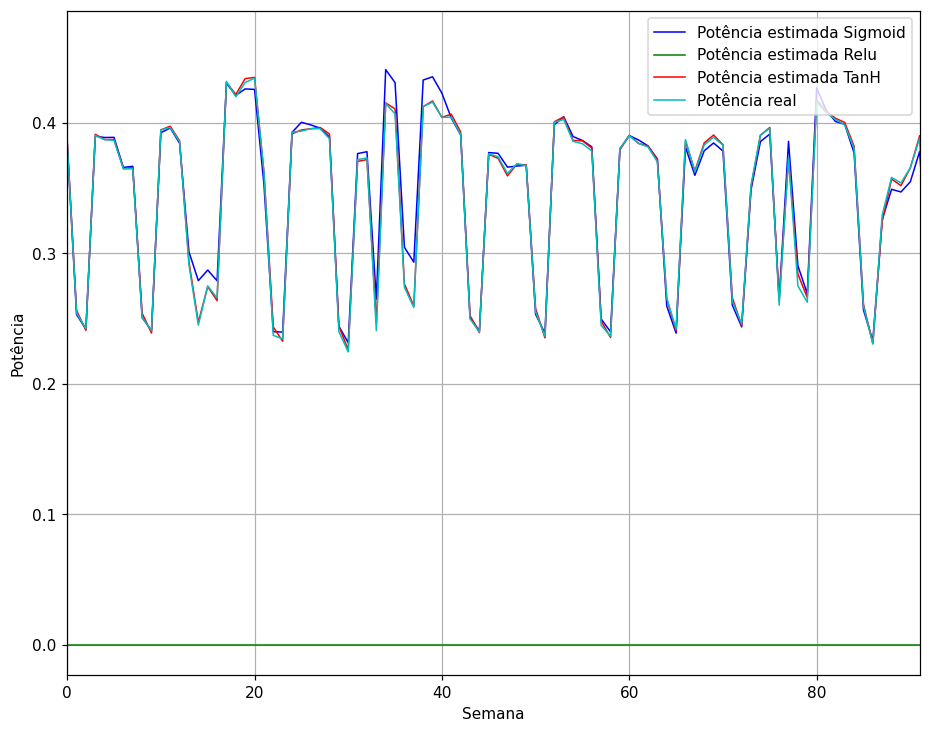

In [61]:
NNeural.plot(modelList, x_test, y_test) 

In [64]:
NNeural.evaluate_models(modelList, x_test, y_test)

Evaluating model on a test set
Gettings model. Now it is: <keras.engine.sequential.Sequential object at 0x7faa54375420>
21/21 [==============================] - 0s 634us/step - loss: 1.0399e-04 - mean_squared_error: 1.0399e-04 - mean_absolute_error: 0.0075 - mape: 2.3708
Evaluating model on a test set
Gettings model. Now it is: <keras.engine.sequential.Sequential object at 0x7faad02363b0>
21/21 [==============================] - 0s 588us/step - loss: 0.1231 - mean_squared_error: 0.1231 - mean_absolute_error: 0.3444 - mape: 100.0000
Evaluating model on a test set
Gettings model. Now it is: <keras.engine.sequential.Sequential object at 0x7faad07e9c90>
21/21 [==============================] - 0s 622us/step - loss: 9.6988e-06 - mean_squared_error: 9.6988e-06 - mean_absolute_error: 0.0021 - mape: 0.6966
Metrics head: [loss, mean_squared_error, mean_absolute_error, mape]
Metrics Sigmoid: [0.00010399070743005723, 0.00010399070743005723, 0.007482011336833239, 2.370785713195801]
Metrics Relu: [

## Creating the best model

Reset Model
Start training...
Gettings model. Now it is: None
Creating model...
Add Input layer with 7 inputs
Activation function: relu
Adding hiden layer 1 with 40
Adding hiden layer 2 with 40
Adding hiden layer 3 with 40
Adding hiden layer 4 with 40
Adding output layer with 1 and using linear as activation function
Compiling module with optimizer:adam, loss:mean_squared_error, metrics:['mean_squared_error', 'mean_absolute_error', 'mape']
Epoch 1/10000
48/48 [==============================] - 0s 793us/step - loss: 0.0143 - mean_squared_error: 0.0143 - mean_absolute_error: 0.0871 - mape: 26.4019
Epoch 2/10000
48/48 [==============================] - 0s 729us/step - loss: 0.0023 - mean_squared_error: 0.0023 - mean_absolute_error: 0.0377 - mape: 11.9752
Epoch 3/10000
48/48 [==============================] - 0s 782us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0295 - mape: 9.1497
Epoch 4/10000
48/48 [==============================] - 0s 792us/step - loss: 0.0

48/48 [==============================] - 0s 768us/step - loss: 5.5213e-05 - mean_squared_error: 5.5213e-05 - mean_absolute_error: 0.0060 - mape: 1.8234
Epoch 98/10000
48/48 [==============================] - 0s 749us/step - loss: 5.4325e-05 - mean_squared_error: 5.4325e-05 - mean_absolute_error: 0.0058 - mape: 1.7671
Epoch 99/10000
48/48 [==============================] - 0s 770us/step - loss: 3.7772e-05 - mean_squared_error: 3.7772e-05 - mean_absolute_error: 0.0048 - mape: 1.4744
Epoch 100/10000
48/48 [==============================] - 0s 761us/step - loss: 3.0549e-05 - mean_squared_error: 3.0549e-05 - mean_absolute_error: 0.0043 - mape: 1.3135
Epoch 101/10000
48/48 [==============================] - 0s 854us/step - loss: 3.3595e-05 - mean_squared_error: 3.3595e-05 - mean_absolute_error: 0.0044 - mape: 1.3660
Epoch 102/10000
48/48 [==============================] - 0s 773us/step - loss: 4.1294e-05 - mean_squared_error: 4.1294e-05 - mean_absolute_error: 0.0051 - mape: 1.5617
Epoch 103/

48/48 [==============================] - 0s 768us/step - loss: 2.4398e-05 - mean_squared_error: 2.4398e-05 - mean_absolute_error: 0.0038 - mape: 1.1679
Epoch 194/10000
48/48 [==============================] - 0s 764us/step - loss: 1.6799e-05 - mean_squared_error: 1.6799e-05 - mean_absolute_error: 0.0031 - mape: 0.9801
Epoch 195/10000
48/48 [==============================] - 0s 751us/step - loss: 1.4039e-05 - mean_squared_error: 1.4039e-05 - mean_absolute_error: 0.0029 - mape: 0.8886
Epoch 196/10000
48/48 [==============================] - 0s 771us/step - loss: 2.1574e-05 - mean_squared_error: 2.1574e-05 - mean_absolute_error: 0.0035 - mape: 1.0859
Epoch 197/10000
48/48 [==============================] - 0s 781us/step - loss: 3.0182e-05 - mean_squared_error: 3.0182e-05 - mean_absolute_error: 0.0040 - mape: 1.2399
Epoch 198/10000
48/48 [==============================] - 0s 743us/step - loss: 3.8028e-05 - mean_squared_error: 3.8028e-05 - mean_absolute_error: 0.0051 - mape: 1.5485
Epoch 19

48/48 [==============================] - 0s 855us/step - loss: 1.1244e-05 - mean_squared_error: 1.1244e-05 - mean_absolute_error: 0.0026 - mape: 0.7938
Epoch 290/10000
48/48 [==============================] - 0s 755us/step - loss: 3.0228e-05 - mean_squared_error: 3.0228e-05 - mean_absolute_error: 0.0043 - mape: 1.3244
Epoch 291/10000
48/48 [==============================] - 0s 795us/step - loss: 3.1615e-05 - mean_squared_error: 3.1615e-05 - mean_absolute_error: 0.0043 - mape: 1.3143
Epoch 292/10000
48/48 [==============================] - 0s 739us/step - loss: 1.3893e-05 - mean_squared_error: 1.3893e-05 - mean_absolute_error: 0.0029 - mape: 0.8918
Epoch 293/10000
48/48 [==============================] - 0s 762us/step - loss: 1.9124e-05 - mean_squared_error: 1.9124e-05 - mean_absolute_error: 0.0035 - mape: 1.0749
Epoch 294/10000
48/48 [==============================] - 0s 759us/step - loss: 2.3785e-05 - mean_squared_error: 2.3785e-05 - mean_absolute_error: 0.0039 - mape: 1.1878
Epoch 29

48/48 [==============================] - 0s 749us/step - loss: 1.8095e-05 - mean_squared_error: 1.8095e-05 - mean_absolute_error: 0.0034 - mape: 1.0560
Epoch 386/10000
48/48 [==============================] - 0s 732us/step - loss: 1.4128e-05 - mean_squared_error: 1.4128e-05 - mean_absolute_error: 0.0028 - mape: 0.8952
Epoch 387/10000
48/48 [==============================] - 0s 736us/step - loss: 3.4480e-05 - mean_squared_error: 3.4480e-05 - mean_absolute_error: 0.0048 - mape: 1.4750
Epoch 388/10000
48/48 [==============================] - 0s 749us/step - loss: 3.1017e-05 - mean_squared_error: 3.1017e-05 - mean_absolute_error: 0.0045 - mape: 1.3943
Epoch 389/10000
48/48 [==============================] - 0s 759us/step - loss: 2.2552e-05 - mean_squared_error: 2.2552e-05 - mean_absolute_error: 0.0038 - mape: 1.1624
Epoch 390/10000
48/48 [==============================] - 0s 772us/step - loss: 9.4370e-06 - mean_squared_error: 9.4370e-06 - mean_absolute_error: 0.0023 - mape: 0.7189
Epoch 39

48/48 [==============================] - 0s 759us/step - loss: 7.7581e-06 - mean_squared_error: 7.7581e-06 - mean_absolute_error: 0.0021 - mape: 0.6681
Epoch 482/10000
48/48 [==============================] - 0s 744us/step - loss: 1.3862e-05 - mean_squared_error: 1.3862e-05 - mean_absolute_error: 0.0029 - mape: 0.9005
Epoch 483/10000
48/48 [==============================] - 0s 757us/step - loss: 2.2483e-05 - mean_squared_error: 2.2483e-05 - mean_absolute_error: 0.0038 - mape: 1.1835
Epoch 484/10000
48/48 [==============================] - 0s 728us/step - loss: 1.7822e-05 - mean_squared_error: 1.7822e-05 - mean_absolute_error: 0.0034 - mape: 1.0551
Epoch 485/10000
48/48 [==============================] - 0s 714us/step - loss: 1.5553e-05 - mean_squared_error: 1.5553e-05 - mean_absolute_error: 0.0032 - mape: 0.9774
Epoch 486/10000
48/48 [==============================] - 0s 771us/step - loss: 1.3775e-05 - mean_squared_error: 1.3775e-05 - mean_absolute_error: 0.0029 - mape: 0.9074
Epoch 48

48/48 [==============================] - 0s 786us/step - loss: 3.9859e-05 - mean_squared_error: 3.9859e-05 - mean_absolute_error: 0.0051 - mape: 1.5534
Epoch 578/10000
48/48 [==============================] - 0s 799us/step - loss: 1.1193e-05 - mean_squared_error: 1.1193e-05 - mean_absolute_error: 0.0026 - mape: 0.8218
Epoch 579/10000
48/48 [==============================] - 0s 771us/step - loss: 1.1547e-05 - mean_squared_error: 1.1547e-05 - mean_absolute_error: 0.0027 - mape: 0.8270
Epoch 580/10000
48/48 [==============================] - 0s 808us/step - loss: 7.8799e-06 - mean_squared_error: 7.8799e-06 - mean_absolute_error: 0.0022 - mape: 0.6847
Epoch 581/10000
48/48 [==============================] - 0s 820us/step - loss: 9.2064e-06 - mean_squared_error: 9.2064e-06 - mean_absolute_error: 0.0023 - mape: 0.7216
Epoch 582/10000
48/48 [==============================] - 0s 783us/step - loss: 2.1058e-05 - mean_squared_error: 2.1058e-05 - mean_absolute_error: 0.0036 - mape: 1.1189
Epoch 58

48/48 [==============================] - 0s 731us/step - loss: 1.4855e-05 - mean_squared_error: 1.4855e-05 - mean_absolute_error: 0.0030 - mape: 0.9417
Epoch 674/10000
48/48 [==============================] - 0s 760us/step - loss: 1.2116e-05 - mean_squared_error: 1.2116e-05 - mean_absolute_error: 0.0028 - mape: 0.8627
Epoch 675/10000
48/48 [==============================] - 0s 793us/step - loss: 9.6331e-06 - mean_squared_error: 9.6331e-06 - mean_absolute_error: 0.0024 - mape: 0.7385
Epoch 676/10000
48/48 [==============================] - 0s 733us/step - loss: 9.5707e-06 - mean_squared_error: 9.5707e-06 - mean_absolute_error: 0.0024 - mape: 0.7598
Epoch 677/10000
48/48 [==============================] - 0s 779us/step - loss: 7.1547e-06 - mean_squared_error: 7.1547e-06 - mean_absolute_error: 0.0020 - mape: 0.6378
Epoch 678/10000
48/48 [==============================] - 0s 816us/step - loss: 1.0504e-05 - mean_squared_error: 1.0504e-05 - mean_absolute_error: 0.0025 - mape: 0.7893
Epoch 67

48/48 [==============================] - 0s 728us/step - loss: 9.5403e-06 - mean_squared_error: 9.5403e-06 - mean_absolute_error: 0.0024 - mape: 0.7501
Epoch 770/10000
48/48 [==============================] - 0s 895us/step - loss: 1.8346e-05 - mean_squared_error: 1.8346e-05 - mean_absolute_error: 0.0034 - mape: 1.0434
Epoch 771/10000
48/48 [==============================] - 0s 806us/step - loss: 8.6333e-06 - mean_squared_error: 8.6333e-06 - mean_absolute_error: 0.0023 - mape: 0.7124
Epoch 772/10000
48/48 [==============================] - 0s 821us/step - loss: 1.2715e-05 - mean_squared_error: 1.2715e-05 - mean_absolute_error: 0.0028 - mape: 0.8653
Epoch 773/10000
48/48 [==============================] - 0s 812us/step - loss: 2.0656e-05 - mean_squared_error: 2.0656e-05 - mean_absolute_error: 0.0038 - mape: 1.1715
Epoch 774/10000
48/48 [==============================] - 0s 776us/step - loss: 1.5025e-05 - mean_squared_error: 1.5025e-05 - mean_absolute_error: 0.0030 - mape: 0.9364
Epoch 77

48/48 [==============================] - 0s 824us/step - loss: 8.0853e-06 - mean_squared_error: 8.0853e-06 - mean_absolute_error: 0.0022 - mape: 0.6872
Epoch 866/10000
48/48 [==============================] - 0s 958us/step - loss: 1.1712e-05 - mean_squared_error: 1.1712e-05 - mean_absolute_error: 0.0027 - mape: 0.8244
Epoch 867/10000
48/48 [==============================] - 0s 857us/step - loss: 6.8637e-06 - mean_squared_error: 6.8637e-06 - mean_absolute_error: 0.0020 - mape: 0.6212
Epoch 868/10000
48/48 [==============================] - 0s 882us/step - loss: 5.1712e-06 - mean_squared_error: 5.1712e-06 - mean_absolute_error: 0.0018 - mape: 0.5547
Epoch 869/10000
48/48 [==============================] - 0s 800us/step - loss: 8.1374e-06 - mean_squared_error: 8.1374e-06 - mean_absolute_error: 0.0022 - mape: 0.6980
Epoch 870/10000
48/48 [==============================] - 0s 778us/step - loss: 1.1243e-05 - mean_squared_error: 1.1243e-05 - mean_absolute_error: 0.0027 - mape: 0.8343
Epoch 87

48/48 [==============================] - 0s 770us/step - loss: 6.6469e-06 - mean_squared_error: 6.6469e-06 - mean_absolute_error: 0.0020 - mape: 0.6269
Epoch 962/10000
48/48 [==============================] - 0s 886us/step - loss: 9.1266e-06 - mean_squared_error: 9.1266e-06 - mean_absolute_error: 0.0024 - mape: 0.7420
Epoch 963/10000
48/48 [==============================] - 0s 806us/step - loss: 6.7607e-06 - mean_squared_error: 6.7607e-06 - mean_absolute_error: 0.0020 - mape: 0.6183
Epoch 964/10000
48/48 [==============================] - 0s 877us/step - loss: 5.4151e-06 - mean_squared_error: 5.4151e-06 - mean_absolute_error: 0.0018 - mape: 0.5708
Epoch 965/10000
48/48 [==============================] - 0s 745us/step - loss: 8.7941e-06 - mean_squared_error: 8.7941e-06 - mean_absolute_error: 0.0024 - mape: 0.7331
Epoch 966/10000
48/48 [==============================] - 0s 751us/step - loss: 1.4555e-05 - mean_squared_error: 1.4555e-05 - mean_absolute_error: 0.0031 - mape: 0.9746
Epoch 96

48/48 [==============================] - 0s 754us/step - loss: 1.3268e-05 - mean_squared_error: 1.3268e-05 - mean_absolute_error: 0.0029 - mape: 0.8941
Epoch 1058/10000
48/48 [==============================] - 0s 799us/step - loss: 1.1434e-05 - mean_squared_error: 1.1434e-05 - mean_absolute_error: 0.0027 - mape: 0.8384
Epoch 1059/10000
48/48 [==============================] - 0s 787us/step - loss: 1.4630e-05 - mean_squared_error: 1.4630e-05 - mean_absolute_error: 0.0031 - mape: 0.9461
Epoch 1060/10000
48/48 [==============================] - 0s 770us/step - loss: 9.6359e-06 - mean_squared_error: 9.6359e-06 - mean_absolute_error: 0.0025 - mape: 0.7619
Epoch 1061/10000
48/48 [==============================] - 0s 787us/step - loss: 4.4311e-06 - mean_squared_error: 4.4311e-06 - mean_absolute_error: 0.0016 - mape: 0.5016
Epoch 1062/10000
48/48 [==============================] - 0s 774us/step - loss: 7.8839e-06 - mean_squared_error: 7.8839e-06 - mean_absolute_error: 0.0023 - mape: 0.7025
Epo

48/48 [==============================] - 0s 789us/step - loss: 8.8568e-06 - mean_squared_error: 8.8568e-06 - mean_absolute_error: 0.0024 - mape: 0.7333
Epoch 1154/10000
48/48 [==============================] - 0s 789us/step - loss: 7.4246e-06 - mean_squared_error: 7.4246e-06 - mean_absolute_error: 0.0022 - mape: 0.6784
Epoch 1155/10000
48/48 [==============================] - 0s 808us/step - loss: 5.7051e-06 - mean_squared_error: 5.7051e-06 - mean_absolute_error: 0.0019 - mape: 0.5831
Epoch 1156/10000
48/48 [==============================] - 0s 737us/step - loss: 1.5510e-05 - mean_squared_error: 1.5510e-05 - mean_absolute_error: 0.0031 - mape: 0.9655
Epoch 1157/10000
48/48 [==============================] - 0s 873us/step - loss: 5.0938e-06 - mean_squared_error: 5.0938e-06 - mean_absolute_error: 0.0017 - mape: 0.5415
Epoch 1158/10000
48/48 [==============================] - 0s 732us/step - loss: 8.0408e-06 - mean_squared_error: 8.0408e-06 - mean_absolute_error: 0.0022 - mape: 0.6819
Epo

48/48 [==============================] - 0s 766us/step - loss: 5.8071e-06 - mean_squared_error: 5.8071e-06 - mean_absolute_error: 0.0019 - mape: 0.5890
Epoch 1250/10000
48/48 [==============================] - 0s 882us/step - loss: 1.5833e-05 - mean_squared_error: 1.5833e-05 - mean_absolute_error: 0.0033 - mape: 1.0316
Epoch 1251/10000
48/48 [==============================] - 0s 777us/step - loss: 1.5861e-05 - mean_squared_error: 1.5861e-05 - mean_absolute_error: 0.0032 - mape: 1.0054
Epoch 1252/10000
48/48 [==============================] - 0s 757us/step - loss: 8.7761e-06 - mean_squared_error: 8.7761e-06 - mean_absolute_error: 0.0022 - mape: 0.6814
Epoch 1253/10000
48/48 [==============================] - 0s 796us/step - loss: 6.3302e-06 - mean_squared_error: 6.3302e-06 - mean_absolute_error: 0.0020 - mape: 0.6178
Epoch 1254/10000
48/48 [==============================] - 0s 784us/step - loss: 5.0214e-06 - mean_squared_error: 5.0214e-06 - mean_absolute_error: 0.0018 - mape: 0.5596
Epo

48/48 [==============================] - 0s 769us/step - loss: 6.6183e-06 - mean_squared_error: 6.6183e-06 - mean_absolute_error: 0.0020 - mape: 0.6242
Epoch 1346/10000
48/48 [==============================] - 0s 771us/step - loss: 1.0009e-05 - mean_squared_error: 1.0009e-05 - mean_absolute_error: 0.0025 - mape: 0.7729
Epoch 1347/10000
48/48 [==============================] - 0s 792us/step - loss: 7.6817e-06 - mean_squared_error: 7.6817e-06 - mean_absolute_error: 0.0022 - mape: 0.6869
Epoch 1348/10000
48/48 [==============================] - 0s 794us/step - loss: 6.2617e-06 - mean_squared_error: 6.2617e-06 - mean_absolute_error: 0.0019 - mape: 0.6050
Epoch 1349/10000
48/48 [==============================] - 0s 818us/step - loss: 4.2125e-06 - mean_squared_error: 4.2125e-06 - mean_absolute_error: 0.0016 - mape: 0.5009
Epoch 1350/10000
48/48 [==============================] - 0s 823us/step - loss: 4.2867e-06 - mean_squared_error: 4.2867e-06 - mean_absolute_error: 0.0016 - mape: 0.5073
Epo

48/48 [==============================] - 0s 748us/step - loss: 2.2661e-05 - mean_squared_error: 2.2661e-05 - mean_absolute_error: 0.0035 - mape: 1.0916
Epoch 1442/10000
48/48 [==============================] - 0s 792us/step - loss: 2.7414e-05 - mean_squared_error: 2.7414e-05 - mean_absolute_error: 0.0040 - mape: 1.2245
Epoch 1443/10000
48/48 [==============================] - 0s 832us/step - loss: 7.8182e-06 - mean_squared_error: 7.8182e-06 - mean_absolute_error: 0.0021 - mape: 0.6557
Epoch 1444/10000
48/48 [==============================] - 0s 802us/step - loss: 5.2122e-06 - mean_squared_error: 5.2122e-06 - mean_absolute_error: 0.0018 - mape: 0.5549
Epoch 1445/10000
48/48 [==============================] - 0s 771us/step - loss: 6.4498e-06 - mean_squared_error: 6.4498e-06 - mean_absolute_error: 0.0020 - mape: 0.6279
Epoch 1446/10000
48/48 [==============================] - 0s 765us/step - loss: 9.8591e-06 - mean_squared_error: 9.8591e-06 - mean_absolute_error: 0.0024 - mape: 0.7585
Epo

48/48 [==============================] - 0s 782us/step - loss: 4.1454e-06 - mean_squared_error: 4.1454e-06 - mean_absolute_error: 0.0016 - mape: 0.5051
Epoch 1538/10000
48/48 [==============================] - 0s 776us/step - loss: 5.4862e-06 - mean_squared_error: 5.4862e-06 - mean_absolute_error: 0.0018 - mape: 0.5564
Epoch 1539/10000
48/48 [==============================] - 0s 813us/step - loss: 7.0417e-06 - mean_squared_error: 7.0417e-06 - mean_absolute_error: 0.0021 - mape: 0.6579
Epoch 1540/10000
48/48 [==============================] - 0s 721us/step - loss: 4.2199e-06 - mean_squared_error: 4.2199e-06 - mean_absolute_error: 0.0016 - mape: 0.5012
Epoch 1541/10000
48/48 [==============================] - 0s 767us/step - loss: 5.1966e-06 - mean_squared_error: 5.1966e-06 - mean_absolute_error: 0.0016 - mape: 0.5094
Epoch 1542/10000
48/48 [==============================] - 0s 769us/step - loss: 7.3822e-06 - mean_squared_error: 7.3822e-06 - mean_absolute_error: 0.0021 - mape: 0.6652
Epo

48/48 [==============================] - 0s 752us/step - loss: 3.7361e-06 - mean_squared_error: 3.7361e-06 - mean_absolute_error: 0.0015 - mape: 0.4793
Epoch 1634/10000
48/48 [==============================] - 0s 760us/step - loss: 4.0473e-06 - mean_squared_error: 4.0473e-06 - mean_absolute_error: 0.0015 - mape: 0.4849
Epoch 1635/10000
48/48 [==============================] - 0s 862us/step - loss: 1.0206e-05 - mean_squared_error: 1.0206e-05 - mean_absolute_error: 0.0025 - mape: 0.7806
Epoch 1636/10000
48/48 [==============================] - 0s 826us/step - loss: 1.6099e-05 - mean_squared_error: 1.6099e-05 - mean_absolute_error: 0.0033 - mape: 1.0234
Epoch 1637/10000
48/48 [==============================] - 0s 744us/step - loss: 8.6226e-06 - mean_squared_error: 8.6226e-06 - mean_absolute_error: 0.0024 - mape: 0.7330
Epoch 1638/10000
48/48 [==============================] - 0s 746us/step - loss: 4.2361e-06 - mean_squared_error: 4.2361e-06 - mean_absolute_error: 0.0016 - mape: 0.4967
Epo

48/48 [==============================] - 0s 799us/step - loss: 6.9075e-06 - mean_squared_error: 6.9075e-06 - mean_absolute_error: 0.0021 - mape: 0.6491
Epoch 1730/10000
48/48 [==============================] - 0s 753us/step - loss: 3.7557e-06 - mean_squared_error: 3.7557e-06 - mean_absolute_error: 0.0015 - mape: 0.4712
Epoch 1731/10000
48/48 [==============================] - 0s 789us/step - loss: 6.6723e-06 - mean_squared_error: 6.6723e-06 - mean_absolute_error: 0.0020 - mape: 0.6284
Epoch 1732/10000
48/48 [==============================] - 0s 757us/step - loss: 6.9038e-06 - mean_squared_error: 6.9038e-06 - mean_absolute_error: 0.0020 - mape: 0.6246
Epoch 1733/10000
48/48 [==============================] - 0s 745us/step - loss: 4.9212e-06 - mean_squared_error: 4.9212e-06 - mean_absolute_error: 0.0018 - mape: 0.5596
Epoch 1734/10000
48/48 [==============================] - 0s 729us/step - loss: 4.2187e-06 - mean_squared_error: 4.2187e-06 - mean_absolute_error: 0.0016 - mape: 0.5081
Epo

48/48 [==============================] - 0s 821us/step - loss: 3.7153e-06 - mean_squared_error: 3.7153e-06 - mean_absolute_error: 0.0015 - mape: 0.4691
Epoch 1826/10000
48/48 [==============================] - 0s 872us/step - loss: 5.2645e-06 - mean_squared_error: 5.2645e-06 - mean_absolute_error: 0.0018 - mape: 0.5712
Epoch 1827/10000
48/48 [==============================] - 0s 796us/step - loss: 5.7859e-06 - mean_squared_error: 5.7859e-06 - mean_absolute_error: 0.0019 - mape: 0.6001
Epoch 1828/10000
48/48 [==============================] - 0s 757us/step - loss: 1.5398e-05 - mean_squared_error: 1.5398e-05 - mean_absolute_error: 0.0031 - mape: 0.9668
Epoch 1829/10000
48/48 [==============================] - 0s 729us/step - loss: 5.2732e-06 - mean_squared_error: 5.2732e-06 - mean_absolute_error: 0.0018 - mape: 0.5620
Epoch 1830/10000
48/48 [==============================] - 0s 768us/step - loss: 4.7255e-06 - mean_squared_error: 4.7255e-06 - mean_absolute_error: 0.0017 - mape: 0.5388
Epo

48/48 [==============================] - 0s 771us/step - loss: 4.3252e-06 - mean_squared_error: 4.3252e-06 - mean_absolute_error: 0.0016 - mape: 0.5106
Epoch 1922/10000
48/48 [==============================] - 0s 784us/step - loss: 7.4065e-06 - mean_squared_error: 7.4065e-06 - mean_absolute_error: 0.0022 - mape: 0.6830
Epoch 1923/10000
48/48 [==============================] - 0s 744us/step - loss: 7.5592e-06 - mean_squared_error: 7.5592e-06 - mean_absolute_error: 0.0023 - mape: 0.7039
Epoch 1924/10000
48/48 [==============================] - 0s 848us/step - loss: 5.4526e-06 - mean_squared_error: 5.4526e-06 - mean_absolute_error: 0.0019 - mape: 0.5813
Epoch 1925/10000
48/48 [==============================] - 0s 745us/step - loss: 2.9143e-06 - mean_squared_error: 2.9143e-06 - mean_absolute_error: 0.0013 - mape: 0.4089
Epoch 1926/10000
48/48 [==============================] - 0s 774us/step - loss: 4.7935e-06 - mean_squared_error: 4.7935e-06 - mean_absolute_error: 0.0017 - mape: 0.5423
Epo

48/48 [==============================] - 0s 763us/step - loss: 3.9988e-06 - mean_squared_error: 3.9988e-06 - mean_absolute_error: 0.0016 - mape: 0.4935
Epoch 2018/10000
48/48 [==============================] - 0s 762us/step - loss: 5.1002e-06 - mean_squared_error: 5.1002e-06 - mean_absolute_error: 0.0018 - mape: 0.5562
Epoch 2019/10000
48/48 [==============================] - 0s 775us/step - loss: 1.0749e-05 - mean_squared_error: 1.0749e-05 - mean_absolute_error: 0.0026 - mape: 0.8132
Epoch 2020/10000
48/48 [==============================] - 0s 794us/step - loss: 4.9204e-06 - mean_squared_error: 4.9204e-06 - mean_absolute_error: 0.0017 - mape: 0.5474
Epoch 2021/10000
48/48 [==============================] - 0s 801us/step - loss: 1.6143e-05 - mean_squared_error: 1.6143e-05 - mean_absolute_error: 0.0030 - mape: 0.9313
Epoch 2022/10000
48/48 [==============================] - 0s 727us/step - loss: 3.1545e-06 - mean_squared_error: 3.1545e-06 - mean_absolute_error: 0.0013 - mape: 0.4220
Epo

48/48 [==============================] - 0s 763us/step - loss: 1.1416e-05 - mean_squared_error: 1.1416e-05 - mean_absolute_error: 0.0027 - mape: 0.8417
Epoch 2114/10000
48/48 [==============================] - 0s 756us/step - loss: 1.5170e-05 - mean_squared_error: 1.5170e-05 - mean_absolute_error: 0.0031 - mape: 0.9729
Epoch 2115/10000
48/48 [==============================] - 0s 799us/step - loss: 5.6666e-06 - mean_squared_error: 5.6666e-06 - mean_absolute_error: 0.0018 - mape: 0.5651
Epoch 2116/10000
48/48 [==============================] - 0s 770us/step - loss: 2.6625e-06 - mean_squared_error: 2.6625e-06 - mean_absolute_error: 0.0013 - mape: 0.3987
Epoch 2117/10000
48/48 [==============================] - 0s 771us/step - loss: 5.1321e-06 - mean_squared_error: 5.1321e-06 - mean_absolute_error: 0.0017 - mape: 0.5342
Epoch 2118/10000
48/48 [==============================] - 0s 758us/step - loss: 8.5719e-06 - mean_squared_error: 8.5719e-06 - mean_absolute_error: 0.0024 - mape: 0.7479
Epo

48/48 [==============================] - 0s 681us/step - loss: 1.2329e-05 - mean_squared_error: 1.2329e-05 - mean_absolute_error: 0.0027 - mape: 0.8407
Epoch 2210/10000
48/48 [==============================] - 0s 684us/step - loss: 9.0847e-06 - mean_squared_error: 9.0847e-06 - mean_absolute_error: 0.0024 - mape: 0.7641
Epoch 2211/10000
48/48 [==============================] - 0s 712us/step - loss: 4.2752e-06 - mean_squared_error: 4.2752e-06 - mean_absolute_error: 0.0016 - mape: 0.5070
Epoch 2212/10000
48/48 [==============================] - 0s 708us/step - loss: 3.1868e-06 - mean_squared_error: 3.1868e-06 - mean_absolute_error: 0.0014 - mape: 0.4393
Epoch 2213/10000
48/48 [==============================] - 0s 686us/step - loss: 1.0257e-05 - mean_squared_error: 1.0257e-05 - mean_absolute_error: 0.0025 - mape: 0.7794
Epoch 2214/10000
48/48 [==============================] - 0s 681us/step - loss: 4.9125e-06 - mean_squared_error: 4.9125e-06 - mean_absolute_error: 0.0018 - mape: 0.5465
Epo

48/48 [==============================] - 0s 931us/step - loss: 2.5879e-05 - mean_squared_error: 2.5879e-05 - mean_absolute_error: 0.0041 - mape: 1.2743
Epoch 2306/10000
48/48 [==============================] - 0s 852us/step - loss: 5.5672e-06 - mean_squared_error: 5.5672e-06 - mean_absolute_error: 0.0018 - mape: 0.5753
Epoch 2307/10000
48/48 [==============================] - 0s 956us/step - loss: 2.3724e-06 - mean_squared_error: 2.3724e-06 - mean_absolute_error: 0.0012 - mape: 0.3689
Epoch 2308/10000
48/48 [==============================] - 0s 985us/step - loss: 5.6287e-06 - mean_squared_error: 5.6287e-06 - mean_absolute_error: 0.0019 - mape: 0.5982
Epoch 2309/10000
48/48 [==============================] - 0s 1ms/step - loss: 4.0293e-06 - mean_squared_error: 4.0293e-06 - mean_absolute_error: 0.0016 - mape: 0.4995
Epoch 2310/10000
48/48 [==============================] - 0s 817us/step - loss: 1.9938e-06 - mean_squared_error: 1.9938e-06 - mean_absolute_error: 0.0011 - mape: 0.3449
Epoch

48/48 [==============================] - 0s 880us/step - loss: 3.5412e-06 - mean_squared_error: 3.5412e-06 - mean_absolute_error: 0.0014 - mape: 0.4541
Epoch 2402/10000
48/48 [==============================] - 0s 880us/step - loss: 5.6372e-06 - mean_squared_error: 5.6372e-06 - mean_absolute_error: 0.0018 - mape: 0.5706
Epoch 2403/10000
48/48 [==============================] - 0s 788us/step - loss: 1.5999e-05 - mean_squared_error: 1.5999e-05 - mean_absolute_error: 0.0031 - mape: 0.9703
Epoch 2404/10000
48/48 [==============================] - 0s 845us/step - loss: 8.5960e-06 - mean_squared_error: 8.5960e-06 - mean_absolute_error: 0.0023 - mape: 0.7134
Epoch 2405/10000
48/48 [==============================] - 0s 861us/step - loss: 8.1212e-06 - mean_squared_error: 8.1212e-06 - mean_absolute_error: 0.0022 - mape: 0.7055
Epoch 2406/10000
48/48 [==============================] - 0s 838us/step - loss: 2.9013e-06 - mean_squared_error: 2.9013e-06 - mean_absolute_error: 0.0013 - mape: 0.4110
Epo

48/48 [==============================] - 0s 815us/step - loss: 4.3737e-06 - mean_squared_error: 4.3737e-06 - mean_absolute_error: 0.0017 - mape: 0.5328
Epoch 2498/10000
48/48 [==============================] - 0s 758us/step - loss: 9.9831e-06 - mean_squared_error: 9.9831e-06 - mean_absolute_error: 0.0025 - mape: 0.7906
Epoch 2499/10000
48/48 [==============================] - 0s 765us/step - loss: 8.9687e-06 - mean_squared_error: 8.9687e-06 - mean_absolute_error: 0.0024 - mape: 0.7574
Epoch 2500/10000
48/48 [==============================] - 0s 764us/step - loss: 2.9439e-06 - mean_squared_error: 2.9439e-06 - mean_absolute_error: 0.0013 - mape: 0.4148
Epoch 2501/10000
48/48 [==============================] - 0s 754us/step - loss: 5.7210e-06 - mean_squared_error: 5.7210e-06 - mean_absolute_error: 0.0019 - mape: 0.5913
Epoch 2502/10000
48/48 [==============================] - 0s 825us/step - loss: 1.0252e-05 - mean_squared_error: 1.0252e-05 - mean_absolute_error: 0.0026 - mape: 0.7971
Epo

48/48 [==============================] - 0s 848us/step - loss: 2.6727e-05 - mean_squared_error: 2.6727e-05 - mean_absolute_error: 0.0042 - mape: 1.3031
Epoch 2594/10000
48/48 [==============================] - 0s 1ms/step - loss: 9.6353e-06 - mean_squared_error: 9.6353e-06 - mean_absolute_error: 0.0024 - mape: 0.7427
Epoch 2595/10000
48/48 [==============================] - 0s 966us/step - loss: 3.1019e-06 - mean_squared_error: 3.1019e-06 - mean_absolute_error: 0.0014 - mape: 0.4329
Epoch 2596/10000
48/48 [==============================] - 0s 909us/step - loss: 7.3454e-06 - mean_squared_error: 7.3454e-06 - mean_absolute_error: 0.0022 - mape: 0.6916
Epoch 2597/10000
48/48 [==============================] - 0s 1ms/step - loss: 2.0739e-05 - mean_squared_error: 2.0739e-05 - mean_absolute_error: 0.0037 - mape: 1.1577
Epoch 2598/10000
48/48 [==============================] - 0s 1ms/step - loss: 4.2222e-06 - mean_squared_error: 4.2222e-06 - mean_absolute_error: 0.0015 - mape: 0.4798
Epoch 259

48/48 [==============================] - 0s 707us/step - loss: 8.7830e-06 - mean_squared_error: 8.7830e-06 - mean_absolute_error: 0.0024 - mape: 0.7376
Epoch 2690/10000
48/48 [==============================] - 0s 784us/step - loss: 4.3449e-06 - mean_squared_error: 4.3449e-06 - mean_absolute_error: 0.0016 - mape: 0.5150
Epoch 2691/10000
48/48 [==============================] - 0s 954us/step - loss: 4.4629e-06 - mean_squared_error: 4.4629e-06 - mean_absolute_error: 0.0017 - mape: 0.5234
Epoch 2692/10000
48/48 [==============================] - 0s 907us/step - loss: 5.6844e-06 - mean_squared_error: 5.6844e-06 - mean_absolute_error: 0.0020 - mape: 0.6050
Epoch 2693/10000
48/48 [==============================] - 0s 991us/step - loss: 2.5058e-06 - mean_squared_error: 2.5058e-06 - mean_absolute_error: 0.0012 - mape: 0.3826
Epoch 2694/10000
48/48 [==============================] - 0s 1ms/step - loss: 4.1778e-06 - mean_squared_error: 4.1778e-06 - mean_absolute_error: 0.0016 - mape: 0.5061
Epoch

48/48 [==============================] - 0s 808us/step - loss: 6.7660e-06 - mean_squared_error: 6.7660e-06 - mean_absolute_error: 0.0021 - mape: 0.6562
Epoch 2786/10000
48/48 [==============================] - 0s 766us/step - loss: 5.5104e-06 - mean_squared_error: 5.5104e-06 - mean_absolute_error: 0.0019 - mape: 0.6004
Epoch 2787/10000
48/48 [==============================] - 0s 750us/step - loss: 3.3767e-06 - mean_squared_error: 3.3767e-06 - mean_absolute_error: 0.0014 - mape: 0.4531
Epoch 2788/10000
48/48 [==============================] - 0s 780us/step - loss: 4.5197e-06 - mean_squared_error: 4.5197e-06 - mean_absolute_error: 0.0017 - mape: 0.5292
Epoch 2789/10000
48/48 [==============================] - 0s 733us/step - loss: 2.2508e-06 - mean_squared_error: 2.2508e-06 - mean_absolute_error: 0.0012 - mape: 0.3689
Epoch 2790/10000
48/48 [==============================] - 0s 742us/step - loss: 2.6397e-06 - mean_squared_error: 2.6397e-06 - mean_absolute_error: 0.0013 - mape: 0.4028
Epo

48/48 [==============================] - 0s 826us/step - loss: 3.6644e-06 - mean_squared_error: 3.6644e-06 - mean_absolute_error: 0.0015 - mape: 0.4778
Epoch 2882/10000
48/48 [==============================] - 0s 738us/step - loss: 3.9386e-06 - mean_squared_error: 3.9386e-06 - mean_absolute_error: 0.0016 - mape: 0.4922
Epoch 2883/10000
48/48 [==============================] - 0s 851us/step - loss: 4.9588e-06 - mean_squared_error: 4.9588e-06 - mean_absolute_error: 0.0017 - mape: 0.5358
Epoch 2884/10000
48/48 [==============================] - 0s 1ms/step - loss: 1.1547e-05 - mean_squared_error: 1.1547e-05 - mean_absolute_error: 0.0026 - mape: 0.8282
Epoch 2885/10000
48/48 [==============================] - 0s 958us/step - loss: 9.7243e-06 - mean_squared_error: 9.7243e-06 - mean_absolute_error: 0.0025 - mape: 0.7853
Epoch 2886/10000
48/48 [==============================] - 0s 824us/step - loss: 4.4781e-06 - mean_squared_error: 4.4781e-06 - mean_absolute_error: 0.0016 - mape: 0.5117
Epoch

48/48 [==============================] - 0s 753us/step - loss: 2.5976e-06 - mean_squared_error: 2.5976e-06 - mean_absolute_error: 0.0013 - mape: 0.3976
Epoch 2978/10000
48/48 [==============================] - 0s 818us/step - loss: 2.4247e-06 - mean_squared_error: 2.4247e-06 - mean_absolute_error: 0.0012 - mape: 0.3763
Epoch 2979/10000
48/48 [==============================] - 0s 779us/step - loss: 3.9950e-06 - mean_squared_error: 3.9950e-06 - mean_absolute_error: 0.0016 - mape: 0.5069
Epoch 2980/10000
48/48 [==============================] - 0s 770us/step - loss: 2.2255e-06 - mean_squared_error: 2.2255e-06 - mean_absolute_error: 0.0012 - mape: 0.3637
Epoch 2981/10000
48/48 [==============================] - 0s 752us/step - loss: 3.4353e-06 - mean_squared_error: 3.4353e-06 - mean_absolute_error: 0.0015 - mape: 0.4678
Epoch 2982/10000
48/48 [==============================] - 0s 751us/step - loss: 6.6063e-06 - mean_squared_error: 6.6063e-06 - mean_absolute_error: 0.0020 - mape: 0.6392
Epo

48/48 [==============================] - 0s 839us/step - loss: 2.8376e-06 - mean_squared_error: 2.8376e-06 - mean_absolute_error: 0.0013 - mape: 0.4105
Epoch 3074/10000
48/48 [==============================] - 0s 919us/step - loss: 2.1424e-06 - mean_squared_error: 2.1424e-06 - mean_absolute_error: 0.0012 - mape: 0.3624
Epoch 3075/10000
48/48 [==============================] - 0s 878us/step - loss: 4.0908e-06 - mean_squared_error: 4.0908e-06 - mean_absolute_error: 0.0016 - mape: 0.4810
Epoch 3076/10000
48/48 [==============================] - 0s 868us/step - loss: 5.5977e-06 - mean_squared_error: 5.5977e-06 - mean_absolute_error: 0.0019 - mape: 0.6029
Epoch 3077/10000
48/48 [==============================] - 0s 901us/step - loss: 3.8480e-06 - mean_squared_error: 3.8480e-06 - mean_absolute_error: 0.0016 - mape: 0.4910
Epoch 3078/10000
48/48 [==============================] - 0s 1ms/step - loss: 4.1778e-06 - mean_squared_error: 4.1778e-06 - mean_absolute_error: 0.0016 - mape: 0.5083
Epoch

48/48 [==============================] - 0s 795us/step - loss: 1.1758e-05 - mean_squared_error: 1.1758e-05 - mean_absolute_error: 0.0026 - mape: 0.8009
Epoch 3170/10000
48/48 [==============================] - 0s 793us/step - loss: 2.9896e-06 - mean_squared_error: 2.9896e-06 - mean_absolute_error: 0.0014 - mape: 0.4282
Epoch 3171/10000
48/48 [==============================] - 0s 818us/step - loss: 4.0440e-06 - mean_squared_error: 4.0440e-06 - mean_absolute_error: 0.0015 - mape: 0.4872
Epoch 3172/10000
48/48 [==============================] - 0s 857us/step - loss: 1.8447e-06 - mean_squared_error: 1.8447e-06 - mean_absolute_error: 0.0011 - mape: 0.3308
Epoch 3173/10000
48/48 [==============================] - 0s 842us/step - loss: 7.3408e-06 - mean_squared_error: 7.3408e-06 - mean_absolute_error: 0.0022 - mape: 0.6936
Epoch 3174/10000
48/48 [==============================] - 0s 946us/step - loss: 5.2019e-06 - mean_squared_error: 5.2019e-06 - mean_absolute_error: 0.0018 - mape: 0.5649
Epo

48/48 [==============================] - 0s 747us/step - loss: 1.8678e-06 - mean_squared_error: 1.8678e-06 - mean_absolute_error: 0.0011 - mape: 0.3294
Epoch 3266/10000
48/48 [==============================] - 0s 809us/step - loss: 3.5749e-06 - mean_squared_error: 3.5749e-06 - mean_absolute_error: 0.0015 - mape: 0.4753
Epoch 3267/10000
48/48 [==============================] - 0s 787us/step - loss: 5.8922e-06 - mean_squared_error: 5.8922e-06 - mean_absolute_error: 0.0019 - mape: 0.5848
Epoch 3268/10000
48/48 [==============================] - 0s 799us/step - loss: 4.6366e-06 - mean_squared_error: 4.6366e-06 - mean_absolute_error: 0.0017 - mape: 0.5396
Epoch 3269/10000
48/48 [==============================] - 0s 747us/step - loss: 6.4830e-06 - mean_squared_error: 6.4830e-06 - mean_absolute_error: 0.0021 - mape: 0.6458
Epoch 3270/10000
48/48 [==============================] - 0s 807us/step - loss: 2.6589e-06 - mean_squared_error: 2.6589e-06 - mean_absolute_error: 0.0013 - mape: 0.3967
Epo

48/48 [==============================] - 0s 740us/step - loss: 2.9523e-06 - mean_squared_error: 2.9523e-06 - mean_absolute_error: 0.0014 - mape: 0.4314
Epoch 3362/10000
48/48 [==============================] - 0s 690us/step - loss: 2.5608e-06 - mean_squared_error: 2.5608e-06 - mean_absolute_error: 0.0012 - mape: 0.3930
Epoch 3363/10000
48/48 [==============================] - 0s 682us/step - loss: 1.7432e-06 - mean_squared_error: 1.7432e-06 - mean_absolute_error: 9.9108e-04 - mape: 0.3089
Epoch 3364/10000
48/48 [==============================] - 0s 689us/step - loss: 2.4441e-06 - mean_squared_error: 2.4441e-06 - mean_absolute_error: 0.0012 - mape: 0.3884
Epoch 3365/10000
48/48 [==============================] - 0s 686us/step - loss: 2.5826e-06 - mean_squared_error: 2.5826e-06 - mean_absolute_error: 0.0012 - mape: 0.3849
Epoch 3366/10000
48/48 [==============================] - 0s 713us/step - loss: 1.1058e-05 - mean_squared_error: 1.1058e-05 - mean_absolute_error: 0.0026 - mape: 0.8074

48/48 [==============================] - 0s 814us/step - loss: 9.0342e-06 - mean_squared_error: 9.0342e-06 - mean_absolute_error: 0.0025 - mape: 0.7764
Epoch 3458/10000
48/48 [==============================] - 0s 770us/step - loss: 1.0412e-05 - mean_squared_error: 1.0412e-05 - mean_absolute_error: 0.0026 - mape: 0.7923
Epoch 3459/10000
48/48 [==============================] - 0s 716us/step - loss: 6.4227e-06 - mean_squared_error: 6.4227e-06 - mean_absolute_error: 0.0020 - mape: 0.6227
Epoch 3460/10000
48/48 [==============================] - 0s 735us/step - loss: 1.7022e-06 - mean_squared_error: 1.7022e-06 - mean_absolute_error: 9.8243e-04 - mape: 0.3087
Epoch 3461/10000
48/48 [==============================] - 0s 722us/step - loss: 1.7786e-06 - mean_squared_error: 1.7786e-06 - mean_absolute_error: 0.0010 - mape: 0.3303
Epoch 3462/10000
48/48 [==============================] - 0s 676us/step - loss: 2.9094e-06 - mean_squared_error: 2.9094e-06 - mean_absolute_error: 0.0014 - mape: 0.4250

48/48 [==============================] - 0s 884us/step - loss: 3.1850e-06 - mean_squared_error: 3.1850e-06 - mean_absolute_error: 0.0013 - mape: 0.4159
Epoch 3554/10000
48/48 [==============================] - 0s 971us/step - loss: 2.3322e-06 - mean_squared_error: 2.3322e-06 - mean_absolute_error: 0.0012 - mape: 0.3674
Epoch 3555/10000
48/48 [==============================] - 0s 866us/step - loss: 1.3438e-06 - mean_squared_error: 1.3438e-06 - mean_absolute_error: 8.9006e-04 - mape: 0.2789
Epoch 3556/10000
48/48 [==============================] - 0s 812us/step - loss: 1.2656e-06 - mean_squared_error: 1.2656e-06 - mean_absolute_error: 8.6356e-04 - mape: 0.2730
Epoch 3557/10000
48/48 [==============================] - 0s 685us/step - loss: 1.7127e-06 - mean_squared_error: 1.7127e-06 - mean_absolute_error: 0.0010 - mape: 0.3253
Epoch 3558/10000
48/48 [==============================] - 0s 695us/step - loss: 2.2679e-06 - mean_squared_error: 2.2679e-06 - mean_absolute_error: 0.0011 - mape: 0.

48/48 [==============================] - 0s 736us/step - loss: 1.9600e-06 - mean_squared_error: 1.9600e-06 - mean_absolute_error: 0.0011 - mape: 0.3463
Epoch 3650/10000
48/48 [==============================] - 0s 759us/step - loss: 2.5541e-06 - mean_squared_error: 2.5541e-06 - mean_absolute_error: 0.0013 - mape: 0.3929
Epoch 3651/10000
48/48 [==============================] - 0s 747us/step - loss: 2.3926e-06 - mean_squared_error: 2.3926e-06 - mean_absolute_error: 0.0012 - mape: 0.3780
Epoch 3652/10000
48/48 [==============================] - 0s 756us/step - loss: 2.3349e-06 - mean_squared_error: 2.3349e-06 - mean_absolute_error: 0.0012 - mape: 0.3851
Epoch 3653/10000
48/48 [==============================] - 0s 750us/step - loss: 3.7408e-06 - mean_squared_error: 3.7408e-06 - mean_absolute_error: 0.0016 - mape: 0.4890
Epoch 3654/10000
48/48 [==============================] - 0s 763us/step - loss: 3.0567e-06 - mean_squared_error: 3.0567e-06 - mean_absolute_error: 0.0014 - mape: 0.4324
Epo

48/48 [==============================] - 0s 1ms/step - loss: 1.5184e-06 - mean_squared_error: 1.5184e-06 - mean_absolute_error: 9.5677e-04 - mape: 0.2972
Epoch 3746/10000
48/48 [==============================] - 0s 922us/step - loss: 4.7478e-06 - mean_squared_error: 4.7478e-06 - mean_absolute_error: 0.0016 - mape: 0.5081
Epoch 3747/10000
48/48 [==============================] - 0s 863us/step - loss: 1.1099e-05 - mean_squared_error: 1.1099e-05 - mean_absolute_error: 0.0025 - mape: 0.7948
Epoch 3748/10000
48/48 [==============================] - 0s 978us/step - loss: 5.4685e-06 - mean_squared_error: 5.4685e-06 - mean_absolute_error: 0.0018 - mape: 0.5785
Epoch 3749/10000
48/48 [==============================] - 0s 888us/step - loss: 2.9839e-06 - mean_squared_error: 2.9839e-06 - mean_absolute_error: 0.0014 - mape: 0.4248
Epoch 3750/10000
48/48 [==============================] - 0s 873us/step - loss: 3.0249e-06 - mean_squared_error: 3.0249e-06 - mean_absolute_error: 0.0014 - mape: 0.4377
E

48/48 [==============================] - 0s 700us/step - loss: 4.3351e-06 - mean_squared_error: 4.3351e-06 - mean_absolute_error: 0.0017 - mape: 0.5317
Epoch 3842/10000
48/48 [==============================] - 0s 716us/step - loss: 2.2117e-06 - mean_squared_error: 2.2117e-06 - mean_absolute_error: 0.0012 - mape: 0.3587
Epoch 3843/10000
48/48 [==============================] - 0s 701us/step - loss: 4.3442e-06 - mean_squared_error: 4.3442e-06 - mean_absolute_error: 0.0017 - mape: 0.5344
Epoch 3844/10000
48/48 [==============================] - 0s 708us/step - loss: 2.1373e-06 - mean_squared_error: 2.1373e-06 - mean_absolute_error: 0.0011 - mape: 0.3569
Epoch 3845/10000
48/48 [==============================] - 0s 690us/step - loss: 5.5691e-06 - mean_squared_error: 5.5691e-06 - mean_absolute_error: 0.0019 - mape: 0.5967
Epoch 3846/10000
48/48 [==============================] - 0s 755us/step - loss: 1.2400e-05 - mean_squared_error: 1.2400e-05 - mean_absolute_error: 0.0029 - mape: 0.8978
Epo

48/48 [==============================] - 0s 750us/step - loss: 5.7622e-06 - mean_squared_error: 5.7622e-06 - mean_absolute_error: 0.0019 - mape: 0.6051
Epoch 3938/10000
48/48 [==============================] - 0s 709us/step - loss: 5.5418e-06 - mean_squared_error: 5.5418e-06 - mean_absolute_error: 0.0018 - mape: 0.5562
Epoch 3939/10000
48/48 [==============================] - 0s 762us/step - loss: 2.9419e-05 - mean_squared_error: 2.9419e-05 - mean_absolute_error: 0.0043 - mape: 1.3501
Epoch 3940/10000
48/48 [==============================] - 0s 762us/step - loss: 1.5050e-05 - mean_squared_error: 1.5050e-05 - mean_absolute_error: 0.0032 - mape: 0.9858
Epoch 3941/10000
48/48 [==============================] - 0s 761us/step - loss: 3.1749e-06 - mean_squared_error: 3.1749e-06 - mean_absolute_error: 0.0014 - mape: 0.4346
Epoch 3942/10000
48/48 [==============================] - 0s 745us/step - loss: 2.1261e-06 - mean_squared_error: 2.1261e-06 - mean_absolute_error: 0.0011 - mape: 0.3552
Epo

48/48 [==============================] - 0s 804us/step - loss: 1.3103e-06 - mean_squared_error: 1.3103e-06 - mean_absolute_error: 8.8563e-04 - mape: 0.2786
Epoch 4034/10000
48/48 [==============================] - 0s 842us/step - loss: 4.3377e-06 - mean_squared_error: 4.3377e-06 - mean_absolute_error: 0.0016 - mape: 0.5144
Epoch 4035/10000
48/48 [==============================] - 0s 751us/step - loss: 4.1100e-06 - mean_squared_error: 4.1100e-06 - mean_absolute_error: 0.0017 - mape: 0.5197
Epoch 4036/10000
48/48 [==============================] - 0s 729us/step - loss: 2.4515e-06 - mean_squared_error: 2.4515e-06 - mean_absolute_error: 0.0012 - mape: 0.3910
Epoch 4037/10000
48/48 [==============================] - 0s 675us/step - loss: 3.6820e-06 - mean_squared_error: 3.6820e-06 - mean_absolute_error: 0.0014 - mape: 0.4448
Epoch 4038/10000
48/48 [==============================] - 0s 684us/step - loss: 9.1573e-06 - mean_squared_error: 9.1573e-06 - mean_absolute_error: 0.0025 - mape: 0.7823

48/48 [==============================] - 0s 876us/step - loss: 3.8953e-06 - mean_squared_error: 3.8953e-06 - mean_absolute_error: 0.0016 - mape: 0.4892
Epoch 4130/10000
48/48 [==============================] - 0s 789us/step - loss: 2.4935e-06 - mean_squared_error: 2.4935e-06 - mean_absolute_error: 0.0013 - mape: 0.3918
Epoch 4131/10000
48/48 [==============================] - 0s 805us/step - loss: 3.0134e-06 - mean_squared_error: 3.0134e-06 - mean_absolute_error: 0.0013 - mape: 0.4133
Epoch 4132/10000
48/48 [==============================] - 0s 808us/step - loss: 2.7516e-06 - mean_squared_error: 2.7516e-06 - mean_absolute_error: 0.0013 - mape: 0.4093
Epoch 4133/10000
48/48 [==============================] - 0s 850us/step - loss: 2.2388e-06 - mean_squared_error: 2.2388e-06 - mean_absolute_error: 0.0011 - mape: 0.3603
Epoch 4134/10000
48/48 [==============================] - 0s 825us/step - loss: 4.1307e-06 - mean_squared_error: 4.1307e-06 - mean_absolute_error: 0.0016 - mape: 0.5151
Epo

48/48 [==============================] - 0s 908us/step - loss: 2.7475e-06 - mean_squared_error: 2.7475e-06 - mean_absolute_error: 0.0013 - mape: 0.4133
Epoch 4226/10000
48/48 [==============================] - 0s 1ms/step - loss: 4.2250e-06 - mean_squared_error: 4.2250e-06 - mean_absolute_error: 0.0016 - mape: 0.4982
Epoch 4227/10000
48/48 [==============================] - 0s 760us/step - loss: 1.3681e-06 - mean_squared_error: 1.3681e-06 - mean_absolute_error: 9.2400e-04 - mape: 0.2857
Epoch 4228/10000
48/48 [==============================] - 0s 812us/step - loss: 6.0428e-06 - mean_squared_error: 6.0428e-06 - mean_absolute_error: 0.0018 - mape: 0.5770
Epoch 4229/10000
48/48 [==============================] - 0s 743us/step - loss: 7.5013e-06 - mean_squared_error: 7.5013e-06 - mean_absolute_error: 0.0022 - mape: 0.6793
Epoch 4230/10000
48/48 [==============================] - 0s 805us/step - loss: 4.3397e-06 - mean_squared_error: 4.3397e-06 - mean_absolute_error: 0.0016 - mape: 0.5032
E

48/48 [==============================] - 0s 1ms/step - loss: 4.2448e-06 - mean_squared_error: 4.2448e-06 - mean_absolute_error: 0.0016 - mape: 0.5054
Epoch 4322/10000
48/48 [==============================] - 0s 941us/step - loss: 3.8313e-06 - mean_squared_error: 3.8313e-06 - mean_absolute_error: 0.0016 - mape: 0.4847
Epoch 4323/10000
48/48 [==============================] - 0s 981us/step - loss: 4.2110e-06 - mean_squared_error: 4.2110e-06 - mean_absolute_error: 0.0017 - mape: 0.5176
Epoch 4324/10000
48/48 [==============================] - 0s 882us/step - loss: 2.5347e-06 - mean_squared_error: 2.5347e-06 - mean_absolute_error: 0.0013 - mape: 0.4026
Epoch 4325/10000
48/48 [==============================] - 0s 844us/step - loss: 6.7028e-06 - mean_squared_error: 6.7028e-06 - mean_absolute_error: 0.0021 - mape: 0.6615
Epoch 4326/10000
48/48 [==============================] - 0s 839us/step - loss: 3.1957e-06 - mean_squared_error: 3.1957e-06 - mean_absolute_error: 0.0014 - mape: 0.4494
Epoch

48/48 [==============================] - 0s 761us/step - loss: 2.2044e-06 - mean_squared_error: 2.2044e-06 - mean_absolute_error: 0.0012 - mape: 0.3634
Epoch 4418/10000
48/48 [==============================] - 0s 749us/step - loss: 7.0506e-06 - mean_squared_error: 7.0506e-06 - mean_absolute_error: 0.0021 - mape: 0.6635
Epoch 4419/10000
48/48 [==============================] - 0s 757us/step - loss: 3.4496e-06 - mean_squared_error: 3.4496e-06 - mean_absolute_error: 0.0015 - mape: 0.4613
Epoch 4420/10000
48/48 [==============================] - 0s 733us/step - loss: 5.3732e-06 - mean_squared_error: 5.3732e-06 - mean_absolute_error: 0.0018 - mape: 0.5746
Epoch 4421/10000
48/48 [==============================] - 0s 718us/step - loss: 4.5661e-06 - mean_squared_error: 4.5661e-06 - mean_absolute_error: 0.0017 - mape: 0.5210
Epoch 4422/10000
48/48 [==============================] - 0s 730us/step - loss: 2.7345e-06 - mean_squared_error: 2.7345e-06 - mean_absolute_error: 0.0013 - mape: 0.4202
Epo

48/48 [==============================] - 0s 802us/step - loss: 1.5288e-06 - mean_squared_error: 1.5288e-06 - mean_absolute_error: 9.5840e-04 - mape: 0.2984
Epoch 4514/10000
48/48 [==============================] - 0s 762us/step - loss: 1.8334e-06 - mean_squared_error: 1.8334e-06 - mean_absolute_error: 0.0010 - mape: 0.3140
Epoch 4515/10000
48/48 [==============================] - 0s 797us/step - loss: 5.1149e-06 - mean_squared_error: 5.1149e-06 - mean_absolute_error: 0.0018 - mape: 0.5599
Epoch 4516/10000
48/48 [==============================] - 0s 821us/step - loss: 7.8597e-06 - mean_squared_error: 7.8597e-06 - mean_absolute_error: 0.0021 - mape: 0.6624
Epoch 4517/10000
48/48 [==============================] - 0s 755us/step - loss: 2.4423e-06 - mean_squared_error: 2.4423e-06 - mean_absolute_error: 0.0012 - mape: 0.3754
Epoch 4518/10000
48/48 [==============================] - 0s 758us/step - loss: 2.5284e-06 - mean_squared_error: 2.5284e-06 - mean_absolute_error: 0.0012 - mape: 0.3914

48/48 [==============================] - 0s 760us/step - loss: 5.2271e-06 - mean_squared_error: 5.2271e-06 - mean_absolute_error: 0.0019 - mape: 0.5849
Epoch 4610/10000
48/48 [==============================] - 0s 752us/step - loss: 1.7090e-06 - mean_squared_error: 1.7090e-06 - mean_absolute_error: 0.0010 - mape: 0.3207
Epoch 4611/10000
48/48 [==============================] - 0s 773us/step - loss: 1.7879e-06 - mean_squared_error: 1.7879e-06 - mean_absolute_error: 0.0011 - mape: 0.3312
Epoch 4612/10000
48/48 [==============================] - 0s 827us/step - loss: 3.7431e-06 - mean_squared_error: 3.7431e-06 - mean_absolute_error: 0.0015 - mape: 0.4734
Epoch 4613/10000
48/48 [==============================] - 0s 829us/step - loss: 1.2021e-06 - mean_squared_error: 1.2021e-06 - mean_absolute_error: 8.5499e-04 - mape: 0.2666
Epoch 4614/10000
48/48 [==============================] - 0s 790us/step - loss: 6.5647e-06 - mean_squared_error: 6.5647e-06 - mean_absolute_error: 0.0020 - mape: 0.6181

48/48 [==============================] - 0s 858us/step - loss: 2.2483e-06 - mean_squared_error: 2.2483e-06 - mean_absolute_error: 0.0012 - mape: 0.3725
Epoch 4706/10000
48/48 [==============================] - 0s 735us/step - loss: 1.7497e-06 - mean_squared_error: 1.7497e-06 - mean_absolute_error: 0.0010 - mape: 0.3296
Epoch 4707/10000
48/48 [==============================] - 0s 842us/step - loss: 4.8082e-06 - mean_squared_error: 4.8082e-06 - mean_absolute_error: 0.0018 - mape: 0.5618
Epoch 4708/10000
48/48 [==============================] - 0s 801us/step - loss: 5.2444e-06 - mean_squared_error: 5.2444e-06 - mean_absolute_error: 0.0018 - mape: 0.5799
Epoch 4709/10000
48/48 [==============================] - 0s 809us/step - loss: 4.2696e-06 - mean_squared_error: 4.2696e-06 - mean_absolute_error: 0.0017 - mape: 0.5286
Epoch 4710/10000
48/48 [==============================] - 0s 811us/step - loss: 1.4588e-06 - mean_squared_error: 1.4588e-06 - mean_absolute_error: 9.1863e-04 - mape: 0.2888

48/48 [==============================] - 0s 754us/step - loss: 1.7638e-06 - mean_squared_error: 1.7638e-06 - mean_absolute_error: 0.0010 - mape: 0.3235
Epoch 4802/10000
48/48 [==============================] - 0s 759us/step - loss: 1.1922e-06 - mean_squared_error: 1.1922e-06 - mean_absolute_error: 8.4487e-04 - mape: 0.2648
Epoch 4803/10000
48/48 [==============================] - 0s 777us/step - loss: 6.2067e-06 - mean_squared_error: 6.2067e-06 - mean_absolute_error: 0.0019 - mape: 0.6082
Epoch 4804/10000
48/48 [==============================] - 0s 785us/step - loss: 2.1220e-06 - mean_squared_error: 2.1220e-06 - mean_absolute_error: 0.0011 - mape: 0.3534
Epoch 4805/10000
48/48 [==============================] - 0s 772us/step - loss: 1.1405e-06 - mean_squared_error: 1.1405e-06 - mean_absolute_error: 8.3161e-04 - mape: 0.2615
Epoch 4806/10000
48/48 [==============================] - 0s 702us/step - loss: 1.2715e-06 - mean_squared_error: 1.2715e-06 - mean_absolute_error: 8.7298e-04 - mape

48/48 [==============================] - 0s 789us/step - loss: 1.1862e-06 - mean_squared_error: 1.1862e-06 - mean_absolute_error: 8.3531e-04 - mape: 0.2630
Epoch 4898/10000
48/48 [==============================] - 0s 770us/step - loss: 2.4550e-06 - mean_squared_error: 2.4550e-06 - mean_absolute_error: 0.0013 - mape: 0.3895
Epoch 4899/10000
48/48 [==============================] - 0s 741us/step - loss: 2.7034e-06 - mean_squared_error: 2.7034e-06 - mean_absolute_error: 0.0013 - mape: 0.3974
Epoch 4900/10000
48/48 [==============================] - 0s 765us/step - loss: 3.6381e-06 - mean_squared_error: 3.6381e-06 - mean_absolute_error: 0.0015 - mape: 0.4671
Epoch 4901/10000
48/48 [==============================] - 0s 782us/step - loss: 1.0222e-05 - mean_squared_error: 1.0222e-05 - mean_absolute_error: 0.0024 - mape: 0.7520
Epoch 4902/10000
48/48 [==============================] - 0s 781us/step - loss: 1.1874e-05 - mean_squared_error: 1.1874e-05 - mean_absolute_error: 0.0027 - mape: 0.8522

48/48 [==============================] - 0s 871us/step - loss: 2.2196e-06 - mean_squared_error: 2.2196e-06 - mean_absolute_error: 0.0011 - mape: 0.3563
Epoch 4994/10000
48/48 [==============================] - 0s 849us/step - loss: 3.6013e-06 - mean_squared_error: 3.6013e-06 - mean_absolute_error: 0.0015 - mape: 0.4825
Epoch 4995/10000
48/48 [==============================] - 0s 878us/step - loss: 9.1830e-06 - mean_squared_error: 9.1830e-06 - mean_absolute_error: 0.0025 - mape: 0.7670
Epoch 4996/10000
48/48 [==============================] - 0s 761us/step - loss: 2.4430e-06 - mean_squared_error: 2.4430e-06 - mean_absolute_error: 0.0012 - mape: 0.3741
Epoch 4997/10000
48/48 [==============================] - 0s 756us/step - loss: 4.6285e-06 - mean_squared_error: 4.6285e-06 - mean_absolute_error: 0.0018 - mape: 0.5492
Epoch 4998/10000
48/48 [==============================] - 0s 787us/step - loss: 1.2930e-06 - mean_squared_error: 1.2930e-06 - mean_absolute_error: 8.9587e-04 - mape: 0.2795

48/48 [==============================] - 0s 905us/step - loss: 1.9773e-06 - mean_squared_error: 1.9773e-06 - mean_absolute_error: 0.0011 - mape: 0.3494
Epoch 5090/10000
48/48 [==============================] - 0s 901us/step - loss: 4.3775e-06 - mean_squared_error: 4.3775e-06 - mean_absolute_error: 0.0017 - mape: 0.5163
Epoch 5091/10000
48/48 [==============================] - 0s 840us/step - loss: 6.1640e-06 - mean_squared_error: 6.1640e-06 - mean_absolute_error: 0.0019 - mape: 0.6095
Epoch 5092/10000
48/48 [==============================] - 0s 761us/step - loss: 6.2511e-06 - mean_squared_error: 6.2511e-06 - mean_absolute_error: 0.0020 - mape: 0.6273
Epoch 5093/10000
48/48 [==============================] - 0s 825us/step - loss: 6.1855e-06 - mean_squared_error: 6.1855e-06 - mean_absolute_error: 0.0021 - mape: 0.6446
Epoch 5094/10000
48/48 [==============================] - 0s 830us/step - loss: 2.4090e-06 - mean_squared_error: 2.4090e-06 - mean_absolute_error: 0.0012 - mape: 0.3720
Epo

48/48 [==============================] - 0s 1ms/step - loss: 1.5192e-06 - mean_squared_error: 1.5192e-06 - mean_absolute_error: 9.6641e-04 - mape: 0.3012
Epoch 5186/10000
48/48 [==============================] - 0s 781us/step - loss: 8.7344e-07 - mean_squared_error: 8.7344e-07 - mean_absolute_error: 7.2318e-04 - mape: 0.2276
Epoch 5187/10000
48/48 [==============================] - 0s 761us/step - loss: 6.0965e-07 - mean_squared_error: 6.0965e-07 - mean_absolute_error: 5.9750e-04 - mape: 0.1879
Epoch 5188/10000
48/48 [==============================] - 0s 758us/step - loss: 1.3549e-06 - mean_squared_error: 1.3549e-06 - mean_absolute_error: 8.9419e-04 - mape: 0.2777
Epoch 5189/10000
48/48 [==============================] - 0s 763us/step - loss: 1.6639e-06 - mean_squared_error: 1.6639e-06 - mean_absolute_error: 0.0010 - mape: 0.3151
Epoch 5190/10000
48/48 [==============================] - 0s 802us/step - loss: 5.7573e-06 - mean_squared_error: 5.7573e-06 - mean_absolute_error: 0.0019 - ma

48/48 [==============================] - 0s 812us/step - loss: 2.0207e-06 - mean_squared_error: 2.0207e-06 - mean_absolute_error: 0.0011 - mape: 0.3495
Epoch 5282/10000
48/48 [==============================] - 0s 846us/step - loss: 8.7476e-07 - mean_squared_error: 8.7476e-07 - mean_absolute_error: 7.1603e-04 - mape: 0.2252
Epoch 5283/10000
48/48 [==============================] - 0s 804us/step - loss: 8.0230e-07 - mean_squared_error: 8.0230e-07 - mean_absolute_error: 6.8628e-04 - mape: 0.2158
Epoch 5284/10000
48/48 [==============================] - 0s 782us/step - loss: 8.7736e-07 - mean_squared_error: 8.7736e-07 - mean_absolute_error: 7.2909e-04 - mape: 0.2271
Epoch 5285/10000
48/48 [==============================] - 0s 791us/step - loss: 4.5927e-06 - mean_squared_error: 4.5927e-06 - mean_absolute_error: 0.0015 - mape: 0.4843
Epoch 5286/10000
48/48 [==============================] - 0s 874us/step - loss: 7.2891e-06 - mean_squared_error: 7.2891e-06 - mean_absolute_error: 0.0021 - mape

48/48 [==============================] - 0s 758us/step - loss: 8.3840e-07 - mean_squared_error: 8.3840e-07 - mean_absolute_error: 6.9541e-04 - mape: 0.2169
Epoch 5378/10000
48/48 [==============================] - 0s 745us/step - loss: 3.5087e-06 - mean_squared_error: 3.5087e-06 - mean_absolute_error: 0.0015 - mape: 0.4663
Epoch 5379/10000
48/48 [==============================] - 0s 784us/step - loss: 1.6949e-06 - mean_squared_error: 1.6949e-06 - mean_absolute_error: 0.0010 - mape: 0.3140
Epoch 5380/10000
48/48 [==============================] - 0s 755us/step - loss: 3.1997e-06 - mean_squared_error: 3.1997e-06 - mean_absolute_error: 0.0015 - mape: 0.4549
Epoch 5381/10000
48/48 [==============================] - 0s 803us/step - loss: 3.6691e-06 - mean_squared_error: 3.6691e-06 - mean_absolute_error: 0.0015 - mape: 0.4706
Epoch 5382/10000
48/48 [==============================] - 0s 928us/step - loss: 1.0094e-06 - mean_squared_error: 1.0094e-06 - mean_absolute_error: 7.7523e-04 - mape: 0.

48/48 [==============================] - 0s 930us/step - loss: 1.0193e-05 - mean_squared_error: 1.0193e-05 - mean_absolute_error: 0.0025 - mape: 0.7641
Epoch 5474/10000
48/48 [==============================] - 0s 932us/step - loss: 2.0949e-05 - mean_squared_error: 2.0949e-05 - mean_absolute_error: 0.0037 - mape: 1.1640
Epoch 5475/10000
48/48 [==============================] - 0s 956us/step - loss: 3.7924e-06 - mean_squared_error: 3.7924e-06 - mean_absolute_error: 0.0015 - mape: 0.4736
Epoch 5476/10000
48/48 [==============================] - 0s 931us/step - loss: 1.9034e-06 - mean_squared_error: 1.9034e-06 - mean_absolute_error: 0.0011 - mape: 0.3412
Epoch 5477/10000
48/48 [==============================] - 0s 747us/step - loss: 9.5718e-07 - mean_squared_error: 9.5718e-07 - mean_absolute_error: 7.4867e-04 - mape: 0.2351
Epoch 5478/10000
48/48 [==============================] - 0s 715us/step - loss: 7.9096e-07 - mean_squared_error: 7.9096e-07 - mean_absolute_error: 6.8625e-04 - mape: 0.

48/48 [==============================] - 0s 801us/step - loss: 2.2092e-06 - mean_squared_error: 2.2092e-06 - mean_absolute_error: 0.0011 - mape: 0.3570
Epoch 5570/10000
48/48 [==============================] - 0s 815us/step - loss: 1.9957e-06 - mean_squared_error: 1.9957e-06 - mean_absolute_error: 0.0011 - mape: 0.3485
Epoch 5571/10000
48/48 [==============================] - 0s 810us/step - loss: 2.2233e-06 - mean_squared_error: 2.2233e-06 - mean_absolute_error: 0.0012 - mape: 0.3762
Epoch 5572/10000
48/48 [==============================] - 0s 826us/step - loss: 5.7704e-06 - mean_squared_error: 5.7704e-06 - mean_absolute_error: 0.0020 - mape: 0.6253
Epoch 5573/10000
48/48 [==============================] - 0s 733us/step - loss: 1.6727e-05 - mean_squared_error: 1.6727e-05 - mean_absolute_error: 0.0034 - mape: 1.0464
Epoch 5574/10000
48/48 [==============================] - 0s 750us/step - loss: 5.9812e-06 - mean_squared_error: 5.9812e-06 - mean_absolute_error: 0.0019 - mape: 0.5953
Epo

48/48 [==============================] - 0s 774us/step - loss: 4.7808e-06 - mean_squared_error: 4.7808e-06 - mean_absolute_error: 0.0017 - mape: 0.5379
Epoch 5666/10000
48/48 [==============================] - 0s 789us/step - loss: 8.6265e-06 - mean_squared_error: 8.6265e-06 - mean_absolute_error: 0.0025 - mape: 0.7696
Epoch 5667/10000
48/48 [==============================] - 0s 768us/step - loss: 2.8047e-06 - mean_squared_error: 2.8047e-06 - mean_absolute_error: 0.0013 - mape: 0.4093
Epoch 5668/10000
48/48 [==============================] - 0s 710us/step - loss: 3.4156e-06 - mean_squared_error: 3.4156e-06 - mean_absolute_error: 0.0015 - mape: 0.4729
Epoch 5669/10000
48/48 [==============================] - 0s 788us/step - loss: 6.2158e-06 - mean_squared_error: 6.2158e-06 - mean_absolute_error: 0.0020 - mape: 0.6204
Epoch 5670/10000
48/48 [==============================] - 0s 782us/step - loss: 1.5650e-06 - mean_squared_error: 1.5650e-06 - mean_absolute_error: 9.6459e-04 - mape: 0.3015

48/48 [==============================] - 0s 821us/step - loss: 2.4767e-06 - mean_squared_error: 2.4767e-06 - mean_absolute_error: 0.0013 - mape: 0.3944
Epoch 5762/10000
48/48 [==============================] - 0s 847us/step - loss: 1.2034e-05 - mean_squared_error: 1.2034e-05 - mean_absolute_error: 0.0026 - mape: 0.8260
Epoch 5763/10000
48/48 [==============================] - 0s 748us/step - loss: 4.1872e-06 - mean_squared_error: 4.1872e-06 - mean_absolute_error: 0.0016 - mape: 0.4943
Epoch 5764/10000
48/48 [==============================] - 0s 764us/step - loss: 2.3980e-06 - mean_squared_error: 2.3980e-06 - mean_absolute_error: 0.0013 - mape: 0.3933
Epoch 5765/10000
48/48 [==============================] - 0s 751us/step - loss: 1.3344e-06 - mean_squared_error: 1.3344e-06 - mean_absolute_error: 9.1082e-04 - mape: 0.2855
Epoch 5766/10000
48/48 [==============================] - 0s 913us/step - loss: 1.4212e-06 - mean_squared_error: 1.4212e-06 - mean_absolute_error: 9.3787e-04 - mape: 0.

48/48 [==============================] - 0s 752us/step - loss: 1.2116e-05 - mean_squared_error: 1.2116e-05 - mean_absolute_error: 0.0027 - mape: 0.8535
Epoch 5858/10000
48/48 [==============================] - 0s 783us/step - loss: 2.6071e-06 - mean_squared_error: 2.6071e-06 - mean_absolute_error: 0.0013 - mape: 0.3997
Epoch 5859/10000
48/48 [==============================] - 0s 790us/step - loss: 1.9735e-06 - mean_squared_error: 1.9735e-06 - mean_absolute_error: 0.0011 - mape: 0.3501
Epoch 5860/10000
48/48 [==============================] - 0s 782us/step - loss: 1.7402e-06 - mean_squared_error: 1.7402e-06 - mean_absolute_error: 0.0010 - mape: 0.3169
Epoch 5861/10000
48/48 [==============================] - 0s 714us/step - loss: 1.7788e-06 - mean_squared_error: 1.7788e-06 - mean_absolute_error: 0.0011 - mape: 0.3270
Epoch 5862/10000
48/48 [==============================] - 0s 781us/step - loss: 1.7478e-06 - mean_squared_error: 1.7478e-06 - mean_absolute_error: 0.0010 - mape: 0.3290
Epo

48/48 [==============================] - 0s 789us/step - loss: 1.5626e-06 - mean_squared_error: 1.5626e-06 - mean_absolute_error: 9.5899e-04 - mape: 0.3011
Epoch 5954/10000
48/48 [==============================] - 0s 717us/step - loss: 1.1653e-06 - mean_squared_error: 1.1653e-06 - mean_absolute_error: 8.4830e-04 - mape: 0.2658
Epoch 5955/10000
48/48 [==============================] - 0s 767us/step - loss: 1.4621e-06 - mean_squared_error: 1.4621e-06 - mean_absolute_error: 9.5965e-04 - mape: 0.2998
Epoch 5956/10000
48/48 [==============================] - 0s 777us/step - loss: 3.1961e-06 - mean_squared_error: 3.1961e-06 - mean_absolute_error: 0.0014 - mape: 0.4515
Epoch 5957/10000
48/48 [==============================] - 0s 795us/step - loss: 2.7225e-06 - mean_squared_error: 2.7225e-06 - mean_absolute_error: 0.0013 - mape: 0.4170
Epoch 5958/10000
48/48 [==============================] - 0s 772us/step - loss: 1.1179e-06 - mean_squared_error: 1.1179e-06 - mean_absolute_error: 8.4209e-04 - 

48/48 [==============================] - 0s 875us/step - loss: 1.1876e-06 - mean_squared_error: 1.1876e-06 - mean_absolute_error: 8.6774e-04 - mape: 0.2711
Epoch 6050/10000
48/48 [==============================] - 0s 844us/step - loss: 7.4813e-07 - mean_squared_error: 7.4813e-07 - mean_absolute_error: 6.6274e-04 - mape: 0.2079
Epoch 6051/10000
48/48 [==============================] - 0s 724us/step - loss: 1.4699e-06 - mean_squared_error: 1.4699e-06 - mean_absolute_error: 9.5969e-04 - mape: 0.2966
Epoch 6052/10000
48/48 [==============================] - 0s 725us/step - loss: 1.0556e-05 - mean_squared_error: 1.0556e-05 - mean_absolute_error: 0.0025 - mape: 0.7638
Epoch 6053/10000
48/48 [==============================] - 0s 714us/step - loss: 7.9519e-06 - mean_squared_error: 7.9519e-06 - mean_absolute_error: 0.0022 - mape: 0.6784
Epoch 6054/10000
48/48 [==============================] - 0s 720us/step - loss: 1.7253e-06 - mean_squared_error: 1.7253e-06 - mean_absolute_error: 0.0010 - mape

Epoch 6097/10000
48/48 [==============================] - 0s 739us/step - loss: 3.8184e-06 - mean_squared_error: 3.8184e-06 - mean_absolute_error: 0.0015 - mape: 0.4828
Epoch 6098/10000
48/48 [==============================] - 0s 862us/step - loss: 2.4486e-06 - mean_squared_error: 2.4486e-06 - mean_absolute_error: 0.0013 - mape: 0.3946
Epoch 6099/10000
48/48 [==============================] - 0s 788us/step - loss: 1.5671e-06 - mean_squared_error: 1.5671e-06 - mean_absolute_error: 9.9963e-04 - mape: 0.3099
Epoch 6100/10000
48/48 [==============================] - 0s 779us/step - loss: 1.8314e-06 - mean_squared_error: 1.8314e-06 - mean_absolute_error: 0.0011 - mape: 0.3335
Epoch 6101/10000
48/48 [==============================] - 0s 837us/step - loss: 1.3455e-06 - mean_squared_error: 1.3455e-06 - mean_absolute_error: 9.2045e-04 - mape: 0.2885
Epoch 6102/10000
48/48 [==============================] - 0s 766us/step - loss: 1.9985e-06 - mean_squared_error: 1.9985e-06 - mean_absolute_error: 

48/48 [==============================] - 0s 791us/step - loss: 1.6028e-06 - mean_squared_error: 1.6028e-06 - mean_absolute_error: 0.0010 - mape: 0.3151
Epoch 6146/10000
48/48 [==============================] - 0s 738us/step - loss: 2.6634e-06 - mean_squared_error: 2.6634e-06 - mean_absolute_error: 0.0013 - mape: 0.4111
Epoch 6147/10000
48/48 [==============================] - 0s 760us/step - loss: 2.5527e-06 - mean_squared_error: 2.5527e-06 - mean_absolute_error: 0.0013 - mape: 0.4017
Epoch 6148/10000
48/48 [==============================] - 0s 790us/step - loss: 6.2160e-06 - mean_squared_error: 6.2160e-06 - mean_absolute_error: 0.0019 - mape: 0.5889
Epoch 6149/10000
48/48 [==============================] - 0s 767us/step - loss: 4.5138e-06 - mean_squared_error: 4.5138e-06 - mean_absolute_error: 0.0016 - mape: 0.5068
Epoch 6150/10000
48/48 [==============================] - 0s 843us/step - loss: 3.5853e-06 - mean_squared_error: 3.5853e-06 - mean_absolute_error: 0.0015 - mape: 0.4812
Epo

48/48 [==============================] - 0s 766us/step - loss: 1.0575e-06 - mean_squared_error: 1.0575e-06 - mean_absolute_error: 8.1315e-04 - mape: 0.2552
Epoch 6242/10000
48/48 [==============================] - 0s 761us/step - loss: 2.5624e-06 - mean_squared_error: 2.5624e-06 - mean_absolute_error: 0.0013 - mape: 0.4056
Epoch 6243/10000
48/48 [==============================] - 0s 760us/step - loss: 1.0327e-05 - mean_squared_error: 1.0327e-05 - mean_absolute_error: 0.0026 - mape: 0.8209
Epoch 6244/10000
48/48 [==============================] - 0s 742us/step - loss: 2.7612e-06 - mean_squared_error: 2.7612e-06 - mean_absolute_error: 0.0012 - mape: 0.3878
Epoch 6245/10000
48/48 [==============================] - 0s 775us/step - loss: 2.6794e-06 - mean_squared_error: 2.6794e-06 - mean_absolute_error: 0.0012 - mape: 0.3795
Epoch 6246/10000
48/48 [==============================] - 0s 777us/step - loss: 1.7054e-06 - mean_squared_error: 1.7054e-06 - mean_absolute_error: 0.0010 - mape: 0.3225

48/48 [==============================] - 0s 787us/step - loss: 8.3464e-07 - mean_squared_error: 8.3464e-07 - mean_absolute_error: 7.2119e-04 - mape: 0.2246
Epoch 6338/10000
48/48 [==============================] - 0s 823us/step - loss: 1.4651e-06 - mean_squared_error: 1.4651e-06 - mean_absolute_error: 9.7003e-04 - mape: 0.3019
Epoch 6339/10000
48/48 [==============================] - 0s 807us/step - loss: 1.5230e-06 - mean_squared_error: 1.5230e-06 - mean_absolute_error: 9.8965e-04 - mape: 0.3080
Epoch 6340/10000
48/48 [==============================] - 0s 719us/step - loss: 7.1843e-06 - mean_squared_error: 7.1843e-06 - mean_absolute_error: 0.0022 - mape: 0.6835
Epoch 6341/10000
48/48 [==============================] - 0s 756us/step - loss: 1.0853e-05 - mean_squared_error: 1.0853e-05 - mean_absolute_error: 0.0026 - mape: 0.8251
Epoch 6342/10000
48/48 [==============================] - 0s 774us/step - loss: 5.8668e-06 - mean_squared_error: 5.8668e-06 - mean_absolute_error: 0.0020 - mape

48/48 [==============================] - 0s 850us/step - loss: 2.8479e-06 - mean_squared_error: 2.8479e-06 - mean_absolute_error: 0.0013 - mape: 0.4162
Epoch 6386/10000
48/48 [==============================] - 0s 797us/step - loss: 1.1104e-06 - mean_squared_error: 1.1104e-06 - mean_absolute_error: 8.0242e-04 - mape: 0.2528
Epoch 6387/10000
48/48 [==============================] - 0s 775us/step - loss: 1.2326e-06 - mean_squared_error: 1.2326e-06 - mean_absolute_error: 8.7763e-04 - mape: 0.2736
Epoch 6388/10000
48/48 [==============================] - 0s 758us/step - loss: 1.8351e-06 - mean_squared_error: 1.8351e-06 - mean_absolute_error: 0.0011 - mape: 0.3314
Epoch 6389/10000
48/48 [==============================] - 0s 820us/step - loss: 3.3819e-06 - mean_squared_error: 3.3819e-06 - mean_absolute_error: 0.0014 - mape: 0.4315
Epoch 6390/10000
48/48 [==============================] - 0s 730us/step - loss: 1.5412e-06 - mean_squared_error: 1.5412e-06 - mean_absolute_error: 9.3773e-04 - mape

48/48 [==============================] - 0s 800us/step - loss: 1.2192e-06 - mean_squared_error: 1.2192e-06 - mean_absolute_error: 8.6894e-04 - mape: 0.2719
Epoch 6482/10000
48/48 [==============================] - 0s 754us/step - loss: 6.3209e-07 - mean_squared_error: 6.3209e-07 - mean_absolute_error: 6.1169e-04 - mape: 0.1922
Epoch 6483/10000
48/48 [==============================] - 0s 812us/step - loss: 5.0632e-06 - mean_squared_error: 5.0632e-06 - mean_absolute_error: 0.0018 - mape: 0.5601
Epoch 6484/10000
48/48 [==============================] - 0s 795us/step - loss: 3.9352e-06 - mean_squared_error: 3.9352e-06 - mean_absolute_error: 0.0016 - mape: 0.4902
Epoch 6485/10000
48/48 [==============================] - 0s 815us/step - loss: 1.4753e-06 - mean_squared_error: 1.4753e-06 - mean_absolute_error: 9.4906e-04 - mape: 0.2975
Epoch 6486/10000
48/48 [==============================] - 0s 767us/step - loss: 2.3537e-06 - mean_squared_error: 2.3537e-06 - mean_absolute_error: 0.0012 - mape

48/48 [==============================] - 0s 806us/step - loss: 2.8355e-06 - mean_squared_error: 2.8355e-06 - mean_absolute_error: 0.0014 - mape: 0.4268
Epoch 6530/10000
48/48 [==============================] - 0s 785us/step - loss: 1.9185e-06 - mean_squared_error: 1.9185e-06 - mean_absolute_error: 0.0011 - mape: 0.3366
Epoch 6531/10000
48/48 [==============================] - 0s 808us/step - loss: 1.2517e-06 - mean_squared_error: 1.2517e-06 - mean_absolute_error: 8.7120e-04 - mape: 0.2726
Epoch 6532/10000
48/48 [==============================] - 0s 816us/step - loss: 9.5569e-07 - mean_squared_error: 9.5569e-07 - mean_absolute_error: 7.6570e-04 - mape: 0.2399
Epoch 6533/10000
48/48 [==============================] - 0s 803us/step - loss: 1.2684e-06 - mean_squared_error: 1.2684e-06 - mean_absolute_error: 8.9668e-04 - mape: 0.2828
Epoch 6534/10000
48/48 [==============================] - 0s 832us/step - loss: 1.7283e-06 - mean_squared_error: 1.7283e-06 - mean_absolute_error: 0.0011 - mape

48/48 [==============================] - 0s 784us/step - loss: 6.8189e-06 - mean_squared_error: 6.8189e-06 - mean_absolute_error: 0.0020 - mape: 0.6323
Epoch 6626/10000
48/48 [==============================] - 0s 754us/step - loss: 6.2526e-06 - mean_squared_error: 6.2526e-06 - mean_absolute_error: 0.0019 - mape: 0.5966
Epoch 6627/10000
48/48 [==============================] - 0s 781us/step - loss: 2.1292e-06 - mean_squared_error: 2.1292e-06 - mean_absolute_error: 0.0012 - mape: 0.3664
Epoch 6628/10000
48/48 [==============================] - 0s 753us/step - loss: 1.6107e-06 - mean_squared_error: 1.6107e-06 - mean_absolute_error: 0.0010 - mape: 0.3186
Epoch 6629/10000
48/48 [==============================] - 0s 754us/step - loss: 1.2527e-06 - mean_squared_error: 1.2527e-06 - mean_absolute_error: 8.8400e-04 - mape: 0.2782
Epoch 6630/10000
48/48 [==============================] - 0s 783us/step - loss: 7.8846e-07 - mean_squared_error: 7.8846e-07 - mean_absolute_error: 6.8645e-04 - mape: 0.

48/48 [==============================] - 0s 808us/step - loss: 3.1047e-06 - mean_squared_error: 3.1047e-06 - mean_absolute_error: 0.0013 - mape: 0.4194
Epoch 6722/10000
48/48 [==============================] - 0s 799us/step - loss: 1.0990e-06 - mean_squared_error: 1.0990e-06 - mean_absolute_error: 8.2342e-04 - mape: 0.2575
Epoch 6723/10000
48/48 [==============================] - 0s 762us/step - loss: 3.8315e-06 - mean_squared_error: 3.8315e-06 - mean_absolute_error: 0.0016 - mape: 0.4869
Epoch 6724/10000
48/48 [==============================] - 0s 822us/step - loss: 5.4712e-06 - mean_squared_error: 5.4712e-06 - mean_absolute_error: 0.0019 - mape: 0.5929
Epoch 6725/10000
48/48 [==============================] - 0s 811us/step - loss: 2.0342e-06 - mean_squared_error: 2.0342e-06 - mean_absolute_error: 0.0011 - mape: 0.3484
Epoch 6726/10000
48/48 [==============================] - 0s 768us/step - loss: 2.0939e-06 - mean_squared_error: 2.0939e-06 - mean_absolute_error: 0.0012 - mape: 0.3590

48/48 [==============================] - 0s 794us/step - loss: 3.0014e-06 - mean_squared_error: 3.0014e-06 - mean_absolute_error: 0.0013 - mape: 0.4209
Epoch 6770/10000
48/48 [==============================] - 0s 801us/step - loss: 8.0289e-06 - mean_squared_error: 8.0289e-06 - mean_absolute_error: 0.0022 - mape: 0.6964
Epoch 6771/10000
48/48 [==============================] - 0s 834us/step - loss: 1.8996e-06 - mean_squared_error: 1.8996e-06 - mean_absolute_error: 0.0010 - mape: 0.3203
Epoch 6772/10000
48/48 [==============================] - 0s 800us/step - loss: 9.1226e-07 - mean_squared_error: 9.1226e-07 - mean_absolute_error: 7.6217e-04 - mape: 0.2375
Epoch 6773/10000
48/48 [==============================] - 0s 735us/step - loss: 2.3766e-06 - mean_squared_error: 2.3766e-06 - mean_absolute_error: 0.0012 - mape: 0.3772
Epoch 6774/10000
48/48 [==============================] - 0s 782us/step - loss: 2.3915e-06 - mean_squared_error: 2.3915e-06 - mean_absolute_error: 0.0012 - mape: 0.3926

48/48 [==============================] - 0s 805us/step - loss: 4.5190e-06 - mean_squared_error: 4.5190e-06 - mean_absolute_error: 0.0017 - mape: 0.5431
Epoch 6866/10000
48/48 [==============================] - 0s 798us/step - loss: 4.0439e-06 - mean_squared_error: 4.0439e-06 - mean_absolute_error: 0.0015 - mape: 0.4705
Epoch 6867/10000
48/48 [==============================] - 0s 729us/step - loss: 3.9226e-06 - mean_squared_error: 3.9226e-06 - mean_absolute_error: 0.0015 - mape: 0.4857
Epoch 6868/10000
48/48 [==============================] - 0s 829us/step - loss: 1.5960e-06 - mean_squared_error: 1.5960e-06 - mean_absolute_error: 9.8448e-04 - mape: 0.3086
Epoch 6869/10000
48/48 [==============================] - 0s 739us/step - loss: 1.8009e-06 - mean_squared_error: 1.8009e-06 - mean_absolute_error: 0.0011 - mape: 0.3321
Epoch 6870/10000
48/48 [==============================] - 0s 751us/step - loss: 3.6487e-06 - mean_squared_error: 3.6487e-06 - mean_absolute_error: 0.0015 - mape: 0.4696

48/48 [==============================] - 0s 781us/step - loss: 3.3452e-06 - mean_squared_error: 3.3452e-06 - mean_absolute_error: 0.0015 - mape: 0.4586
Epoch 6962/10000
48/48 [==============================] - 0s 857us/step - loss: 1.5360e-06 - mean_squared_error: 1.5360e-06 - mean_absolute_error: 9.7452e-04 - mape: 0.3027
Epoch 6963/10000
48/48 [==============================] - 0s 847us/step - loss: 7.2999e-07 - mean_squared_error: 7.2999e-07 - mean_absolute_error: 6.4870e-04 - mape: 0.2039
Epoch 6964/10000
48/48 [==============================] - 0s 820us/step - loss: 5.6755e-07 - mean_squared_error: 5.6755e-07 - mean_absolute_error: 5.8525e-04 - mape: 0.1836
Epoch 6965/10000
48/48 [==============================] - 0s 831us/step - loss: 9.1359e-07 - mean_squared_error: 9.1359e-07 - mean_absolute_error: 7.2377e-04 - mape: 0.2286
Epoch 6966/10000
48/48 [==============================] - 0s 778us/step - loss: 2.5026e-06 - mean_squared_error: 2.5026e-06 - mean_absolute_error: 0.0013 - 

48/48 [==============================] - 0s 893us/step - loss: 2.5588e-06 - mean_squared_error: 2.5588e-06 - mean_absolute_error: 0.0013 - mape: 0.4000
Epoch 7058/10000
48/48 [==============================] - 0s 742us/step - loss: 1.0868e-06 - mean_squared_error: 1.0868e-06 - mean_absolute_error: 8.3677e-04 - mape: 0.2602
Epoch 7059/10000
48/48 [==============================] - 0s 763us/step - loss: 1.6171e-06 - mean_squared_error: 1.6171e-06 - mean_absolute_error: 0.0010 - mape: 0.3167
Epoch 7060/10000
48/48 [==============================] - 0s 770us/step - loss: 3.3637e-06 - mean_squared_error: 3.3637e-06 - mean_absolute_error: 0.0014 - mape: 0.4408
Epoch 7061/10000
48/48 [==============================] - 0s 789us/step - loss: 1.8980e-06 - mean_squared_error: 1.8980e-06 - mean_absolute_error: 0.0011 - mape: 0.3385
Epoch 7062/10000
48/48 [==============================] - 0s 757us/step - loss: 8.2226e-07 - mean_squared_error: 8.2226e-07 - mean_absolute_error: 6.9036e-04 - mape: 0.

48/48 [==============================] - 0s 764us/step - loss: 4.9149e-06 - mean_squared_error: 4.9149e-06 - mean_absolute_error: 0.0018 - mape: 0.5524
Epoch 7154/10000
48/48 [==============================] - 0s 802us/step - loss: 2.7460e-06 - mean_squared_error: 2.7460e-06 - mean_absolute_error: 0.0013 - mape: 0.4166
Epoch 7155/10000
48/48 [==============================] - 0s 755us/step - loss: 1.5427e-06 - mean_squared_error: 1.5427e-06 - mean_absolute_error: 9.4788e-04 - mape: 0.3000
Epoch 7156/10000
48/48 [==============================] - 0s 770us/step - loss: 7.9675e-07 - mean_squared_error: 7.9675e-07 - mean_absolute_error: 6.8825e-04 - mape: 0.2155
Epoch 7157/10000
48/48 [==============================] - 0s 772us/step - loss: 1.4938e-06 - mean_squared_error: 1.4938e-06 - mean_absolute_error: 9.5739e-04 - mape: 0.2990
Epoch 7158/10000
48/48 [==============================] - 0s 863us/step - loss: 3.2289e-06 - mean_squared_error: 3.2289e-06 - mean_absolute_error: 0.0015 - mape

48/48 [==============================] - 0s 741us/step - loss: 1.0080e-06 - mean_squared_error: 1.0080e-06 - mean_absolute_error: 7.5773e-04 - mape: 0.2393
Epoch 7250/10000
48/48 [==============================] - 0s 775us/step - loss: 8.5647e-07 - mean_squared_error: 8.5647e-07 - mean_absolute_error: 7.3891e-04 - mape: 0.2318
Epoch 7251/10000
48/48 [==============================] - 0s 738us/step - loss: 1.9550e-06 - mean_squared_error: 1.9550e-06 - mean_absolute_error: 0.0011 - mape: 0.3424
Epoch 7252/10000
48/48 [==============================] - 0s 787us/step - loss: 8.3775e-07 - mean_squared_error: 8.3775e-07 - mean_absolute_error: 7.1527e-04 - mape: 0.2232
Epoch 7253/10000
48/48 [==============================] - 0s 757us/step - loss: 1.2001e-06 - mean_squared_error: 1.2001e-06 - mean_absolute_error: 8.4840e-04 - mape: 0.2667
Epoch 7254/10000
48/48 [==============================] - 0s 780us/step - loss: 3.4143e-06 - mean_squared_error: 3.4143e-06 - mean_absolute_error: 0.0015 - 

48/48 [==============================] - 0s 770us/step - loss: 5.2702e-06 - mean_squared_error: 5.2702e-06 - mean_absolute_error: 0.0017 - mape: 0.5468
Epoch 7346/10000
48/48 [==============================] - 0s 862us/step - loss: 1.8743e-06 - mean_squared_error: 1.8743e-06 - mean_absolute_error: 0.0011 - mape: 0.3432
Epoch 7347/10000
48/48 [==============================] - 0s 778us/step - loss: 1.7044e-06 - mean_squared_error: 1.7044e-06 - mean_absolute_error: 0.0010 - mape: 0.3254
Epoch 7348/10000
48/48 [==============================] - 0s 767us/step - loss: 1.9200e-06 - mean_squared_error: 1.9200e-06 - mean_absolute_error: 0.0011 - mape: 0.3467
Epoch 7349/10000
48/48 [==============================] - 0s 764us/step - loss: 1.6863e-06 - mean_squared_error: 1.6863e-06 - mean_absolute_error: 0.0011 - mape: 0.3259
Epoch 7350/10000
48/48 [==============================] - 0s 803us/step - loss: 1.0987e-06 - mean_squared_error: 1.0987e-06 - mean_absolute_error: 8.3575e-04 - mape: 0.2580

48/48 [==============================] - 0s 808us/step - loss: 9.3656e-07 - mean_squared_error: 9.3656e-07 - mean_absolute_error: 7.5598e-04 - mape: 0.2381
Epoch 7442/10000
48/48 [==============================] - 0s 747us/step - loss: 7.8118e-07 - mean_squared_error: 7.8118e-07 - mean_absolute_error: 6.7490e-04 - mape: 0.2136
Epoch 7443/10000
48/48 [==============================] - 0s 767us/step - loss: 7.1483e-07 - mean_squared_error: 7.1483e-07 - mean_absolute_error: 6.4650e-04 - mape: 0.2032
Epoch 7444/10000
48/48 [==============================] - 0s 751us/step - loss: 1.1114e-06 - mean_squared_error: 1.1114e-06 - mean_absolute_error: 8.1038e-04 - mape: 0.2543
Epoch 7445/10000
48/48 [==============================] - 0s 750us/step - loss: 1.1451e-06 - mean_squared_error: 1.1451e-06 - mean_absolute_error: 8.6218e-04 - mape: 0.2709
Epoch 7446/10000
48/48 [==============================] - 0s 752us/step - loss: 1.7892e-06 - mean_squared_error: 1.7892e-06 - mean_absolute_error: 0.001

48/48 [==============================] - 0s 751us/step - loss: 9.1198e-07 - mean_squared_error: 9.1198e-07 - mean_absolute_error: 7.4399e-04 - mape: 0.2339
Epoch 7490/10000
48/48 [==============================] - 0s 768us/step - loss: 2.3168e-06 - mean_squared_error: 2.3168e-06 - mean_absolute_error: 0.0012 - mape: 0.3652
Epoch 7491/10000
48/48 [==============================] - 0s 792us/step - loss: 1.3776e-06 - mean_squared_error: 1.3776e-06 - mean_absolute_error: 9.1797e-04 - mape: 0.2885
Epoch 7492/10000
48/48 [==============================] - 0s 775us/step - loss: 9.1524e-07 - mean_squared_error: 9.1524e-07 - mean_absolute_error: 7.6438e-04 - mape: 0.2400
Epoch 7493/10000
48/48 [==============================] - 0s 780us/step - loss: 7.6996e-06 - mean_squared_error: 7.6996e-06 - mean_absolute_error: 0.0022 - mape: 0.6962
Epoch 7494/10000
48/48 [==============================] - 0s 797us/step - loss: 4.6938e-06 - mean_squared_error: 4.6938e-06 - mean_absolute_error: 0.0017 - mape

48/48 [==============================] - 0s 784us/step - loss: 4.3071e-06 - mean_squared_error: 4.3071e-06 - mean_absolute_error: 0.0016 - mape: 0.4983
Epoch 7538/10000
48/48 [==============================] - 0s 768us/step - loss: 1.5484e-06 - mean_squared_error: 1.5484e-06 - mean_absolute_error: 9.8396e-04 - mape: 0.3074
Epoch 7539/10000
48/48 [==============================] - 0s 772us/step - loss: 8.9958e-07 - mean_squared_error: 8.9958e-07 - mean_absolute_error: 7.3430e-04 - mape: 0.2291
Epoch 7540/10000
48/48 [==============================] - 0s 771us/step - loss: 9.6664e-07 - mean_squared_error: 9.6664e-07 - mean_absolute_error: 7.7013e-04 - mape: 0.2407
Epoch 7541/10000
48/48 [==============================] - 0s 813us/step - loss: 1.2692e-06 - mean_squared_error: 1.2692e-06 - mean_absolute_error: 8.9261e-04 - mape: 0.2793
Epoch 7542/10000
48/48 [==============================] - 0s 765us/step - loss: 1.5124e-06 - mean_squared_error: 1.5124e-06 - mean_absolute_error: 9.3864e-0

Epoch 7633/10000
48/48 [==============================] - 0s 774us/step - loss: 9.3339e-07 - mean_squared_error: 9.3339e-07 - mean_absolute_error: 7.7347e-04 - mape: 0.2416
Epoch 7634/10000
48/48 [==============================] - 0s 804us/step - loss: 2.5846e-06 - mean_squared_error: 2.5846e-06 - mean_absolute_error: 0.0013 - mape: 0.4089
Epoch 7635/10000
48/48 [==============================] - 0s 737us/step - loss: 7.2740e-07 - mean_squared_error: 7.2740e-07 - mean_absolute_error: 6.7387e-04 - mape: 0.2105
Epoch 7636/10000
48/48 [==============================] - 0s 765us/step - loss: 1.0592e-06 - mean_squared_error: 1.0592e-06 - mean_absolute_error: 8.2082e-04 - mape: 0.2583
Epoch 7637/10000
48/48 [==============================] - 0s 757us/step - loss: 2.0976e-06 - mean_squared_error: 2.0976e-06 - mean_absolute_error: 0.0012 - mape: 0.3680
Epoch 7638/10000
48/48 [==============================] - 0s 759us/step - loss: 9.4735e-07 - mean_squared_error: 9.4735e-07 - mean_absolute_err

48/48 [==============================] - 0s 798us/step - loss: 5.9229e-06 - mean_squared_error: 5.9229e-06 - mean_absolute_error: 0.0019 - mape: 0.5891
Epoch 7682/10000
48/48 [==============================] - 0s 747us/step - loss: 2.0561e-06 - mean_squared_error: 2.0561e-06 - mean_absolute_error: 0.0011 - mape: 0.3536
Epoch 7683/10000
48/48 [==============================] - 0s 794us/step - loss: 1.1624e-06 - mean_squared_error: 1.1624e-06 - mean_absolute_error: 8.5012e-04 - mape: 0.2671
Epoch 7684/10000
48/48 [==============================] - 0s 765us/step - loss: 1.5883e-06 - mean_squared_error: 1.5883e-06 - mean_absolute_error: 9.9824e-04 - mape: 0.3108
Epoch 7685/10000
48/48 [==============================] - 0s 746us/step - loss: 2.4385e-06 - mean_squared_error: 2.4385e-06 - mean_absolute_error: 0.0013 - mape: 0.3903
Epoch 7686/10000
48/48 [==============================] - 0s 733us/step - loss: 3.3994e-06 - mean_squared_error: 3.3994e-06 - mean_absolute_error: 0.0015 - mape: 0.

48/48 [==============================] - 0s 779us/step - loss: 1.5928e-06 - mean_squared_error: 1.5928e-06 - mean_absolute_error: 0.0010 - mape: 0.3203
Epoch 7777/10000
48/48 [==============================] - 0s 758us/step - loss: 3.1531e-06 - mean_squared_error: 3.1531e-06 - mean_absolute_error: 0.0014 - mape: 0.4508
Epoch 7778/10000
48/48 [==============================] - 0s 813us/step - loss: 1.3836e-06 - mean_squared_error: 1.3836e-06 - mean_absolute_error: 9.5623e-04 - mape: 0.2987
Epoch 7779/10000
48/48 [==============================] - 0s 783us/step - loss: 1.1150e-06 - mean_squared_error: 1.1150e-06 - mean_absolute_error: 8.2149e-04 - mape: 0.2555
Epoch 7780/10000
48/48 [==============================] - 0s 745us/step - loss: 5.7184e-06 - mean_squared_error: 5.7184e-06 - mean_absolute_error: 0.0019 - mape: 0.5825
Epoch 7781/10000
48/48 [==============================] - 0s 752us/step - loss: 4.4408e-06 - mean_squared_error: 4.4408e-06 - mean_absolute_error: 0.0015 - mape: 0.

48/48 [==============================] - 0s 787us/step - loss: 2.0148e-06 - mean_squared_error: 2.0148e-06 - mean_absolute_error: 0.0011 - mape: 0.3447
Epoch 7825/10000
48/48 [==============================] - 0s 745us/step - loss: 2.1902e-06 - mean_squared_error: 2.1902e-06 - mean_absolute_error: 0.0012 - mape: 0.3723
Epoch 7826/10000
48/48 [==============================] - 0s 794us/step - loss: 9.8616e-07 - mean_squared_error: 9.8616e-07 - mean_absolute_error: 7.7722e-04 - mape: 0.2434
Epoch 7827/10000
48/48 [==============================] - 0s 770us/step - loss: 1.3255e-06 - mean_squared_error: 1.3255e-06 - mean_absolute_error: 9.2303e-04 - mape: 0.2900
Epoch 7828/10000
48/48 [==============================] - 0s 769us/step - loss: 1.1600e-06 - mean_squared_error: 1.1600e-06 - mean_absolute_error: 8.2848e-04 - mape: 0.2580
Epoch 7829/10000
48/48 [==============================] - 0s 723us/step - loss: 9.2018e-07 - mean_squared_error: 9.2018e-07 - mean_absolute_error: 7.5455e-04 - 

Epoch 7920/10000
48/48 [==============================] - 0s 762us/step - loss: 8.1837e-07 - mean_squared_error: 8.1837e-07 - mean_absolute_error: 7.1041e-04 - mape: 0.2231
Epoch 7921/10000
48/48 [==============================] - 0s 775us/step - loss: 7.7614e-07 - mean_squared_error: 7.7614e-07 - mean_absolute_error: 6.8654e-04 - mape: 0.2137
Epoch 7922/10000
48/48 [==============================] - 0s 734us/step - loss: 2.8181e-06 - mean_squared_error: 2.8181e-06 - mean_absolute_error: 0.0013 - mape: 0.4195
Epoch 7923/10000
48/48 [==============================] - 0s 750us/step - loss: 5.4726e-06 - mean_squared_error: 5.4726e-06 - mean_absolute_error: 0.0019 - mape: 0.5962
Epoch 7924/10000
48/48 [==============================] - 0s 774us/step - loss: 4.9109e-06 - mean_squared_error: 4.9109e-06 - mean_absolute_error: 0.0018 - mape: 0.5525
Epoch 7925/10000
48/48 [==============================] - 0s 759us/step - loss: 2.1338e-06 - mean_squared_error: 2.1338e-06 - mean_absolute_error: 

48/48 [==============================] - 0s 783us/step - loss: 7.9232e-06 - mean_squared_error: 7.9232e-06 - mean_absolute_error: 0.0023 - mape: 0.7131
Epoch 8016/10000
48/48 [==============================] - 0s 792us/step - loss: 6.0630e-06 - mean_squared_error: 6.0630e-06 - mean_absolute_error: 0.0019 - mape: 0.6092
Epoch 8017/10000
48/48 [==============================] - 0s 772us/step - loss: 8.9390e-06 - mean_squared_error: 8.9390e-06 - mean_absolute_error: 0.0023 - mape: 0.7355
Epoch 8018/10000
48/48 [==============================] - 0s 829us/step - loss: 1.0189e-06 - mean_squared_error: 1.0189e-06 - mean_absolute_error: 7.4962e-04 - mape: 0.2374
Epoch 8019/10000
48/48 [==============================] - 0s 836us/step - loss: 7.3378e-07 - mean_squared_error: 7.3378e-07 - mean_absolute_error: 6.6607e-04 - mape: 0.2095
Epoch 8020/10000
48/48 [==============================] - 0s 748us/step - loss: 9.6551e-07 - mean_squared_error: 9.6551e-07 - mean_absolute_error: 7.7638e-04 - mape

48/48 [==============================] - 0s 897us/step - loss: 7.5929e-06 - mean_squared_error: 7.5929e-06 - mean_absolute_error: 0.0022 - mape: 0.6961
Epoch 8064/10000
48/48 [==============================] - 0s 820us/step - loss: 9.0641e-06 - mean_squared_error: 9.0641e-06 - mean_absolute_error: 0.0025 - mape: 0.7747
Epoch 8065/10000
48/48 [==============================] - 0s 755us/step - loss: 4.5443e-06 - mean_squared_error: 4.5443e-06 - mean_absolute_error: 0.0016 - mape: 0.4945
Epoch 8066/10000
48/48 [==============================] - 0s 763us/step - loss: 1.6371e-06 - mean_squared_error: 1.6371e-06 - mean_absolute_error: 0.0010 - mape: 0.3180
Epoch 8067/10000
48/48 [==============================] - 0s 754us/step - loss: 1.0363e-06 - mean_squared_error: 1.0363e-06 - mean_absolute_error: 8.0757e-04 - mape: 0.2535
Epoch 8068/10000
48/48 [==============================] - 0s 782us/step - loss: 2.1267e-06 - mean_squared_error: 2.1267e-06 - mean_absolute_error: 0.0011 - mape: 0.3440

48/48 [==============================] - 0s 762us/step - loss: 1.8561e-06 - mean_squared_error: 1.8561e-06 - mean_absolute_error: 0.0010 - mape: 0.3283
Epoch 8112/10000
48/48 [==============================] - 0s 790us/step - loss: 8.0801e-06 - mean_squared_error: 8.0801e-06 - mean_absolute_error: 0.0023 - mape: 0.7183
Epoch 8113/10000
48/48 [==============================] - 0s 775us/step - loss: 3.2652e-06 - mean_squared_error: 3.2652e-06 - mean_absolute_error: 0.0015 - mape: 0.4577
Epoch 8114/10000
48/48 [==============================] - 0s 747us/step - loss: 2.1429e-06 - mean_squared_error: 2.1429e-06 - mean_absolute_error: 0.0011 - mape: 0.3453
Epoch 8115/10000
48/48 [==============================] - 0s 777us/step - loss: 9.5309e-07 - mean_squared_error: 9.5309e-07 - mean_absolute_error: 7.4323e-04 - mape: 0.2327
Epoch 8116/10000
48/48 [==============================] - 0s 770us/step - loss: 9.9064e-07 - mean_squared_error: 9.9064e-07 - mean_absolute_error: 7.9289e-04 - mape: 0.

48/48 [==============================] - 0s 769us/step - loss: 3.6983e-06 - mean_squared_error: 3.6983e-06 - mean_absolute_error: 0.0015 - mape: 0.4809
Epoch 8207/10000
48/48 [==============================] - 0s 759us/step - loss: 6.1158e-06 - mean_squared_error: 6.1158e-06 - mean_absolute_error: 0.0020 - mape: 0.6292
Epoch 8208/10000
48/48 [==============================] - 0s 797us/step - loss: 1.2194e-06 - mean_squared_error: 1.2194e-06 - mean_absolute_error: 8.3586e-04 - mape: 0.2614
Epoch 8209/10000
48/48 [==============================] - 0s 772us/step - loss: 5.6198e-07 - mean_squared_error: 5.6198e-07 - mean_absolute_error: 5.7302e-04 - mape: 0.1804
Epoch 8210/10000
48/48 [==============================] - 0s 764us/step - loss: 7.9103e-07 - mean_squared_error: 7.9103e-07 - mean_absolute_error: 6.9974e-04 - mape: 0.2196
Epoch 8211/10000
48/48 [==============================] - 0s 767us/step - loss: 2.0301e-06 - mean_squared_error: 2.0301e-06 - mean_absolute_error: 0.0011 - mape

48/48 [==============================] - 0s 935us/step - loss: 2.2913e-06 - mean_squared_error: 2.2913e-06 - mean_absolute_error: 0.0012 - mape: 0.3717
Epoch 8255/10000
48/48 [==============================] - 0s 791us/step - loss: 1.4280e-06 - mean_squared_error: 1.4280e-06 - mean_absolute_error: 9.2520e-04 - mape: 0.2922
Epoch 8256/10000
48/48 [==============================] - 0s 780us/step - loss: 2.2341e-06 - mean_squared_error: 2.2341e-06 - mean_absolute_error: 0.0012 - mape: 0.3693
Epoch 8257/10000
48/48 [==============================] - 0s 760us/step - loss: 1.2391e-06 - mean_squared_error: 1.2391e-06 - mean_absolute_error: 8.1539e-04 - mape: 0.2540
Epoch 8258/10000
48/48 [==============================] - 0s 807us/step - loss: 3.1641e-06 - mean_squared_error: 3.1641e-06 - mean_absolute_error: 0.0014 - mape: 0.4502
Epoch 8259/10000
48/48 [==============================] - 0s 775us/step - loss: 3.4054e-06 - mean_squared_error: 3.4054e-06 - mean_absolute_error: 0.0015 - mape: 0.

48/48 [==============================] - 0s 821us/step - loss: 7.0150e-07 - mean_squared_error: 7.0150e-07 - mean_absolute_error: 6.5645e-04 - mape: 0.2043
Epoch 8303/10000
48/48 [==============================] - 0s 792us/step - loss: 9.7634e-07 - mean_squared_error: 9.7634e-07 - mean_absolute_error: 7.6132e-04 - mape: 0.2378
Epoch 8304/10000
48/48 [==============================] - 0s 875us/step - loss: 2.5572e-06 - mean_squared_error: 2.5572e-06 - mean_absolute_error: 0.0013 - mape: 0.4108
Epoch 8305/10000
48/48 [==============================] - 0s 810us/step - loss: 4.0471e-06 - mean_squared_error: 4.0471e-06 - mean_absolute_error: 0.0017 - mape: 0.5214
Epoch 8306/10000
48/48 [==============================] - 0s 777us/step - loss: 1.4297e-05 - mean_squared_error: 1.4297e-05 - mean_absolute_error: 0.0031 - mape: 0.9682
Epoch 8307/10000
48/48 [==============================] - 0s 757us/step - loss: 2.7570e-06 - mean_squared_error: 2.7570e-06 - mean_absolute_error: 0.0013 - mape: 0.

48/48 [==============================] - 0s 786us/step - loss: 2.4930e-06 - mean_squared_error: 2.4930e-06 - mean_absolute_error: 0.0012 - mape: 0.3780
Epoch 8351/10000
48/48 [==============================] - 0s 785us/step - loss: 1.2012e-05 - mean_squared_error: 1.2012e-05 - mean_absolute_error: 0.0028 - mape: 0.8831
Epoch 8352/10000
48/48 [==============================] - 0s 753us/step - loss: 1.8657e-06 - mean_squared_error: 1.8657e-06 - mean_absolute_error: 0.0010 - mape: 0.3228
Epoch 8353/10000
48/48 [==============================] - 0s 789us/step - loss: 1.7466e-06 - mean_squared_error: 1.7466e-06 - mean_absolute_error: 9.7261e-04 - mape: 0.3036
Epoch 8354/10000
48/48 [==============================] - 0s 796us/step - loss: 2.0478e-06 - mean_squared_error: 2.0478e-06 - mean_absolute_error: 0.0011 - mape: 0.3572
Epoch 8355/10000
48/48 [==============================] - 0s 774us/step - loss: 1.5364e-06 - mean_squared_error: 1.5364e-06 - mean_absolute_error: 9.4739e-04 - mape: 0.

48/48 [==============================] - 0s 813us/step - loss: 2.6810e-06 - mean_squared_error: 2.6810e-06 - mean_absolute_error: 0.0013 - mape: 0.4102
Epoch 8399/10000
48/48 [==============================] - 0s 955us/step - loss: 5.7608e-06 - mean_squared_error: 5.7608e-06 - mean_absolute_error: 0.0019 - mape: 0.5908
Epoch 8400/10000
48/48 [==============================] - 0s 756us/step - loss: 1.6650e-06 - mean_squared_error: 1.6650e-06 - mean_absolute_error: 9.8747e-04 - mape: 0.3122
Epoch 8401/10000
48/48 [==============================] - 0s 739us/step - loss: 1.9431e-06 - mean_squared_error: 1.9431e-06 - mean_absolute_error: 0.0011 - mape: 0.3575
Epoch 8402/10000
48/48 [==============================] - 0s 1ms/step - loss: 1.4336e-06 - mean_squared_error: 1.4336e-06 - mean_absolute_error: 9.2611e-04 - mape: 0.2886
Epoch 8403/10000
48/48 [==============================] - 0s 892us/step - loss: 5.8956e-07 - mean_squared_error: 5.8956e-07 - mean_absolute_error: 5.8907e-04 - mape: 

48/48 [==============================] - 0s 771us/step - loss: 6.0888e-06 - mean_squared_error: 6.0888e-06 - mean_absolute_error: 0.0019 - mape: 0.6035
Epoch 8447/10000
48/48 [==============================] - 0s 756us/step - loss: 4.2183e-06 - mean_squared_error: 4.2183e-06 - mean_absolute_error: 0.0016 - mape: 0.4888
Epoch 8448/10000
48/48 [==============================] - 0s 901us/step - loss: 8.5939e-07 - mean_squared_error: 8.5939e-07 - mean_absolute_error: 7.1535e-04 - mape: 0.2263
Epoch 8449/10000
48/48 [==============================] - 0s 832us/step - loss: 8.2857e-07 - mean_squared_error: 8.2857e-07 - mean_absolute_error: 7.1019e-04 - mape: 0.2227
Epoch 8450/10000
48/48 [==============================] - 0s 807us/step - loss: 1.6099e-06 - mean_squared_error: 1.6099e-06 - mean_absolute_error: 9.7476e-04 - mape: 0.3081
Epoch 8451/10000
48/48 [==============================] - 0s 865us/step - loss: 9.4384e-07 - mean_squared_error: 9.4384e-07 - mean_absolute_error: 7.6736e-04 - 

48/48 [==============================] - 0s 741us/step - loss: 1.6526e-06 - mean_squared_error: 1.6526e-06 - mean_absolute_error: 0.0010 - mape: 0.3162
Epoch 8495/10000
48/48 [==============================] - 0s 735us/step - loss: 2.8748e-06 - mean_squared_error: 2.8748e-06 - mean_absolute_error: 0.0013 - mape: 0.4145
Epoch 8496/10000
48/48 [==============================] - 0s 755us/step - loss: 7.1002e-06 - mean_squared_error: 7.1002e-06 - mean_absolute_error: 0.0022 - mape: 0.6803
Epoch 8497/10000
48/48 [==============================] - 0s 762us/step - loss: 4.7958e-06 - mean_squared_error: 4.7958e-06 - mean_absolute_error: 0.0017 - mape: 0.5480
Epoch 8498/10000
48/48 [==============================] - 0s 795us/step - loss: 1.2347e-06 - mean_squared_error: 1.2347e-06 - mean_absolute_error: 8.5602e-04 - mape: 0.2702
Epoch 8499/10000
48/48 [==============================] - 0s 806us/step - loss: 1.7624e-06 - mean_squared_error: 1.7624e-06 - mean_absolute_error: 0.0011 - mape: 0.3317

Epoch 8542/10000
48/48 [==============================] - 0s 700us/step - loss: 3.5102e-06 - mean_squared_error: 3.5102e-06 - mean_absolute_error: 0.0015 - mape: 0.4573
Epoch 8543/10000
48/48 [==============================] - 0s 1ms/step - loss: 1.8716e-06 - mean_squared_error: 1.8716e-06 - mean_absolute_error: 0.0011 - mape: 0.3297
Epoch 8544/10000
48/48 [==============================] - 0s 2ms/step - loss: 2.4331e-06 - mean_squared_error: 2.4331e-06 - mean_absolute_error: 0.0012 - mape: 0.3859
Epoch 8545/10000
48/48 [==============================] - 0s 2ms/step - loss: 1.7640e-06 - mean_squared_error: 1.7640e-06 - mean_absolute_error: 0.0011 - mape: 0.3357
Epoch 8546/10000
48/48 [==============================] - 0s 1ms/step - loss: 1.1712e-05 - mean_squared_error: 1.1712e-05 - mean_absolute_error: 0.0029 - mape: 0.8887
Epoch 8547/10000
48/48 [==============================] - 0s 843us/step - loss: 4.4654e-05 - mean_squared_error: 4.4654e-05 - mean_absolute_error: 0.0051 - mape: 1

48/48 [==============================] - 0s 706us/step - loss: 1.3577e-06 - mean_squared_error: 1.3577e-06 - mean_absolute_error: 9.4791e-04 - mape: 0.2958
Epoch 8638/10000
48/48 [==============================] - 0s 705us/step - loss: 3.6887e-06 - mean_squared_error: 3.6887e-06 - mean_absolute_error: 0.0016 - mape: 0.4900
Epoch 8639/10000
48/48 [==============================] - 0s 683us/step - loss: 9.3601e-07 - mean_squared_error: 9.3601e-07 - mean_absolute_error: 7.5518e-04 - mape: 0.2359
Epoch 8640/10000
48/48 [==============================] - 0s 702us/step - loss: 4.1664e-06 - mean_squared_error: 4.1664e-06 - mean_absolute_error: 0.0016 - mape: 0.4958
Epoch 8641/10000
48/48 [==============================] - 0s 689us/step - loss: 9.6824e-06 - mean_squared_error: 9.6824e-06 - mean_absolute_error: 0.0024 - mape: 0.7610
Epoch 8642/10000
48/48 [==============================] - 0s 690us/step - loss: 1.1611e-06 - mean_squared_error: 1.1611e-06 - mean_absolute_error: 8.2199e-04 - mape

48/48 [==============================] - 0s 677us/step - loss: 7.1968e-07 - mean_squared_error: 7.1968e-07 - mean_absolute_error: 6.4773e-04 - mape: 0.2033
Epoch 8686/10000
48/48 [==============================] - 0s 673us/step - loss: 1.0439e-06 - mean_squared_error: 1.0439e-06 - mean_absolute_error: 8.0577e-04 - mape: 0.2525
Epoch 8687/10000
48/48 [==============================] - 0s 692us/step - loss: 1.5748e-06 - mean_squared_error: 1.5748e-06 - mean_absolute_error: 9.7819e-04 - mape: 0.3071
Epoch 8688/10000
48/48 [==============================] - 0s 672us/step - loss: 2.0867e-06 - mean_squared_error: 2.0867e-06 - mean_absolute_error: 0.0012 - mape: 0.3657
Epoch 8689/10000
48/48 [==============================] - 0s 701us/step - loss: 5.2123e-06 - mean_squared_error: 5.2123e-06 - mean_absolute_error: 0.0018 - mape: 0.5665
Epoch 8690/10000
48/48 [==============================] - 0s 689us/step - loss: 2.2936e-06 - mean_squared_error: 2.2936e-06 - mean_absolute_error: 0.0012 - mape

48/48 [==============================] - 0s 693us/step - loss: 1.2352e-06 - mean_squared_error: 1.2352e-06 - mean_absolute_error: 8.5358e-04 - mape: 0.2676
Epoch 8734/10000
48/48 [==============================] - 0s 741us/step - loss: 1.5390e-06 - mean_squared_error: 1.5390e-06 - mean_absolute_error: 9.4558e-04 - mape: 0.2942
Epoch 8735/10000
48/48 [==============================] - 0s 727us/step - loss: 1.4729e-06 - mean_squared_error: 1.4729e-06 - mean_absolute_error: 9.5045e-04 - mape: 0.2985
Epoch 8736/10000
48/48 [==============================] - 0s 713us/step - loss: 3.9213e-06 - mean_squared_error: 3.9213e-06 - mean_absolute_error: 0.0016 - mape: 0.5161
Epoch 8737/10000
48/48 [==============================] - 0s 704us/step - loss: 7.5210e-06 - mean_squared_error: 7.5210e-06 - mean_absolute_error: 0.0022 - mape: 0.6965
Epoch 8738/10000
48/48 [==============================] - 0s 837us/step - loss: 6.5118e-06 - mean_squared_error: 6.5118e-06 - mean_absolute_error: 0.0021 - mape

48/48 [==============================] - 0s 676us/step - loss: 2.3917e-06 - mean_squared_error: 2.3917e-06 - mean_absolute_error: 0.0012 - mape: 0.3878
Epoch 8782/10000
48/48 [==============================] - 0s 691us/step - loss: 2.4067e-06 - mean_squared_error: 2.4067e-06 - mean_absolute_error: 0.0013 - mape: 0.3974
Epoch 8783/10000
48/48 [==============================] - 0s 703us/step - loss: 3.7851e-06 - mean_squared_error: 3.7851e-06 - mean_absolute_error: 0.0015 - mape: 0.4773
Epoch 8784/10000
48/48 [==============================] - 0s 704us/step - loss: 7.1007e-06 - mean_squared_error: 7.1007e-06 - mean_absolute_error: 0.0022 - mape: 0.6825
Epoch 8785/10000
48/48 [==============================] - 0s 734us/step - loss: 3.2792e-06 - mean_squared_error: 3.2792e-06 - mean_absolute_error: 0.0015 - mape: 0.4615
Epoch 8786/10000
48/48 [==============================] - 0s 695us/step - loss: 2.5871e-06 - mean_squared_error: 2.5871e-06 - mean_absolute_error: 0.0013 - mape: 0.4144
Epo

48/48 [==============================] - 0s 778us/step - loss: 4.1046e-06 - mean_squared_error: 4.1046e-06 - mean_absolute_error: 0.0016 - mape: 0.5032
Epoch 8878/10000
48/48 [==============================] - 0s 756us/step - loss: 1.7517e-06 - mean_squared_error: 1.7517e-06 - mean_absolute_error: 0.0010 - mape: 0.3237
Epoch 8879/10000
48/48 [==============================] - 0s 752us/step - loss: 2.1562e-06 - mean_squared_error: 2.1562e-06 - mean_absolute_error: 0.0011 - mape: 0.3578
Epoch 8880/10000
48/48 [==============================] - 0s 821us/step - loss: 4.1370e-06 - mean_squared_error: 4.1370e-06 - mean_absolute_error: 0.0016 - mape: 0.5136
Epoch 8881/10000
48/48 [==============================] - 0s 740us/step - loss: 1.1462e-06 - mean_squared_error: 1.1462e-06 - mean_absolute_error: 8.4268e-04 - mape: 0.2610
Epoch 8882/10000
48/48 [==============================] - 0s 809us/step - loss: 1.2521e-06 - mean_squared_error: 1.2521e-06 - mean_absolute_error: 8.6484e-04 - mape: 0.

48/48 [==============================] - 0s 774us/step - loss: 2.1282e-06 - mean_squared_error: 2.1282e-06 - mean_absolute_error: 0.0012 - mape: 0.3608
Epoch 8974/10000
48/48 [==============================] - 0s 784us/step - loss: 6.3467e-06 - mean_squared_error: 6.3467e-06 - mean_absolute_error: 0.0020 - mape: 0.6426
Epoch 8975/10000
48/48 [==============================] - 0s 817us/step - loss: 2.0723e-06 - mean_squared_error: 2.0723e-06 - mean_absolute_error: 0.0012 - mape: 0.3633
Epoch 8976/10000
48/48 [==============================] - 0s 788us/step - loss: 2.4054e-06 - mean_squared_error: 2.4054e-06 - mean_absolute_error: 0.0012 - mape: 0.3827
Epoch 8977/10000
48/48 [==============================] - 0s 792us/step - loss: 2.1315e-06 - mean_squared_error: 2.1315e-06 - mean_absolute_error: 0.0011 - mape: 0.3410
Epoch 8978/10000
48/48 [==============================] - 0s 752us/step - loss: 7.0287e-07 - mean_squared_error: 7.0287e-07 - mean_absolute_error: 6.5351e-04 - mape: 0.2061

48/48 [==============================] - 0s 763us/step - loss: 8.5851e-07 - mean_squared_error: 8.5851e-07 - mean_absolute_error: 7.1985e-04 - mape: 0.2254
Epoch 9022/10000
48/48 [==============================] - 0s 764us/step - loss: 7.9219e-07 - mean_squared_error: 7.9219e-07 - mean_absolute_error: 7.0581e-04 - mape: 0.2197
Epoch 9023/10000
48/48 [==============================] - 0s 764us/step - loss: 1.9403e-06 - mean_squared_error: 1.9403e-06 - mean_absolute_error: 0.0011 - mape: 0.3421
Epoch 9024/10000
48/48 [==============================] - 0s 794us/step - loss: 1.5035e-06 - mean_squared_error: 1.5035e-06 - mean_absolute_error: 9.3064e-04 - mape: 0.2927
Epoch 9025/10000
48/48 [==============================] - 0s 745us/step - loss: 8.5489e-07 - mean_squared_error: 8.5489e-07 - mean_absolute_error: 7.1877e-04 - mape: 0.2251
Epoch 9026/10000
48/48 [==============================] - 0s 769us/step - loss: 5.7819e-07 - mean_squared_error: 5.7819e-07 - mean_absolute_error: 5.8716e-0

Epoch 9116/10000
48/48 [==============================] - 0s 804us/step - loss: 1.2945e-06 - mean_squared_error: 1.2945e-06 - mean_absolute_error: 9.0331e-04 - mape: 0.2831
Epoch 9117/10000
48/48 [==============================] - 0s 779us/step - loss: 9.8972e-07 - mean_squared_error: 9.8972e-07 - mean_absolute_error: 7.5846e-04 - mape: 0.2354
Epoch 9118/10000
48/48 [==============================] - 0s 815us/step - loss: 5.6238e-06 - mean_squared_error: 5.6238e-06 - mean_absolute_error: 0.0018 - mape: 0.5714
Epoch 9119/10000
48/48 [==============================] - 0s 839us/step - loss: 1.8038e-06 - mean_squared_error: 1.8038e-06 - mean_absolute_error: 0.0010 - mape: 0.3257
Epoch 9120/10000
48/48 [==============================] - 0s 786us/step - loss: 1.0020e-06 - mean_squared_error: 1.0020e-06 - mean_absolute_error: 7.8392e-04 - mape: 0.2431
Epoch 9121/10000
48/48 [==============================] - 0s 773us/step - loss: 9.4455e-07 - mean_squared_error: 9.4455e-07 - mean_absolute_err

48/48 [==============================] - 0s 799us/step - loss: 9.4360e-07 - mean_squared_error: 9.4360e-07 - mean_absolute_error: 7.6075e-04 - mape: 0.2390
Epoch 9212/10000
48/48 [==============================] - 0s 789us/step - loss: 1.6055e-06 - mean_squared_error: 1.6055e-06 - mean_absolute_error: 9.8964e-04 - mape: 0.3095
Epoch 9213/10000
48/48 [==============================] - 0s 745us/step - loss: 1.2926e-06 - mean_squared_error: 1.2926e-06 - mean_absolute_error: 9.0417e-04 - mape: 0.2839
Epoch 9214/10000
48/48 [==============================] - 0s 765us/step - loss: 6.1308e-07 - mean_squared_error: 6.1308e-07 - mean_absolute_error: 6.1594e-04 - mape: 0.1943
Epoch 9215/10000
48/48 [==============================] - 0s 764us/step - loss: 1.6604e-06 - mean_squared_error: 1.6604e-06 - mean_absolute_error: 0.0010 - mape: 0.3228
Epoch 9216/10000
48/48 [==============================] - 0s 725us/step - loss: 1.1459e-06 - mean_squared_error: 1.1459e-06 - mean_absolute_error: 8.3653e-0

48/48 [==============================] - 0s 693us/step - loss: 2.4825e-06 - mean_squared_error: 2.4825e-06 - mean_absolute_error: 0.0013 - mape: 0.3976
Epoch 9307/10000
48/48 [==============================] - 0s 688us/step - loss: 2.1762e-06 - mean_squared_error: 2.1762e-06 - mean_absolute_error: 0.0012 - mape: 0.3685
Epoch 9308/10000
48/48 [==============================] - 0s 715us/step - loss: 1.2332e-06 - mean_squared_error: 1.2332e-06 - mean_absolute_error: 8.7099e-04 - mape: 0.2729
Epoch 9309/10000
48/48 [==============================] - 0s 767us/step - loss: 7.2378e-07 - mean_squared_error: 7.2378e-07 - mean_absolute_error: 6.4884e-04 - mape: 0.2045
Epoch 9310/10000
48/48 [==============================] - 0s 699us/step - loss: 9.7998e-07 - mean_squared_error: 9.7998e-07 - mean_absolute_error: 7.7302e-04 - mape: 0.2429
Epoch 9311/10000
48/48 [==============================] - 0s 715us/step - loss: 5.9952e-07 - mean_squared_error: 5.9952e-07 - mean_absolute_error: 6.0467e-04 - 

Epoch 9401/10000
48/48 [==============================] - 0s 708us/step - loss: 1.0444e-06 - mean_squared_error: 1.0444e-06 - mean_absolute_error: 8.1245e-04 - mape: 0.2559
Epoch 9402/10000
48/48 [==============================] - 0s 686us/step - loss: 1.3483e-06 - mean_squared_error: 1.3483e-06 - mean_absolute_error: 8.9462e-04 - mape: 0.2795
Epoch 9403/10000
48/48 [==============================] - 0s 688us/step - loss: 8.8122e-07 - mean_squared_error: 8.8122e-07 - mean_absolute_error: 7.3090e-04 - mape: 0.2303
Epoch 9404/10000
48/48 [==============================] - 0s 669us/step - loss: 7.7069e-07 - mean_squared_error: 7.7069e-07 - mean_absolute_error: 7.0946e-04 - mape: 0.2215
Epoch 9405/10000
48/48 [==============================] - 0s 725us/step - loss: 2.0160e-06 - mean_squared_error: 2.0160e-06 - mean_absolute_error: 0.0012 - mape: 0.3673
Epoch 9406/10000
48/48 [==============================] - 0s 694us/step - loss: 1.9972e-06 - mean_squared_error: 1.9972e-06 - mean_absolute

Epoch 9449/10000
48/48 [==============================] - 0s 699us/step - loss: 1.1918e-06 - mean_squared_error: 1.1918e-06 - mean_absolute_error: 8.5712e-04 - mape: 0.2687
Epoch 9450/10000
48/48 [==============================] - 0s 685us/step - loss: 1.5609e-06 - mean_squared_error: 1.5609e-06 - mean_absolute_error: 0.0010 - mape: 0.3164
Epoch 9451/10000
48/48 [==============================] - 0s 686us/step - loss: 1.8804e-06 - mean_squared_error: 1.8804e-06 - mean_absolute_error: 0.0011 - mape: 0.3441
Epoch 9452/10000
48/48 [==============================] - 0s 715us/step - loss: 5.9308e-07 - mean_squared_error: 5.9308e-07 - mean_absolute_error: 5.9272e-04 - mape: 0.1862
Epoch 9453/10000
48/48 [==============================] - 0s 715us/step - loss: 1.3062e-06 - mean_squared_error: 1.3062e-06 - mean_absolute_error: 9.2426e-04 - mape: 0.2896
Epoch 9454/10000
48/48 [==============================] - 0s 725us/step - loss: 9.5816e-07 - mean_squared_error: 9.5816e-07 - mean_absolute_err

Epoch 9544/10000
48/48 [==============================] - 0s 801us/step - loss: 2.7660e-06 - mean_squared_error: 2.7660e-06 - mean_absolute_error: 0.0013 - mape: 0.4149
Epoch 9545/10000
48/48 [==============================] - 0s 758us/step - loss: 1.2219e-06 - mean_squared_error: 1.2219e-06 - mean_absolute_error: 8.7936e-04 - mape: 0.2764
Epoch 9546/10000
48/48 [==============================] - 0s 759us/step - loss: 1.2152e-06 - mean_squared_error: 1.2152e-06 - mean_absolute_error: 8.8140e-04 - mape: 0.2769
Epoch 9547/10000
48/48 [==============================] - 0s 834us/step - loss: 1.8284e-06 - mean_squared_error: 1.8284e-06 - mean_absolute_error: 0.0011 - mape: 0.3431
Epoch 9548/10000
48/48 [==============================] - 0s 775us/step - loss: 1.0690e-06 - mean_squared_error: 1.0690e-06 - mean_absolute_error: 8.1906e-04 - mape: 0.2560
Epoch 9549/10000
48/48 [==============================] - 0s 687us/step - loss: 1.5294e-06 - mean_squared_error: 1.5294e-06 - mean_absolute_err

Epoch 9639/10000
48/48 [==============================] - 0s 1ms/step - loss: 7.7852e-07 - mean_squared_error: 7.7852e-07 - mean_absolute_error: 7.0023e-04 - mape: 0.2202
Epoch 9640/10000
48/48 [==============================] - 0s 806us/step - loss: 6.1526e-07 - mean_squared_error: 6.1526e-07 - mean_absolute_error: 6.0057e-04 - mape: 0.1887
Epoch 9641/10000
48/48 [==============================] - 0s 767us/step - loss: 1.1637e-06 - mean_squared_error: 1.1637e-06 - mean_absolute_error: 8.5548e-04 - mape: 0.2677
Epoch 9642/10000
48/48 [==============================] - 0s 788us/step - loss: 4.9472e-07 - mean_squared_error: 4.9472e-07 - mean_absolute_error: 5.4839e-04 - mape: 0.1720
Epoch 9643/10000
48/48 [==============================] - 0s 819us/step - loss: 8.5729e-07 - mean_squared_error: 8.5729e-07 - mean_absolute_error: 7.1449e-04 - mape: 0.2235
Epoch 9644/10000
48/48 [==============================] - 0s 763us/step - loss: 7.7773e-07 - mean_squared_error: 7.7773e-07 - mean_absolu

Epoch 9734/10000
48/48 [==============================] - 0s 799us/step - loss: 5.7186e-06 - mean_squared_error: 5.7186e-06 - mean_absolute_error: 0.0018 - mape: 0.5706
Epoch 9735/10000
48/48 [==============================] - 0s 774us/step - loss: 1.6584e-06 - mean_squared_error: 1.6584e-06 - mean_absolute_error: 9.9371e-04 - mape: 0.3123
Epoch 9736/10000
48/48 [==============================] - 0s 823us/step - loss: 9.1544e-07 - mean_squared_error: 9.1544e-07 - mean_absolute_error: 7.6012e-04 - mape: 0.2373
Epoch 9737/10000
48/48 [==============================] - 0s 789us/step - loss: 1.4010e-06 - mean_squared_error: 1.4010e-06 - mean_absolute_error: 9.5635e-04 - mape: 0.2989
Epoch 9738/10000
48/48 [==============================] - 0s 759us/step - loss: 1.0465e-06 - mean_squared_error: 1.0465e-06 - mean_absolute_error: 8.0930e-04 - mape: 0.2533
Epoch 9739/10000
48/48 [==============================] - 0s 855us/step - loss: 4.7641e-07 - mean_squared_error: 4.7641e-07 - mean_absolute

48/48 [==============================] - 0s 840us/step - loss: 2.8209e-06 - mean_squared_error: 2.8209e-06 - mean_absolute_error: 0.0013 - mape: 0.4118
Epoch 9829/10000
48/48 [==============================] - 0s 752us/step - loss: 2.1455e-06 - mean_squared_error: 2.1455e-06 - mean_absolute_error: 0.0011 - mape: 0.3335
Epoch 9830/10000
48/48 [==============================] - 0s 798us/step - loss: 1.3227e-06 - mean_squared_error: 1.3227e-06 - mean_absolute_error: 8.5486e-04 - mape: 0.2683
Epoch 9831/10000
48/48 [==============================] - 0s 739us/step - loss: 1.1223e-06 - mean_squared_error: 1.1223e-06 - mean_absolute_error: 8.4907e-04 - mape: 0.2660
Epoch 9832/10000
48/48 [==============================] - 0s 753us/step - loss: 3.3511e-06 - mean_squared_error: 3.3511e-06 - mean_absolute_error: 0.0014 - mape: 0.4364
Epoch 9833/10000
48/48 [==============================] - 0s 781us/step - loss: 2.5516e-06 - mean_squared_error: 2.5516e-06 - mean_absolute_error: 0.0012 - mape: 0.

48/48 [==============================] - 0s 766us/step - loss: 9.3111e-07 - mean_squared_error: 9.3111e-07 - mean_absolute_error: 7.7016e-04 - mape: 0.2392
Epoch 9877/10000
48/48 [==============================] - 0s 791us/step - loss: 9.5819e-07 - mean_squared_error: 9.5819e-07 - mean_absolute_error: 7.7611e-04 - mape: 0.2414
Epoch 9878/10000
48/48 [==============================] - 0s 788us/step - loss: 4.2135e-06 - mean_squared_error: 4.2135e-06 - mean_absolute_error: 0.0017 - mape: 0.5193
Epoch 9879/10000
48/48 [==============================] - 0s 844us/step - loss: 8.6601e-07 - mean_squared_error: 8.6601e-07 - mean_absolute_error: 7.3791e-04 - mape: 0.2314
Epoch 9880/10000
48/48 [==============================] - 0s 758us/step - loss: 6.4137e-07 - mean_squared_error: 6.4137e-07 - mean_absolute_error: 6.0198e-04 - mape: 0.1915
Epoch 9881/10000
48/48 [==============================] - 0s 795us/step - loss: 2.0663e-06 - mean_squared_error: 2.0663e-06 - mean_absolute_error: 0.0011 - 

48/48 [==============================] - 0s 768us/step - loss: 8.6925e-07 - mean_squared_error: 8.6925e-07 - mean_absolute_error: 7.2130e-04 - mape: 0.2277
Epoch 9925/10000
48/48 [==============================] - 0s 736us/step - loss: 8.8563e-07 - mean_squared_error: 8.8563e-07 - mean_absolute_error: 7.3957e-04 - mape: 0.2323
Epoch 9926/10000
48/48 [==============================] - 0s 769us/step - loss: 2.2913e-06 - mean_squared_error: 2.2913e-06 - mean_absolute_error: 0.0012 - mape: 0.3830
Epoch 9927/10000
48/48 [==============================] - 0s 781us/step - loss: 1.3456e-06 - mean_squared_error: 1.3456e-06 - mean_absolute_error: 9.1277e-04 - mape: 0.2848
Epoch 9928/10000
48/48 [==============================] - 0s 764us/step - loss: 2.2770e-06 - mean_squared_error: 2.2770e-06 - mean_absolute_error: 0.0012 - mape: 0.3823
Epoch 9929/10000
48/48 [==============================] - 0s 773us/step - loss: 8.1632e-07 - mean_squared_error: 8.1632e-07 - mean_absolute_error: 7.1394e-04 - 

48/48 [==============================] - 0s 730us/step - loss: 5.6706e-07 - mean_squared_error: 5.6706e-07 - mean_absolute_error: 5.8166e-04 - mape: 0.1821
Epoch 9973/10000
48/48 [==============================] - 0s 783us/step - loss: 1.1873e-06 - mean_squared_error: 1.1873e-06 - mean_absolute_error: 8.7795e-04 - mape: 0.2747
Epoch 9974/10000
48/48 [==============================] - 0s 815us/step - loss: 9.7910e-07 - mean_squared_error: 9.7910e-07 - mean_absolute_error: 7.4849e-04 - mape: 0.2330
Epoch 9975/10000
48/48 [==============================] - 0s 756us/step - loss: 1.1944e-06 - mean_squared_error: 1.1944e-06 - mean_absolute_error: 8.8069e-04 - mape: 0.2743
Epoch 9976/10000
48/48 [==============================] - 0s 754us/step - loss: 2.1613e-06 - mean_squared_error: 2.1613e-06 - mean_absolute_error: 0.0011 - mape: 0.3392
Epoch 9977/10000
48/48 [==============================] - 0s 839us/step - loss: 5.2031e-06 - mean_squared_error: 5.2031e-06 - mean_absolute_error: 0.0019 - 

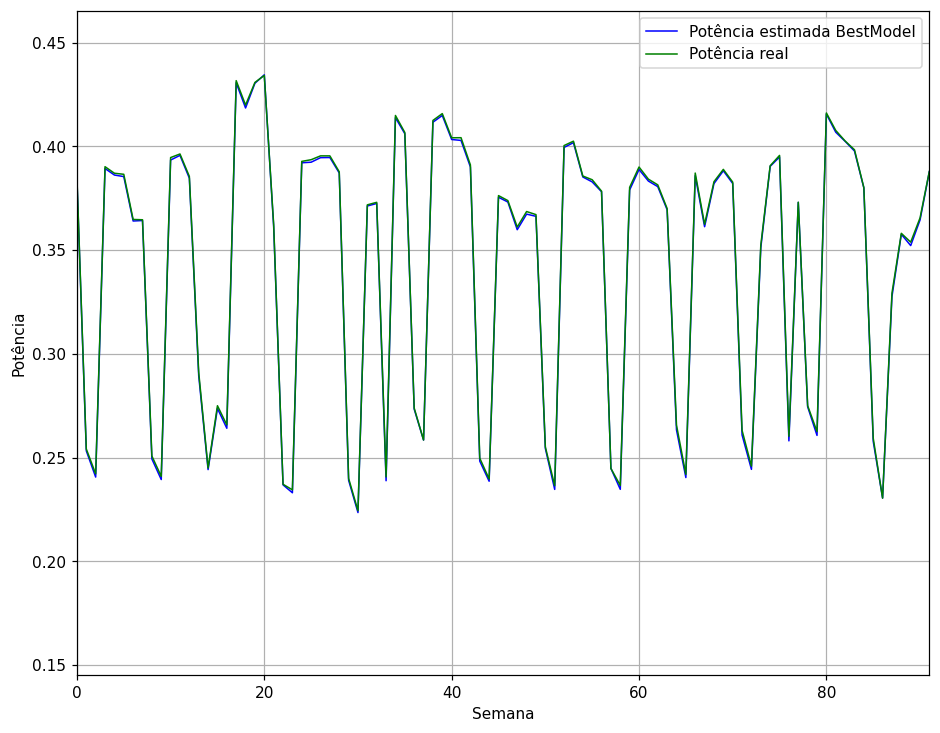

In [65]:
nnBestModel = NNeural("BestModel",
                      qtd_inputs=qtd_inputs, 
                      qtd_outputs=qtd_outputs,
                      activation="relu", 
                      activation_final_layer = "linear", 
                      qtd_neurons_hiden_layers = 40, 
                      qtd_hiden_layers=4, 
                      metrics=metrics, 
                      verbosity=True)

nnBestModel.train(x_train, y_train)
NNeural.plot([nnBestModel], x_test, y_test)
modelList.append(nnBestModel)
NNeural.evaluate_models(modelList, x_test, y_test)

## Adam optimization Question 3

O otimizador adam é um algoritmo que tem como objetivo otimizar a estratégia do gradiente descendente, estrtégia essa que basicamente tem como objetivo utilizar o vetor gradiente para mostrar em qual direção a solução precisa iterar para tentar minimizar a métrica de erro a qual se quer otimizar.
O adam em si é formado pela junção de duas técnicas diferentes para a otimização do gradiente descendente, a Momentum e o RMSP. O Momentum tenta acelerar a descida do vetor gradiente utilizando uma média exponencialmente ponderada dos gradientes. Já o RMSP significa Root Mean Square Prop. Esse algoritmo já é a tentativa de melhorar outro otimizador para o gradiente descendente. Ele usa uma média móvel exponencial para acelerar a descida do gradiente. O adam funciona como uma melhoria se utilizando das propriedades dos dois algoritmos ao combinálos entre si.

## Evaluate metrics

As métricas abaixo foram adicionadas ao modelo no treinamento para facilitar a extração de métricas pelo método evaluate. Considerando todos os modelos treinados aqui abaixo é exibido o resultado considerando as métricas mean_squared_error, mean_absolute_error e mape.

In [66]:
NNeural.evaluate_models(modelList, x_test, y_test)

Evaluating model on a test set
Gettings model. Now it is: <keras.engine.sequential.Sequential object at 0x7faa54375420>
21/21 [==============================] - 0s 1ms/step - loss: 1.0399e-04 - mean_squared_error: 1.0399e-04 - mean_absolute_error: 0.0075 - mape: 2.3708
Evaluating model on a test set
Gettings model. Now it is: <keras.engine.sequential.Sequential object at 0x7faad02363b0>
21/21 [==============================] - 0s 566us/step - loss: 0.1231 - mean_squared_error: 0.1231 - mean_absolute_error: 0.3444 - mape: 100.0000
Evaluating model on a test set
Gettings model. Now it is: <keras.engine.sequential.Sequential object at 0x7faad07e9c90>
21/21 [==============================] - 0s 647us/step - loss: 9.6988e-06 - mean_squared_error: 9.6988e-06 - mean_absolute_error: 0.0021 - mape: 0.6966
Evaluating model on a test set
Gettings model. Now it is: <keras.engine.sequential.Sequential object at 0x7faa203927d0>
21/21 [==============================] - 0s 667us/step - loss: 7.7207e-0